C:\Users\Dom\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [1]:
import numpy as np
import pandas as pd
import time
import sklearn


readdata = pd.read_csv("/home/dom/Documents/MPhys/TheGrandTour/wine_data.txt", sep="\t", header=None);
data = np.array(readdata);
data = np.delete(data, 0, 0)
data = data.astype(float)
data = np.swapaxes(data,0,1)


# Need to seperate the classification dimension:
classification = data[13]
data = np.delete(data, 13, axis=0)


# make list of colours for each number:
data_colour = []
for i in range(len(classification)):
    if classification[i] == 1:
        data_colour.append("r")
    elif classification[i] == 2:
        data_colour.append("b")
    elif classification[i] == 3:
        data_colour.append("g")
        
# Normalizes the data        
for i in range(0, np.shape(data)[0]):
    data[i,:] = (data[i,:] / np.ndarray.max(data[i,:])) * 2 - 1
    
        


#VARIABLES
stepSize = 0.01
nSteps = 10000

def getAlpha(d):
    """
    NEEDS IMPLEMENTATION
    Should produce 1xd(d-1)/2 array of position in grand tour.
    """
    p = d*(d-1)/2     
    primeList = []
    count = 1
    while len(primeList) < p:
        count += 1
        primeBool = False
        for i in range(2, count - 1):
            if count % i == 0:
                primeBool = True
        if primeBool == False:
            irrational = (np.sqrt(count)%1)
            primeList.append(irrational)
            
    primeList = np.asarray(primeList)
    primeList = primeList.dot(stepSize)
    """
    Irrational number generation using exponentials, not being used
    p = int(d*(d-1)/2)
    alpha = np.zeros(p) #alpha(t) parameters defining grand tour in G2,d
    for i in range(0,p):
        alpha[i] = (np.exp(i) % 1) * 2 * np.pi
        
    alpha = alpha.dot(0.001)
    """
    
    
    return primeList


def getAngles(alpha,d):
    """""
    Inputs: 
    alpha = 1xd(d-1)/2 array defining position on grand tour
    d = dimensions of data
    Outputs a dxd array of angles required for the transformation
    """
    theta = np.zeros((d,d));
    i = 0;
    k = 0;
    
    while i < d-1:
        j = i + 1;
        
        while j < d:
            theta[i][j] = alpha[k];
            j += 1;
            k += 1;
    
        i+= 1;
        
    return theta;


def RotationMatrix(i, j, d, theta):
    """
    Inputs:
    i = first indicie of rotating plane
    j = second indicie of rotating plane
    d = dimensions of data
    theta = dxd array of angle of rotation of rotating plane
    Outputs a rotating matrix to rotate plane of ixj plane by theta_ij
    """
    R = np.identity(d)
    R[i,i] = np.cos(theta)
    R[i,j] = -1*np.sin(theta)
    R[j,i] = np.sin(theta)
    R[j,j] = np.cos(theta)
    return R


def BetaFn(d, theta):
    """
    Inputs:
    d = dimensions of data
    theta = dxd array of angle of rotation ixj plane
    Outputs the full matrix transformation for all rotations
    """
    b = RotationMatrix(1, 2, d, theta[1,2])
    i = 1
    j = 2
    for i in range(d):
        for j in range(d):
            if j <= i:
                continue
            if i==1 and j==2:
                continue
            b = np.matmul(b, RotationMatrix(i, j, d, theta[i,j]))
            
    return b


def GrandTour(data, nSteps):
    """
    Inputs:
    data = array of data points, dimensions x npoints
    Outputs a 3D array number of points x t x dimensions, where t
    the time step at that point in the tour
    """

    d = np.shape(data)[0] #dimensions of data
    nPoints = np.shape(data)[1] #number of data points
    tData = np.zeros((nSteps,d,nPoints)) #initialise 3d matrix to store stransforemd data at each timestep
    tBeta = np.zeros((nSteps,d,d))
    Alpha = getAlpha(d)

    
    for t in range(0, nSteps):
        
        
        alpha = Alpha.dot(t)
        theta = getAngles(alpha, d)
        b = BetaFn(d, theta)
        a = np.matmul(b, data)
        tData[t,:,:] = a
        tBeta[t,:,:] = b
        
    return tData, tBeta


tData, tBeta = GrandTour(data, nSteps)


In [2]:
import tensorflow as tf
import tensorflow.keras as keras

In [3]:
targetData = np.zeros((len(tData[0][0]), 3))
for counter, i in enumerate(classification):
    targetData[counter][int(i-1)] = 1
targetData

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [21]:
import time

accuracy = []

start = time.clock()

init_op = tf.global_variables_initializer()


    
iterations = 1000
for i in range(iterations):

    if i % 10 == 0 and i != 0:
        current_time = time.clock() - start
        time_left = (float(current_time) / i) * (iterations - i)
        print("Time elapsed: " + str(current_time))
        print("Timestep: " + str(i) + " out of " + str(iterations))
        print("Approximately " + str(int(time_left)) + " seconds left")
        
    tf.reset_default_graph()

    xData = tData[i][0]
    yData = tData[i][1]
    trainingData = np.vstack((xData, yData)).T
    # NN model code
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    nnet = model.fit(trainingData, targetData, epochs=50)
    accuracy.append(np.mean(nnet.history["acc"]))
    
print(accuracy)

Epoch 1/50
178/178 [==============================] - 0s 522us/step - loss: 4.2053 - acc: 0.4045
Epoch 2/50
178/178 [==============================] - 0s 34us/step - loss: 2.4827 - acc: 0.3258
Epoch 3/50
178/178 [==============================] - 0s 43us/step - loss: 1.9813 - acc: 0.3371
Epoch 4/50
178/178 [==============================] - 0s 50us/step - loss: 2.0740 - acc: 0.4494
Epoch 5/50
178/178 [==============================] - 0s 49us/step - loss: 1.8162 - acc: 0.3315
Epoch 6/50
178/178 [==============================] - 0s 34us/step - loss: 1.7360 - acc: 0.2809
Epoch 7/50
178/178 [==============================] - 0s 56us/step - loss: 1.6394 - acc: 0.2584
Epoch 8/50
178/178 [==============================] - 0s 47us/step - loss: 1.5520 - acc: 0.2416
Epoch 9/50
178/178 [==============================] - 0s 38us/step - loss: 1.4728 - acc: 0.2472
Epoch 10/50
178/178 [==============================] - 0s 41us/step - loss: 1.4125 - acc: 0.2135
Epoch 11/50
178/178 [=================

178/178 [==============================] - 0s 47us/step - loss: 0.7746 - acc: 0.7584
Epoch 36/50
178/178 [==============================] - 0s 35us/step - loss: 0.7730 - acc: 0.7528
Epoch 37/50
178/178 [==============================] - 0s 42us/step - loss: 0.7672 - acc: 0.7472
Epoch 38/50
178/178 [==============================] - 0s 44us/step - loss: 0.7649 - acc: 0.7584
Epoch 39/50
178/178 [==============================] - 0s 47us/step - loss: 0.7616 - acc: 0.7697
Epoch 40/50
178/178 [==============================] - 0s 49us/step - loss: 0.7586 - acc: 0.7528
Epoch 41/50
178/178 [==============================] - 0s 40us/step - loss: 0.7552 - acc: 0.7584
Epoch 42/50
178/178 [==============================] - 0s 46us/step - loss: 0.7538 - acc: 0.7472
Epoch 43/50
178/178 [==============================] - 0s 30us/step - loss: 0.7487 - acc: 0.7753
Epoch 44/50
178/178 [==============================] - 0s 41us/step - loss: 0.7457 - acc: 0.7753
Epoch 45/50
178/178 [=====================

178/178 [==============================] - 0s 41us/step - loss: 0.6048 - acc: 0.7978
Epoch 20/50
178/178 [==============================] - 0s 44us/step - loss: 0.6013 - acc: 0.8090
Epoch 21/50
178/178 [==============================] - 0s 34us/step - loss: 0.6031 - acc: 0.7921
Epoch 22/50
178/178 [==============================] - 0s 41us/step - loss: 0.5980 - acc: 0.7978
Epoch 23/50
178/178 [==============================] - 0s 39us/step - loss: 0.6010 - acc: 0.7865
Epoch 24/50
178/178 [==============================] - 0s 40us/step - loss: 0.5987 - acc: 0.7809
Epoch 25/50
178/178 [==============================] - 0s 43us/step - loss: 0.5939 - acc: 0.8034
Epoch 26/50
178/178 [==============================] - 0s 32us/step - loss: 0.5916 - acc: 0.7978
Epoch 27/50
178/178 [==============================] - 0s 44us/step - loss: 0.5894 - acc: 0.7921
Epoch 28/50
178/178 [==============================] - 0s 36us/step - loss: 0.5910 - acc: 0.7697
Epoch 29/50
178/178 [=====================

178/178 [==============================] - 0s 44us/step - loss: 0.5390 - acc: 0.8034
Epoch 4/50
178/178 [==============================] - 0s 48us/step - loss: 0.5359 - acc: 0.8034
Epoch 5/50
178/178 [==============================] - 0s 48us/step - loss: 0.5363 - acc: 0.8090
Epoch 6/50
178/178 [==============================] - 0s 42us/step - loss: 0.5357 - acc: 0.8034
Epoch 7/50
178/178 [==============================] - 0s 41us/step - loss: 0.5354 - acc: 0.7978
Epoch 8/50
178/178 [==============================] - 0s 32us/step - loss: 0.5322 - acc: 0.8146
Epoch 9/50
178/178 [==============================] - 0s 40us/step - loss: 0.5356 - acc: 0.8090
Epoch 10/50
178/178 [==============================] - 0s 38us/step - loss: 0.5334 - acc: 0.8146
Epoch 11/50
178/178 [==============================] - 0s 31us/step - loss: 0.5343 - acc: 0.7978
Epoch 12/50
178/178 [==============================] - 0s 47us/step - loss: 0.5313 - acc: 0.8090
Epoch 13/50
178/178 [===========================

178/178 [==============================] - 0s 35us/step - loss: 0.5199 - acc: 0.8090
Epoch 38/50
178/178 [==============================] - 0s 47us/step - loss: 0.5179 - acc: 0.8146
Epoch 39/50
178/178 [==============================] - 0s 33us/step - loss: 0.5159 - acc: 0.8202
Epoch 40/50
178/178 [==============================] - 0s 43us/step - loss: 0.5160 - acc: 0.8258
Epoch 41/50
178/178 [==============================] - 0s 39us/step - loss: 0.5171 - acc: 0.8202
Epoch 42/50
178/178 [==============================] - 0s 44us/step - loss: 0.5155 - acc: 0.8258
Epoch 43/50
178/178 [==============================] - 0s 39us/step - loss: 0.5168 - acc: 0.8202
Epoch 44/50
178/178 [==============================] - 0s 42us/step - loss: 0.5140 - acc: 0.8146
Epoch 45/50
178/178 [==============================] - 0s 39us/step - loss: 0.5190 - acc: 0.8146
Epoch 46/50
178/178 [==============================] - 0s 33us/step - loss: 0.5141 - acc: 0.8258
Epoch 47/50
178/178 [=====================

178/178 [==============================] - 0s 35us/step - loss: 0.5383 - acc: 0.8090
Epoch 22/50
178/178 [==============================] - 0s 35us/step - loss: 0.5374 - acc: 0.8090
Epoch 23/50
178/178 [==============================] - 0s 34us/step - loss: 0.5391 - acc: 0.8202
Epoch 24/50
178/178 [==============================] - 0s 49us/step - loss: 0.5381 - acc: 0.8202
Epoch 25/50
178/178 [==============================] - 0s 43us/step - loss: 0.5369 - acc: 0.8202
Epoch 26/50
178/178 [==============================] - 0s 30us/step - loss: 0.5372 - acc: 0.8202
Epoch 27/50
178/178 [==============================] - 0s 41us/step - loss: 0.5371 - acc: 0.8202
Epoch 28/50
178/178 [==============================] - 0s 34us/step - loss: 0.5387 - acc: 0.8146
Epoch 29/50
178/178 [==============================] - 0s 48us/step - loss: 0.5388 - acc: 0.8258
Epoch 30/50
178/178 [==============================] - 0s 36us/step - loss: 0.5373 - acc: 0.8034
Epoch 31/50
178/178 [=====================

178/178 [==============================] - 0s 32us/step - loss: 0.5772 - acc: 0.7809
Epoch 5/50
178/178 [==============================] - 0s 34us/step - loss: 0.5759 - acc: 0.7865
Epoch 6/50
178/178 [==============================] - 0s 34us/step - loss: 0.5792 - acc: 0.7809
Epoch 7/50
178/178 [==============================] - 0s 35us/step - loss: 0.5757 - acc: 0.7809
Epoch 8/50
178/178 [==============================] - 0s 28us/step - loss: 0.5788 - acc: 0.7865
Epoch 9/50
178/178 [==============================] - 0s 27us/step - loss: 0.5798 - acc: 0.7865
Epoch 10/50
178/178 [==============================] - 0s 32us/step - loss: 0.5769 - acc: 0.7921
Epoch 11/50
178/178 [==============================] - 0s 30us/step - loss: 0.5789 - acc: 0.7809
Epoch 12/50
178/178 [==============================] - 0s 33us/step - loss: 0.5797 - acc: 0.7809
Epoch 13/50
178/178 [==============================] - 0s 47us/step - loss: 0.5757 - acc: 0.7753
Epoch 14/50
178/178 [==========================

178/178 [==============================] - 0s 39us/step - loss: 0.5956 - acc: 0.7809
Epoch 39/50
178/178 [==============================] - 0s 39us/step - loss: 0.5924 - acc: 0.7753
Epoch 40/50
178/178 [==============================] - 0s 27us/step - loss: 0.5945 - acc: 0.7809
Epoch 41/50
178/178 [==============================] - 0s 38us/step - loss: 0.5925 - acc: 0.7978
Epoch 42/50
178/178 [==============================] - 0s 45us/step - loss: 0.5914 - acc: 0.7865
Epoch 43/50
178/178 [==============================] - 0s 29us/step - loss: 0.5906 - acc: 0.7865
Epoch 44/50
178/178 [==============================] - 0s 38us/step - loss: 0.5930 - acc: 0.7753
Epoch 45/50
178/178 [==============================] - 0s 36us/step - loss: 0.5946 - acc: 0.7809
Epoch 46/50
178/178 [==============================] - 0s 46us/step - loss: 0.5921 - acc: 0.7865
Epoch 47/50
178/178 [==============================] - 0s 37us/step - loss: 0.5926 - acc: 0.7921
Epoch 48/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.6280 - acc: 0.7753
Epoch 23/50
178/178 [==============================] - 0s 40us/step - loss: 0.6305 - acc: 0.7978
Epoch 24/50
178/178 [==============================] - 0s 32us/step - loss: 0.6279 - acc: 0.7921
Epoch 25/50
178/178 [==============================] - 0s 37us/step - loss: 0.6269 - acc: 0.7753
Epoch 26/50
178/178 [==============================] - 0s 41us/step - loss: 0.6282 - acc: 0.7753
Epoch 27/50
178/178 [==============================] - 0s 35us/step - loss: 0.6293 - acc: 0.7921
Epoch 28/50
178/178 [==============================] - 0s 40us/step - loss: 0.6261 - acc: 0.7865
Epoch 29/50
178/178 [==============================] - 0s 35us/step - loss: 0.6271 - acc: 0.7809
Epoch 30/50
178/178 [==============================] - 0s 43us/step - loss: 0.6251 - acc: 0.7921
Epoch 31/50
178/178 [==============================] - 0s 40us/step - loss: 0.6258 - acc: 0.7865
Epoch 32/50
178/178 [=====================

178/178 [==============================] - 0s 37us/step - loss: 0.6528 - acc: 0.7697
Epoch 7/50
178/178 [==============================] - 0s 43us/step - loss: 0.6533 - acc: 0.7809
Epoch 8/50
178/178 [==============================] - 0s 37us/step - loss: 0.6502 - acc: 0.7640
Epoch 9/50
178/178 [==============================] - 0s 32us/step - loss: 0.6518 - acc: 0.7753
Epoch 10/50
178/178 [==============================] - 0s 35us/step - loss: 0.6517 - acc: 0.7753
Epoch 11/50
178/178 [==============================] - 0s 44us/step - loss: 0.6507 - acc: 0.7865
Epoch 12/50
178/178 [==============================] - 0s 29us/step - loss: 0.6516 - acc: 0.7809
Epoch 13/50
178/178 [==============================] - 0s 37us/step - loss: 0.6505 - acc: 0.7697
Epoch 14/50
178/178 [==============================] - 0s 36us/step - loss: 0.6530 - acc: 0.7809
Epoch 15/50
178/178 [==============================] - 0s 38us/step - loss: 0.6488 - acc: 0.7697
Epoch 16/50
178/178 [========================

178/178 [==============================] - 0s 34us/step - loss: 0.6513 - acc: 0.7809
Epoch 41/50
178/178 [==============================] - 0s 40us/step - loss: 0.6463 - acc: 0.7865
Epoch 42/50
178/178 [==============================] - 0s 33us/step - loss: 0.6473 - acc: 0.7809
Epoch 43/50
178/178 [==============================] - 0s 54us/step - loss: 0.6515 - acc: 0.7640
Epoch 44/50
178/178 [==============================] - 0s 38us/step - loss: 0.6484 - acc: 0.7697
Epoch 45/50
178/178 [==============================] - 0s 35us/step - loss: 0.6450 - acc: 0.7753
Epoch 46/50
178/178 [==============================] - 0s 39us/step - loss: 0.6527 - acc: 0.7809
Epoch 47/50
178/178 [==============================] - 0s 35us/step - loss: 0.6492 - acc: 0.7697
Epoch 48/50
178/178 [==============================] - 0s 50us/step - loss: 0.6470 - acc: 0.7640
Epoch 49/50
178/178 [==============================] - 0s 29us/step - loss: 0.6465 - acc: 0.7697
Epoch 50/50
178/178 [=====================

178/178 [==============================] - 0s 35us/step - loss: 0.6598 - acc: 0.7584
Epoch 25/50
178/178 [==============================] - 0s 38us/step - loss: 0.6645 - acc: 0.7640
Epoch 26/50
178/178 [==============================] - 0s 38us/step - loss: 0.6613 - acc: 0.7697
Epoch 27/50
178/178 [==============================] - 0s 30us/step - loss: 0.6605 - acc: 0.7640
Epoch 28/50
178/178 [==============================] - 0s 41us/step - loss: 0.6602 - acc: 0.7640
Epoch 29/50
178/178 [==============================] - 0s 34us/step - loss: 0.6612 - acc: 0.7528
Epoch 30/50
178/178 [==============================] - 0s 29us/step - loss: 0.6595 - acc: 0.7640
Epoch 31/50
178/178 [==============================] - 0s 39us/step - loss: 0.6616 - acc: 0.7640
Epoch 32/50
178/178 [==============================] - 0s 34us/step - loss: 0.6605 - acc: 0.7640
Epoch 33/50
178/178 [==============================] - 0s 39us/step - loss: 0.6603 - acc: 0.7584
Epoch 34/50
178/178 [=====================

178/178 [==============================] - 0s 39us/step - loss: 0.6787 - acc: 0.7472
Epoch 8/50
178/178 [==============================] - 0s 38us/step - loss: 0.6802 - acc: 0.7472
Epoch 9/50
178/178 [==============================] - 0s 36us/step - loss: 0.6831 - acc: 0.7416
Epoch 10/50
178/178 [==============================] - 0s 35us/step - loss: 0.6793 - acc: 0.7472
Epoch 11/50
178/178 [==============================] - 0s 42us/step - loss: 0.6771 - acc: 0.7416
Epoch 12/50
178/178 [==============================] - 0s 36us/step - loss: 0.6797 - acc: 0.7472
Epoch 13/50
178/178 [==============================] - 0s 32us/step - loss: 0.6820 - acc: 0.7416
Epoch 14/50
178/178 [==============================] - 0s 45us/step - loss: 0.6782 - acc: 0.7472
Epoch 15/50
178/178 [==============================] - 0s 30us/step - loss: 0.6770 - acc: 0.7472
Epoch 16/50
178/178 [==============================] - 0s 53us/step - loss: 0.6801 - acc: 0.7472
Epoch 17/50
178/178 [=======================

178/178 [==============================] - 0s 48us/step - loss: 0.6852 - acc: 0.7416
Epoch 42/50
178/178 [==============================] - 0s 36us/step - loss: 0.6822 - acc: 0.7472
Epoch 43/50
178/178 [==============================] - 0s 41us/step - loss: 0.6859 - acc: 0.7360
Epoch 44/50
178/178 [==============================] - 0s 32us/step - loss: 0.6839 - acc: 0.7360
Epoch 45/50
178/178 [==============================] - 0s 42us/step - loss: 0.6809 - acc: 0.7416
Epoch 46/50
178/178 [==============================] - 0s 49us/step - loss: 0.6816 - acc: 0.7472
Epoch 47/50
178/178 [==============================] - 0s 34us/step - loss: 0.6803 - acc: 0.7416
Epoch 48/50
178/178 [==============================] - 0s 44us/step - loss: 0.6812 - acc: 0.7360
Epoch 49/50
178/178 [==============================] - 0s 36us/step - loss: 0.6820 - acc: 0.7303
Epoch 50/50
178/178 [==============================] - 0s 44us/step - loss: 0.6885 - acc: 0.7360
Epoch 1/50
178/178 [======================

178/178 [==============================] - 0s 33us/step - loss: 0.6982 - acc: 0.7247
Epoch 26/50
178/178 [==============================] - 0s 56us/step - loss: 0.6921 - acc: 0.7247
Epoch 27/50
178/178 [==============================] - 0s 29us/step - loss: 0.6938 - acc: 0.7247
Epoch 28/50
178/178 [==============================] - 0s 42us/step - loss: 0.6916 - acc: 0.7191
Epoch 29/50
178/178 [==============================] - 0s 46us/step - loss: 0.6945 - acc: 0.7135
Epoch 30/50
178/178 [==============================] - 0s 31us/step - loss: 0.6914 - acc: 0.7191
Epoch 31/50
178/178 [==============================] - 0s 49us/step - loss: 0.6914 - acc: 0.7191
Epoch 32/50
178/178 [==============================] - 0s 36us/step - loss: 0.6975 - acc: 0.7247
Epoch 33/50
178/178 [==============================] - 0s 56us/step - loss: 0.6901 - acc: 0.7303
Epoch 34/50
178/178 [==============================] - 0s 32us/step - loss: 0.6920 - acc: 0.7191
Epoch 35/50
178/178 [=====================

178/178 [==============================] - 0s 50us/step - loss: 0.7008 - acc: 0.7135
Epoch 10/50
178/178 [==============================] - 0s 34us/step - loss: 0.7000 - acc: 0.7135
Epoch 11/50
178/178 [==============================] - 0s 40us/step - loss: 0.7002 - acc: 0.7135
Epoch 12/50
178/178 [==============================] - 0s 34us/step - loss: 0.7008 - acc: 0.7191
Epoch 13/50
178/178 [==============================] - 0s 41us/step - loss: 0.7038 - acc: 0.7135
Epoch 14/50
178/178 [==============================] - 0s 37us/step - loss: 0.7069 - acc: 0.7079
Epoch 15/50
178/178 [==============================] - 0s 38us/step - loss: 0.6998 - acc: 0.7022
Epoch 16/50
178/178 [==============================] - 0s 42us/step - loss: 0.7044 - acc: 0.7191
Epoch 17/50
178/178 [==============================] - 0s 45us/step - loss: 0.7010 - acc: 0.7191
Epoch 18/50
178/178 [==============================] - 0s 46us/step - loss: 0.6981 - acc: 0.7135
Epoch 19/50
178/178 [=====================

178/178 [==============================] - 0s 34us/step - loss: 0.6951 - acc: 0.7079
Epoch 44/50
178/178 [==============================] - 0s 42us/step - loss: 0.6941 - acc: 0.7135
Epoch 45/50
178/178 [==============================] - 0s 39us/step - loss: 0.6962 - acc: 0.7022
Epoch 46/50
178/178 [==============================] - 0s 42us/step - loss: 0.6935 - acc: 0.7079
Epoch 47/50
178/178 [==============================] - 0s 45us/step - loss: 0.6950 - acc: 0.7022
Epoch 48/50
178/178 [==============================] - 0s 43us/step - loss: 0.6974 - acc: 0.7079
Epoch 49/50
178/178 [==============================] - 0s 44us/step - loss: 0.6967 - acc: 0.7079
Epoch 50/50
178/178 [==============================] - 0s 42us/step - loss: 0.6929 - acc: 0.7135
Epoch 1/50
178/178 [==============================] - 0s 748us/step - loss: 0.7065 - acc: 0.7022
Epoch 2/50
178/178 [==============================] - 0s 39us/step - loss: 0.7059 - acc: 0.7135
Epoch 3/50
178/178 [=======================

178/178 [==============================] - 0s 42us/step - loss: 0.6968 - acc: 0.6910
Epoch 28/50
178/178 [==============================] - 0s 39us/step - loss: 0.7013 - acc: 0.6966
Epoch 29/50
178/178 [==============================] - 0s 41us/step - loss: 0.6964 - acc: 0.6966
Epoch 30/50
178/178 [==============================] - 0s 42us/step - loss: 0.7039 - acc: 0.7022
Epoch 31/50
178/178 [==============================] - 0s 42us/step - loss: 0.6970 - acc: 0.7079
Epoch 32/50
178/178 [==============================] - 0s 34us/step - loss: 0.6963 - acc: 0.7135
Epoch 33/50
178/178 [==============================] - 0s 36us/step - loss: 0.6986 - acc: 0.6966
Epoch 34/50
178/178 [==============================] - 0s 39us/step - loss: 0.6939 - acc: 0.6966
Epoch 35/50
178/178 [==============================] - 0s 29us/step - loss: 0.7018 - acc: 0.6910
Epoch 36/50
178/178 [==============================] - 0s 47us/step - loss: 0.6966 - acc: 0.6910
Epoch 37/50
178/178 [=====================

178/178 [==============================] - 0s 37us/step - loss: 0.6992 - acc: 0.6910
Epoch 11/50
178/178 [==============================] - 0s 32us/step - loss: 0.6993 - acc: 0.7022
Epoch 12/50
178/178 [==============================] - 0s 38us/step - loss: 0.6983 - acc: 0.7079
Epoch 13/50
178/178 [==============================] - 0s 32us/step - loss: 0.7002 - acc: 0.7022
Epoch 14/50
178/178 [==============================] - 0s 44us/step - loss: 0.6988 - acc: 0.6966
Epoch 15/50
178/178 [==============================] - 0s 43us/step - loss: 0.6974 - acc: 0.7022
Epoch 16/50
178/178 [==============================] - 0s 39us/step - loss: 0.6997 - acc: 0.7022
Epoch 17/50
178/178 [==============================] - 0s 39us/step - loss: 0.6977 - acc: 0.7079
Epoch 18/50
178/178 [==============================] - 0s 33us/step - loss: 0.6986 - acc: 0.7022
Epoch 19/50
178/178 [==============================] - 0s 37us/step - loss: 0.6975 - acc: 0.7022
Epoch 20/50
178/178 [=====================

178/178 [==============================] - 0s 51us/step - loss: 0.6943 - acc: 0.7135
Epoch 45/50
178/178 [==============================] - 0s 37us/step - loss: 0.6917 - acc: 0.7022
Epoch 46/50
178/178 [==============================] - 0s 34us/step - loss: 0.6933 - acc: 0.6966
Epoch 47/50
178/178 [==============================] - 0s 62us/step - loss: 0.6917 - acc: 0.6966
Epoch 48/50
178/178 [==============================] - 0s 42us/step - loss: 0.6916 - acc: 0.7079
Epoch 49/50
178/178 [==============================] - 0s 39us/step - loss: 0.6936 - acc: 0.7191
Epoch 50/50
178/178 [==============================] - 0s 42us/step - loss: 0.6913 - acc: 0.7079
Epoch 1/50
178/178 [==============================] - 0s 549us/step - loss: 0.7029 - acc: 0.6742
Epoch 2/50
178/178 [==============================] - 0s 43us/step - loss: 0.6982 - acc: 0.6966
Epoch 3/50
178/178 [==============================] - 0s 33us/step - loss: 0.7068 - acc: 0.7079
Epoch 4/50
178/178 [========================

178/178 [==============================] - 0s 34us/step - loss: 0.6904 - acc: 0.7079
Epoch 29/50
178/178 [==============================] - 0s 35us/step - loss: 0.6900 - acc: 0.7135
Epoch 30/50
178/178 [==============================] - 0s 32us/step - loss: 0.6906 - acc: 0.7135
Epoch 31/50
178/178 [==============================] - 0s 37us/step - loss: 0.6891 - acc: 0.7135
Epoch 32/50
178/178 [==============================] - 0s 39us/step - loss: 0.6900 - acc: 0.7079
Epoch 33/50
178/178 [==============================] - 0s 34us/step - loss: 0.6911 - acc: 0.7135
Epoch 34/50
178/178 [==============================] - 0s 33us/step - loss: 0.6894 - acc: 0.7079
Epoch 35/50
178/178 [==============================] - 0s 41us/step - loss: 0.6897 - acc: 0.7135
Epoch 36/50
178/178 [==============================] - 0s 29us/step - loss: 0.6938 - acc: 0.7079
Epoch 37/50
178/178 [==============================] - 0s 42us/step - loss: 0.6902 - acc: 0.7079
Epoch 38/50
178/178 [=====================

178/178 [==============================] - 0s 35us/step - loss: 0.6945 - acc: 0.7135
Epoch 13/50
178/178 [==============================] - 0s 36us/step - loss: 0.6913 - acc: 0.7191
Epoch 14/50
178/178 [==============================] - 0s 36us/step - loss: 0.6898 - acc: 0.7303
Epoch 15/50
178/178 [==============================] - 0s 36us/step - loss: 0.6919 - acc: 0.7247
Epoch 16/50
178/178 [==============================] - 0s 39us/step - loss: 0.6920 - acc: 0.7247
Epoch 17/50
178/178 [==============================] - 0s 33us/step - loss: 0.6878 - acc: 0.7416
Epoch 18/50
178/178 [==============================] - 0s 37us/step - loss: 0.6901 - acc: 0.7247
Epoch 19/50
178/178 [==============================] - 0s 36us/step - loss: 0.6891 - acc: 0.7247
Epoch 20/50
178/178 [==============================] - 0s 28us/step - loss: 0.6901 - acc: 0.7247
Epoch 21/50
178/178 [==============================] - 0s 41us/step - loss: 0.6896 - acc: 0.7247
Epoch 22/50
178/178 [=====================

178/178 [==============================] - 0s 56us/step - loss: 0.6866 - acc: 0.7360
Epoch 47/50
178/178 [==============================] - 0s 37us/step - loss: 0.6867 - acc: 0.7303
Epoch 48/50
178/178 [==============================] - 0s 39us/step - loss: 0.6858 - acc: 0.7247
Epoch 49/50
178/178 [==============================] - 0s 53us/step - loss: 0.6870 - acc: 0.7247
Epoch 50/50
178/178 [==============================] - 0s 41us/step - loss: 0.6871 - acc: 0.7247
Epoch 1/50
178/178 [==============================] - 0s 549us/step - loss: 0.6906 - acc: 0.7247
Epoch 2/50
178/178 [==============================] - 0s 36us/step - loss: 0.6900 - acc: 0.7135
Epoch 3/50
178/178 [==============================] - 0s 34us/step - loss: 0.6888 - acc: 0.7191
Epoch 4/50
178/178 [==============================] - 0s 36us/step - loss: 0.6933 - acc: 0.7079
Epoch 5/50
178/178 [==============================] - 0s 29us/step - loss: 0.6891 - acc: 0.7247
Epoch 6/50
178/178 [==========================

178/178 [==============================] - 0s 37us/step - loss: 0.6849 - acc: 0.7303
Epoch 31/50
178/178 [==============================] - 0s 31us/step - loss: 0.6852 - acc: 0.7360
Epoch 32/50
178/178 [==============================] - 0s 50us/step - loss: 0.6836 - acc: 0.7303
Epoch 33/50
178/178 [==============================] - 0s 37us/step - loss: 0.6836 - acc: 0.7360
Epoch 34/50
178/178 [==============================] - 0s 41us/step - loss: 0.6848 - acc: 0.7303
Epoch 35/50
178/178 [==============================] - 0s 44us/step - loss: 0.6833 - acc: 0.7303
Epoch 36/50
178/178 [==============================] - 0s 42us/step - loss: 0.6839 - acc: 0.7360
Epoch 37/50
178/178 [==============================] - 0s 44us/step - loss: 0.6871 - acc: 0.7360
Epoch 38/50
178/178 [==============================] - 0s 36us/step - loss: 0.6905 - acc: 0.7360
Epoch 39/50
178/178 [==============================] - 0s 43us/step - loss: 0.6849 - acc: 0.7360
Epoch 40/50
178/178 [=====================

178/178 [==============================] - 0s 40us/step - loss: 0.6809 - acc: 0.7247
Epoch 14/50
178/178 [==============================] - 0s 38us/step - loss: 0.6828 - acc: 0.7191
Epoch 15/50
178/178 [==============================] - 0s 40us/step - loss: 0.6804 - acc: 0.7247
Epoch 16/50
178/178 [==============================] - 0s 35us/step - loss: 0.6816 - acc: 0.7191
Epoch 17/50
178/178 [==============================] - 0s 43us/step - loss: 0.6812 - acc: 0.7191
Epoch 18/50
178/178 [==============================] - 0s 36us/step - loss: 0.6794 - acc: 0.7191
Epoch 19/50
178/178 [==============================] - 0s 29us/step - loss: 0.6806 - acc: 0.7247
Epoch 20/50
178/178 [==============================] - 0s 47us/step - loss: 0.6849 - acc: 0.7191
Epoch 21/50
178/178 [==============================] - 0s 33us/step - loss: 0.6783 - acc: 0.7191
Epoch 22/50
178/178 [==============================] - 0s 39us/step - loss: 0.6829 - acc: 0.7247
Epoch 23/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.6760 - acc: 0.7247
Epoch 48/50
178/178 [==============================] - 0s 45us/step - loss: 0.6764 - acc: 0.7247
Epoch 49/50
178/178 [==============================] - 0s 36us/step - loss: 0.6802 - acc: 0.7303
Epoch 50/50
178/178 [==============================] - 0s 37us/step - loss: 0.6768 - acc: 0.7247
Epoch 1/50
178/178 [==============================] - 0s 747us/step - loss: 0.6774 - acc: 0.7191
Epoch 2/50
178/178 [==============================] - 0s 34us/step - loss: 0.6785 - acc: 0.7191
Epoch 3/50
178/178 [==============================] - 0s 39us/step - loss: 0.6794 - acc: 0.7191
Epoch 4/50
178/178 [==============================] - 0s 33us/step - loss: 0.6778 - acc: 0.7247
Epoch 5/50
178/178 [==============================] - 0s 37us/step - loss: 0.6763 - acc: 0.7247
Epoch 6/50
178/178 [==============================] - 0s 38us/step - loss: 0.6767 - acc: 0.7191
Epoch 7/50
178/178 [===========================

178/178 [==============================] - 0s 45us/step - loss: 0.6721 - acc: 0.7247
Epoch 32/50
178/178 [==============================] - 0s 38us/step - loss: 0.6720 - acc: 0.7191
Epoch 33/50
178/178 [==============================] - 0s 31us/step - loss: 0.6713 - acc: 0.7191
Epoch 34/50
178/178 [==============================] - 0s 46us/step - loss: 0.6710 - acc: 0.7191
Epoch 35/50
178/178 [==============================] - 0s 44us/step - loss: 0.6706 - acc: 0.7247
Epoch 36/50
178/178 [==============================] - 0s 38us/step - loss: 0.6723 - acc: 0.7191
Epoch 37/50
178/178 [==============================] - 0s 45us/step - loss: 0.6725 - acc: 0.7247
Epoch 38/50
178/178 [==============================] - 0s 44us/step - loss: 0.6726 - acc: 0.7247
Epoch 39/50
178/178 [==============================] - 0s 41us/step - loss: 0.6722 - acc: 0.7135
Epoch 40/50
178/178 [==============================] - 0s 42us/step - loss: 0.6742 - acc: 0.7247
Epoch 41/50
178/178 [=====================

178/178 [==============================] - 0s 47us/step - loss: 0.6650 - acc: 0.7247
Epoch 16/50
178/178 [==============================] - 0s 41us/step - loss: 0.6659 - acc: 0.7191
Epoch 17/50
178/178 [==============================] - 0s 43us/step - loss: 0.6656 - acc: 0.7191
Epoch 18/50
178/178 [==============================] - 0s 36us/step - loss: 0.6667 - acc: 0.7303
Epoch 19/50
178/178 [==============================] - 0s 38us/step - loss: 0.6662 - acc: 0.7191
Epoch 20/50
178/178 [==============================] - 0s 34us/step - loss: 0.6655 - acc: 0.7191
Epoch 21/50
178/178 [==============================] - 0s 43us/step - loss: 0.6727 - acc: 0.7303
Epoch 22/50
178/178 [==============================] - 0s 37us/step - loss: 0.6682 - acc: 0.7247
Epoch 23/50
178/178 [==============================] - 0s 30us/step - loss: 0.6707 - acc: 0.7022
Epoch 24/50
178/178 [==============================] - 0s 40us/step - loss: 0.6662 - acc: 0.7135
Epoch 25/50
178/178 [=====================

178/178 [==============================] - 0s 40us/step - loss: 0.6628 - acc: 0.7247
Epoch 50/50
178/178 [==============================] - 0s 46us/step - loss: 0.6614 - acc: 0.7247
Epoch 1/50
178/178 [==============================] - 0s 588us/step - loss: 0.6578 - acc: 0.7247
Epoch 2/50
178/178 [==============================] - 0s 37us/step - loss: 0.6573 - acc: 0.7247
Epoch 3/50
178/178 [==============================] - 0s 30us/step - loss: 0.6588 - acc: 0.7303
Epoch 4/50
178/178 [==============================] - 0s 55us/step - loss: 0.6555 - acc: 0.7247
Epoch 5/50
178/178 [==============================] - 0s 36us/step - loss: 0.6560 - acc: 0.7247
Epoch 6/50
178/178 [==============================] - 0s 41us/step - loss: 0.6562 - acc: 0.7303
Epoch 7/50
178/178 [==============================] - 0s 33us/step - loss: 0.6571 - acc: 0.7247
Epoch 8/50
178/178 [==============================] - 0s 39us/step - loss: 0.6554 - acc: 0.7303
Epoch 9/50
178/178 [=============================

178/178 [==============================] - 0s 45us/step - loss: 0.6533 - acc: 0.7303
Epoch 34/50
178/178 [==============================] - 0s 38us/step - loss: 0.6503 - acc: 0.7247
Epoch 35/50
178/178 [==============================] - 0s 38us/step - loss: 0.6545 - acc: 0.7472
Epoch 36/50
178/178 [==============================] - 0s 33us/step - loss: 0.6497 - acc: 0.7360
Epoch 37/50
178/178 [==============================] - 0s 52us/step - loss: 0.6489 - acc: 0.7303
Epoch 38/50
178/178 [==============================] - 0s 39us/step - loss: 0.6514 - acc: 0.7079
Epoch 39/50
178/178 [==============================] - 0s 29us/step - loss: 0.6491 - acc: 0.7135
Epoch 40/50
178/178 [==============================] - 0s 45us/step - loss: 0.6524 - acc: 0.7247
Epoch 41/50
178/178 [==============================] - 0s 34us/step - loss: 0.6515 - acc: 0.7303
Epoch 42/50
178/178 [==============================] - 0s 55us/step - loss: 0.6488 - acc: 0.7247
Epoch 43/50
178/178 [=====================

178/178 [==============================] - 0s 35us/step - loss: 0.6421 - acc: 0.7135
Epoch 17/50
178/178 [==============================] - 0s 37us/step - loss: 0.6411 - acc: 0.7191
Epoch 18/50
178/178 [==============================] - 0s 39us/step - loss: 0.6468 - acc: 0.7303
Epoch 19/50
178/178 [==============================] - 0s 37us/step - loss: 0.6421 - acc: 0.7360
Epoch 20/50
178/178 [==============================] - 0s 44us/step - loss: 0.6412 - acc: 0.7247
Epoch 21/50
178/178 [==============================] - 0s 50us/step - loss: 0.6426 - acc: 0.7360
Epoch 22/50
178/178 [==============================] - 0s 42us/step - loss: 0.6405 - acc: 0.7360
Epoch 23/50
178/178 [==============================] - 0s 41us/step - loss: 0.6407 - acc: 0.7303
Epoch 24/50
178/178 [==============================] - 0s 42us/step - loss: 0.6404 - acc: 0.7247
Epoch 25/50
178/178 [==============================] - 0s 62us/step - loss: 0.6404 - acc: 0.7247
Epoch 26/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.6335 - acc: 0.7303
Epoch 1/50
178/178 [==============================] - 0s 551us/step - loss: 0.6318 - acc: 0.7247
Epoch 2/50
178/178 [==============================] - 0s 30us/step - loss: 0.6303 - acc: 0.7416
Epoch 3/50
178/178 [==============================] - 0s 29us/step - loss: 0.6300 - acc: 0.7416
Epoch 4/50
178/178 [==============================] - 0s 36us/step - loss: 0.6294 - acc: 0.7360
Epoch 5/50
178/178 [==============================] - 0s 38us/step - loss: 0.6323 - acc: 0.7416
Epoch 6/50
178/178 [==============================] - 0s 33us/step - loss: 0.6288 - acc: 0.7360
Epoch 7/50
178/178 [==============================] - 0s 36us/step - loss: 0.6345 - acc: 0.7360
Epoch 8/50
178/178 [==============================] - 0s 28us/step - loss: 0.6299 - acc: 0.7303
Epoch 9/50
178/178 [==============================] - 0s 28us/step - loss: 0.6296 - acc: 0.7584
Epoch 10/50
178/178 [=============================

178/178 [==============================] - 0s 55us/step - loss: 0.6216 - acc: 0.7472
Epoch 35/50
178/178 [==============================] - 0s 50us/step - loss: 0.6220 - acc: 0.7528
Epoch 36/50
178/178 [==============================] - 0s 41us/step - loss: 0.6215 - acc: 0.7528
Epoch 37/50
178/178 [==============================] - 0s 30us/step - loss: 0.6229 - acc: 0.7472
Epoch 38/50
178/178 [==============================] - 0s 44us/step - loss: 0.6211 - acc: 0.7472
Epoch 39/50
178/178 [==============================] - 0s 34us/step - loss: 0.6285 - acc: 0.7528
Epoch 40/50
178/178 [==============================] - 0s 29us/step - loss: 0.6231 - acc: 0.7528
Epoch 41/50
178/178 [==============================] - 0s 50us/step - loss: 0.6217 - acc: 0.7472
Epoch 42/50
178/178 [==============================] - 0s 32us/step - loss: 0.6221 - acc: 0.7416
Epoch 43/50
178/178 [==============================] - 0s 53us/step - loss: 0.6218 - acc: 0.7416
Epoch 44/50
178/178 [=====================

178/178 [==============================] - 0s 34us/step - loss: 0.6088 - acc: 0.7584
Epoch 19/50
178/178 [==============================] - 0s 35us/step - loss: 0.6098 - acc: 0.7528
Epoch 20/50
178/178 [==============================] - 0s 35us/step - loss: 0.6053 - acc: 0.7528
Epoch 21/50
178/178 [==============================] - 0s 34us/step - loss: 0.6086 - acc: 0.7584
Epoch 22/50
178/178 [==============================] - 0s 40us/step - loss: 0.6062 - acc: 0.7584
Epoch 23/50
178/178 [==============================] - 0s 31us/step - loss: 0.6059 - acc: 0.7528
Epoch 24/50
178/178 [==============================] - 0s 40us/step - loss: 0.6054 - acc: 0.7584
Epoch 25/50
178/178 [==============================] - 0s 33us/step - loss: 0.6125 - acc: 0.7528
Epoch 26/50
178/178 [==============================] - 0s 32us/step - loss: 0.6069 - acc: 0.7528
Epoch 27/50
178/178 [==============================] - 0s 41us/step - loss: 0.6061 - acc: 0.7528
Epoch 28/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.5946 - acc: 0.7640
Epoch 3/50
178/178 [==============================] - 0s 35us/step - loss: 0.5928 - acc: 0.7528
Epoch 4/50
178/178 [==============================] - 0s 31us/step - loss: 0.5915 - acc: 0.7584
Epoch 5/50
178/178 [==============================] - 0s 38us/step - loss: 0.5917 - acc: 0.7528
Epoch 6/50
178/178 [==============================] - 0s 31us/step - loss: 0.5919 - acc: 0.7640
Epoch 7/50
178/178 [==============================] - 0s 41us/step - loss: 0.5905 - acc: 0.7584
Epoch 8/50
178/178 [==============================] - 0s 31us/step - loss: 0.5917 - acc: 0.7584
Epoch 9/50
178/178 [==============================] - 0s 46us/step - loss: 0.5897 - acc: 0.7584
Epoch 10/50
178/178 [==============================] - 0s 36us/step - loss: 0.5894 - acc: 0.7640
Epoch 11/50
178/178 [==============================] - 0s 38us/step - loss: 0.5897 - acc: 0.7640
Epoch 12/50
178/178 [============================

178/178 [==============================] - 0s 31us/step - loss: 0.5831 - acc: 0.7697
Epoch 37/50
178/178 [==============================] - 0s 31us/step - loss: 0.5790 - acc: 0.7640
Epoch 38/50
178/178 [==============================] - 0s 33us/step - loss: 0.5800 - acc: 0.7584
Epoch 39/50
178/178 [==============================] - 0s 33us/step - loss: 0.5801 - acc: 0.7697
Epoch 40/50
178/178 [==============================] - 0s 32us/step - loss: 0.5782 - acc: 0.7640
Epoch 41/50
178/178 [==============================] - 0s 29us/step - loss: 0.5800 - acc: 0.7584
Epoch 42/50
178/178 [==============================] - 0s 44us/step - loss: 0.5792 - acc: 0.7584
Epoch 43/50
178/178 [==============================] - 0s 29us/step - loss: 0.5795 - acc: 0.7584
Epoch 44/50
178/178 [==============================] - 0s 29us/step - loss: 0.5783 - acc: 0.7640
Epoch 45/50
178/178 [==============================] - 0s 29us/step - loss: 0.5854 - acc: 0.7584
Epoch 46/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.5600 - acc: 0.7528
Epoch 20/50
178/178 [==============================] - 0s 29us/step - loss: 0.5605 - acc: 0.7584
Epoch 21/50
178/178 [==============================] - 0s 29us/step - loss: 0.5627 - acc: 0.7584
Epoch 22/50
178/178 [==============================] - 0s 29us/step - loss: 0.5617 - acc: 0.7528
Epoch 23/50
178/178 [==============================] - 0s 29us/step - loss: 0.5594 - acc: 0.7528
Epoch 24/50
178/178 [==============================] - 0s 29us/step - loss: 0.5603 - acc: 0.7640
Epoch 25/50
178/178 [==============================] - 0s 30us/step - loss: 0.5608 - acc: 0.7697
Epoch 26/50
178/178 [==============================] - 0s 34us/step - loss: 0.5605 - acc: 0.7640
Epoch 27/50
178/178 [==============================] - 0s 30us/step - loss: 0.5607 - acc: 0.7584
Epoch 28/50
178/178 [==============================] - 0s 30us/step - loss: 0.5590 - acc: 0.7528
Epoch 29/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.5418 - acc: 0.7640
Epoch 4/50
178/178 [==============================] - 0s 31us/step - loss: 0.5428 - acc: 0.7697
Epoch 5/50
178/178 [==============================] - 0s 29us/step - loss: 0.5405 - acc: 0.7640
Epoch 6/50
178/178 [==============================] - 0s 28us/step - loss: 0.5385 - acc: 0.7584
Epoch 7/50
178/178 [==============================] - 0s 28us/step - loss: 0.5387 - acc: 0.7640
Epoch 8/50
178/178 [==============================] - 0s 28us/step - loss: 0.5386 - acc: 0.7697
Epoch 9/50
178/178 [==============================] - 0s 31us/step - loss: 0.5393 - acc: 0.7640
Epoch 10/50
178/178 [==============================] - 0s 29us/step - loss: 0.5391 - acc: 0.7584
Epoch 11/50
178/178 [==============================] - 0s 29us/step - loss: 0.5374 - acc: 0.7584
Epoch 12/50
178/178 [==============================] - 0s 29us/step - loss: 0.5375 - acc: 0.7697
Epoch 13/50
178/178 [===========================

178/178 [==============================] - 0s 32us/step - loss: 0.5238 - acc: 0.7697
Epoch 38/50
178/178 [==============================] - 0s 31us/step - loss: 0.5226 - acc: 0.7753
Epoch 39/50
178/178 [==============================] - 0s 30us/step - loss: 0.5234 - acc: 0.7809
Epoch 40/50
178/178 [==============================] - 0s 30us/step - loss: 0.5243 - acc: 0.7809
Epoch 41/50
178/178 [==============================] - 0s 32us/step - loss: 0.5228 - acc: 0.7865
Epoch 42/50
178/178 [==============================] - 0s 35us/step - loss: 0.5226 - acc: 0.7865
Epoch 43/50
178/178 [==============================] - 0s 29us/step - loss: 0.5223 - acc: 0.7809
Epoch 44/50
178/178 [==============================] - 0s 31us/step - loss: 0.5235 - acc: 0.7809
Epoch 45/50
178/178 [==============================] - 0s 34us/step - loss: 0.5218 - acc: 0.7865
Epoch 46/50
178/178 [==============================] - 0s 30us/step - loss: 0.5259 - acc: 0.7697
Epoch 47/50
178/178 [=====================

178/178 [==============================] - 0s 35us/step - loss: 0.5040 - acc: 0.7865
Epoch 22/50
178/178 [==============================] - 0s 28us/step - loss: 0.5028 - acc: 0.7921
Epoch 23/50
178/178 [==============================] - 0s 29us/step - loss: 0.5038 - acc: 0.7865
Epoch 24/50
178/178 [==============================] - 0s 28us/step - loss: 0.5026 - acc: 0.7865
Epoch 25/50
178/178 [==============================] - 0s 29us/step - loss: 0.5027 - acc: 0.7809
Epoch 26/50
178/178 [==============================] - 0s 28us/step - loss: 0.5028 - acc: 0.7809
Epoch 27/50
178/178 [==============================] - 0s 28us/step - loss: 0.5021 - acc: 0.7865
Epoch 28/50
178/178 [==============================] - 0s 29us/step - loss: 0.5027 - acc: 0.7865
Epoch 29/50
178/178 [==============================] - 0s 31us/step - loss: 0.5024 - acc: 0.7865
Epoch 30/50
178/178 [==============================] - 0s 28us/step - loss: 0.5019 - acc: 0.7865
Epoch 31/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.4875 - acc: 0.8034
Epoch 6/50
178/178 [==============================] - 0s 38us/step - loss: 0.4864 - acc: 0.8034
Epoch 7/50
178/178 [==============================] - 0s 33us/step - loss: 0.4862 - acc: 0.7921
Epoch 8/50
178/178 [==============================] - 0s 28us/step - loss: 0.4876 - acc: 0.7921
Epoch 9/50
178/178 [==============================] - 0s 29us/step - loss: 0.4847 - acc: 0.8146
Epoch 10/50
178/178 [==============================] - 0s 28us/step - loss: 0.4866 - acc: 0.8146
Epoch 11/50
178/178 [==============================] - 0s 36us/step - loss: 0.4878 - acc: 0.8090
Epoch 12/50
178/178 [==============================] - 0s 28us/step - loss: 0.4855 - acc: 0.8034
Epoch 13/50
178/178 [==============================] - 0s 33us/step - loss: 0.4865 - acc: 0.7921
Epoch 14/50
178/178 [==============================] - 0s 29us/step - loss: 0.4840 - acc: 0.8090
Epoch 15/50
178/178 [=========================

178/178 [==============================] - 0s 31us/step - loss: 0.4741 - acc: 0.8090
Epoch 40/50
178/178 [==============================] - 0s 39us/step - loss: 0.4756 - acc: 0.8090
Epoch 41/50
178/178 [==============================] - 0s 29us/step - loss: 0.4746 - acc: 0.8090
Epoch 42/50
178/178 [==============================] - 0s 31us/step - loss: 0.4757 - acc: 0.8090
Epoch 43/50
178/178 [==============================] - 0s 33us/step - loss: 0.4763 - acc: 0.8090
Epoch 44/50
178/178 [==============================] - 0s 29us/step - loss: 0.4750 - acc: 0.8090
Epoch 45/50
178/178 [==============================] - 0s 31us/step - loss: 0.4777 - acc: 0.7921
Epoch 46/50
178/178 [==============================] - 0s 31us/step - loss: 0.4730 - acc: 0.7921
Epoch 47/50
178/178 [==============================] - 0s 34us/step - loss: 0.4733 - acc: 0.8034
Epoch 48/50
178/178 [==============================] - 0s 45us/step - loss: 0.4747 - acc: 0.8090
Epoch 49/50
178/178 [=====================

178/178 [==============================] - 0s 27us/step - loss: 0.4648 - acc: 0.7978
Epoch 23/50
178/178 [==============================] - 0s 28us/step - loss: 0.4669 - acc: 0.7978
Epoch 24/50
178/178 [==============================] - 0s 28us/step - loss: 0.4643 - acc: 0.8034
Epoch 25/50
178/178 [==============================] - 0s 29us/step - loss: 0.4637 - acc: 0.8034
Epoch 26/50
178/178 [==============================] - 0s 34us/step - loss: 0.4635 - acc: 0.8090
Epoch 27/50
178/178 [==============================] - 0s 33us/step - loss: 0.4634 - acc: 0.8034
Epoch 28/50
178/178 [==============================] - 0s 29us/step - loss: 0.4649 - acc: 0.8034
Epoch 29/50
178/178 [==============================] - 0s 28us/step - loss: 0.4675 - acc: 0.7921
Epoch 30/50
178/178 [==============================] - 0s 39us/step - loss: 0.4654 - acc: 0.7978
Epoch 31/50
178/178 [==============================] - 0s 29us/step - loss: 0.4631 - acc: 0.8034
Epoch 32/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.4582 - acc: 0.8090
Epoch 7/50
178/178 [==============================] - 0s 36us/step - loss: 0.4576 - acc: 0.8146
Epoch 8/50
178/178 [==============================] - 0s 29us/step - loss: 0.4568 - acc: 0.8146
Epoch 9/50
178/178 [==============================] - 0s 30us/step - loss: 0.4566 - acc: 0.8090
Epoch 10/50
178/178 [==============================] - 0s 28us/step - loss: 0.4558 - acc: 0.8034
Epoch 11/50
178/178 [==============================] - 0s 30us/step - loss: 0.4556 - acc: 0.8146
Epoch 12/50
178/178 [==============================] - 0s 31us/step - loss: 0.4563 - acc: 0.8146
Epoch 13/50
178/178 [==============================] - 0s 27us/step - loss: 0.4571 - acc: 0.8146
Epoch 14/50
178/178 [==============================] - 0s 32us/step - loss: 0.4561 - acc: 0.8146
Epoch 15/50
178/178 [==============================] - 0s 29us/step - loss: 0.4553 - acc: 0.8146
Epoch 16/50
178/178 [========================

178/178 [==============================] - 0s 30us/step - loss: 0.4466 - acc: 0.8146
Epoch 41/50
178/178 [==============================] - 0s 30us/step - loss: 0.4495 - acc: 0.8090
Epoch 42/50
178/178 [==============================] - 0s 30us/step - loss: 0.4482 - acc: 0.8090
Epoch 43/50
178/178 [==============================] - 0s 28us/step - loss: 0.4471 - acc: 0.8090
Epoch 44/50
178/178 [==============================] - 0s 32us/step - loss: 0.4474 - acc: 0.8146
Epoch 45/50
178/178 [==============================] - 0s 29us/step - loss: 0.4458 - acc: 0.8202
Epoch 46/50
178/178 [==============================] - 0s 34us/step - loss: 0.4478 - acc: 0.8146
Epoch 47/50
178/178 [==============================] - 0s 34us/step - loss: 0.4458 - acc: 0.8090
Epoch 48/50
178/178 [==============================] - 0s 42us/step - loss: 0.4477 - acc: 0.8202
Epoch 49/50
178/178 [==============================] - 0s 30us/step - loss: 0.4482 - acc: 0.8202
Epoch 50/50
178/178 [=====================

178/178 [==============================] - 0s 52us/step - loss: 0.4400 - acc: 0.8146
Epoch 25/50
178/178 [==============================] - 0s 53us/step - loss: 0.4414 - acc: 0.8090
Epoch 26/50
178/178 [==============================] - 0s 60us/step - loss: 0.4414 - acc: 0.8146
Epoch 27/50
178/178 [==============================] - 0s 37us/step - loss: 0.4399 - acc: 0.8202
Epoch 28/50
178/178 [==============================] - 0s 42us/step - loss: 0.4418 - acc: 0.8202
Epoch 29/50
178/178 [==============================] - 0s 54us/step - loss: 0.4427 - acc: 0.8202
Epoch 30/50
178/178 [==============================] - 0s 45us/step - loss: 0.4401 - acc: 0.8202
Epoch 31/50
178/178 [==============================] - 0s 51us/step - loss: 0.4393 - acc: 0.8202
Epoch 32/50
178/178 [==============================] - 0s 40us/step - loss: 0.4422 - acc: 0.8146
Epoch 33/50
178/178 [==============================] - 0s 36us/step - loss: 0.4403 - acc: 0.8090
Epoch 34/50
178/178 [=====================

178/178 [==============================] - 0s 40us/step - loss: 0.4353 - acc: 0.8090
Epoch 9/50
178/178 [==============================] - 0s 32us/step - loss: 0.4346 - acc: 0.8146
Epoch 10/50
178/178 [==============================] - 0s 40us/step - loss: 0.4341 - acc: 0.8090
Epoch 11/50
178/178 [==============================] - 0s 34us/step - loss: 0.4330 - acc: 0.8090
Epoch 12/50
178/178 [==============================] - 0s 44us/step - loss: 0.4325 - acc: 0.8202
Epoch 13/50
178/178 [==============================] - 0s 38us/step - loss: 0.4326 - acc: 0.8090
Epoch 14/50
178/178 [==============================] - 0s 40us/step - loss: 0.4331 - acc: 0.8090
Epoch 15/50
178/178 [==============================] - 0s 30us/step - loss: 0.4327 - acc: 0.8146
Epoch 16/50
178/178 [==============================] - 0s 32us/step - loss: 0.4321 - acc: 0.8146
Epoch 17/50
178/178 [==============================] - 0s 45us/step - loss: 0.4317 - acc: 0.8202
Epoch 18/50
178/178 [======================

178/178 [==============================] - 0s 33us/step - loss: 0.4229 - acc: 0.8258
Epoch 43/50
178/178 [==============================] - 0s 35us/step - loss: 0.4224 - acc: 0.8202
Epoch 44/50
178/178 [==============================] - 0s 47us/step - loss: 0.4250 - acc: 0.8258
Epoch 45/50
178/178 [==============================] - 0s 32us/step - loss: 0.4193 - acc: 0.8202
Epoch 46/50
178/178 [==============================] - 0s 36us/step - loss: 0.4198 - acc: 0.8258
Epoch 47/50
178/178 [==============================] - 0s 30us/step - loss: 0.4198 - acc: 0.8315
Epoch 48/50
178/178 [==============================] - 0s 32us/step - loss: 0.4192 - acc: 0.8258
Epoch 49/50
178/178 [==============================] - 0s 37us/step - loss: 0.4195 - acc: 0.8146
Epoch 50/50
178/178 [==============================] - 0s 33us/step - loss: 0.4190 - acc: 0.8258
Epoch 1/50
178/178 [==============================] - 0s 591us/step - loss: 0.4353 - acc: 0.8090
Epoch 2/50
178/178 [======================

178/178 [==============================] - 0s 34us/step - loss: 0.4112 - acc: 0.8202
Epoch 26/50
178/178 [==============================] - 0s 30us/step - loss: 0.4098 - acc: 0.8202
Epoch 27/50
178/178 [==============================] - 0s 33us/step - loss: 0.4100 - acc: 0.8202
Epoch 28/50
178/178 [==============================] - 0s 30us/step - loss: 0.4107 - acc: 0.8202
Epoch 29/50
178/178 [==============================] - 0s 29us/step - loss: 0.4109 - acc: 0.8202
Epoch 30/50
178/178 [==============================] - 0s 33us/step - loss: 0.4092 - acc: 0.8202
Epoch 31/50
178/178 [==============================] - 0s 33us/step - loss: 0.4097 - acc: 0.8202
Epoch 32/50
178/178 [==============================] - 0s 31us/step - loss: 0.4104 - acc: 0.8202
Epoch 33/50
178/178 [==============================] - 0s 29us/step - loss: 0.4091 - acc: 0.8202
Epoch 34/50
178/178 [==============================] - 0s 30us/step - loss: 0.4097 - acc: 0.8258
Epoch 35/50
178/178 [=====================

178/178 [==============================] - 0s 28us/step - loss: 0.3842 - acc: 0.8315
Epoch 10/50
178/178 [==============================] - 0s 29us/step - loss: 0.3833 - acc: 0.8315
Epoch 11/50
178/178 [==============================] - 0s 28us/step - loss: 0.3840 - acc: 0.8371
Epoch 12/50
178/178 [==============================] - 0s 29us/step - loss: 0.3822 - acc: 0.8315
Epoch 13/50
178/178 [==============================] - 0s 30us/step - loss: 0.3806 - acc: 0.8258
Epoch 14/50
178/178 [==============================] - 0s 33us/step - loss: 0.3808 - acc: 0.8315
Epoch 15/50
178/178 [==============================] - 0s 33us/step - loss: 0.3811 - acc: 0.8371
Epoch 16/50
178/178 [==============================] - 0s 29us/step - loss: 0.3806 - acc: 0.8371
Epoch 17/50
178/178 [==============================] - 0s 28us/step - loss: 0.3805 - acc: 0.8371
Epoch 18/50
178/178 [==============================] - 0s 29us/step - loss: 0.3805 - acc: 0.8371
Epoch 19/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.3630 - acc: 0.8427
Epoch 44/50
178/178 [==============================] - 0s 31us/step - loss: 0.3628 - acc: 0.8371
Epoch 45/50
178/178 [==============================] - 0s 31us/step - loss: 0.3629 - acc: 0.8371
Epoch 46/50
178/178 [==============================] - 0s 29us/step - loss: 0.3621 - acc: 0.8427
Epoch 47/50
178/178 [==============================] - 0s 30us/step - loss: 0.3644 - acc: 0.8371
Epoch 48/50
178/178 [==============================] - 0s 27us/step - loss: 0.3661 - acc: 0.8427
Epoch 49/50
178/178 [==============================] - 0s 29us/step - loss: 0.3626 - acc: 0.8427
Epoch 50/50
178/178 [==============================] - 0s 29us/step - loss: 0.3621 - acc: 0.8427
Epoch 1/50
178/178 [==============================] - 0s 567us/step - loss: 0.3709 - acc: 0.8483
Epoch 2/50
178/178 [==============================] - 0s 28us/step - loss: 0.3691 - acc: 0.8371
Epoch 3/50
178/178 [=======================

178/178 [==============================] - 0s 30us/step - loss: 0.3512 - acc: 0.8483
Epoch 28/50
178/178 [==============================] - 0s 28us/step - loss: 0.3500 - acc: 0.8483
Epoch 29/50
178/178 [==============================] - 0s 29us/step - loss: 0.3501 - acc: 0.8427
Epoch 30/50
178/178 [==============================] - 0s 35us/step - loss: 0.3515 - acc: 0.8427
Epoch 31/50
178/178 [==============================] - 0s 30us/step - loss: 0.3513 - acc: 0.8427
Epoch 32/50
178/178 [==============================] - 0s 28us/step - loss: 0.3507 - acc: 0.8427
Epoch 33/50
178/178 [==============================] - 0s 34us/step - loss: 0.3502 - acc: 0.8427
Epoch 34/50
178/178 [==============================] - 0s 29us/step - loss: 0.3512 - acc: 0.8427
Epoch 35/50
178/178 [==============================] - 0s 29us/step - loss: 0.3519 - acc: 0.8371
Epoch 36/50
178/178 [==============================] - 0s 29us/step - loss: 0.3514 - acc: 0.8483
Epoch 37/50
178/178 [=====================

178/178 [==============================] - 0s 39us/step - loss: 0.3482 - acc: 0.8315
Epoch 12/50
178/178 [==============================] - 0s 28us/step - loss: 0.3477 - acc: 0.8371
Epoch 13/50
178/178 [==============================] - 0s 28us/step - loss: 0.3475 - acc: 0.8315
Epoch 14/50
178/178 [==============================] - 0s 28us/step - loss: 0.3467 - acc: 0.8371
Epoch 15/50
178/178 [==============================] - 0s 39us/step - loss: 0.3478 - acc: 0.8483
Epoch 16/50
178/178 [==============================] - 0s 30us/step - loss: 0.3490 - acc: 0.8371
Epoch 17/50
178/178 [==============================] - 0s 28us/step - loss: 0.3483 - acc: 0.8371
Epoch 18/50
178/178 [==============================] - 0s 32us/step - loss: 0.3462 - acc: 0.8427
Epoch 19/50
178/178 [==============================] - 0s 29us/step - loss: 0.3465 - acc: 0.8539
Epoch 20/50
178/178 [==============================] - 0s 28us/step - loss: 0.3461 - acc: 0.8483
Epoch 21/50
178/178 [=====================

178/178 [==============================] - 0s 32us/step - loss: 0.3354 - acc: 0.8539
Epoch 46/50
178/178 [==============================] - 0s 34us/step - loss: 0.3343 - acc: 0.8483
Epoch 47/50
178/178 [==============================] - 0s 29us/step - loss: 0.3341 - acc: 0.8483
Epoch 48/50
178/178 [==============================] - 0s 28us/step - loss: 0.3352 - acc: 0.8427
Epoch 49/50
178/178 [==============================] - 0s 31us/step - loss: 0.3347 - acc: 0.8483
Epoch 50/50
178/178 [==============================] - 0s 30us/step - loss: 0.3365 - acc: 0.8427
Epoch 1/50
178/178 [==============================] - 0s 535us/step - loss: 0.3446 - acc: 0.8427
Epoch 2/50
178/178 [==============================] - 0s 30us/step - loss: 0.3432 - acc: 0.8483
Epoch 3/50
178/178 [==============================] - 0s 29us/step - loss: 0.3431 - acc: 0.8427
Epoch 4/50
178/178 [==============================] - 0s 36us/step - loss: 0.3420 - acc: 0.8483
Epoch 5/50
178/178 [=========================

178/178 [==============================] - 0s 29us/step - loss: 0.3278 - acc: 0.8596
Epoch 29/50
178/178 [==============================] - 0s 29us/step - loss: 0.3269 - acc: 0.8539
Epoch 30/50
178/178 [==============================] - 0s 29us/step - loss: 0.3277 - acc: 0.8427
Epoch 31/50
178/178 [==============================] - 0s 28us/step - loss: 0.3271 - acc: 0.8427
Epoch 32/50
178/178 [==============================] - 0s 33us/step - loss: 0.3263 - acc: 0.8427
Epoch 33/50
178/178 [==============================] - 0s 30us/step - loss: 0.3292 - acc: 0.8483
Epoch 34/50
178/178 [==============================] - 0s 29us/step - loss: 0.3284 - acc: 0.8539
Epoch 35/50
178/178 [==============================] - 0s 39us/step - loss: 0.3253 - acc: 0.8539
Epoch 36/50
178/178 [==============================] - 0s 29us/step - loss: 0.3251 - acc: 0.8596
Epoch 37/50
178/178 [==============================] - 0s 29us/step - loss: 0.3247 - acc: 0.8539
Epoch 38/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.3097 - acc: 0.8596
Epoch 13/50
178/178 [==============================] - 0s 28us/step - loss: 0.3064 - acc: 0.8539
Epoch 14/50
178/178 [==============================] - 0s 34us/step - loss: 0.3068 - acc: 0.8539
Epoch 15/50
178/178 [==============================] - 0s 29us/step - loss: 0.3058 - acc: 0.8483
Epoch 16/50
178/178 [==============================] - 0s 33us/step - loss: 0.3069 - acc: 0.8596
Epoch 17/50
178/178 [==============================] - 0s 31us/step - loss: 0.3061 - acc: 0.8652
Epoch 18/50
178/178 [==============================] - 0s 28us/step - loss: 0.3069 - acc: 0.8596
Epoch 19/50
178/178 [==============================] - 0s 33us/step - loss: 0.3057 - acc: 0.8596
Epoch 20/50
178/178 [==============================] - 0s 28us/step - loss: 0.3052 - acc: 0.8596
Epoch 21/50
178/178 [==============================] - 0s 28us/step - loss: 0.3063 - acc: 0.8652
Epoch 22/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.2992 - acc: 0.8539
Epoch 47/50
178/178 [==============================] - 0s 35us/step - loss: 0.2946 - acc: 0.8652
Epoch 48/50
178/178 [==============================] - 0s 30us/step - loss: 0.2946 - acc: 0.8652
Epoch 49/50
178/178 [==============================] - 0s 34us/step - loss: 0.2954 - acc: 0.8539
Epoch 50/50
178/178 [==============================] - 0s 34us/step - loss: 0.2956 - acc: 0.8483
Epoch 1/50
178/178 [==============================] - 0s 546us/step - loss: 0.3025 - acc: 0.8427
Epoch 2/50
178/178 [==============================] - 0s 29us/step - loss: 0.2995 - acc: 0.8315
Epoch 3/50
178/178 [==============================] - 0s 29us/step - loss: 0.2995 - acc: 0.8371
Epoch 4/50
178/178 [==============================] - 0s 29us/step - loss: 0.3007 - acc: 0.8427
Epoch 5/50
178/178 [==============================] - 0s 29us/step - loss: 0.2979 - acc: 0.8427
Epoch 6/50
178/178 [==========================

178/178 [==============================] - 0s 34us/step - loss: 0.2773 - acc: 0.8596
Epoch 31/50
178/178 [==============================] - 0s 30us/step - loss: 0.2771 - acc: 0.8596
Epoch 32/50
178/178 [==============================] - 0s 30us/step - loss: 0.2764 - acc: 0.8596
Epoch 33/50
178/178 [==============================] - 0s 34us/step - loss: 0.2768 - acc: 0.8596
Epoch 34/50
178/178 [==============================] - 0s 29us/step - loss: 0.2774 - acc: 0.8708
Epoch 35/50
178/178 [==============================] - 0s 29us/step - loss: 0.2765 - acc: 0.8652
Epoch 36/50
178/178 [==============================] - 0s 29us/step - loss: 0.2779 - acc: 0.8596
Epoch 37/50
178/178 [==============================] - 0s 35us/step - loss: 0.2779 - acc: 0.8596
Epoch 38/50
178/178 [==============================] - 0s 29us/step - loss: 0.2764 - acc: 0.8539
Epoch 39/50
178/178 [==============================] - 0s 29us/step - loss: 0.2771 - acc: 0.8708
Epoch 40/50
178/178 [=====================

178/178 [==============================] - 0s 28us/step - loss: 0.2695 - acc: 0.8876
Epoch 15/50
178/178 [==============================] - 0s 28us/step - loss: 0.2697 - acc: 0.8764
Epoch 16/50
178/178 [==============================] - 0s 30us/step - loss: 0.2698 - acc: 0.8764
Epoch 17/50
178/178 [==============================] - 0s 30us/step - loss: 0.2698 - acc: 0.8764
Epoch 18/50
178/178 [==============================] - 0s 29us/step - loss: 0.2683 - acc: 0.8820
Epoch 19/50
178/178 [==============================] - 0s 29us/step - loss: 0.2690 - acc: 0.8708
Epoch 20/50
178/178 [==============================] - 0s 29us/step - loss: 0.2687 - acc: 0.8708
Epoch 21/50
178/178 [==============================] - 0s 28us/step - loss: 0.2690 - acc: 0.8708
Epoch 22/50
178/178 [==============================] - 0s 29us/step - loss: 0.2682 - acc: 0.8820
Epoch 23/50
178/178 [==============================] - 0s 32us/step - loss: 0.2677 - acc: 0.8933
Epoch 24/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.2653 - acc: 0.8876
Epoch 49/50
178/178 [==============================] - 0s 29us/step - loss: 0.2662 - acc: 0.8933
Epoch 50/50
178/178 [==============================] - 0s 34us/step - loss: 0.2672 - acc: 0.8876
Epoch 1/50
178/178 [==============================] - 0s 523us/step - loss: 0.2849 - acc: 0.8764
Epoch 2/50
178/178 [==============================] - 0s 35us/step - loss: 0.2779 - acc: 0.8708
Epoch 3/50
178/178 [==============================] - 0s 29us/step - loss: 0.2748 - acc: 0.8820
Epoch 4/50
178/178 [==============================] - 0s 29us/step - loss: 0.2767 - acc: 0.8820
Epoch 5/50
178/178 [==============================] - 0s 30us/step - loss: 0.2760 - acc: 0.8933
Epoch 6/50
178/178 [==============================] - 0s 30us/step - loss: 0.2725 - acc: 0.8876
Epoch 7/50
178/178 [==============================] - 0s 30us/step - loss: 0.2719 - acc: 0.8876
Epoch 8/50
178/178 [============================

178/178 [==============================] - 0s 28us/step - loss: 0.2647 - acc: 0.9045
Epoch 32/50
178/178 [==============================] - 0s 40us/step - loss: 0.2631 - acc: 0.9101
Epoch 33/50
178/178 [==============================] - 0s 29us/step - loss: 0.2637 - acc: 0.9045
Epoch 34/50
178/178 [==============================] - 0s 29us/step - loss: 0.2635 - acc: 0.9045
Epoch 35/50
178/178 [==============================] - 0s 27us/step - loss: 0.2636 - acc: 0.9101
Epoch 36/50
178/178 [==============================] - 0s 33us/step - loss: 0.2630 - acc: 0.9101
Epoch 37/50
178/178 [==============================] - 0s 30us/step - loss: 0.2644 - acc: 0.9045
Epoch 38/50
178/178 [==============================] - 0s 31us/step - loss: 0.2628 - acc: 0.9045
Epoch 39/50
178/178 [==============================] - 0s 32us/step - loss: 0.2627 - acc: 0.9045
Epoch 40/50
178/178 [==============================] - 0s 30us/step - loss: 0.2624 - acc: 0.9101
Epoch 41/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.2583 - acc: 0.9045
Epoch 16/50
178/178 [==============================] - 0s 47us/step - loss: 0.2588 - acc: 0.8989
Epoch 17/50
178/178 [==============================] - 0s 30us/step - loss: 0.2599 - acc: 0.9045
Epoch 18/50
178/178 [==============================] - 0s 42us/step - loss: 0.2605 - acc: 0.9101
Epoch 19/50
178/178 [==============================] - 0s 34us/step - loss: 0.2586 - acc: 0.9045
Epoch 20/50
178/178 [==============================] - 0s 31us/step - loss: 0.2589 - acc: 0.9045
Epoch 21/50
178/178 [==============================] - 0s 44us/step - loss: 0.2582 - acc: 0.9045
Epoch 22/50
178/178 [==============================] - 0s 31us/step - loss: 0.2574 - acc: 0.9045
Epoch 23/50
178/178 [==============================] - 0s 46us/step - loss: 0.2593 - acc: 0.9101
Epoch 24/50
178/178 [==============================] - 0s 36us/step - loss: 0.2583 - acc: 0.9101
Epoch 25/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.2533 - acc: 0.9045
Epoch 50/50
178/178 [==============================] - 0s 30us/step - loss: 0.2537 - acc: 0.9101
Epoch 1/50
178/178 [==============================] - 0s 534us/step - loss: 0.2791 - acc: 0.8820
Epoch 2/50
178/178 [==============================] - 0s 29us/step - loss: 0.2684 - acc: 0.8820
Epoch 3/50
178/178 [==============================] - 0s 29us/step - loss: 0.2648 - acc: 0.8989
Epoch 4/50
178/178 [==============================] - 0s 29us/step - loss: 0.2623 - acc: 0.8989
Epoch 5/50
178/178 [==============================] - 0s 28us/step - loss: 0.2605 - acc: 0.8989
Epoch 6/50
178/178 [==============================] - 0s 30us/step - loss: 0.2610 - acc: 0.8933
Epoch 7/50
178/178 [==============================] - 0s 35us/step - loss: 0.2583 - acc: 0.8989
Epoch 8/50
178/178 [==============================] - 0s 28us/step - loss: 0.2599 - acc: 0.9045
Epoch 9/50
178/178 [=============================

178/178 [==============================] - 0s 29us/step - loss: 0.2521 - acc: 0.8989
Epoch 34/50
178/178 [==============================] - 0s 29us/step - loss: 0.2506 - acc: 0.9045
Epoch 35/50
178/178 [==============================] - 0s 29us/step - loss: 0.2508 - acc: 0.9045
Epoch 36/50
178/178 [==============================] - 0s 41us/step - loss: 0.2502 - acc: 0.9045
Epoch 37/50
178/178 [==============================] - 0s 31us/step - loss: 0.2510 - acc: 0.8989
Epoch 38/50
178/178 [==============================] - 0s 29us/step - loss: 0.2533 - acc: 0.9045
Epoch 39/50
178/178 [==============================] - 0s 32us/step - loss: 0.2500 - acc: 0.8989
Epoch 40/50
178/178 [==============================] - 0s 29us/step - loss: 0.2494 - acc: 0.8989
Epoch 41/50
178/178 [==============================] - 0s 28us/step - loss: 0.2536 - acc: 0.8989
Epoch 42/50
178/178 [==============================] - 0s 36us/step - loss: 0.2503 - acc: 0.8989
Epoch 43/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.2435 - acc: 0.9101
Epoch 18/50
178/178 [==============================] - 0s 29us/step - loss: 0.2429 - acc: 0.9101
Epoch 19/50
178/178 [==============================] - 0s 31us/step - loss: 0.2439 - acc: 0.9101
Epoch 20/50
178/178 [==============================] - 0s 33us/step - loss: 0.2436 - acc: 0.9101
Epoch 21/50
178/178 [==============================] - 0s 28us/step - loss: 0.2456 - acc: 0.9101
Epoch 22/50
178/178 [==============================] - 0s 34us/step - loss: 0.2422 - acc: 0.9101
Epoch 23/50
178/178 [==============================] - 0s 29us/step - loss: 0.2453 - acc: 0.9101
Epoch 24/50
178/178 [==============================] - 0s 29us/step - loss: 0.2458 - acc: 0.9101
Epoch 25/50
178/178 [==============================] - 0s 31us/step - loss: 0.2457 - acc: 0.9101
Epoch 26/50
178/178 [==============================] - 0s 28us/step - loss: 0.2426 - acc: 0.9101
Epoch 27/50
178/178 [=====================

178/178 [==============================] - 0s 564us/step - loss: 0.2784 - acc: 0.9045
Epoch 2/50
178/178 [==============================] - 0s 31us/step - loss: 0.2667 - acc: 0.9045
Epoch 3/50
178/178 [==============================] - 0s 29us/step - loss: 0.2587 - acc: 0.9045
Epoch 4/50
178/178 [==============================] - 0s 30us/step - loss: 0.2554 - acc: 0.9045
Epoch 5/50
178/178 [==============================] - 0s 29us/step - loss: 0.2549 - acc: 0.9045
Epoch 6/50
178/178 [==============================] - 0s 29us/step - loss: 0.2527 - acc: 0.9045
Epoch 7/50
178/178 [==============================] - 0s 29us/step - loss: 0.2521 - acc: 0.9101
Epoch 8/50
178/178 [==============================] - 0s 29us/step - loss: 0.2517 - acc: 0.9101
Epoch 9/50
178/178 [==============================] - 0s 30us/step - loss: 0.2526 - acc: 0.9045
Epoch 10/50
178/178 [==============================] - 0s 28us/step - loss: 0.2515 - acc: 0.9101
Epoch 11/50
178/178 [============================

178/178 [==============================] - 0s 30us/step - loss: 0.2476 - acc: 0.9045
Epoch 35/50
178/178 [==============================] - 0s 29us/step - loss: 0.2462 - acc: 0.9045
Epoch 36/50
178/178 [==============================] - 0s 34us/step - loss: 0.2486 - acc: 0.8989
Epoch 37/50
178/178 [==============================] - 0s 31us/step - loss: 0.2472 - acc: 0.8989
Epoch 38/50
178/178 [==============================] - 0s 34us/step - loss: 0.2464 - acc: 0.8933
Epoch 39/50
178/178 [==============================] - 0s 30us/step - loss: 0.2478 - acc: 0.9101
Epoch 40/50
178/178 [==============================] - 0s 34us/step - loss: 0.2466 - acc: 0.9101
Epoch 41/50
178/178 [==============================] - 0s 31us/step - loss: 0.2466 - acc: 0.9045
Epoch 42/50
178/178 [==============================] - 0s 31us/step - loss: 0.2469 - acc: 0.9045
Epoch 43/50
178/178 [==============================] - 0s 28us/step - loss: 0.2477 - acc: 0.8989
Epoch 44/50
178/178 [=====================

178/178 [==============================] - 0s 32us/step - loss: 0.2659 - acc: 0.8820
Epoch 19/50
178/178 [==============================] - 0s 45us/step - loss: 0.2649 - acc: 0.8820
Epoch 20/50
178/178 [==============================] - 0s 35us/step - loss: 0.2672 - acc: 0.8820
Epoch 21/50
178/178 [==============================] - 0s 29us/step - loss: 0.2669 - acc: 0.8820
Epoch 22/50
178/178 [==============================] - 0s 50us/step - loss: 0.2673 - acc: 0.8764
Epoch 23/50
178/178 [==============================] - 0s 28us/step - loss: 0.2676 - acc: 0.8764
Epoch 24/50
178/178 [==============================] - 0s 51us/step - loss: 0.2655 - acc: 0.8820
Epoch 25/50
178/178 [==============================] - 0s 29us/step - loss: 0.2662 - acc: 0.8876
Epoch 26/50
178/178 [==============================] - 0s 48us/step - loss: 0.2664 - acc: 0.8820
Epoch 27/50
178/178 [==============================] - 0s 29us/step - loss: 0.2646 - acc: 0.8820
Epoch 28/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.3087 - acc: 0.8708
Epoch 3/50
178/178 [==============================] - 0s 37us/step - loss: 0.3010 - acc: 0.8652
Epoch 4/50
178/178 [==============================] - 0s 29us/step - loss: 0.2956 - acc: 0.8652
Epoch 5/50
178/178 [==============================] - 0s 30us/step - loss: 0.2873 - acc: 0.8652
Epoch 6/50
178/178 [==============================] - 0s 40us/step - loss: 0.2840 - acc: 0.8652
Epoch 7/50
178/178 [==============================] - 0s 33us/step - loss: 0.2851 - acc: 0.8652
Epoch 8/50
178/178 [==============================] - 0s 34us/step - loss: 0.2836 - acc: 0.8652
Epoch 9/50
178/178 [==============================] - 0s 33us/step - loss: 0.2818 - acc: 0.8652
Epoch 10/50
178/178 [==============================] - 0s 29us/step - loss: 0.2832 - acc: 0.8652
Epoch 11/50
178/178 [==============================] - 0s 30us/step - loss: 0.2824 - acc: 0.8652
Epoch 12/50
178/178 [============================

178/178 [==============================] - 0s 30us/step - loss: 0.2833 - acc: 0.8708
Epoch 37/50
178/178 [==============================] - 0s 33us/step - loss: 0.2826 - acc: 0.8708
Epoch 38/50
178/178 [==============================] - 0s 32us/step - loss: 0.2854 - acc: 0.8652
Epoch 39/50
178/178 [==============================] - 0s 34us/step - loss: 0.2843 - acc: 0.8652
Epoch 40/50
178/178 [==============================] - 0s 32us/step - loss: 0.2830 - acc: 0.8708
Epoch 41/50
178/178 [==============================] - 0s 30us/step - loss: 0.2834 - acc: 0.8652
Epoch 42/50
178/178 [==============================] - 0s 34us/step - loss: 0.2865 - acc: 0.8652
Epoch 43/50
178/178 [==============================] - 0s 30us/step - loss: 0.2836 - acc: 0.8596
Epoch 44/50
178/178 [==============================] - 0s 32us/step - loss: 0.2837 - acc: 0.8596
Epoch 45/50
178/178 [==============================] - 0s 40us/step - loss: 0.2828 - acc: 0.8652
Epoch 46/50
178/178 [=====================

178/178 [==============================] - 0s 36us/step - loss: 0.2972 - acc: 0.8708
Epoch 21/50
178/178 [==============================] - 0s 31us/step - loss: 0.2939 - acc: 0.8708
Epoch 22/50
178/178 [==============================] - 0s 30us/step - loss: 0.2920 - acc: 0.8764
Epoch 23/50
178/178 [==============================] - 0s 29us/step - loss: 0.2933 - acc: 0.8820
Epoch 24/50
178/178 [==============================] - 0s 30us/step - loss: 0.2938 - acc: 0.8764
Epoch 25/50
178/178 [==============================] - 0s 31us/step - loss: 0.2928 - acc: 0.8820
Epoch 26/50
178/178 [==============================] - 0s 33us/step - loss: 0.2924 - acc: 0.8820
Epoch 27/50
178/178 [==============================] - 0s 32us/step - loss: 0.2931 - acc: 0.8764
Epoch 28/50
178/178 [==============================] - 0s 30us/step - loss: 0.2921 - acc: 0.8764
Epoch 29/50
178/178 [==============================] - 0s 30us/step - loss: 0.2934 - acc: 0.8764
Epoch 30/50
178/178 [=====================

178/178 [==============================] - 0s 43us/step - loss: 0.3119 - acc: 0.8652
Epoch 5/50
178/178 [==============================] - 0s 32us/step - loss: 0.3125 - acc: 0.8652
Epoch 6/50
178/178 [==============================] - 0s 31us/step - loss: 0.3126 - acc: 0.8539
Epoch 7/50
178/178 [==============================] - 0s 30us/step - loss: 0.3133 - acc: 0.8427
Epoch 8/50
178/178 [==============================] - 0s 30us/step - loss: 0.3103 - acc: 0.8483
Epoch 9/50
178/178 [==============================] - 0s 32us/step - loss: 0.3100 - acc: 0.8483
Epoch 10/50
178/178 [==============================] - 0s 31us/step - loss: 0.3099 - acc: 0.8427
Epoch 11/50
178/178 [==============================] - 0s 35us/step - loss: 0.3094 - acc: 0.8539
Epoch 12/50
178/178 [==============================] - 0s 40us/step - loss: 0.3088 - acc: 0.8708
Epoch 13/50
178/178 [==============================] - 0s 34us/step - loss: 0.3093 - acc: 0.8652
Epoch 14/50
178/178 [==========================

178/178 [==============================] - 0s 30us/step - loss: 0.3196 - acc: 0.8539
Epoch 38/50
178/178 [==============================] - 0s 30us/step - loss: 0.3182 - acc: 0.8427
Epoch 39/50
178/178 [==============================] - 0s 32us/step - loss: 0.3198 - acc: 0.8371
Epoch 40/50
178/178 [==============================] - 0s 29us/step - loss: 0.3194 - acc: 0.8371
Epoch 41/50
178/178 [==============================] - 0s 28us/step - loss: 0.3194 - acc: 0.8427
Epoch 42/50
178/178 [==============================] - 0s 29us/step - loss: 0.3188 - acc: 0.8539
Epoch 43/50
178/178 [==============================] - 0s 29us/step - loss: 0.3181 - acc: 0.8539
Epoch 44/50
178/178 [==============================] - 0s 28us/step - loss: 0.3185 - acc: 0.8539
Epoch 45/50
178/178 [==============================] - 0s 29us/step - loss: 0.3180 - acc: 0.8539
Epoch 46/50
178/178 [==============================] - 0s 30us/step - loss: 0.3204 - acc: 0.8427
Epoch 47/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.3547 - acc: 0.8202
Epoch 22/50
178/178 [==============================] - 0s 30us/step - loss: 0.3558 - acc: 0.8146
Epoch 23/50
178/178 [==============================] - 0s 29us/step - loss: 0.3583 - acc: 0.8146
Epoch 24/50
178/178 [==============================] - 0s 28us/step - loss: 0.3551 - acc: 0.8258
Epoch 25/50
178/178 [==============================] - 0s 29us/step - loss: 0.3584 - acc: 0.8371
Epoch 26/50
178/178 [==============================] - 0s 28us/step - loss: 0.3554 - acc: 0.8371
Epoch 27/50
178/178 [==============================] - 0s 30us/step - loss: 0.3544 - acc: 0.8315
Epoch 28/50
178/178 [==============================] - 0s 28us/step - loss: 0.3539 - acc: 0.8258
Epoch 29/50
178/178 [==============================] - 0s 34us/step - loss: 0.3547 - acc: 0.8371
Epoch 30/50
178/178 [==============================] - 0s 28us/step - loss: 0.3546 - acc: 0.8371
Epoch 31/50
178/178 [=====================

178/178 [==============================] - 0s 42us/step - loss: 0.4150 - acc: 0.8090
Epoch 6/50
178/178 [==============================] - 0s 30us/step - loss: 0.4139 - acc: 0.8146
Epoch 7/50
178/178 [==============================] - 0s 55us/step - loss: 0.4124 - acc: 0.8202
Epoch 8/50
178/178 [==============================] - 0s 33us/step - loss: 0.4156 - acc: 0.8202
Epoch 9/50
178/178 [==============================] - 0s 36us/step - loss: 0.4109 - acc: 0.8258
Epoch 10/50
178/178 [==============================] - 0s 35us/step - loss: 0.4133 - acc: 0.8146
Epoch 11/50
178/178 [==============================] - 0s 38us/step - loss: 0.4121 - acc: 0.8202
Epoch 12/50
178/178 [==============================] - 0s 30us/step - loss: 0.4108 - acc: 0.8202
Epoch 13/50
178/178 [==============================] - 0s 30us/step - loss: 0.4111 - acc: 0.8258
Epoch 14/50
178/178 [==============================] - 0s 44us/step - loss: 0.4100 - acc: 0.8258
Epoch 15/50
178/178 [=========================

178/178 [==============================] - 0s 29us/step - loss: 0.4478 - acc: 0.8258
Epoch 40/50
178/178 [==============================] - 0s 29us/step - loss: 0.4485 - acc: 0.8202
Epoch 41/50
178/178 [==============================] - 0s 34us/step - loss: 0.4509 - acc: 0.8146
Epoch 42/50
178/178 [==============================] - 0s 39us/step - loss: 0.4472 - acc: 0.8258
Epoch 43/50
178/178 [==============================] - 0s 29us/step - loss: 0.4483 - acc: 0.8202
Epoch 44/50
178/178 [==============================] - 0s 32us/step - loss: 0.4476 - acc: 0.8315
Epoch 45/50
178/178 [==============================] - 0s 32us/step - loss: 0.4483 - acc: 0.8146
Epoch 46/50
178/178 [==============================] - 0s 31us/step - loss: 0.4471 - acc: 0.8202
Epoch 47/50
178/178 [==============================] - 0s 32us/step - loss: 0.4475 - acc: 0.8202
Epoch 48/50
178/178 [==============================] - 0s 31us/step - loss: 0.4468 - acc: 0.8202
Epoch 49/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.5741 - acc: 0.7640
Epoch 24/50
178/178 [==============================] - 0s 34us/step - loss: 0.5731 - acc: 0.7640
Epoch 25/50
178/178 [==============================] - 0s 30us/step - loss: 0.5725 - acc: 0.7640
Epoch 26/50
178/178 [==============================] - 0s 28us/step - loss: 0.5728 - acc: 0.7753
Epoch 27/50
178/178 [==============================] - 0s 29us/step - loss: 0.5715 - acc: 0.7640
Epoch 28/50
178/178 [==============================] - 0s 29us/step - loss: 0.5728 - acc: 0.7640
Epoch 29/50
178/178 [==============================] - 0s 33us/step - loss: 0.5718 - acc: 0.7528
Epoch 30/50
178/178 [==============================] - 0s 27us/step - loss: 0.5728 - acc: 0.7640
Epoch 31/50
178/178 [==============================] - 0s 37us/step - loss: 0.5719 - acc: 0.7584
Epoch 32/50
178/178 [==============================] - 0s 28us/step - loss: 0.5707 - acc: 0.7584
Epoch 33/50
178/178 [=====================

178/178 [==============================] - 0s 34us/step - loss: 0.7495 - acc: 0.6966
Epoch 8/50
178/178 [==============================] - 0s 30us/step - loss: 0.7508 - acc: 0.6910
Epoch 9/50
178/178 [==============================] - 0s 29us/step - loss: 0.7517 - acc: 0.6798
Epoch 10/50
178/178 [==============================] - 0s 28us/step - loss: 0.7520 - acc: 0.6966
Epoch 11/50
178/178 [==============================] - 0s 29us/step - loss: 0.7473 - acc: 0.6854
Epoch 12/50
178/178 [==============================] - 0s 32us/step - loss: 0.7453 - acc: 0.7079
Epoch 13/50
178/178 [==============================] - 0s 33us/step - loss: 0.7478 - acc: 0.6854
Epoch 14/50
178/178 [==============================] - 0s 29us/step - loss: 0.7447 - acc: 0.7079
Epoch 15/50
178/178 [==============================] - 0s 29us/step - loss: 0.7442 - acc: 0.6966
Epoch 16/50
178/178 [==============================] - 0s 29us/step - loss: 0.7432 - acc: 0.7022
Epoch 17/50
178/178 [=======================

178/178 [==============================] - 0s 32us/step - loss: 0.8109 - acc: 0.6292
Epoch 41/50
178/178 [==============================] - 0s 33us/step - loss: 0.8126 - acc: 0.6404
Epoch 42/50
178/178 [==============================] - 0s 31us/step - loss: 0.8123 - acc: 0.6292
Epoch 43/50
178/178 [==============================] - 0s 34us/step - loss: 0.8169 - acc: 0.6180
Epoch 44/50
178/178 [==============================] - 0s 30us/step - loss: 0.8223 - acc: 0.6292
Epoch 45/50
178/178 [==============================] - 0s 34us/step - loss: 0.8170 - acc: 0.6517
Epoch 46/50
178/178 [==============================] - 0s 32us/step - loss: 0.8166 - acc: 0.6067
Epoch 47/50
178/178 [==============================] - 0s 31us/step - loss: 0.8162 - acc: 0.6404
Epoch 48/50
178/178 [==============================] - 0s 30us/step - loss: 0.8134 - acc: 0.6292
Epoch 49/50
178/178 [==============================] - 0s 30us/step - loss: 0.8116 - acc: 0.6348
Epoch 50/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.9051 - acc: 0.5393
Epoch 25/50
178/178 [==============================] - 0s 29us/step - loss: 0.9052 - acc: 0.5337
Epoch 26/50
178/178 [==============================] - 0s 32us/step - loss: 0.9030 - acc: 0.5337
Epoch 27/50
178/178 [==============================] - 0s 35us/step - loss: 0.9040 - acc: 0.5337
Epoch 28/50
178/178 [==============================] - 0s 35us/step - loss: 0.9058 - acc: 0.5562
Epoch 29/50
178/178 [==============================] - 0s 29us/step - loss: 0.9015 - acc: 0.5337
Epoch 30/50
178/178 [==============================] - 0s 34us/step - loss: 0.9011 - acc: 0.5337
Epoch 31/50
178/178 [==============================] - 0s 32us/step - loss: 0.9049 - acc: 0.5506
Epoch 32/50
178/178 [==============================] - 0s 32us/step - loss: 0.9018 - acc: 0.5169
Epoch 33/50
178/178 [==============================] - 0s 33us/step - loss: 0.9032 - acc: 0.5449
Epoch 34/50
178/178 [=====================

178/178 [==============================] - 0s 32us/step - loss: 0.9316 - acc: 0.5674
Epoch 9/50
178/178 [==============================] - 0s 44us/step - loss: 0.9203 - acc: 0.5618
Epoch 10/50
178/178 [==============================] - 0s 47us/step - loss: 0.9238 - acc: 0.5618
Epoch 11/50
178/178 [==============================] - 0s 30us/step - loss: 0.9161 - acc: 0.5730
Epoch 12/50
178/178 [==============================] - 0s 33us/step - loss: 0.9203 - acc: 0.5787
Epoch 13/50
178/178 [==============================] - 0s 32us/step - loss: 0.9186 - acc: 0.5618
Epoch 14/50
178/178 [==============================] - 0s 44us/step - loss: 0.9183 - acc: 0.5787
Epoch 15/50
178/178 [==============================] - 0s 34us/step - loss: 0.9167 - acc: 0.5674
Epoch 16/50
178/178 [==============================] - 0s 33us/step - loss: 0.9174 - acc: 0.5674
Epoch 17/50
178/178 [==============================] - 0s 32us/step - loss: 0.9161 - acc: 0.5618
Epoch 18/50
178/178 [======================

178/178 [==============================] - 0s 31us/step - loss: 0.9104 - acc: 0.5899
Epoch 43/50
178/178 [==============================] - 0s 32us/step - loss: 0.9080 - acc: 0.5787
Epoch 44/50
178/178 [==============================] - 0s 41us/step - loss: 0.9104 - acc: 0.5899
Epoch 45/50
178/178 [==============================] - 0s 30us/step - loss: 0.9069 - acc: 0.5955
Epoch 46/50
178/178 [==============================] - 0s 31us/step - loss: 0.9074 - acc: 0.5787
Epoch 47/50
178/178 [==============================] - 0s 30us/step - loss: 0.9073 - acc: 0.5787
Epoch 48/50
178/178 [==============================] - 0s 32us/step - loss: 0.9099 - acc: 0.5843
Epoch 49/50
178/178 [==============================] - 0s 31us/step - loss: 0.9043 - acc: 0.5955
Epoch 50/50
178/178 [==============================] - 0s 33us/step - loss: 0.9065 - acc: 0.5843
Epoch 1/50
178/178 [==============================] - 0s 639us/step - loss: 0.9273 - acc: 0.5674
Epoch 2/50
178/178 [======================

178/178 [==============================] - 0s 29us/step - loss: 0.8583 - acc: 0.6067
Epoch 27/50
178/178 [==============================] - 0s 28us/step - loss: 0.8585 - acc: 0.5787
Epoch 28/50
178/178 [==============================] - 0s 30us/step - loss: 0.8605 - acc: 0.5787
Epoch 29/50
178/178 [==============================] - 0s 30us/step - loss: 0.8570 - acc: 0.6180
Epoch 30/50
178/178 [==============================] - 0s 28us/step - loss: 0.8563 - acc: 0.6011
Epoch 31/50
178/178 [==============================] - 0s 28us/step - loss: 0.8591 - acc: 0.5730
Epoch 32/50
178/178 [==============================] - 0s 27us/step - loss: 0.8559 - acc: 0.5674
Epoch 33/50
178/178 [==============================] - 0s 28us/step - loss: 0.8558 - acc: 0.6011
Epoch 34/50
178/178 [==============================] - 0s 28us/step - loss: 0.8565 - acc: 0.6067
Epoch 35/50
178/178 [==============================] - 0s 28us/step - loss: 0.8583 - acc: 0.6067
Epoch 36/50
178/178 [=====================

178/178 [==============================] - 0s 41us/step - loss: 0.8703 - acc: 0.5843
Epoch 11/50
178/178 [==============================] - 0s 32us/step - loss: 0.8654 - acc: 0.5843
Epoch 12/50
178/178 [==============================] - 0s 45us/step - loss: 0.8626 - acc: 0.5899
Epoch 13/50
178/178 [==============================] - 0s 33us/step - loss: 0.8604 - acc: 0.6011
Epoch 14/50
178/178 [==============================] - 0s 43us/step - loss: 0.8561 - acc: 0.5899
Epoch 15/50
178/178 [==============================] - 0s 28us/step - loss: 0.8580 - acc: 0.5843
Epoch 16/50
178/178 [==============================] - 0s 31us/step - loss: 0.8579 - acc: 0.5843
Epoch 17/50
178/178 [==============================] - 0s 31us/step - loss: 0.8521 - acc: 0.6011
Epoch 18/50
178/178 [==============================] - 0s 31us/step - loss: 0.8569 - acc: 0.5618
Epoch 19/50
178/178 [==============================] - 0s 38us/step - loss: 0.8542 - acc: 0.5843
Epoch 20/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.7998 - acc: 0.6180
Epoch 44/50
178/178 [==============================] - 0s 31us/step - loss: 0.7979 - acc: 0.6292
Epoch 45/50
178/178 [==============================] - 0s 30us/step - loss: 0.7983 - acc: 0.6461
Epoch 46/50
178/178 [==============================] - 0s 31us/step - loss: 0.7977 - acc: 0.6404
Epoch 47/50
178/178 [==============================] - 0s 34us/step - loss: 0.8020 - acc: 0.6067
Epoch 48/50
178/178 [==============================] - 0s 30us/step - loss: 0.7988 - acc: 0.6292
Epoch 49/50
178/178 [==============================] - 0s 38us/step - loss: 0.7978 - acc: 0.6348
Epoch 50/50
178/178 [==============================] - 0s 30us/step - loss: 0.7979 - acc: 0.6292
Epoch 1/50
178/178 [==============================] - 0s 723us/step - loss: 0.7918 - acc: 0.6011
Epoch 2/50
178/178 [==============================] - 0s 32us/step - loss: 0.7884 - acc: 0.6404
Epoch 3/50
178/178 [=======================

178/178 [==============================] - 0s 31us/step - loss: 0.7605 - acc: 0.6573
Epoch 28/50
178/178 [==============================] - 0s 33us/step - loss: 0.7592 - acc: 0.6348
Epoch 29/50
178/178 [==============================] - 0s 29us/step - loss: 0.7583 - acc: 0.6404
Epoch 30/50
178/178 [==============================] - 0s 28us/step - loss: 0.7577 - acc: 0.6517
Epoch 31/50
178/178 [==============================] - 0s 31us/step - loss: 0.7572 - acc: 0.6404
Epoch 32/50
178/178 [==============================] - 0s 29us/step - loss: 0.7572 - acc: 0.6180
Epoch 33/50
178/178 [==============================] - 0s 33us/step - loss: 0.7578 - acc: 0.6404
Epoch 34/50
178/178 [==============================] - 0s 29us/step - loss: 0.7588 - acc: 0.6292
Epoch 35/50
178/178 [==============================] - 0s 33us/step - loss: 0.7589 - acc: 0.6404
Epoch 36/50
178/178 [==============================] - 0s 44us/step - loss: 0.7576 - acc: 0.6573
Epoch 37/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.7173 - acc: 0.6685
Epoch 12/50
178/178 [==============================] - 0s 41us/step - loss: 0.7179 - acc: 0.6573
Epoch 13/50
178/178 [==============================] - 0s 29us/step - loss: 0.7147 - acc: 0.6742
Epoch 14/50
178/178 [==============================] - 0s 38us/step - loss: 0.7145 - acc: 0.6685
Epoch 15/50
178/178 [==============================] - 0s 34us/step - loss: 0.7139 - acc: 0.6742
Epoch 16/50
178/178 [==============================] - 0s 33us/step - loss: 0.7146 - acc: 0.6742
Epoch 17/50
178/178 [==============================] - 0s 37us/step - loss: 0.7129 - acc: 0.6685
Epoch 18/50
178/178 [==============================] - 0s 29us/step - loss: 0.7120 - acc: 0.6685
Epoch 19/50
178/178 [==============================] - 0s 42us/step - loss: 0.7117 - acc: 0.6854
Epoch 20/50
178/178 [==============================] - 0s 29us/step - loss: 0.7110 - acc: 0.6798
Epoch 21/50
178/178 [=====================

178/178 [==============================] - 0s 32us/step - loss: 0.6825 - acc: 0.6461
Epoch 46/50
178/178 [==============================] - 0s 31us/step - loss: 0.6826 - acc: 0.6573
Epoch 47/50
178/178 [==============================] - 0s 31us/step - loss: 0.6823 - acc: 0.6629
Epoch 48/50
178/178 [==============================] - 0s 29us/step - loss: 0.6826 - acc: 0.6629
Epoch 49/50
178/178 [==============================] - 0s 28us/step - loss: 0.6810 - acc: 0.6685
Epoch 50/50
178/178 [==============================] - 0s 29us/step - loss: 0.6836 - acc: 0.6573
Epoch 1/50
178/178 [==============================] - 0s 529us/step - loss: 0.6706 - acc: 0.6798
Epoch 2/50
178/178 [==============================] - 0s 28us/step - loss: 0.6698 - acc: 0.6798
Epoch 3/50
178/178 [==============================] - 0s 33us/step - loss: 0.6639 - acc: 0.6854
Epoch 4/50
178/178 [==============================] - 0s 29us/step - loss: 0.6650 - acc: 0.6629
Epoch 5/50
178/178 [=========================

178/178 [==============================] - 0s 30us/step - loss: 0.6290 - acc: 0.6629
Epoch 30/50
178/178 [==============================] - 0s 30us/step - loss: 0.6285 - acc: 0.6573
Epoch 31/50
178/178 [==============================] - 0s 28us/step - loss: 0.6300 - acc: 0.6573
Epoch 32/50
178/178 [==============================] - 0s 28us/step - loss: 0.6294 - acc: 0.6629
Epoch 33/50
178/178 [==============================] - 0s 30us/step - loss: 0.6287 - acc: 0.6573
Epoch 34/50
178/178 [==============================] - 0s 31us/step - loss: 0.6329 - acc: 0.6573
Epoch 35/50
178/178 [==============================] - 0s 31us/step - loss: 0.6281 - acc: 0.6742
Epoch 36/50
178/178 [==============================] - 0s 36us/step - loss: 0.6312 - acc: 0.6854
Epoch 37/50
178/178 [==============================] - 0s 29us/step - loss: 0.6323 - acc: 0.6910
Epoch 38/50
178/178 [==============================] - 0s 29us/step - loss: 0.6293 - acc: 0.6573
Epoch 39/50
178/178 [=====================

178/178 [==============================] - 0s 35us/step - loss: 0.5922 - acc: 0.7022
Epoch 14/50
178/178 [==============================] - 0s 49us/step - loss: 0.5881 - acc: 0.7022
Epoch 15/50
178/178 [==============================] - 0s 34us/step - loss: 0.5907 - acc: 0.6854
Epoch 16/50
178/178 [==============================] - 0s 41us/step - loss: 0.5878 - acc: 0.6966
Epoch 17/50
178/178 [==============================] - 0s 31us/step - loss: 0.5869 - acc: 0.6966
Epoch 18/50
178/178 [==============================] - 0s 51us/step - loss: 0.5890 - acc: 0.7079
Epoch 19/50
178/178 [==============================] - 0s 46us/step - loss: 0.5877 - acc: 0.6910
Epoch 20/50
178/178 [==============================] - 0s 43us/step - loss: 0.5873 - acc: 0.6966
Epoch 21/50
178/178 [==============================] - 0s 32us/step - loss: 0.5848 - acc: 0.6854
Epoch 22/50
178/178 [==============================] - 0s 28us/step - loss: 0.5897 - acc: 0.7079
Epoch 23/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.5596 - acc: 0.7303
Epoch 47/50
178/178 [==============================] - 0s 30us/step - loss: 0.5577 - acc: 0.7303
Epoch 48/50
178/178 [==============================] - 0s 29us/step - loss: 0.5580 - acc: 0.7360
Epoch 49/50
178/178 [==============================] - 0s 29us/step - loss: 0.5611 - acc: 0.7247
Epoch 50/50
178/178 [==============================] - 0s 33us/step - loss: 0.5620 - acc: 0.7191
Epoch 1/50
178/178 [==============================] - 0s 740us/step - loss: 0.5453 - acc: 0.7416
Epoch 2/50
178/178 [==============================] - 0s 39us/step - loss: 0.5424 - acc: 0.7360
Epoch 3/50
178/178 [==============================] - 0s 29us/step - loss: 0.5408 - acc: 0.7528
Epoch 4/50
178/178 [==============================] - 0s 29us/step - loss: 0.5397 - acc: 0.7360
Epoch 5/50
178/178 [==============================] - 0s 43us/step - loss: 0.5382 - acc: 0.7472
Epoch 6/50
178/178 [==========================

178/178 [==============================] - 0s 40us/step - loss: 0.5118 - acc: 0.7640
Epoch 31/50
178/178 [==============================] - 0s 36us/step - loss: 0.5125 - acc: 0.7584
Epoch 32/50
178/178 [==============================] - 0s 47us/step - loss: 0.5110 - acc: 0.7697
Epoch 33/50
178/178 [==============================] - 0s 34us/step - loss: 0.5115 - acc: 0.7697
Epoch 34/50
178/178 [==============================] - 0s 32us/step - loss: 0.5129 - acc: 0.7697
Epoch 35/50
178/178 [==============================] - 0s 30us/step - loss: 0.5138 - acc: 0.7584
Epoch 36/50
178/178 [==============================] - 0s 29us/step - loss: 0.5130 - acc: 0.7528
Epoch 37/50
178/178 [==============================] - 0s 29us/step - loss: 0.5114 - acc: 0.7640
Epoch 38/50
178/178 [==============================] - 0s 30us/step - loss: 0.5099 - acc: 0.7584
Epoch 39/50
178/178 [==============================] - 0s 32us/step - loss: 0.5116 - acc: 0.7697
Epoch 40/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.4701 - acc: 0.7921
Epoch 15/50
178/178 [==============================] - 0s 30us/step - loss: 0.4684 - acc: 0.7978
Epoch 16/50
178/178 [==============================] - 0s 33us/step - loss: 0.4676 - acc: 0.7921
Epoch 17/50
178/178 [==============================] - 0s 31us/step - loss: 0.4680 - acc: 0.7921
Epoch 18/50
178/178 [==============================] - 0s 28us/step - loss: 0.4676 - acc: 0.7921
Epoch 19/50
178/178 [==============================] - 0s 29us/step - loss: 0.4671 - acc: 0.7921
Epoch 20/50
178/178 [==============================] - 0s 29us/step - loss: 0.4670 - acc: 0.7809
Epoch 21/50
178/178 [==============================] - 0s 28us/step - loss: 0.4688 - acc: 0.7809
Epoch 22/50
178/178 [==============================] - 0s 30us/step - loss: 0.4649 - acc: 0.7865
Epoch 23/50
178/178 [==============================] - 0s 29us/step - loss: 0.4683 - acc: 0.7921
Epoch 24/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.4446 - acc: 0.8034
Epoch 49/50
178/178 [==============================] - 0s 28us/step - loss: 0.4441 - acc: 0.8034
Epoch 50/50
178/178 [==============================] - 0s 28us/step - loss: 0.4445 - acc: 0.7978
Epoch 1/50
178/178 [==============================] - 0s 528us/step - loss: 0.4293 - acc: 0.8146
Epoch 2/50
178/178 [==============================] - 0s 28us/step - loss: 0.4326 - acc: 0.8146
Epoch 3/50
178/178 [==============================] - 0s 29us/step - loss: 0.4299 - acc: 0.8146
Epoch 4/50
178/178 [==============================] - 0s 27us/step - loss: 0.4263 - acc: 0.8146
Epoch 5/50
178/178 [==============================] - 0s 32us/step - loss: 0.4265 - acc: 0.8034
Epoch 6/50
178/178 [==============================] - 0s 34us/step - loss: 0.4291 - acc: 0.8090
Epoch 7/50
178/178 [==============================] - 0s 28us/step - loss: 0.4284 - acc: 0.8090
Epoch 8/50
178/178 [============================

178/178 [==============================] - 0s 29us/step - loss: 0.4052 - acc: 0.8315
Epoch 33/50
178/178 [==============================] - 0s 29us/step - loss: 0.4043 - acc: 0.8202
Epoch 34/50
178/178 [==============================] - 0s 31us/step - loss: 0.4081 - acc: 0.8202
Epoch 35/50
178/178 [==============================] - 0s 29us/step - loss: 0.4073 - acc: 0.8258
Epoch 36/50
178/178 [==============================] - 0s 29us/step - loss: 0.4042 - acc: 0.8202
Epoch 37/50
178/178 [==============================] - 0s 29us/step - loss: 0.4080 - acc: 0.8202
Epoch 38/50
178/178 [==============================] - 0s 29us/step - loss: 0.4042 - acc: 0.8258
Epoch 39/50
178/178 [==============================] - 0s 28us/step - loss: 0.4063 - acc: 0.8146
Epoch 40/50
178/178 [==============================] - 0s 31us/step - loss: 0.4046 - acc: 0.8202
Epoch 41/50
178/178 [==============================] - 0s 29us/step - loss: 0.4035 - acc: 0.8202
Epoch 42/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.3579 - acc: 0.8483
Epoch 17/50
178/178 [==============================] - 0s 30us/step - loss: 0.3597 - acc: 0.8483
Epoch 18/50
178/178 [==============================] - 0s 29us/step - loss: 0.3583 - acc: 0.8539
Epoch 19/50
178/178 [==============================] - 0s 34us/step - loss: 0.3583 - acc: 0.8427
Epoch 20/50
178/178 [==============================] - 0s 30us/step - loss: 0.3586 - acc: 0.8427
Epoch 21/50
178/178 [==============================] - 0s 29us/step - loss: 0.3599 - acc: 0.8427
Epoch 22/50
178/178 [==============================] - 0s 32us/step - loss: 0.3586 - acc: 0.8483
Epoch 23/50
178/178 [==============================] - 0s 29us/step - loss: 0.3595 - acc: 0.8483
Epoch 24/50
178/178 [==============================] - 0s 32us/step - loss: 0.3587 - acc: 0.8483
Epoch 25/50
178/178 [==============================] - 0s 29us/step - loss: 0.3599 - acc: 0.8371
Epoch 26/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.3413 - acc: 0.8596
Epoch 50/50
178/178 [==============================] - 0s 31us/step - loss: 0.3403 - acc: 0.8539
Epoch 1/50
178/178 [==============================] - 0s 579us/step - loss: 0.3398 - acc: 0.8539
Epoch 2/50
178/178 [==============================] - 0s 28us/step - loss: 0.3356 - acc: 0.8596
Epoch 3/50
178/178 [==============================] - 0s 31us/step - loss: 0.3391 - acc: 0.8539
Epoch 4/50
178/178 [==============================] - 0s 28us/step - loss: 0.3358 - acc: 0.8539
Epoch 5/50
178/178 [==============================] - 0s 34us/step - loss: 0.3351 - acc: 0.8596
Epoch 6/50
178/178 [==============================] - 0s 35us/step - loss: 0.3320 - acc: 0.8596
Epoch 7/50
178/178 [==============================] - 0s 33us/step - loss: 0.3322 - acc: 0.8539
Epoch 8/50
178/178 [==============================] - 0s 30us/step - loss: 0.3310 - acc: 0.8539
Epoch 9/50
178/178 [=============================

178/178 [==============================] - 0s 28us/step - loss: 0.3222 - acc: 0.8596
Epoch 34/50
178/178 [==============================] - 0s 28us/step - loss: 0.3178 - acc: 0.8596
Epoch 35/50
178/178 [==============================] - 0s 29us/step - loss: 0.3182 - acc: 0.8539
Epoch 36/50
178/178 [==============================] - 0s 36us/step - loss: 0.3163 - acc: 0.8483
Epoch 37/50
178/178 [==============================] - 0s 35us/step - loss: 0.3174 - acc: 0.8483
Epoch 38/50
178/178 [==============================] - 0s 33us/step - loss: 0.3198 - acc: 0.8483
Epoch 39/50
178/178 [==============================] - 0s 33us/step - loss: 0.3165 - acc: 0.8483
Epoch 40/50
178/178 [==============================] - 0s 30us/step - loss: 0.3161 - acc: 0.8539
Epoch 41/50
178/178 [==============================] - 0s 33us/step - loss: 0.3180 - acc: 0.8483
Epoch 42/50
178/178 [==============================] - 0s 35us/step - loss: 0.3202 - acc: 0.8483
Epoch 43/50
178/178 [=====================

178/178 [==============================] - 0s 28us/step - loss: 0.2892 - acc: 0.8596
Epoch 18/50
178/178 [==============================] - 0s 29us/step - loss: 0.2888 - acc: 0.8596
Epoch 19/50
178/178 [==============================] - 0s 36us/step - loss: 0.2890 - acc: 0.8539
Epoch 20/50
178/178 [==============================] - 0s 34us/step - loss: 0.2900 - acc: 0.8539
Epoch 21/50
178/178 [==============================] - 0s 28us/step - loss: 0.2884 - acc: 0.8596
Epoch 22/50
178/178 [==============================] - 0s 29us/step - loss: 0.2900 - acc: 0.8596
Epoch 23/50
178/178 [==============================] - 0s 30us/step - loss: 0.2891 - acc: 0.8539
Epoch 24/50
178/178 [==============================] - 0s 29us/step - loss: 0.2932 - acc: 0.8539
Epoch 25/50
178/178 [==============================] - 0s 29us/step - loss: 0.2890 - acc: 0.8539
Epoch 26/50
178/178 [==============================] - 0s 29us/step - loss: 0.2881 - acc: 0.8596
Epoch 27/50
178/178 [=====================

178/178 [==============================] - 0s 581us/step - loss: 0.2935 - acc: 0.8652
Epoch 2/50
178/178 [==============================] - 0s 31us/step - loss: 0.2917 - acc: 0.8483
Epoch 3/50
178/178 [==============================] - 0s 29us/step - loss: 0.2880 - acc: 0.8483
Epoch 4/50
178/178 [==============================] - 0s 30us/step - loss: 0.2819 - acc: 0.8596
Epoch 5/50
178/178 [==============================] - 0s 31us/step - loss: 0.2805 - acc: 0.8596
Epoch 6/50
178/178 [==============================] - 0s 30us/step - loss: 0.2819 - acc: 0.8652
Epoch 7/50
178/178 [==============================] - 0s 37us/step - loss: 0.2813 - acc: 0.8708
Epoch 8/50
178/178 [==============================] - 0s 38us/step - loss: 0.2809 - acc: 0.8652
Epoch 9/50
178/178 [==============================] - 0s 30us/step - loss: 0.2795 - acc: 0.8652
Epoch 10/50
178/178 [==============================] - 0s 30us/step - loss: 0.2813 - acc: 0.8539
Epoch 11/50
178/178 [============================

178/178 [==============================] - 0s 34us/step - loss: 0.2751 - acc: 0.8539
Epoch 36/50
178/178 [==============================] - 0s 29us/step - loss: 0.2735 - acc: 0.8539
Epoch 37/50
178/178 [==============================] - 0s 28us/step - loss: 0.2726 - acc: 0.8708
Epoch 38/50
178/178 [==============================] - 0s 29us/step - loss: 0.2731 - acc: 0.8708
Epoch 39/50
178/178 [==============================] - 0s 29us/step - loss: 0.2729 - acc: 0.8764
Epoch 40/50
178/178 [==============================] - 0s 34us/step - loss: 0.2741 - acc: 0.8596
Epoch 41/50
178/178 [==============================] - 0s 28us/step - loss: 0.2725 - acc: 0.8596
Epoch 42/50
178/178 [==============================] - 0s 31us/step - loss: 0.2716 - acc: 0.8596
Epoch 43/50
178/178 [==============================] - 0s 30us/step - loss: 0.2730 - acc: 0.8539
Epoch 44/50
178/178 [==============================] - 0s 31us/step - loss: 0.2720 - acc: 0.8539
Epoch 45/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.2693 - acc: 0.8708
Epoch 20/50
178/178 [==============================] - 0s 31us/step - loss: 0.2718 - acc: 0.8596
Epoch 21/50
178/178 [==============================] - 0s 33us/step - loss: 0.2687 - acc: 0.8708
Epoch 22/50
178/178 [==============================] - 0s 30us/step - loss: 0.2688 - acc: 0.8708
Epoch 23/50
178/178 [==============================] - 0s 31us/step - loss: 0.2688 - acc: 0.8708
Epoch 24/50
178/178 [==============================] - 0s 29us/step - loss: 0.2689 - acc: 0.8708
Epoch 25/50
178/178 [==============================] - 0s 28us/step - loss: 0.2694 - acc: 0.8708
Epoch 26/50
178/178 [==============================] - 0s 30us/step - loss: 0.2687 - acc: 0.8708
Epoch 27/50
178/178 [==============================] - 0s 31us/step - loss: 0.2677 - acc: 0.8708
Epoch 28/50
178/178 [==============================] - 0s 29us/step - loss: 0.2738 - acc: 0.8652
Epoch 29/50
178/178 [=====================

178/178 [==============================] - 0s 34us/step - loss: 0.2877 - acc: 0.8652
Epoch 3/50
178/178 [==============================] - 0s 33us/step - loss: 0.2840 - acc: 0.8596
Epoch 4/50
178/178 [==============================] - 0s 30us/step - loss: 0.2808 - acc: 0.8483
Epoch 5/50
178/178 [==============================] - 0s 28us/step - loss: 0.2842 - acc: 0.8483
Epoch 6/50
178/178 [==============================] - 0s 30us/step - loss: 0.2820 - acc: 0.8483
Epoch 7/50
178/178 [==============================] - 0s 45us/step - loss: 0.2813 - acc: 0.8539
Epoch 8/50
178/178 [==============================] - 0s 34us/step - loss: 0.2810 - acc: 0.8539
Epoch 9/50
178/178 [==============================] - 0s 32us/step - loss: 0.2788 - acc: 0.8539
Epoch 10/50
178/178 [==============================] - 0s 37us/step - loss: 0.2782 - acc: 0.8483
Epoch 11/50
178/178 [==============================] - 0s 27us/step - loss: 0.2816 - acc: 0.8539
Epoch 12/50
178/178 [============================

178/178 [==============================] - 0s 32us/step - loss: 0.2905 - acc: 0.8427
Epoch 37/50
178/178 [==============================] - 0s 33us/step - loss: 0.2908 - acc: 0.8427
Epoch 38/50
178/178 [==============================] - 0s 32us/step - loss: 0.2902 - acc: 0.8483
Epoch 39/50
178/178 [==============================] - 0s 29us/step - loss: 0.2909 - acc: 0.8427
Epoch 40/50
178/178 [==============================] - 0s 29us/step - loss: 0.2893 - acc: 0.8483
Epoch 41/50
178/178 [==============================] - 0s 31us/step - loss: 0.2916 - acc: 0.8483
Epoch 42/50
178/178 [==============================] - 0s 31us/step - loss: 0.2901 - acc: 0.8427
Epoch 43/50
178/178 [==============================] - 0s 32us/step - loss: 0.2909 - acc: 0.8483
Epoch 44/50
178/178 [==============================] - 0s 30us/step - loss: 0.2908 - acc: 0.8483
Epoch 45/50
178/178 [==============================] - 0s 32us/step - loss: 0.2899 - acc: 0.8427
Epoch 46/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.3273 - acc: 0.8371
Epoch 21/50
178/178 [==============================] - 0s 30us/step - loss: 0.3271 - acc: 0.8371
Epoch 22/50
178/178 [==============================] - 0s 36us/step - loss: 0.3291 - acc: 0.8371
Epoch 23/50
178/178 [==============================] - 0s 31us/step - loss: 0.3282 - acc: 0.8371
Epoch 24/50
178/178 [==============================] - 0s 32us/step - loss: 0.3285 - acc: 0.8371
Epoch 25/50
178/178 [==============================] - 0s 37us/step - loss: 0.3292 - acc: 0.8371
Epoch 26/50
178/178 [==============================] - 0s 30us/step - loss: 0.3281 - acc: 0.8371
Epoch 27/50
178/178 [==============================] - 0s 45us/step - loss: 0.3268 - acc: 0.8427
Epoch 28/50
178/178 [==============================] - 0s 30us/step - loss: 0.3270 - acc: 0.8427
Epoch 29/50
178/178 [==============================] - 0s 29us/step - loss: 0.3265 - acc: 0.8427
Epoch 30/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.3722 - acc: 0.8427
Epoch 5/50
178/178 [==============================] - 0s 33us/step - loss: 0.3674 - acc: 0.8315
Epoch 6/50
178/178 [==============================] - 0s 38us/step - loss: 0.3673 - acc: 0.8371
Epoch 7/50
178/178 [==============================] - 0s 29us/step - loss: 0.3673 - acc: 0.8427
Epoch 8/50
178/178 [==============================] - 0s 40us/step - loss: 0.3650 - acc: 0.8371
Epoch 9/50
178/178 [==============================] - 0s 31us/step - loss: 0.3676 - acc: 0.8371
Epoch 10/50
178/178 [==============================] - 0s 37us/step - loss: 0.3660 - acc: 0.8371
Epoch 11/50
178/178 [==============================] - 0s 29us/step - loss: 0.3640 - acc: 0.8258
Epoch 12/50
178/178 [==============================] - 0s 29us/step - loss: 0.3687 - acc: 0.8315
Epoch 13/50
178/178 [==============================] - 0s 29us/step - loss: 0.3662 - acc: 0.8427
Epoch 14/50
178/178 [==========================

178/178 [==============================] - 0s 43us/step - loss: 0.3758 - acc: 0.8427
Epoch 39/50
178/178 [==============================] - 0s 38us/step - loss: 0.3765 - acc: 0.8315
Epoch 40/50
178/178 [==============================] - 0s 38us/step - loss: 0.3762 - acc: 0.8258
Epoch 41/50
178/178 [==============================] - 0s 48us/step - loss: 0.3767 - acc: 0.8371
Epoch 42/50
178/178 [==============================] - 0s 43us/step - loss: 0.3769 - acc: 0.8258
Epoch 43/50
178/178 [==============================] - 0s 40us/step - loss: 0.3758 - acc: 0.8483
Epoch 44/50
178/178 [==============================] - 0s 35us/step - loss: 0.3745 - acc: 0.8315
Epoch 45/50
178/178 [==============================] - 0s 31us/step - loss: 0.3763 - acc: 0.8202
Epoch 46/50
178/178 [==============================] - 0s 43us/step - loss: 0.3756 - acc: 0.8202
Epoch 47/50
178/178 [==============================] - 0s 35us/step - loss: 0.3747 - acc: 0.8315
Epoch 48/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.3992 - acc: 0.8258
Epoch 23/50
178/178 [==============================] - 0s 28us/step - loss: 0.4018 - acc: 0.8202
Epoch 24/50
178/178 [==============================] - 0s 31us/step - loss: 0.3984 - acc: 0.8258
Epoch 25/50
178/178 [==============================] - 0s 29us/step - loss: 0.4051 - acc: 0.8090
Epoch 26/50
178/178 [==============================] - 0s 28us/step - loss: 0.4022 - acc: 0.8258
Epoch 27/50
178/178 [==============================] - 0s 30us/step - loss: 0.3988 - acc: 0.8315
Epoch 28/50
178/178 [==============================] - 0s 29us/step - loss: 0.4008 - acc: 0.8202
Epoch 29/50
178/178 [==============================] - 0s 28us/step - loss: 0.3989 - acc: 0.8258
Epoch 30/50
178/178 [==============================] - 0s 32us/step - loss: 0.3986 - acc: 0.8258
Epoch 31/50
178/178 [==============================] - 0s 28us/step - loss: 0.3982 - acc: 0.8258
Epoch 32/50
178/178 [=====================

178/178 [==============================] - 0s 34us/step - loss: 0.4163 - acc: 0.7978
Epoch 6/50
178/178 [==============================] - 0s 40us/step - loss: 0.4220 - acc: 0.7978
Epoch 7/50
178/178 [==============================] - 0s 30us/step - loss: 0.4165 - acc: 0.7978
Epoch 8/50
178/178 [==============================] - 0s 28us/step - loss: 0.4143 - acc: 0.7978
Epoch 9/50
178/178 [==============================] - 0s 33us/step - loss: 0.4139 - acc: 0.7921
Epoch 10/50
178/178 [==============================] - 0s 45us/step - loss: 0.4159 - acc: 0.7921
Epoch 11/50
178/178 [==============================] - 0s 45us/step - loss: 0.4181 - acc: 0.7921
Epoch 12/50
178/178 [==============================] - 0s 41us/step - loss: 0.4152 - acc: 0.7921
Epoch 13/50
178/178 [==============================] - 0s 49us/step - loss: 0.4136 - acc: 0.7978
Epoch 14/50
178/178 [==============================] - 0s 39us/step - loss: 0.4137 - acc: 0.7978
Epoch 15/50
178/178 [=========================

178/178 [==============================] - 0s 34us/step - loss: 0.4155 - acc: 0.8034
Epoch 40/50
178/178 [==============================] - 0s 28us/step - loss: 0.4209 - acc: 0.7921
Epoch 41/50
178/178 [==============================] - 0s 35us/step - loss: 0.4189 - acc: 0.7865
Epoch 42/50
178/178 [==============================] - 0s 36us/step - loss: 0.4161 - acc: 0.7921
Epoch 43/50
178/178 [==============================] - 0s 31us/step - loss: 0.4185 - acc: 0.7978
Epoch 44/50
178/178 [==============================] - 0s 40us/step - loss: 0.4188 - acc: 0.7921
Epoch 45/50
178/178 [==============================] - 0s 30us/step - loss: 0.4160 - acc: 0.7978
Epoch 46/50
178/178 [==============================] - 0s 36us/step - loss: 0.4186 - acc: 0.7978
Epoch 47/50
178/178 [==============================] - 0s 30us/step - loss: 0.4139 - acc: 0.8090
Epoch 48/50
178/178 [==============================] - 0s 29us/step - loss: 0.4175 - acc: 0.8090
Epoch 49/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.4298 - acc: 0.8034
Epoch 24/50
178/178 [==============================] - 0s 30us/step - loss: 0.4294 - acc: 0.7921
Epoch 25/50
178/178 [==============================] - 0s 37us/step - loss: 0.4318 - acc: 0.7809
Epoch 26/50
178/178 [==============================] - 0s 28us/step - loss: 0.4277 - acc: 0.7809
Epoch 27/50
178/178 [==============================] - 0s 42us/step - loss: 0.4306 - acc: 0.8034
Epoch 28/50
178/178 [==============================] - 0s 29us/step - loss: 0.4279 - acc: 0.7978
Epoch 29/50
178/178 [==============================] - 0s 28us/step - loss: 0.4274 - acc: 0.7921
Epoch 30/50
178/178 [==============================] - 0s 36us/step - loss: 0.4272 - acc: 0.7921
Epoch 31/50
178/178 [==============================] - 0s 44us/step - loss: 0.4275 - acc: 0.7978
Epoch 32/50
178/178 [==============================] - 0s 39us/step - loss: 0.4313 - acc: 0.8090
Epoch 33/50
178/178 [=====================

178/178 [==============================] - 0s 34us/step - loss: 0.4462 - acc: 0.7865
Epoch 8/50
178/178 [==============================] - 0s 39us/step - loss: 0.4449 - acc: 0.7978
Epoch 9/50
178/178 [==============================] - 0s 30us/step - loss: 0.4475 - acc: 0.7865
Epoch 10/50
178/178 [==============================] - 0s 36us/step - loss: 0.4418 - acc: 0.7865
Epoch 11/50
178/178 [==============================] - 0s 30us/step - loss: 0.4400 - acc: 0.7978
Epoch 12/50
178/178 [==============================] - 0s 29us/step - loss: 0.4414 - acc: 0.7865
Epoch 13/50
178/178 [==============================] - 0s 37us/step - loss: 0.4382 - acc: 0.7978
Epoch 14/50
178/178 [==============================] - 0s 32us/step - loss: 0.4386 - acc: 0.8034
Epoch 15/50
178/178 [==============================] - 0s 39us/step - loss: 0.4371 - acc: 0.8034
Epoch 16/50
178/178 [==============================] - 0s 38us/step - loss: 0.4368 - acc: 0.7865
Epoch 17/50
178/178 [=======================

178/178 [==============================] - 0s 37us/step - loss: 0.4478 - acc: 0.7753
Epoch 42/50
178/178 [==============================] - 0s 49us/step - loss: 0.4498 - acc: 0.7865
Epoch 43/50
178/178 [==============================] - 0s 32us/step - loss: 0.4448 - acc: 0.7865
Epoch 44/50
178/178 [==============================] - 0s 32us/step - loss: 0.4512 - acc: 0.7865
Epoch 45/50
178/178 [==============================] - 0s 32us/step - loss: 0.4451 - acc: 0.7978
Epoch 46/50
178/178 [==============================] - 0s 40us/step - loss: 0.4471 - acc: 0.7978
Epoch 47/50
178/178 [==============================] - 0s 43us/step - loss: 0.4446 - acc: 0.7921
Epoch 48/50
178/178 [==============================] - 0s 33us/step - loss: 0.4434 - acc: 0.7809
Epoch 49/50
178/178 [==============================] - 0s 41us/step - loss: 0.4425 - acc: 0.8034
Epoch 50/50
178/178 [==============================] - 0s 32us/step - loss: 0.4491 - acc: 0.7865
Epoch 1/50
178/178 [======================

178/178 [==============================] - 0s 47us/step - loss: 0.4734 - acc: 0.7809
Epoch 26/50
178/178 [==============================] - 0s 30us/step - loss: 0.4723 - acc: 0.7809
Epoch 27/50
178/178 [==============================] - 0s 34us/step - loss: 0.4757 - acc: 0.7697
Epoch 28/50
178/178 [==============================] - 0s 33us/step - loss: 0.4715 - acc: 0.7753
Epoch 29/50
178/178 [==============================] - 0s 40us/step - loss: 0.4703 - acc: 0.7865
Epoch 30/50
178/178 [==============================] - 0s 36us/step - loss: 0.4705 - acc: 0.7865
Epoch 31/50
178/178 [==============================] - 0s 36us/step - loss: 0.4727 - acc: 0.7753
Epoch 32/50
178/178 [==============================] - 0s 51us/step - loss: 0.4711 - acc: 0.7753
Epoch 33/50
178/178 [==============================] - 0s 40us/step - loss: 0.4720 - acc: 0.7753
Epoch 34/50
178/178 [==============================] - 0s 48us/step - loss: 0.4721 - acc: 0.7809
Epoch 35/50
178/178 [=====================

178/178 [==============================] - 0s 45us/step - loss: 0.4948 - acc: 0.7584
Epoch 9/50
178/178 [==============================] - 0s 49us/step - loss: 0.4957 - acc: 0.7640
Epoch 10/50
178/178 [==============================] - 0s 35us/step - loss: 0.4908 - acc: 0.7640
Epoch 11/50
178/178 [==============================] - 0s 47us/step - loss: 0.4894 - acc: 0.7697
Epoch 12/50
178/178 [==============================] - 0s 36us/step - loss: 0.4886 - acc: 0.7753
Epoch 13/50
178/178 [==============================] - 0s 42us/step - loss: 0.4884 - acc: 0.7753
Epoch 14/50
178/178 [==============================] - 0s 37us/step - loss: 0.4888 - acc: 0.7809
Epoch 15/50
178/178 [==============================] - 0s 48us/step - loss: 0.4877 - acc: 0.7753
Epoch 16/50
178/178 [==============================] - 0s 37us/step - loss: 0.4868 - acc: 0.7753
Epoch 17/50
178/178 [==============================] - 0s 47us/step - loss: 0.4915 - acc: 0.7640
Epoch 18/50
178/178 [======================

178/178 [==============================] - 0s 34us/step - loss: 0.4860 - acc: 0.7528
Epoch 43/50
178/178 [==============================] - ETA: 0s - loss: 0.4858 - acc: 0.687 - 0s 69us/step - loss: 0.4893 - acc: 0.7472
Epoch 44/50
178/178 [==============================] - 0s 52us/step - loss: 0.4851 - acc: 0.7584
Epoch 45/50
178/178 [==============================] - 0s 33us/step - loss: 0.4852 - acc: 0.7528
Epoch 46/50
178/178 [==============================] - 0s 66us/step - loss: 0.4864 - acc: 0.7360
Epoch 47/50
178/178 [==============================] - 0s 43us/step - loss: 0.4853 - acc: 0.7472
Epoch 48/50
178/178 [==============================] - 0s 41us/step - loss: 0.4837 - acc: 0.7584
Epoch 49/50
178/178 [==============================] - 0s 34us/step - loss: 0.4853 - acc: 0.7584
Epoch 50/50
178/178 [==============================] - 0s 54us/step - loss: 0.4847 - acc: 0.7640
Epoch 1/50
178/178 [==============================] - 0s 942us/step - loss: 0.5196 - acc: 0.7472
Epoc

178/178 [==============================] - 0s 59us/step - loss: 0.4873 - acc: 0.7416
Epoch 27/50
178/178 [==============================] - 0s 52us/step - loss: 0.4888 - acc: 0.7472
Epoch 28/50
178/178 [==============================] - 0s 42us/step - loss: 0.4869 - acc: 0.7584
Epoch 29/50
178/178 [==============================] - 0s 46us/step - loss: 0.4912 - acc: 0.7472
Epoch 30/50
178/178 [==============================] - 0s 38us/step - loss: 0.4892 - acc: 0.7528
Epoch 31/50
178/178 [==============================] - 0s 39us/step - loss: 0.4872 - acc: 0.7697
Epoch 32/50
178/178 [==============================] - 0s 35us/step - loss: 0.4878 - acc: 0.7584
Epoch 33/50
178/178 [==============================] - 0s 39us/step - loss: 0.4873 - acc: 0.7640
Epoch 34/50
178/178 [==============================] - 0s 39us/step - loss: 0.4880 - acc: 0.7472
Epoch 35/50
178/178 [==============================] - 0s 35us/step - loss: 0.4884 - acc: 0.7640
Epoch 36/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.4753 - acc: 0.7697
Epoch 11/50
178/178 [==============================] - 0s 45us/step - loss: 0.4772 - acc: 0.7753
Epoch 12/50
178/178 [==============================] - 0s 46us/step - loss: 0.4753 - acc: 0.7640
Epoch 13/50
178/178 [==============================] - 0s 32us/step - loss: 0.4766 - acc: 0.7584
Epoch 14/50
178/178 [==============================] - 0s 38us/step - loss: 0.4743 - acc: 0.7584
Epoch 15/50
178/178 [==============================] - 0s 33us/step - loss: 0.4731 - acc: 0.7640
Epoch 16/50
178/178 [==============================] - 0s 29us/step - loss: 0.4729 - acc: 0.7640
Epoch 17/50
178/178 [==============================] - 0s 28us/step - loss: 0.4727 - acc: 0.7584
Epoch 18/50
178/178 [==============================] - 0s 29us/step - loss: 0.4733 - acc: 0.7584
Epoch 19/50
178/178 [==============================] - 0s 30us/step - loss: 0.4724 - acc: 0.7753
Epoch 20/50
178/178 [=====================

178/178 [==============================] - 0s 35us/step - loss: 0.4653 - acc: 0.7584
Epoch 45/50
178/178 [==============================] - 0s 36us/step - loss: 0.4679 - acc: 0.7753
Epoch 46/50
178/178 [==============================] - 0s 34us/step - loss: 0.4649 - acc: 0.7528
Epoch 47/50
178/178 [==============================] - 0s 42us/step - loss: 0.4630 - acc: 0.7584
Epoch 48/50
178/178 [==============================] - 0s 40us/step - loss: 0.4657 - acc: 0.7528
Epoch 49/50
178/178 [==============================] - 0s 42us/step - loss: 0.4634 - acc: 0.7472
Epoch 50/50
178/178 [==============================] - 0s 34us/step - loss: 0.4636 - acc: 0.7472
Epoch 1/50
178/178 [==============================] - 0s 674us/step - loss: 0.4920 - acc: 0.7303
Epoch 2/50
178/178 [==============================] - 0s 31us/step - loss: 0.4902 - acc: 0.7360
Epoch 3/50
178/178 [==============================] - 0s 35us/step - loss: 0.4840 - acc: 0.7303
Epoch 4/50
178/178 [========================

178/178 [==============================] - 0s 71us/step - loss: 0.4701 - acc: 0.7640
Epoch 29/50
178/178 [==============================] - 0s 63us/step - loss: 0.4671 - acc: 0.7640
Epoch 30/50
178/178 [==============================] - 0s 35us/step - loss: 0.4743 - acc: 0.7303
Epoch 31/50
178/178 [==============================] - 0s 52us/step - loss: 0.4722 - acc: 0.7416
Epoch 32/50
178/178 [==============================] - 0s 57us/step - loss: 0.4682 - acc: 0.7753
Epoch 33/50
178/178 [==============================] - 0s 63us/step - loss: 0.4700 - acc: 0.7697
Epoch 34/50
178/178 [==============================] - 0s 50us/step - loss: 0.4705 - acc: 0.7640
Epoch 35/50
178/178 [==============================] - 0s 56us/step - loss: 0.4681 - acc: 0.7528
Epoch 36/50
178/178 [==============================] - 0s 62us/step - loss: 0.4670 - acc: 0.7640
Epoch 37/50
178/178 [==============================] - 0s 41us/step - loss: 0.4697 - acc: 0.7528
Epoch 38/50
178/178 [=====================

178/178 [==============================] - 0s 44us/step - loss: 0.4905 - acc: 0.7753
Epoch 12/50
178/178 [==============================] - 0s 30us/step - loss: 0.4882 - acc: 0.7753
Epoch 13/50
178/178 [==============================] - 0s 36us/step - loss: 0.4871 - acc: 0.7753
Epoch 14/50
178/178 [==============================] - 0s 31us/step - loss: 0.4890 - acc: 0.7865
Epoch 15/50
178/178 [==============================] - 0s 38us/step - loss: 0.4880 - acc: 0.7809
Epoch 16/50
178/178 [==============================] - 0s 39us/step - loss: 0.4876 - acc: 0.7809
Epoch 17/50
178/178 [==============================] - 0s 35us/step - loss: 0.4870 - acc: 0.7978
Epoch 18/50
178/178 [==============================] - 0s 41us/step - loss: 0.4871 - acc: 0.7978
Epoch 19/50
178/178 [==============================] - 0s 29us/step - loss: 0.4882 - acc: 0.7697
Epoch 20/50
178/178 [==============================] - 0s 32us/step - loss: 0.4866 - acc: 0.7697
Epoch 21/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.4917 - acc: 0.7865
Epoch 46/50
178/178 [==============================] - 0s 33us/step - loss: 0.4893 - acc: 0.7809
Epoch 47/50
178/178 [==============================] - 0s 32us/step - loss: 0.4917 - acc: 0.7865
Epoch 48/50
178/178 [==============================] - 0s 40us/step - loss: 0.4894 - acc: 0.8034
Epoch 49/50
178/178 [==============================] - 0s 36us/step - loss: 0.4874 - acc: 0.8034
Epoch 50/50
178/178 [==============================] - 0s 36us/step - loss: 0.4883 - acc: 0.7865
Epoch 1/50
178/178 [==============================] - 0s 682us/step - loss: 0.5052 - acc: 0.7809
Epoch 2/50
178/178 [==============================] - 0s 32us/step - loss: 0.5027 - acc: 0.7865
Epoch 3/50
178/178 [==============================] - 0s 46us/step - loss: 0.5008 - acc: 0.7809
Epoch 4/50
178/178 [==============================] - 0s 36us/step - loss: 0.4996 - acc: 0.7809
Epoch 5/50
178/178 [=========================

178/178 [==============================] - 0s 30us/step - loss: 0.4721 - acc: 0.8090
Epoch 30/50
178/178 [==============================] - 0s 33us/step - loss: 0.4722 - acc: 0.8034
Epoch 31/50
178/178 [==============================] - 0s 28us/step - loss: 0.4709 - acc: 0.8090
Epoch 32/50
178/178 [==============================] - 0s 29us/step - loss: 0.4696 - acc: 0.8146
Epoch 33/50
178/178 [==============================] - 0s 30us/step - loss: 0.4735 - acc: 0.7921
Epoch 34/50
178/178 [==============================] - 0s 31us/step - loss: 0.4736 - acc: 0.7865
Epoch 35/50
178/178 [==============================] - 0s 30us/step - loss: 0.4718 - acc: 0.8034
Epoch 36/50
178/178 [==============================] - 0s 29us/step - loss: 0.4733 - acc: 0.7978
Epoch 37/50
178/178 [==============================] - 0s 34us/step - loss: 0.4716 - acc: 0.8034
Epoch 38/50
178/178 [==============================] - 0s 33us/step - loss: 0.4706 - acc: 0.8090
Epoch 39/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.4189 - acc: 0.8202
Epoch 14/50
178/178 [==============================] - 0s 31us/step - loss: 0.4230 - acc: 0.8146
Epoch 15/50
178/178 [==============================] - 0s 32us/step - loss: 0.4180 - acc: 0.8034
Epoch 16/50
178/178 [==============================] - 0s 28us/step - loss: 0.4202 - acc: 0.8146
Epoch 17/50
178/178 [==============================] - 0s 29us/step - loss: 0.4201 - acc: 0.8202
Epoch 18/50
178/178 [==============================] - 0s 29us/step - loss: 0.4162 - acc: 0.8090
Epoch 19/50
178/178 [==============================] - 0s 35us/step - loss: 0.4168 - acc: 0.8146
Epoch 20/50
178/178 [==============================] - 0s 39us/step - loss: 0.4171 - acc: 0.8258
Epoch 21/50
178/178 [==============================] - 0s 28us/step - loss: 0.4177 - acc: 0.8202
Epoch 22/50
178/178 [==============================] - 0s 30us/step - loss: 0.4163 - acc: 0.8258
Epoch 23/50
178/178 [=====================

178/178 [==============================] - 0s 34us/step - loss: 0.3880 - acc: 0.8202
Epoch 48/50
178/178 [==============================] - 0s 29us/step - loss: 0.3879 - acc: 0.8202
Epoch 49/50
178/178 [==============================] - 0s 30us/step - loss: 0.3881 - acc: 0.8315
Epoch 50/50
178/178 [==============================] - 0s 30us/step - loss: 0.3858 - acc: 0.8315
Epoch 1/50
178/178 [==============================] - 0s 543us/step - loss: 0.3759 - acc: 0.8371
Epoch 2/50
178/178 [==============================] - 0s 32us/step - loss: 0.3740 - acc: 0.8371
Epoch 3/50
178/178 [==============================] - 0s 30us/step - loss: 0.3732 - acc: 0.8315
Epoch 4/50
178/178 [==============================] - 0s 30us/step - loss: 0.3708 - acc: 0.8371
Epoch 5/50
178/178 [==============================] - 0s 29us/step - loss: 0.3702 - acc: 0.8371
Epoch 6/50
178/178 [==============================] - 0s 30us/step - loss: 0.3692 - acc: 0.8483
Epoch 7/50
178/178 [===========================

178/178 [==============================] - 0s 28us/step - loss: 0.3436 - acc: 0.8596
Epoch 32/50
178/178 [==============================] - 0s 30us/step - loss: 0.3426 - acc: 0.8539
Epoch 33/50
178/178 [==============================] - 0s 29us/step - loss: 0.3412 - acc: 0.8483
Epoch 34/50
178/178 [==============================] - 0s 32us/step - loss: 0.3395 - acc: 0.8539
Epoch 35/50
178/178 [==============================] - 0s 29us/step - loss: 0.3409 - acc: 0.8596
Epoch 36/50
178/178 [==============================] - 0s 31us/step - loss: 0.3419 - acc: 0.8596
Epoch 37/50
178/178 [==============================] - 0s 30us/step - loss: 0.3405 - acc: 0.8427
Epoch 38/50
178/178 [==============================] - 0s 30us/step - loss: 0.3468 - acc: 0.8539
Epoch 39/50
178/178 [==============================] - 0s 38us/step - loss: 0.3397 - acc: 0.8483
Epoch 40/50
178/178 [==============================] - 0s 31us/step - loss: 0.3397 - acc: 0.8539
Epoch 41/50
178/178 [=====================

178/178 [==============================] - 0s 41us/step - loss: 0.3164 - acc: 0.8539
Epoch 15/50
178/178 [==============================] - 0s 33us/step - loss: 0.3156 - acc: 0.8539
Epoch 16/50
178/178 [==============================] - 0s 40us/step - loss: 0.3167 - acc: 0.8539
Epoch 17/50
178/178 [==============================] - 0s 30us/step - loss: 0.3179 - acc: 0.8483
Epoch 18/50
178/178 [==============================] - 0s 33us/step - loss: 0.3170 - acc: 0.8483
Epoch 19/50
178/178 [==============================] - 0s 38us/step - loss: 0.3155 - acc: 0.8596
Epoch 20/50
178/178 [==============================] - 0s 30us/step - loss: 0.3150 - acc: 0.8708
Epoch 21/50
178/178 [==============================] - 0s 38us/step - loss: 0.3153 - acc: 0.8652
Epoch 22/50
178/178 [==============================] - 0s 29us/step - loss: 0.3166 - acc: 0.8652
Epoch 23/50
178/178 [==============================] - 0s 29us/step - loss: 0.3144 - acc: 0.8708
Epoch 24/50
178/178 [=====================

178/178 [==============================] - 0s 41us/step - loss: 0.3009 - acc: 0.8483
Epoch 49/50
178/178 [==============================] - 0s 34us/step - loss: 0.2992 - acc: 0.8539
Epoch 50/50
178/178 [==============================] - 0s 43us/step - loss: 0.3027 - acc: 0.8539
Epoch 1/50
178/178 [==============================] - 0s 639us/step - loss: 0.3006 - acc: 0.8652
Epoch 2/50
178/178 [==============================] - 0s 36us/step - loss: 0.2951 - acc: 0.8652
Epoch 3/50
178/178 [==============================] - 0s 29us/step - loss: 0.2904 - acc: 0.8596
Epoch 4/50
178/178 [==============================] - 0s 38us/step - loss: 0.2903 - acc: 0.8652
Epoch 5/50
178/178 [==============================] - 0s 29us/step - loss: 0.2869 - acc: 0.8652
Epoch 6/50
178/178 [==============================] - 0s 28us/step - loss: 0.2876 - acc: 0.8539
Epoch 7/50
178/178 [==============================] - 0s 30us/step - loss: 0.2872 - acc: 0.8539
Epoch 8/50
178/178 [============================

178/178 [==============================] - 0s 40us/step - loss: 0.2653 - acc: 0.8820
Epoch 33/50
178/178 [==============================] - 0s 31us/step - loss: 0.2659 - acc: 0.8764
Epoch 34/50
178/178 [==============================] - 0s 36us/step - loss: 0.2656 - acc: 0.8820
Epoch 35/50
178/178 [==============================] - 0s 44us/step - loss: 0.2639 - acc: 0.8820
Epoch 36/50
178/178 [==============================] - 0s 43us/step - loss: 0.2639 - acc: 0.8876
Epoch 37/50
178/178 [==============================] - 0s 38us/step - loss: 0.2655 - acc: 0.8876
Epoch 38/50
178/178 [==============================] - 0s 31us/step - loss: 0.2645 - acc: 0.8876
Epoch 39/50
178/178 [==============================] - 0s 46us/step - loss: 0.2655 - acc: 0.8876
Epoch 40/50
178/178 [==============================] - 0s 31us/step - loss: 0.2640 - acc: 0.8764
Epoch 41/50
178/178 [==============================] - 0s 47us/step - loss: 0.2655 - acc: 0.8820
Epoch 42/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.2497 - acc: 0.8876
Epoch 17/50
178/178 [==============================] - 0s 29us/step - loss: 0.2514 - acc: 0.8876
Epoch 18/50
178/178 [==============================] - 0s 29us/step - loss: 0.2491 - acc: 0.8820
Epoch 19/50
178/178 [==============================] - 0s 28us/step - loss: 0.2504 - acc: 0.8764
Epoch 20/50
178/178 [==============================] - 0s 29us/step - loss: 0.2486 - acc: 0.8876
Epoch 21/50
178/178 [==============================] - 0s 29us/step - loss: 0.2474 - acc: 0.8820
Epoch 22/50
178/178 [==============================] - 0s 29us/step - loss: 0.2474 - acc: 0.8820
Epoch 23/50
178/178 [==============================] - 0s 29us/step - loss: 0.2470 - acc: 0.8876
Epoch 24/50
178/178 [==============================] - 0s 29us/step - loss: 0.2469 - acc: 0.8876
Epoch 25/50
178/178 [==============================] - 0s 33us/step - loss: 0.2479 - acc: 0.8876
Epoch 26/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.2271 - acc: 0.8989
Epoch 1/50
178/178 [==============================] - 0s 529us/step - loss: 0.2332 - acc: 0.8933
Epoch 2/50
178/178 [==============================] - 0s 31us/step - loss: 0.2325 - acc: 0.8876
Epoch 3/50
178/178 [==============================] - 0s 29us/step - loss: 0.2298 - acc: 0.8933
Epoch 4/50
178/178 [==============================] - 0s 29us/step - loss: 0.2276 - acc: 0.8989
Epoch 5/50
178/178 [==============================] - 0s 30us/step - loss: 0.2296 - acc: 0.9045
Epoch 6/50
178/178 [==============================] - 0s 31us/step - loss: 0.2251 - acc: 0.9101
Epoch 7/50
178/178 [==============================] - 0s 33us/step - loss: 0.2224 - acc: 0.9045
Epoch 8/50
178/178 [==============================] - 0s 29us/step - loss: 0.2206 - acc: 0.8989
Epoch 9/50
178/178 [==============================] - 0s 30us/step - loss: 0.2229 - acc: 0.8820
Epoch 10/50
178/178 [=============================

178/178 [==============================] - 0s 33us/step - loss: 0.2035 - acc: 0.8933
Epoch 35/50
178/178 [==============================] - 0s 35us/step - loss: 0.2046 - acc: 0.8989
Epoch 36/50
178/178 [==============================] - 0s 29us/step - loss: 0.2038 - acc: 0.9213
Epoch 37/50
178/178 [==============================] - 0s 30us/step - loss: 0.2058 - acc: 0.9213
Epoch 38/50
178/178 [==============================] - 0s 30us/step - loss: 0.2041 - acc: 0.9101
Epoch 39/50
178/178 [==============================] - 0s 30us/step - loss: 0.2048 - acc: 0.8876
Epoch 40/50
178/178 [==============================] - 0s 32us/step - loss: 0.2062 - acc: 0.8876
Epoch 41/50
178/178 [==============================] - 0s 30us/step - loss: 0.2048 - acc: 0.9101
Epoch 42/50
178/178 [==============================] - 0s 37us/step - loss: 0.2036 - acc: 0.9101
Epoch 43/50
178/178 [==============================] - 0s 38us/step - loss: 0.2030 - acc: 0.9101
Epoch 44/50
178/178 [=====================

178/178 [==============================] - 0s 34us/step - loss: 0.2126 - acc: 0.9045
Epoch 18/50
178/178 [==============================] - 0s 31us/step - loss: 0.2122 - acc: 0.8989
Epoch 19/50
178/178 [==============================] - 0s 37us/step - loss: 0.2117 - acc: 0.9045
Epoch 20/50
178/178 [==============================] - 0s 29us/step - loss: 0.2133 - acc: 0.9045
Epoch 21/50
178/178 [==============================] - 0s 29us/step - loss: 0.2116 - acc: 0.9045
Epoch 22/50
178/178 [==============================] - 0s 29us/step - loss: 0.2098 - acc: 0.9045
Epoch 23/50
178/178 [==============================] - 0s 29us/step - loss: 0.2116 - acc: 0.8989
Epoch 24/50
178/178 [==============================] - 0s 32us/step - loss: 0.2138 - acc: 0.9045
Epoch 25/50
178/178 [==============================] - 0s 34us/step - loss: 0.2090 - acc: 0.9045
Epoch 26/50
178/178 [==============================] - 0s 34us/step - loss: 0.2132 - acc: 0.9045
Epoch 27/50
178/178 [=====================

178/178 [==============================] - 0s 522us/step - loss: 0.2448 - acc: 0.8876
Epoch 2/50
178/178 [==============================] - 0s 31us/step - loss: 0.2398 - acc: 0.8989
Epoch 3/50
178/178 [==============================] - 0s 29us/step - loss: 0.2363 - acc: 0.9101
Epoch 4/50
178/178 [==============================] - 0s 29us/step - loss: 0.2336 - acc: 0.9157
Epoch 5/50
178/178 [==============================] - 0s 28us/step - loss: 0.2338 - acc: 0.9101
Epoch 6/50
178/178 [==============================] - 0s 32us/step - loss: 0.2327 - acc: 0.9157
Epoch 7/50
178/178 [==============================] - 0s 34us/step - loss: 0.2323 - acc: 0.9157
Epoch 8/50
178/178 [==============================] - 0s 29us/step - loss: 0.2313 - acc: 0.9101
Epoch 9/50
178/178 [==============================] - 0s 30us/step - loss: 0.2319 - acc: 0.9157
Epoch 10/50
178/178 [==============================] - 0s 31us/step - loss: 0.2305 - acc: 0.9157
Epoch 11/50
178/178 [============================

178/178 [==============================] - 0s 32us/step - loss: 0.2550 - acc: 0.8876
Epoch 36/50
178/178 [==============================] - 0s 30us/step - loss: 0.2476 - acc: 0.8876
Epoch 37/50
178/178 [==============================] - 0s 33us/step - loss: 0.2463 - acc: 0.8989
Epoch 38/50
178/178 [==============================] - 0s 34us/step - loss: 0.2559 - acc: 0.8820
Epoch 39/50
178/178 [==============================] - 0s 30us/step - loss: 0.2482 - acc: 0.8933
Epoch 40/50
178/178 [==============================] - 0s 30us/step - loss: 0.2472 - acc: 0.8876
Epoch 41/50
178/178 [==============================] - 0s 30us/step - loss: 0.2467 - acc: 0.8989
Epoch 42/50
178/178 [==============================] - 0s 32us/step - loss: 0.2502 - acc: 0.9045
Epoch 43/50
178/178 [==============================] - 0s 29us/step - loss: 0.2500 - acc: 0.9045
Epoch 44/50
178/178 [==============================] - 0s 29us/step - loss: 0.2486 - acc: 0.8820
Epoch 45/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.2924 - acc: 0.8652
Epoch 20/50
178/178 [==============================] - 0s 31us/step - loss: 0.2980 - acc: 0.8652
Epoch 21/50
178/178 [==============================] - 0s 29us/step - loss: 0.2956 - acc: 0.8652
Epoch 22/50
178/178 [==============================] - 0s 29us/step - loss: 0.2925 - acc: 0.8764
Epoch 23/50
178/178 [==============================] - 0s 29us/step - loss: 0.2906 - acc: 0.8708
Epoch 24/50
178/178 [==============================] - 0s 29us/step - loss: 0.2922 - acc: 0.8652
Epoch 25/50
178/178 [==============================] - 0s 28us/step - loss: 0.2920 - acc: 0.8652
Epoch 26/50
178/178 [==============================] - 0s 28us/step - loss: 0.2900 - acc: 0.8652
Epoch 27/50
178/178 [==============================] - 0s 30us/step - loss: 0.2927 - acc: 0.8708
Epoch 28/50
178/178 [==============================] - 0s 29us/step - loss: 0.2917 - acc: 0.8708
Epoch 29/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.3418 - acc: 0.8539
Epoch 4/50
178/178 [==============================] - 0s 29us/step - loss: 0.3403 - acc: 0.8539
Epoch 5/50
178/178 [==============================] - 0s 31us/step - loss: 0.3385 - acc: 0.8539
Epoch 6/50
178/178 [==============================] - 0s 29us/step - loss: 0.3370 - acc: 0.8427
Epoch 7/50
178/178 [==============================] - 0s 29us/step - loss: 0.3417 - acc: 0.8427
Epoch 8/50
178/178 [==============================] - 0s 29us/step - loss: 0.3357 - acc: 0.8427
Epoch 9/50
178/178 [==============================] - 0s 32us/step - loss: 0.3333 - acc: 0.8371
Epoch 10/50
178/178 [==============================] - 0s 29us/step - loss: 0.3399 - acc: 0.8483
Epoch 11/50
178/178 [==============================] - 0s 29us/step - loss: 0.3328 - acc: 0.8427
Epoch 12/50
178/178 [==============================] - 0s 30us/step - loss: 0.3329 - acc: 0.8371
Epoch 13/50
178/178 [===========================

178/178 [==============================] - 0s 31us/step - loss: 0.3539 - acc: 0.8483
Epoch 38/50
178/178 [==============================] - 0s 32us/step - loss: 0.3558 - acc: 0.8483
Epoch 39/50
178/178 [==============================] - 0s 30us/step - loss: 0.3569 - acc: 0.8427
Epoch 40/50
178/178 [==============================] - 0s 32us/step - loss: 0.3527 - acc: 0.8483
Epoch 41/50
178/178 [==============================] - 0s 43us/step - loss: 0.3539 - acc: 0.8483
Epoch 42/50
178/178 [==============================] - 0s 32us/step - loss: 0.3562 - acc: 0.8483
Epoch 43/50
178/178 [==============================] - 0s 33us/step - loss: 0.3586 - acc: 0.8427
Epoch 44/50
178/178 [==============================] - 0s 33us/step - loss: 0.3573 - acc: 0.8371
Epoch 45/50
178/178 [==============================] - 0s 33us/step - loss: 0.3529 - acc: 0.8427
Epoch 46/50
178/178 [==============================] - 0s 32us/step - loss: 0.3523 - acc: 0.8483
Epoch 47/50
178/178 [=====================

178/178 [==============================] - 0s 35us/step - loss: 0.4165 - acc: 0.8258
Epoch 21/50
178/178 [==============================] - 0s 29us/step - loss: 0.4148 - acc: 0.8258
Epoch 22/50
178/178 [==============================] - 0s 32us/step - loss: 0.4138 - acc: 0.8258
Epoch 23/50
178/178 [==============================] - 0s 37us/step - loss: 0.4156 - acc: 0.8146
Epoch 24/50
178/178 [==============================] - 0s 36us/step - loss: 0.4181 - acc: 0.7978
Epoch 25/50
178/178 [==============================] - 0s 30us/step - loss: 0.4125 - acc: 0.8202
Epoch 26/50
178/178 [==============================] - 0s 30us/step - loss: 0.4122 - acc: 0.8258
Epoch 27/50
178/178 [==============================] - 0s 31us/step - loss: 0.4126 - acc: 0.8315
Epoch 28/50
178/178 [==============================] - 0s 31us/step - loss: 0.4107 - acc: 0.8146
Epoch 29/50
178/178 [==============================] - 0s 34us/step - loss: 0.4125 - acc: 0.8146
Epoch 30/50
178/178 [=====================

178/178 [==============================] - 0s 65us/step - loss: 0.4648 - acc: 0.7865
Epoch 5/50
178/178 [==============================] - 0s 39us/step - loss: 0.4599 - acc: 0.7921
Epoch 6/50
178/178 [==============================] - 0s 46us/step - loss: 0.4589 - acc: 0.7865
Epoch 7/50
178/178 [==============================] - 0s 33us/step - loss: 0.4593 - acc: 0.8034
Epoch 8/50
178/178 [==============================] - 0s 42us/step - loss: 0.4561 - acc: 0.7978
Epoch 9/50
178/178 [==============================] - 0s 41us/step - loss: 0.4575 - acc: 0.7921
Epoch 10/50
178/178 [==============================] - 0s 69us/step - loss: 0.4596 - acc: 0.7865
Epoch 11/50
178/178 [==============================] - 0s 66us/step - loss: 0.4565 - acc: 0.7809
Epoch 12/50
178/178 [==============================] - 0s 43us/step - loss: 0.4562 - acc: 0.7921
Epoch 13/50
178/178 [==============================] - 0s 47us/step - loss: 0.4572 - acc: 0.7921
Epoch 14/50
178/178 [==========================

178/178 [==============================] - 0s 44us/step - loss: 0.4772 - acc: 0.7584
Epoch 39/50
178/178 [==============================] - 0s 30us/step - loss: 0.4756 - acc: 0.7697
Epoch 40/50
178/178 [==============================] - 0s 47us/step - loss: 0.4761 - acc: 0.7697
Epoch 41/50
178/178 [==============================] - 0s 32us/step - loss: 0.4788 - acc: 0.7697
Epoch 42/50
178/178 [==============================] - 0s 45us/step - loss: 0.4771 - acc: 0.7809
Epoch 43/50
178/178 [==============================] - 0s 35us/step - loss: 0.4823 - acc: 0.7809
Epoch 44/50
178/178 [==============================] - 0s 38us/step - loss: 0.4779 - acc: 0.7809
Epoch 45/50
178/178 [==============================] - 0s 38us/step - loss: 0.4757 - acc: 0.7697
Epoch 46/50
178/178 [==============================] - 0s 31us/step - loss: 0.4756 - acc: 0.7528
Epoch 47/50
178/178 [==============================] - 0s 55us/step - loss: 0.4749 - acc: 0.7697
Epoch 48/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.5333 - acc: 0.7303
Epoch 23/50
178/178 [==============================] - 0s 29us/step - loss: 0.5308 - acc: 0.7303
Epoch 24/50
178/178 [==============================] - 0s 38us/step - loss: 0.5291 - acc: 0.7360
Epoch 25/50
178/178 [==============================] - 0s 30us/step - loss: 0.5289 - acc: 0.7247
Epoch 26/50
178/178 [==============================] - 0s 31us/step - loss: 0.5297 - acc: 0.7247
Epoch 27/50
178/178 [==============================] - 0s 29us/step - loss: 0.5248 - acc: 0.7303
Epoch 28/50
178/178 [==============================] - 0s 32us/step - loss: 0.5320 - acc: 0.7247
Epoch 29/50
178/178 [==============================] - 0s 31us/step - loss: 0.5305 - acc: 0.7360
Epoch 30/50
178/178 [==============================] - 0s 30us/step - loss: 0.5279 - acc: 0.7247
Epoch 31/50
178/178 [==============================] - 0s 29us/step - loss: 0.5309 - acc: 0.7360
Epoch 32/50
178/178 [=====================

178/178 [==============================] - 0s 39us/step - loss: 0.5333 - acc: 0.7303
Epoch 7/50
178/178 [==============================] - 0s 29us/step - loss: 0.5297 - acc: 0.7360
Epoch 8/50
178/178 [==============================] - 0s 31us/step - loss: 0.5272 - acc: 0.7360
Epoch 9/50
178/178 [==============================] - 0s 29us/step - loss: 0.5270 - acc: 0.7360
Epoch 10/50
178/178 [==============================] - 0s 35us/step - loss: 0.5243 - acc: 0.7416
Epoch 11/50
178/178 [==============================] - 0s 35us/step - loss: 0.5245 - acc: 0.7360
Epoch 12/50
178/178 [==============================] - 0s 30us/step - loss: 0.5232 - acc: 0.7416
Epoch 13/50
178/178 [==============================] - 0s 28us/step - loss: 0.5206 - acc: 0.7416
Epoch 14/50
178/178 [==============================] - 0s 60us/step - loss: 0.5243 - acc: 0.7416
Epoch 15/50
178/178 [==============================] - 0s 40us/step - loss: 0.5197 - acc: 0.7416
Epoch 16/50
178/178 [========================

178/178 [==============================] - 0s 30us/step - loss: 0.5058 - acc: 0.7528
Epoch 41/50
178/178 [==============================] - 0s 40us/step - loss: 0.5048 - acc: 0.7528
Epoch 42/50
178/178 [==============================] - 0s 29us/step - loss: 0.5062 - acc: 0.7528
Epoch 43/50
178/178 [==============================] - 0s 36us/step - loss: 0.5068 - acc: 0.7528
Epoch 44/50
178/178 [==============================] - 0s 30us/step - loss: 0.5074 - acc: 0.7528
Epoch 45/50
178/178 [==============================] - 0s 29us/step - loss: 0.5056 - acc: 0.7584
Epoch 46/50
178/178 [==============================] - 0s 35us/step - loss: 0.5047 - acc: 0.7528
Epoch 47/50
178/178 [==============================] - 0s 33us/step - loss: 0.5102 - acc: 0.7472
Epoch 48/50
178/178 [==============================] - 0s 31us/step - loss: 0.5062 - acc: 0.7472
Epoch 49/50
178/178 [==============================] - 0s 46us/step - loss: 0.5067 - acc: 0.7472
Epoch 50/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.4828 - acc: 0.7584
Epoch 24/50
178/178 [==============================] - 0s 31us/step - loss: 0.4773 - acc: 0.7697
Epoch 25/50
178/178 [==============================] - 0s 30us/step - loss: 0.4783 - acc: 0.7809
Epoch 26/50
178/178 [==============================] - 0s 31us/step - loss: 0.4775 - acc: 0.7697
Epoch 27/50
178/178 [==============================] - 0s 32us/step - loss: 0.4757 - acc: 0.7753
Epoch 28/50
178/178 [==============================] - 0s 30us/step - loss: 0.4764 - acc: 0.7697
Epoch 29/50
178/178 [==============================] - 0s 40us/step - loss: 0.4760 - acc: 0.7753
Epoch 30/50
178/178 [==============================] - 0s 30us/step - loss: 0.4801 - acc: 0.7697
Epoch 31/50
178/178 [==============================] - 0s 30us/step - loss: 0.4740 - acc: 0.7753
Epoch 32/50
178/178 [==============================] - 0s 40us/step - loss: 0.4787 - acc: 0.7753
Epoch 33/50
178/178 [=====================

178/178 [==============================] - 0s 34us/step - loss: 0.4363 - acc: 0.7978
Epoch 8/50
178/178 [==============================] - 0s 30us/step - loss: 0.4361 - acc: 0.7978
Epoch 9/50
178/178 [==============================] - 0s 30us/step - loss: 0.4356 - acc: 0.7978
Epoch 10/50
178/178 [==============================] - 0s 35us/step - loss: 0.4366 - acc: 0.7921
Epoch 11/50
178/178 [==============================] - 0s 35us/step - loss: 0.4341 - acc: 0.7921
Epoch 12/50
178/178 [==============================] - 0s 40us/step - loss: 0.4322 - acc: 0.7978
Epoch 13/50
178/178 [==============================] - 0s 30us/step - loss: 0.4356 - acc: 0.8034
Epoch 14/50
178/178 [==============================] - 0s 35us/step - loss: 0.4331 - acc: 0.8034
Epoch 15/50
178/178 [==============================] - 0s 37us/step - loss: 0.4344 - acc: 0.7978
Epoch 16/50
178/178 [==============================] - 0s 29us/step - loss: 0.4320 - acc: 0.8034
Epoch 17/50
178/178 [=======================

178/178 [==============================] - 0s 29us/step - loss: 0.3934 - acc: 0.8258
Epoch 42/50
178/178 [==============================] - 0s 40us/step - loss: 0.4028 - acc: 0.8315
Epoch 43/50
178/178 [==============================] - 0s 33us/step - loss: 0.4005 - acc: 0.8315
Epoch 44/50
178/178 [==============================] - 0s 36us/step - loss: 0.3930 - acc: 0.8258
Epoch 45/50
178/178 [==============================] - 0s 34us/step - loss: 0.3976 - acc: 0.8202
Epoch 46/50
178/178 [==============================] - 0s 33us/step - loss: 0.3961 - acc: 0.8090
Epoch 47/50
178/178 [==============================] - 0s 34us/step - loss: 0.3974 - acc: 0.8202
Epoch 48/50
178/178 [==============================] - 0s 30us/step - loss: 0.3936 - acc: 0.8146
Epoch 49/50
178/178 [==============================] - 0s 29us/step - loss: 0.3936 - acc: 0.8202
Epoch 50/50
178/178 [==============================] - 0s 35us/step - loss: 0.3940 - acc: 0.8371
Epoch 1/50
178/178 [======================

178/178 [==============================] - 0s 39us/step - loss: 0.3610 - acc: 0.8483
Epoch 26/50
178/178 [==============================] - 0s 39us/step - loss: 0.3604 - acc: 0.8427
Epoch 27/50
178/178 [==============================] - 0s 30us/step - loss: 0.3604 - acc: 0.8483
Epoch 28/50
178/178 [==============================] - 0s 32us/step - loss: 0.3619 - acc: 0.8483
Epoch 29/50
178/178 [==============================] - 0s 32us/step - loss: 0.3585 - acc: 0.8483
Epoch 30/50
178/178 [==============================] - 0s 29us/step - loss: 0.3600 - acc: 0.8596
Epoch 31/50
178/178 [==============================] - 0s 37us/step - loss: 0.3589 - acc: 0.8539
Epoch 32/50
178/178 [==============================] - 0s 30us/step - loss: 0.3623 - acc: 0.8427
Epoch 33/50
178/178 [==============================] - 0s 30us/step - loss: 0.3570 - acc: 0.8539
Epoch 34/50
178/178 [==============================] - 0s 33us/step - loss: 0.3588 - acc: 0.8427
Epoch 35/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.3274 - acc: 0.8708
Epoch 10/50
178/178 [==============================] - 0s 34us/step - loss: 0.3272 - acc: 0.8708
Epoch 11/50
178/178 [==============================] - 0s 37us/step - loss: 0.3258 - acc: 0.8820
Epoch 12/50
178/178 [==============================] - 0s 29us/step - loss: 0.3266 - acc: 0.8820
Epoch 13/50
178/178 [==============================] - 0s 35us/step - loss: 0.3263 - acc: 0.8708
Epoch 14/50
178/178 [==============================] - 0s 28us/step - loss: 0.3230 - acc: 0.8708
Epoch 15/50
178/178 [==============================] - 0s 33us/step - loss: 0.3256 - acc: 0.8708
Epoch 16/50
178/178 [==============================] - 0s 30us/step - loss: 0.3242 - acc: 0.8708
Epoch 17/50
178/178 [==============================] - 0s 31us/step - loss: 0.3234 - acc: 0.8764
Epoch 18/50
178/178 [==============================] - 0s 32us/step - loss: 0.3226 - acc: 0.8876
Epoch 19/50
178/178 [=====================

178/178 [==============================] - 0s 34us/step - loss: 0.3145 - acc: 0.8708
Epoch 44/50
178/178 [==============================] - 0s 31us/step - loss: 0.3137 - acc: 0.8708
Epoch 45/50
178/178 [==============================] - 0s 29us/step - loss: 0.3114 - acc: 0.8708
Epoch 46/50
178/178 [==============================] - 0s 39us/step - loss: 0.3114 - acc: 0.8764
Epoch 47/50
178/178 [==============================] - 0s 30us/step - loss: 0.3123 - acc: 0.8708
Epoch 48/50
178/178 [==============================] - 0s 38us/step - loss: 0.3158 - acc: 0.8652
Epoch 49/50
178/178 [==============================] - 0s 30us/step - loss: 0.3118 - acc: 0.8708
Epoch 50/50
178/178 [==============================] - 0s 31us/step - loss: 0.3138 - acc: 0.8764
Time elapsed: 297.39821700000005
Timestep: 250 out of 1000
Approximately 892 seconds left
Epoch 1/50
178/178 [==============================] - 0s 635us/step - loss: 0.3276 - acc: 0.8596
Epoch 2/50
178/178 [=============================

178/178 [==============================] - 0s 31us/step - loss: 0.3042 - acc: 0.8652
Epoch 27/50
178/178 [==============================] - 0s 29us/step - loss: 0.3027 - acc: 0.8708
Epoch 28/50
178/178 [==============================] - 0s 35us/step - loss: 0.3062 - acc: 0.8315
Epoch 29/50
178/178 [==============================] - 0s 30us/step - loss: 0.2993 - acc: 0.8427
Epoch 30/50
178/178 [==============================] - 0s 47us/step - loss: 0.3002 - acc: 0.8652
Epoch 31/50
178/178 [==============================] - 0s 30us/step - loss: 0.3007 - acc: 0.8708
Epoch 32/50
178/178 [==============================] - 0s 29us/step - loss: 0.3013 - acc: 0.8596
Epoch 33/50
178/178 [==============================] - 0s 35us/step - loss: 0.2994 - acc: 0.8596
Epoch 34/50
178/178 [==============================] - 0s 34us/step - loss: 0.3007 - acc: 0.8596
Epoch 35/50
178/178 [==============================] - 0s 37us/step - loss: 0.3033 - acc: 0.8596
Epoch 36/50
178/178 [=====================

178/178 [==============================] - 0s 39us/step - loss: 0.3003 - acc: 0.8539
Epoch 11/50
178/178 [==============================] - 0s 35us/step - loss: 0.2988 - acc: 0.8483
Epoch 12/50
178/178 [==============================] - 0s 29us/step - loss: 0.2992 - acc: 0.8371
Epoch 13/50
178/178 [==============================] - 0s 32us/step - loss: 0.2984 - acc: 0.8427
Epoch 14/50
178/178 [==============================] - 0s 30us/step - loss: 0.2970 - acc: 0.8315
Epoch 15/50
178/178 [==============================] - 0s 29us/step - loss: 0.2963 - acc: 0.8427
Epoch 16/50
178/178 [==============================] - 0s 36us/step - loss: 0.2982 - acc: 0.8539
Epoch 17/50
178/178 [==============================] - 0s 38us/step - loss: 0.3022 - acc: 0.8371
Epoch 18/50
178/178 [==============================] - 0s 43us/step - loss: 0.2985 - acc: 0.8427
Epoch 19/50
178/178 [==============================] - 0s 30us/step - loss: 0.2961 - acc: 0.8427
Epoch 20/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.2937 - acc: 0.8596
Epoch 45/50
178/178 [==============================] - 0s 29us/step - loss: 0.2897 - acc: 0.8596
Epoch 46/50
178/178 [==============================] - 0s 38us/step - loss: 0.2907 - acc: 0.8427
Epoch 47/50
178/178 [==============================] - 0s 29us/step - loss: 0.2898 - acc: 0.8539
Epoch 48/50
178/178 [==============================] - 0s 35us/step - loss: 0.2921 - acc: 0.8427
Epoch 49/50
178/178 [==============================] - 0s 34us/step - loss: 0.2896 - acc: 0.8596
Epoch 50/50
178/178 [==============================] - 0s 29us/step - loss: 0.2894 - acc: 0.8483
Epoch 1/50
178/178 [==============================] - 0s 619us/step - loss: 0.3050 - acc: 0.8596
Epoch 2/50
178/178 [==============================] - 0s 28us/step - loss: 0.3038 - acc: 0.8539
Epoch 3/50
178/178 [==============================] - 0s 36us/step - loss: 0.3007 - acc: 0.8596
Epoch 4/50
178/178 [========================

178/178 [==============================] - 0s 37us/step - loss: 0.2814 - acc: 0.8820
Epoch 29/50
178/178 [==============================] - 0s 35us/step - loss: 0.2813 - acc: 0.8876
Epoch 30/50
178/178 [==============================] - 0s 33us/step - loss: 0.2836 - acc: 0.8764
Epoch 31/50
178/178 [==============================] - 0s 33us/step - loss: 0.2835 - acc: 0.8708
Epoch 32/50
178/178 [==============================] - 0s 31us/step - loss: 0.2835 - acc: 0.8820
Epoch 33/50
178/178 [==============================] - 0s 44us/step - loss: 0.2837 - acc: 0.8933
Epoch 34/50
178/178 [==============================] - 0s 31us/step - loss: 0.2834 - acc: 0.8876
Epoch 35/50
178/178 [==============================] - 0s 35us/step - loss: 0.2840 - acc: 0.8708
Epoch 36/50
178/178 [==============================] - 0s 37us/step - loss: 0.2843 - acc: 0.8652
Epoch 37/50
178/178 [==============================] - 0s 31us/step - loss: 0.2842 - acc: 0.8764
Epoch 38/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.2717 - acc: 0.8933
Epoch 13/50
178/178 [==============================] - 0s 36us/step - loss: 0.2701 - acc: 0.9045
Epoch 14/50
178/178 [==============================] - 0s 39us/step - loss: 0.2680 - acc: 0.8989
Epoch 15/50
178/178 [==============================] - 0s 30us/step - loss: 0.2688 - acc: 0.8876
Epoch 16/50
178/178 [==============================] - 0s 37us/step - loss: 0.2692 - acc: 0.8989
Epoch 17/50
178/178 [==============================] - 0s 29us/step - loss: 0.2697 - acc: 0.8989
Epoch 18/50
178/178 [==============================] - 0s 29us/step - loss: 0.2698 - acc: 0.8933
Epoch 19/50
178/178 [==============================] - 0s 34us/step - loss: 0.2694 - acc: 0.8876
Epoch 20/50
178/178 [==============================] - 0s 30us/step - loss: 0.2667 - acc: 0.8933
Epoch 21/50
178/178 [==============================] - 0s 40us/step - loss: 0.2698 - acc: 0.8876
Epoch 22/50
178/178 [=====================

178/178 [==============================] - 0s 34us/step - loss: 0.2574 - acc: 0.9045
Epoch 47/50
178/178 [==============================] - 0s 42us/step - loss: 0.2578 - acc: 0.9045
Epoch 48/50
178/178 [==============================] - 0s 30us/step - loss: 0.2610 - acc: 0.9101
Epoch 49/50
178/178 [==============================] - 0s 43us/step - loss: 0.2571 - acc: 0.9101
Epoch 50/50
178/178 [==============================] - 0s 30us/step - loss: 0.2585 - acc: 0.9045
Time elapsed: 309.462892
Timestep: 260 out of 1000
Approximately 880 seconds left
Epoch 1/50
178/178 [==============================] - 0s 628us/step - loss: 0.2650 - acc: 0.8933
Epoch 2/50
178/178 [==============================] - 0s 36us/step - loss: 0.2625 - acc: 0.8933
Epoch 3/50
178/178 [==============================] - 0s 33us/step - loss: 0.2608 - acc: 0.9045
Epoch 4/50
178/178 [==============================] - 0s 45us/step - loss: 0.2590 - acc: 0.8989
Epoch 5/50
178/178 [==============================] - 0s 30u

178/178 [==============================] - 0s 35us/step - loss: 0.2594 - acc: 0.8989
Epoch 30/50
178/178 [==============================] - 0s 32us/step - loss: 0.2558 - acc: 0.9045
Epoch 31/50
178/178 [==============================] - 0s 33us/step - loss: 0.2552 - acc: 0.9101
Epoch 32/50
178/178 [==============================] - 0s 37us/step - loss: 0.2554 - acc: 0.8989
Epoch 33/50
178/178 [==============================] - 0s 29us/step - loss: 0.2562 - acc: 0.8989
Epoch 34/50
178/178 [==============================] - 0s 33us/step - loss: 0.2550 - acc: 0.8933
Epoch 35/50
178/178 [==============================] - 0s 37us/step - loss: 0.2556 - acc: 0.9045
Epoch 36/50
178/178 [==============================] - 0s 28us/step - loss: 0.2568 - acc: 0.8989
Epoch 37/50
178/178 [==============================] - 0s 38us/step - loss: 0.2601 - acc: 0.8933
Epoch 38/50
178/178 [==============================] - 0s 34us/step - loss: 0.2558 - acc: 0.8989
Epoch 39/50
178/178 [=====================

178/178 [==============================] - 0s 38us/step - loss: 0.2587 - acc: 0.8820
Epoch 14/50
178/178 [==============================] - 0s 28us/step - loss: 0.2551 - acc: 0.8820
Epoch 15/50
178/178 [==============================] - 0s 35us/step - loss: 0.2555 - acc: 0.8876
Epoch 16/50
178/178 [==============================] - 0s 33us/step - loss: 0.2609 - acc: 0.8820
Epoch 17/50
178/178 [==============================] - 0s 38us/step - loss: 0.2588 - acc: 0.8876
Epoch 18/50
178/178 [==============================] - 0s 33us/step - loss: 0.2606 - acc: 0.8876
Epoch 19/50
178/178 [==============================] - 0s 33us/step - loss: 0.2539 - acc: 0.8876
Epoch 20/50
178/178 [==============================] - 0s 31us/step - loss: 0.2580 - acc: 0.8933
Epoch 21/50
178/178 [==============================] - 0s 34us/step - loss: 0.2568 - acc: 0.8876
Epoch 22/50
178/178 [==============================] - 0s 30us/step - loss: 0.2561 - acc: 0.8820
Epoch 23/50
178/178 [=====================

178/178 [==============================] - 0s 35us/step - loss: 0.2528 - acc: 0.8764
Epoch 48/50
178/178 [==============================] - 0s 35us/step - loss: 0.2534 - acc: 0.8820
Epoch 49/50
178/178 [==============================] - 0s 30us/step - loss: 0.2540 - acc: 0.8764
Epoch 50/50
178/178 [==============================] - 0s 38us/step - loss: 0.2523 - acc: 0.8820
Epoch 1/50
178/178 [==============================] - 0s 634us/step - loss: 0.2853 - acc: 0.8708
Epoch 2/50
178/178 [==============================] - 0s 29us/step - loss: 0.2854 - acc: 0.8708
Epoch 3/50
178/178 [==============================] - 0s 32us/step - loss: 0.2821 - acc: 0.8652
Epoch 4/50
178/178 [==============================] - 0s 29us/step - loss: 0.2793 - acc: 0.8820
Epoch 5/50
178/178 [==============================] - 0s 29us/step - loss: 0.2821 - acc: 0.8820
Epoch 6/50
178/178 [==============================] - 0s 40us/step - loss: 0.2772 - acc: 0.8820
Epoch 7/50
178/178 [===========================

178/178 [==============================] - 0s 36us/step - loss: 0.3026 - acc: 0.8596
Epoch 32/50
178/178 [==============================] - 0s 30us/step - loss: 0.3014 - acc: 0.8708
Epoch 33/50
178/178 [==============================] - 0s 33us/step - loss: 0.3045 - acc: 0.8596
Epoch 34/50
178/178 [==============================] - 0s 35us/step - loss: 0.3019 - acc: 0.8764
Epoch 35/50
178/178 [==============================] - 0s 30us/step - loss: 0.3012 - acc: 0.8652
Epoch 36/50
178/178 [==============================] - 0s 37us/step - loss: 0.3039 - acc: 0.8652
Epoch 37/50
178/178 [==============================] - 0s 33us/step - loss: 0.3036 - acc: 0.8596
Epoch 38/50
178/178 [==============================] - 0s 31us/step - loss: 0.3006 - acc: 0.8708
Epoch 39/50
178/178 [==============================] - 0s 43us/step - loss: 0.3015 - acc: 0.8708
Epoch 40/50
178/178 [==============================] - 0s 29us/step - loss: 0.3033 - acc: 0.8708
Epoch 41/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.3739 - acc: 0.8202
Epoch 16/50
178/178 [==============================] - 0s 53us/step - loss: 0.3730 - acc: 0.8146
Epoch 17/50
178/178 [==============================] - 0s 29us/step - loss: 0.3721 - acc: 0.8146
Epoch 18/50
178/178 [==============================] - 0s 35us/step - loss: 0.3728 - acc: 0.8146
Epoch 19/50
178/178 [==============================] - 0s 32us/step - loss: 0.3733 - acc: 0.8202
Epoch 20/50
178/178 [==============================] - 0s 40us/step - loss: 0.3708 - acc: 0.8202
Epoch 21/50
178/178 [==============================] - 0s 42us/step - loss: 0.3731 - acc: 0.8090
Epoch 22/50
178/178 [==============================] - 0s 30us/step - loss: 0.3684 - acc: 0.8146
Epoch 23/50
178/178 [==============================] - 0s 33us/step - loss: 0.3697 - acc: 0.8146
Epoch 24/50
178/178 [==============================] - 0s 29us/step - loss: 0.3671 - acc: 0.8146
Epoch 25/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.3998 - acc: 0.8146
Epoch 50/50
178/178 [==============================] - 0s 35us/step - loss: 0.3977 - acc: 0.8146
Time elapsed: 321.4953270000001
Timestep: 270 out of 1000
Approximately 869 seconds left
Epoch 1/50
178/178 [==============================] - 0s 632us/step - loss: 0.4663 - acc: 0.7978
Epoch 2/50
178/178 [==============================] - 0s 31us/step - loss: 0.4567 - acc: 0.7921
Epoch 3/50
178/178 [==============================] - 0s 34us/step - loss: 0.4573 - acc: 0.7921
Epoch 4/50
178/178 [==============================] - 0s 28us/step - loss: 0.4505 - acc: 0.8090
Epoch 5/50
178/178 [==============================] - 0s 37us/step - loss: 0.4492 - acc: 0.8090
Epoch 6/50
178/178 [==============================] - 0s 29us/step - loss: 0.4442 - acc: 0.8090
Epoch 7/50
178/178 [==============================] - 0s 35us/step - loss: 0.4462 - acc: 0.8090
Epoch 8/50
178/178 [==============================] - 0s

178/178 [==============================] - 0s 31us/step - loss: 0.4679 - acc: 0.7640
Epoch 33/50
178/178 [==============================] - 0s 36us/step - loss: 0.4723 - acc: 0.7640
Epoch 34/50
178/178 [==============================] - 0s 30us/step - loss: 0.4609 - acc: 0.7640
Epoch 35/50
178/178 [==============================] - 0s 38us/step - loss: 0.4656 - acc: 0.7697
Epoch 36/50
178/178 [==============================] - 0s 31us/step - loss: 0.4642 - acc: 0.7697
Epoch 37/50
178/178 [==============================] - 0s 34us/step - loss: 0.4637 - acc: 0.7809
Epoch 38/50
178/178 [==============================] - 0s 31us/step - loss: 0.4612 - acc: 0.7809
Epoch 39/50
178/178 [==============================] - 0s 35us/step - loss: 0.4633 - acc: 0.7809
Epoch 40/50
178/178 [==============================] - 0s 30us/step - loss: 0.4652 - acc: 0.7753
Epoch 41/50
178/178 [==============================] - 0s 43us/step - loss: 0.4616 - acc: 0.7865
Epoch 42/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.5092 - acc: 0.7416
Epoch 17/50
178/178 [==============================] - 0s 31us/step - loss: 0.5075 - acc: 0.6854
Epoch 18/50
178/178 [==============================] - 0s 36us/step - loss: 0.5075 - acc: 0.6966
Epoch 19/50
178/178 [==============================] - 0s 29us/step - loss: 0.5135 - acc: 0.7303
Epoch 20/50
178/178 [==============================] - 0s 39us/step - loss: 0.5086 - acc: 0.7022
Epoch 21/50
178/178 [==============================] - 0s 30us/step - loss: 0.5046 - acc: 0.7022
Epoch 22/50
178/178 [==============================] - 0s 34us/step - loss: 0.5090 - acc: 0.7022
Epoch 23/50
178/178 [==============================] - 0s 40us/step - loss: 0.5046 - acc: 0.6966
Epoch 24/50
178/178 [==============================] - 0s 29us/step - loss: 0.5114 - acc: 0.7135
Epoch 25/50
178/178 [==============================] - 0s 33us/step - loss: 0.5045 - acc: 0.6966
Epoch 26/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.4995 - acc: 0.7135
Epoch 1/50
178/178 [==============================] - 0s 632us/step - loss: 0.5162 - acc: 0.6798
Epoch 2/50
178/178 [==============================] - 0s 30us/step - loss: 0.5015 - acc: 0.7079
Epoch 3/50
178/178 [==============================] - 0s 44us/step - loss: 0.5094 - acc: 0.7472
Epoch 4/50
178/178 [==============================] - 0s 28us/step - loss: 0.4976 - acc: 0.7528
Epoch 5/50
178/178 [==============================] - 0s 28us/step - loss: 0.5106 - acc: 0.6910
Epoch 6/50
178/178 [==============================] - 0s 35us/step - loss: 0.4912 - acc: 0.6966
Epoch 7/50
178/178 [==============================] - 0s 37us/step - loss: 0.5028 - acc: 0.7416
Epoch 8/50
178/178 [==============================] - 0s 45us/step - loss: 0.4929 - acc: 0.7584
Epoch 9/50
178/178 [==============================] - 0s 29us/step - loss: 0.4951 - acc: 0.7022
Epoch 10/50
178/178 [=============================

178/178 [==============================] - 0s 42us/step - loss: 0.4510 - acc: 0.7697
Epoch 35/50
178/178 [==============================] - 0s 35us/step - loss: 0.4517 - acc: 0.7640
Epoch 36/50
178/178 [==============================] - 0s 46us/step - loss: 0.4506 - acc: 0.7640
Epoch 37/50
178/178 [==============================] - 0s 31us/step - loss: 0.4490 - acc: 0.7697
Epoch 38/50
178/178 [==============================] - 0s 30us/step - loss: 0.4529 - acc: 0.7697
Epoch 39/50
178/178 [==============================] - 0s 39us/step - loss: 0.4490 - acc: 0.7753
Epoch 40/50
178/178 [==============================] - 0s 30us/step - loss: 0.4477 - acc: 0.7697
Epoch 41/50
178/178 [==============================] - 0s 44us/step - loss: 0.4505 - acc: 0.7697
Epoch 42/50
178/178 [==============================] - 0s 31us/step - loss: 0.4466 - acc: 0.7753
Epoch 43/50
178/178 [==============================] - 0s 33us/step - loss: 0.4472 - acc: 0.7753
Epoch 44/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.3847 - acc: 0.8483
Epoch 19/50
178/178 [==============================] - 0s 39us/step - loss: 0.3867 - acc: 0.8427
Epoch 20/50
178/178 [==============================] - 0s 34us/step - loss: 0.3876 - acc: 0.8371
Epoch 21/50
178/178 [==============================] - 0s 29us/step - loss: 0.3841 - acc: 0.8371
Epoch 22/50
178/178 [==============================] - 0s 33us/step - loss: 0.3837 - acc: 0.8427
Epoch 23/50
178/178 [==============================] - 0s 30us/step - loss: 0.3835 - acc: 0.8539
Epoch 24/50
178/178 [==============================] - 0s 30us/step - loss: 0.3853 - acc: 0.8539
Epoch 25/50
178/178 [==============================] - 0s 34us/step - loss: 0.3869 - acc: 0.8371
Epoch 26/50
178/178 [==============================] - 0s 31us/step - loss: 0.3843 - acc: 0.8427
Epoch 27/50
178/178 [==============================] - 0s 42us/step - loss: 0.3836 - acc: 0.8427
Epoch 28/50
178/178 [=====================

178/178 [==============================] - 0s 620us/step - loss: 0.3353 - acc: 0.8820
Epoch 2/50
178/178 [==============================] - 0s 33us/step - loss: 0.3310 - acc: 0.8764
Epoch 3/50
178/178 [==============================] - 0s 40us/step - loss: 0.3285 - acc: 0.8820
Epoch 4/50
178/178 [==============================] - 0s 31us/step - loss: 0.3234 - acc: 0.8876
Epoch 5/50
178/178 [==============================] - 0s 30us/step - loss: 0.3219 - acc: 0.8876
Epoch 6/50
178/178 [==============================] - 0s 35us/step - loss: 0.3161 - acc: 0.8933
Epoch 7/50
178/178 [==============================] - 0s 30us/step - loss: 0.3165 - acc: 0.8820
Epoch 8/50
178/178 [==============================] - 0s 51us/step - loss: 0.3118 - acc: 0.8820
Epoch 9/50
178/178 [==============================] - 0s 28us/step - loss: 0.3101 - acc: 0.8820
Epoch 10/50
178/178 [==============================] - 0s 30us/step - loss: 0.3105 - acc: 0.8876
Epoch 11/50
178/178 [============================

178/178 [==============================] - 0s 36us/step - loss: 0.2732 - acc: 0.8989
Epoch 36/50
178/178 [==============================] - 0s 31us/step - loss: 0.2738 - acc: 0.8989
Epoch 37/50
178/178 [==============================] - 0s 44us/step - loss: 0.2736 - acc: 0.9045
Epoch 38/50
178/178 [==============================] - 0s 31us/step - loss: 0.2730 - acc: 0.8933
Epoch 39/50
178/178 [==============================] - 0s 29us/step - loss: 0.2734 - acc: 0.8989
Epoch 40/50
178/178 [==============================] - 0s 38us/step - loss: 0.2720 - acc: 0.8989
Epoch 41/50
178/178 [==============================] - 0s 33us/step - loss: 0.2736 - acc: 0.8989
Epoch 42/50
178/178 [==============================] - 0s 40us/step - loss: 0.2724 - acc: 0.8989
Epoch 43/50
178/178 [==============================] - 0s 29us/step - loss: 0.2722 - acc: 0.8933
Epoch 44/50
178/178 [==============================] - 0s 31us/step - loss: 0.2721 - acc: 0.8933
Epoch 45/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.2431 - acc: 0.8989
Epoch 20/50
178/178 [==============================] - 0s 39us/step - loss: 0.2432 - acc: 0.9045
Epoch 21/50
178/178 [==============================] - 0s 31us/step - loss: 0.2420 - acc: 0.9045
Epoch 22/50
178/178 [==============================] - 0s 33us/step - loss: 0.2417 - acc: 0.8989
Epoch 23/50
178/178 [==============================] - 0s 31us/step - loss: 0.2427 - acc: 0.9045
Epoch 24/50
178/178 [==============================] - 0s 31us/step - loss: 0.2417 - acc: 0.8989
Epoch 25/50
178/178 [==============================] - 0s 41us/step - loss: 0.2411 - acc: 0.9045
Epoch 26/50
178/178 [==============================] - 0s 33us/step - loss: 0.2412 - acc: 0.8989
Epoch 27/50
178/178 [==============================] - 0s 56us/step - loss: 0.2416 - acc: 0.8989
Epoch 28/50
178/178 [==============================] - 0s 35us/step - loss: 0.2440 - acc: 0.9045
Epoch 29/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.2277 - acc: 0.9045
Epoch 4/50
178/178 [==============================] - 0s 41us/step - loss: 0.2265 - acc: 0.9157
Epoch 5/50
178/178 [==============================] - 0s 34us/step - loss: 0.2257 - acc: 0.8989
Epoch 6/50
178/178 [==============================] - 0s 38us/step - loss: 0.2198 - acc: 0.8989
Epoch 7/50
178/178 [==============================] - 0s 31us/step - loss: 0.2180 - acc: 0.9101
Epoch 8/50
178/178 [==============================] - 0s 29us/step - loss: 0.2181 - acc: 0.9157
Epoch 9/50
178/178 [==============================] - 0s 43us/step - loss: 0.2170 - acc: 0.9157
Epoch 10/50
178/178 [==============================] - 0s 31us/step - loss: 0.2183 - acc: 0.9101
Epoch 11/50
178/178 [==============================] - 0s 38us/step - loss: 0.2175 - acc: 0.9101
Epoch 12/50
178/178 [==============================] - 0s 34us/step - loss: 0.2161 - acc: 0.9045
Epoch 13/50
178/178 [===========================

178/178 [==============================] - 0s 30us/step - loss: 0.2022 - acc: 0.9157
Epoch 38/50
178/178 [==============================] - 0s 38us/step - loss: 0.2028 - acc: 0.9157
Epoch 39/50
178/178 [==============================] - 0s 29us/step - loss: 0.2037 - acc: 0.9157
Epoch 40/50
178/178 [==============================] - 0s 31us/step - loss: 0.2024 - acc: 0.9157
Epoch 41/50
178/178 [==============================] - 0s 43us/step - loss: 0.2018 - acc: 0.9157
Epoch 42/50
178/178 [==============================] - 0s 30us/step - loss: 0.2027 - acc: 0.9157
Epoch 43/50
178/178 [==============================] - 0s 43us/step - loss: 0.2024 - acc: 0.9157
Epoch 44/50
178/178 [==============================] - 0s 31us/step - loss: 0.2016 - acc: 0.9157
Epoch 45/50
178/178 [==============================] - 0s 33us/step - loss: 0.2026 - acc: 0.9157
Epoch 46/50
178/178 [==============================] - 0s 32us/step - loss: 0.2024 - acc: 0.9101
Epoch 47/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.1962 - acc: 0.9270
Epoch 22/50
178/178 [==============================] - 0s 29us/step - loss: 0.1955 - acc: 0.9213
Epoch 23/50
178/178 [==============================] - 0s 33us/step - loss: 0.1938 - acc: 0.9213
Epoch 24/50
178/178 [==============================] - 0s 33us/step - loss: 0.1954 - acc: 0.9157
Epoch 25/50
178/178 [==============================] - 0s 29us/step - loss: 0.1927 - acc: 0.9270
Epoch 26/50
178/178 [==============================] - 0s 41us/step - loss: 0.1984 - acc: 0.9270
Epoch 27/50
178/178 [==============================] - 0s 28us/step - loss: 0.1957 - acc: 0.9382
Epoch 28/50
178/178 [==============================] - 0s 31us/step - loss: 0.1947 - acc: 0.9270
Epoch 29/50
178/178 [==============================] - 0s 32us/step - loss: 0.1950 - acc: 0.9213
Epoch 30/50
178/178 [==============================] - 0s 29us/step - loss: 0.1961 - acc: 0.9326
Epoch 31/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.2068 - acc: 0.8989
Epoch 5/50
178/178 [==============================] - 0s 43us/step - loss: 0.2077 - acc: 0.8989
Epoch 6/50
178/178 [==============================] - 0s 29us/step - loss: 0.2041 - acc: 0.9045
Epoch 7/50
178/178 [==============================] - 0s 29us/step - loss: 0.2085 - acc: 0.9101
Epoch 8/50
178/178 [==============================] - 0s 36us/step - loss: 0.2072 - acc: 0.8989
Epoch 9/50
178/178 [==============================] - 0s 28us/step - loss: 0.2086 - acc: 0.8989
Epoch 10/50
178/178 [==============================] - 0s 40us/step - loss: 0.2036 - acc: 0.9101
Epoch 11/50
178/178 [==============================] - 0s 31us/step - loss: 0.2048 - acc: 0.9157
Epoch 12/50
178/178 [==============================] - 0s 29us/step - loss: 0.2076 - acc: 0.8989
Epoch 13/50
178/178 [==============================] - 0s 32us/step - loss: 0.2024 - acc: 0.9045
Epoch 14/50
178/178 [==========================

178/178 [==============================] - 0s 33us/step - loss: 0.2069 - acc: 0.9101
Epoch 39/50
178/178 [==============================] - 0s 37us/step - loss: 0.2089 - acc: 0.9101
Epoch 40/50
178/178 [==============================] - 0s 40us/step - loss: 0.2079 - acc: 0.9101
Epoch 41/50
178/178 [==============================] - 0s 30us/step - loss: 0.2096 - acc: 0.9101
Epoch 42/50
178/178 [==============================] - 0s 38us/step - loss: 0.2148 - acc: 0.9045
Epoch 43/50
178/178 [==============================] - 0s 29us/step - loss: 0.2085 - acc: 0.8933
Epoch 44/50
178/178 [==============================] - 0s 40us/step - loss: 0.2134 - acc: 0.9101
Epoch 45/50
178/178 [==============================] - 0s 32us/step - loss: 0.2132 - acc: 0.9101
Epoch 46/50
178/178 [==============================] - 0s 35us/step - loss: 0.2085 - acc: 0.9157
Epoch 47/50
178/178 [==============================] - 0s 32us/step - loss: 0.2077 - acc: 0.9045
Epoch 48/50
178/178 [=====================

178/178 [==============================] - 0s 36us/step - loss: 0.2329 - acc: 0.8989
Epoch 23/50
178/178 [==============================] - 0s 32us/step - loss: 0.2335 - acc: 0.9045
Epoch 24/50
178/178 [==============================] - 0s 29us/step - loss: 0.2321 - acc: 0.8933
Epoch 25/50
178/178 [==============================] - 0s 36us/step - loss: 0.2299 - acc: 0.8989
Epoch 26/50
178/178 [==============================] - 0s 30us/step - loss: 0.2314 - acc: 0.8989
Epoch 27/50
178/178 [==============================] - 0s 28us/step - loss: 0.2308 - acc: 0.9157
Epoch 28/50
178/178 [==============================] - 0s 31us/step - loss: 0.2316 - acc: 0.8989
Epoch 29/50
178/178 [==============================] - 0s 32us/step - loss: 0.2352 - acc: 0.8933
Epoch 30/50
178/178 [==============================] - 0s 33us/step - loss: 0.2299 - acc: 0.8989
Epoch 31/50
178/178 [==============================] - 0s 33us/step - loss: 0.2330 - acc: 0.9045
Epoch 32/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.2506 - acc: 0.9045
Epoch 7/50
178/178 [==============================] - 0s 36us/step - loss: 0.2489 - acc: 0.9101
Epoch 8/50
178/178 [==============================] - 0s 32us/step - loss: 0.2463 - acc: 0.9045
Epoch 9/50
178/178 [==============================] - 0s 29us/step - loss: 0.2483 - acc: 0.8989
Epoch 10/50
178/178 [==============================] - 0s 35us/step - loss: 0.2482 - acc: 0.8933
Epoch 11/50
178/178 [==============================] - 0s 29us/step - loss: 0.2462 - acc: 0.9101
Epoch 12/50
178/178 [==============================] - 0s 29us/step - loss: 0.2462 - acc: 0.9045
Epoch 13/50
178/178 [==============================] - 0s 37us/step - loss: 0.2453 - acc: 0.9045
Epoch 14/50
178/178 [==============================] - 0s 29us/step - loss: 0.2433 - acc: 0.8933
Epoch 15/50
178/178 [==============================] - 0s 31us/step - loss: 0.2515 - acc: 0.8876
Epoch 16/50
178/178 [========================

178/178 [==============================] - 0s 32us/step - loss: 0.2444 - acc: 0.9045
Epoch 41/50
178/178 [==============================] - 0s 44us/step - loss: 0.2407 - acc: 0.8989
Epoch 42/50
178/178 [==============================] - 0s 30us/step - loss: 0.2412 - acc: 0.8989
Epoch 43/50
178/178 [==============================] - 0s 34us/step - loss: 0.2409 - acc: 0.9101
Epoch 44/50
178/178 [==============================] - 0s 31us/step - loss: 0.2409 - acc: 0.8989
Epoch 45/50
178/178 [==============================] - 0s 31us/step - loss: 0.2406 - acc: 0.8989
Epoch 46/50
178/178 [==============================] - 0s 39us/step - loss: 0.2435 - acc: 0.8933
Epoch 47/50
178/178 [==============================] - 0s 29us/step - loss: 0.2459 - acc: 0.9101
Epoch 48/50
178/178 [==============================] - 0s 33us/step - loss: 0.2438 - acc: 0.8989
Epoch 49/50
178/178 [==============================] - 0s 32us/step - loss: 0.2405 - acc: 0.9045
Epoch 50/50
178/178 [=====================

178/178 [==============================] - 0s 34us/step - loss: 0.2634 - acc: 0.8933
Epoch 25/50
178/178 [==============================] - 0s 31us/step - loss: 0.2674 - acc: 0.9213
Epoch 26/50
178/178 [==============================] - 0s 39us/step - loss: 0.2650 - acc: 0.9101
Epoch 27/50
178/178 [==============================] - 0s 30us/step - loss: 0.2635 - acc: 0.8933
Epoch 28/50
178/178 [==============================] - 0s 40us/step - loss: 0.2598 - acc: 0.9101
Epoch 29/50
178/178 [==============================] - 0s 29us/step - loss: 0.2607 - acc: 0.9157
Epoch 30/50
178/178 [==============================] - 0s 33us/step - loss: 0.2595 - acc: 0.9045
Epoch 31/50
178/178 [==============================] - 0s 34us/step - loss: 0.2623 - acc: 0.9045
Epoch 32/50
178/178 [==============================] - 0s 34us/step - loss: 0.2650 - acc: 0.8820
Epoch 33/50
178/178 [==============================] - 0s 37us/step - loss: 0.2653 - acc: 0.9157
Epoch 34/50
178/178 [=====================

178/178 [==============================] - 0s 47us/step - loss: 0.2910 - acc: 0.8764
Epoch 8/50
178/178 [==============================] - 0s 32us/step - loss: 0.2935 - acc: 0.8820
Epoch 9/50
178/178 [==============================] - 0s 37us/step - loss: 0.2879 - acc: 0.8820
Epoch 10/50
178/178 [==============================] - 0s 30us/step - loss: 0.2903 - acc: 0.8820
Epoch 11/50
178/178 [==============================] - 0s 29us/step - loss: 0.2886 - acc: 0.8876
Epoch 12/50
178/178 [==============================] - 0s 34us/step - loss: 0.2910 - acc: 0.8708
Epoch 13/50
178/178 [==============================] - 0s 35us/step - loss: 0.2884 - acc: 0.8876
Epoch 14/50
178/178 [==============================] - 0s 28us/step - loss: 0.2880 - acc: 0.8820
Epoch 15/50
178/178 [==============================] - 0s 48us/step - loss: 0.2955 - acc: 0.8820
Epoch 16/50
178/178 [==============================] - 0s 33us/step - loss: 0.2877 - acc: 0.8876
Epoch 17/50
178/178 [=======================

178/178 [==============================] - 0s 32us/step - loss: 0.3054 - acc: 0.8539
Epoch 42/50
178/178 [==============================] - 0s 34us/step - loss: 0.3021 - acc: 0.8708
Epoch 43/50
178/178 [==============================] - 0s 30us/step - loss: 0.3069 - acc: 0.8876
Epoch 44/50
178/178 [==============================] - 0s 40us/step - loss: 0.3005 - acc: 0.8652
Epoch 45/50
178/178 [==============================] - 0s 34us/step - loss: 0.3008 - acc: 0.8764
Epoch 46/50
178/178 [==============================] - 0s 32us/step - loss: 0.3024 - acc: 0.8764
Epoch 47/50
178/178 [==============================] - 0s 35us/step - loss: 0.3003 - acc: 0.8596
Epoch 48/50
178/178 [==============================] - 0s 33us/step - loss: 0.3020 - acc: 0.8652
Epoch 49/50
178/178 [==============================] - 0s 39us/step - loss: 0.3007 - acc: 0.8708
Epoch 50/50
178/178 [==============================] - 0s 30us/step - loss: 0.2999 - acc: 0.8708
Epoch 1/50
178/178 [======================

178/178 [==============================] - 0s 36us/step - loss: 0.3347 - acc: 0.8708
Epoch 26/50
178/178 [==============================] - 0s 29us/step - loss: 0.3303 - acc: 0.8371
Epoch 27/50
178/178 [==============================] - 0s 43us/step - loss: 0.3357 - acc: 0.8427
Epoch 28/50
178/178 [==============================] - 0s 29us/step - loss: 0.3278 - acc: 0.8596
Epoch 29/50
178/178 [==============================] - 0s 35us/step - loss: 0.3275 - acc: 0.8652
Epoch 30/50
178/178 [==============================] - 0s 31us/step - loss: 0.3337 - acc: 0.8596
Epoch 31/50
178/178 [==============================] - 0s 29us/step - loss: 0.3285 - acc: 0.8596
Epoch 32/50
178/178 [==============================] - 0s 41us/step - loss: 0.3302 - acc: 0.8539
Epoch 33/50
178/178 [==============================] - 0s 36us/step - loss: 0.3364 - acc: 0.8315
Epoch 34/50
178/178 [==============================] - 0s 31us/step - loss: 0.3220 - acc: 0.8596
Epoch 35/50
178/178 [=====================

178/178 [==============================] - 0s 36us/step - loss: 0.3514 - acc: 0.8202
Epoch 10/50
178/178 [==============================] - 0s 36us/step - loss: 0.3494 - acc: 0.8202
Epoch 11/50
178/178 [==============================] - 0s 30us/step - loss: 0.3530 - acc: 0.8315
Epoch 12/50
178/178 [==============================] - 0s 40us/step - loss: 0.3508 - acc: 0.8034
Epoch 13/50
178/178 [==============================] - 0s 35us/step - loss: 0.3532 - acc: 0.8371
Epoch 14/50
178/178 [==============================] - 0s 34us/step - loss: 0.3555 - acc: 0.8146
Epoch 15/50
178/178 [==============================] - 0s 35us/step - loss: 0.3495 - acc: 0.8146
Epoch 16/50
178/178 [==============================] - 0s 32us/step - loss: 0.3568 - acc: 0.8258
Epoch 17/50
178/178 [==============================] - 0s 35us/step - loss: 0.3534 - acc: 0.8315
Epoch 18/50
178/178 [==============================] - 0s 30us/step - loss: 0.3505 - acc: 0.8146
Epoch 19/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.3619 - acc: 0.8090
Epoch 44/50
178/178 [==============================] - 0s 39us/step - loss: 0.3579 - acc: 0.8258
Epoch 45/50
178/178 [==============================] - 0s 31us/step - loss: 0.3593 - acc: 0.8258
Epoch 46/50
178/178 [==============================] - 0s 39us/step - loss: 0.3607 - acc: 0.8090
Epoch 47/50
178/178 [==============================] - 0s 35us/step - loss: 0.3618 - acc: 0.8146
Epoch 48/50
178/178 [==============================] - 0s 33us/step - loss: 0.3561 - acc: 0.8315
Epoch 49/50
178/178 [==============================] - 0s 35us/step - loss: 0.3606 - acc: 0.8258
Epoch 50/50
178/178 [==============================] - 0s 32us/step - loss: 0.3608 - acc: 0.8034
Epoch 1/50
178/178 [==============================] - 0s 628us/step - loss: 0.3826 - acc: 0.8034
Epoch 2/50
178/178 [==============================] - 0s 38us/step - loss: 0.3794 - acc: 0.8315
Epoch 3/50
178/178 [=======================

178/178 [==============================] - 0s 33us/step - loss: 0.3920 - acc: 0.7865
Epoch 28/50
178/178 [==============================] - 0s 37us/step - loss: 0.3910 - acc: 0.8090
Epoch 29/50
178/178 [==============================] - 0s 30us/step - loss: 0.3882 - acc: 0.8090
Epoch 30/50
178/178 [==============================] - 0s 35us/step - loss: 0.3972 - acc: 0.7809
Epoch 31/50
178/178 [==============================] - 0s 35us/step - loss: 0.3938 - acc: 0.8034
Epoch 32/50
178/178 [==============================] - 0s 28us/step - loss: 0.3927 - acc: 0.8090
Epoch 33/50
178/178 [==============================] - 0s 30us/step - loss: 0.3921 - acc: 0.7753
Epoch 34/50
178/178 [==============================] - 0s 43us/step - loss: 0.4040 - acc: 0.8146
Epoch 35/50
178/178 [==============================] - 0s 29us/step - loss: 0.3897 - acc: 0.7921
Epoch 36/50
178/178 [==============================] - 0s 41us/step - loss: 0.3955 - acc: 0.7809
Epoch 37/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.4400 - acc: 0.7584
Epoch 11/50
178/178 [==============================] - 0s 30us/step - loss: 0.4446 - acc: 0.7528
Epoch 12/50
178/178 [==============================] - 0s 38us/step - loss: 0.4343 - acc: 0.7640
Epoch 13/50
178/178 [==============================] - 0s 34us/step - loss: 0.4428 - acc: 0.7753
Epoch 14/50
178/178 [==============================] - 0s 37us/step - loss: 0.4351 - acc: 0.7809
Epoch 15/50
178/178 [==============================] - 0s 31us/step - loss: 0.4374 - acc: 0.7640
Epoch 16/50
178/178 [==============================] - 0s 35us/step - loss: 0.4370 - acc: 0.7753
Epoch 17/50
178/178 [==============================] - 0s 32us/step - loss: 0.4450 - acc: 0.7697
Epoch 18/50
178/178 [==============================] - 0s 31us/step - loss: 0.4351 - acc: 0.7753
Epoch 19/50
178/178 [==============================] - 0s 30us/step - loss: 0.4368 - acc: 0.7753
Epoch 20/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.4645 - acc: 0.7697
Epoch 45/50
178/178 [==============================] - 0s 30us/step - loss: 0.4548 - acc: 0.7640
Epoch 46/50
178/178 [==============================] - 0s 42us/step - loss: 0.4598 - acc: 0.7697
Epoch 47/50
178/178 [==============================] - 0s 35us/step - loss: 0.4577 - acc: 0.7640
Epoch 48/50
178/178 [==============================] - 0s 59us/step - loss: 0.4559 - acc: 0.7528
Epoch 49/50
178/178 [==============================] - 0s 35us/step - loss: 0.4544 - acc: 0.7753
Epoch 50/50
178/178 [==============================] - 0s 37us/step - loss: 0.4560 - acc: 0.7697
Epoch 1/50
178/178 [==============================] - 0s 616us/step - loss: 0.5014 - acc: 0.7584
Epoch 2/50
178/178 [==============================] - 0s 32us/step - loss: 0.4926 - acc: 0.7416
Epoch 3/50
178/178 [==============================] - 0s 29us/step - loss: 0.4926 - acc: 0.7360
Epoch 4/50
178/178 [========================

178/178 [==============================] - 0s 38us/step - loss: 0.5198 - acc: 0.7640
Epoch 29/50
178/178 [==============================] - 0s 29us/step - loss: 0.5165 - acc: 0.7584
Epoch 30/50
178/178 [==============================] - 0s 41us/step - loss: 0.5229 - acc: 0.7528
Epoch 31/50
178/178 [==============================] - 0s 31us/step - loss: 0.5165 - acc: 0.7584
Epoch 32/50
178/178 [==============================] - 0s 32us/step - loss: 0.5187 - acc: 0.7640
Epoch 33/50
178/178 [==============================] - 0s 34us/step - loss: 0.5172 - acc: 0.7584
Epoch 34/50
178/178 [==============================] - 0s 33us/step - loss: 0.5374 - acc: 0.7303
Epoch 35/50
178/178 [==============================] - 0s 43us/step - loss: 0.5111 - acc: 0.7472
Epoch 36/50
178/178 [==============================] - 0s 34us/step - loss: 0.5428 - acc: 0.7528
Epoch 37/50
178/178 [==============================] - 0s 33us/step - loss: 0.5274 - acc: 0.7528
Epoch 38/50
178/178 [=====================

178/178 [==============================] - 0s 28us/step - loss: 0.5934 - acc: 0.7135
Epoch 13/50
178/178 [==============================] - 0s 40us/step - loss: 0.5912 - acc: 0.7079
Epoch 14/50
178/178 [==============================] - 0s 30us/step - loss: 0.5932 - acc: 0.7247
Epoch 15/50
178/178 [==============================] - 0s 38us/step - loss: 0.6066 - acc: 0.7191
Epoch 16/50
178/178 [==============================] - 0s 32us/step - loss: 0.5878 - acc: 0.7191
Epoch 17/50
178/178 [==============================] - 0s 32us/step - loss: 0.5965 - acc: 0.7079
Epoch 18/50
178/178 [==============================] - 0s 36us/step - loss: 0.5882 - acc: 0.7079
Epoch 19/50
178/178 [==============================] - 0s 30us/step - loss: 0.5921 - acc: 0.7079
Epoch 20/50
178/178 [==============================] - 0s 33us/step - loss: 0.5909 - acc: 0.7135
Epoch 21/50
178/178 [==============================] - 0s 29us/step - loss: 0.5948 - acc: 0.6966
Epoch 22/50
178/178 [=====================

178/178 [==============================] - 0s 32us/step - loss: 0.6079 - acc: 0.6966
Epoch 47/50
178/178 [==============================] - 0s 33us/step - loss: 0.6113 - acc: 0.7135
Epoch 48/50
178/178 [==============================] - 0s 35us/step - loss: 0.6063 - acc: 0.7079
Epoch 49/50
178/178 [==============================] - 0s 30us/step - loss: 0.6192 - acc: 0.6854
Epoch 50/50
178/178 [==============================] - 0s 33us/step - loss: 0.6130 - acc: 0.6910
Epoch 1/50
178/178 [==============================] - 0s 636us/step - loss: 0.6585 - acc: 0.6910
Epoch 2/50
178/178 [==============================] - 0s 30us/step - loss: 0.6476 - acc: 0.6910
Epoch 3/50
178/178 [==============================] - 0s 33us/step - loss: 0.6535 - acc: 0.6854
Epoch 4/50
178/178 [==============================] - 0s 33us/step - loss: 0.6530 - acc: 0.6854
Epoch 5/50
178/178 [==============================] - 0s 29us/step - loss: 0.6506 - acc: 0.6742
Epoch 6/50
178/178 [==========================

178/178 [==============================] - 0s 29us/step - loss: 0.6584 - acc: 0.6966
Epoch 31/50
178/178 [==============================] - 0s 34us/step - loss: 0.6581 - acc: 0.6966
Epoch 32/50
178/178 [==============================] - 0s 30us/step - loss: 0.6515 - acc: 0.6910
Epoch 33/50
178/178 [==============================] - 0s 30us/step - loss: 0.6588 - acc: 0.7079
Epoch 34/50
178/178 [==============================] - 0s 37us/step - loss: 0.6558 - acc: 0.6966
Epoch 35/50
178/178 [==============================] - 0s 31us/step - loss: 0.6561 - acc: 0.6966
Epoch 36/50
178/178 [==============================] - 0s 46us/step - loss: 0.6570 - acc: 0.6966
Epoch 37/50
178/178 [==============================] - 0s 32us/step - loss: 0.6547 - acc: 0.6910
Epoch 38/50
178/178 [==============================] - 0s 31us/step - loss: 0.6536 - acc: 0.6966
Epoch 39/50
178/178 [==============================] - 0s 46us/step - loss: 0.6510 - acc: 0.6966
Epoch 40/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.7032 - acc: 0.6798
Epoch 14/50
178/178 [==============================] - 0s 36us/step - loss: 0.6872 - acc: 0.6685
Epoch 15/50
178/178 [==============================] - 0s 31us/step - loss: 0.7030 - acc: 0.6517
Epoch 16/50
178/178 [==============================] - 0s 42us/step - loss: 0.6869 - acc: 0.6798
Epoch 17/50
178/178 [==============================] - 0s 30us/step - loss: 0.6903 - acc: 0.6798
Epoch 18/50
178/178 [==============================] - 0s 34us/step - loss: 0.6896 - acc: 0.6629
Epoch 19/50
178/178 [==============================] - 0s 36us/step - loss: 0.6828 - acc: 0.6685
Epoch 20/50
178/178 [==============================] - 0s 30us/step - loss: 0.6877 - acc: 0.6798
Epoch 21/50
178/178 [==============================] - 0s 37us/step - loss: 0.6859 - acc: 0.6742
Epoch 22/50
178/178 [==============================] - 0s 30us/step - loss: 0.6842 - acc: 0.6854
Epoch 23/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.6775 - acc: 0.6685
Epoch 48/50
178/178 [==============================] - 0s 42us/step - loss: 0.6766 - acc: 0.6742
Epoch 49/50
178/178 [==============================] - 0s 71us/step - loss: 0.6852 - acc: 0.6742
Epoch 50/50
178/178 [==============================] - 0s 37us/step - loss: 0.6937 - acc: 0.6854
Epoch 1/50
178/178 [==============================] - 0s 632us/step - loss: 0.6851 - acc: 0.6798
Epoch 2/50
178/178 [==============================] - 0s 31us/step - loss: 0.6959 - acc: 0.6573
Epoch 3/50
178/178 [==============================] - 0s 40us/step - loss: 0.6829 - acc: 0.6798
Epoch 4/50
178/178 [==============================] - 0s 30us/step - loss: 0.6879 - acc: 0.6685
Epoch 5/50
178/178 [==============================] - 0s 35us/step - loss: 0.6821 - acc: 0.6742
Epoch 6/50
178/178 [==============================] - 0s 36us/step - loss: 0.6918 - acc: 0.6685
Epoch 7/50
178/178 [===========================

178/178 [==============================] - 0s 42us/step - loss: 0.6780 - acc: 0.6685
Epoch 32/50
178/178 [==============================] - 0s 30us/step - loss: 0.6637 - acc: 0.6798
Epoch 33/50
178/178 [==============================] - 0s 35us/step - loss: 0.6784 - acc: 0.6910
Epoch 34/50
178/178 [==============================] - 0s 38us/step - loss: 0.6701 - acc: 0.6798
Epoch 35/50
178/178 [==============================] - 0s 38us/step - loss: 0.6686 - acc: 0.6685
Epoch 36/50
178/178 [==============================] - 0s 34us/step - loss: 0.6683 - acc: 0.6798
Epoch 37/50
178/178 [==============================] - 0s 30us/step - loss: 0.6742 - acc: 0.6854
Epoch 38/50
178/178 [==============================] - 0s 36us/step - loss: 0.6699 - acc: 0.6685
Epoch 39/50
178/178 [==============================] - 0s 31us/step - loss: 0.6731 - acc: 0.6854
Epoch 40/50
178/178 [==============================] - 0s 30us/step - loss: 0.6685 - acc: 0.6854
Epoch 41/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.6482 - acc: 0.7135
Epoch 16/50
178/178 [==============================] - 0s 37us/step - loss: 0.6468 - acc: 0.7135
Epoch 17/50
178/178 [==============================] - 0s 29us/step - loss: 0.6469 - acc: 0.7022
Epoch 18/50
178/178 [==============================] - 0s 28us/step - loss: 0.6450 - acc: 0.7022
Epoch 19/50
178/178 [==============================] - 0s 43us/step - loss: 0.6501 - acc: 0.7079
Epoch 20/50
178/178 [==============================] - 0s 32us/step - loss: 0.6447 - acc: 0.7079
Epoch 21/50
178/178 [==============================] - 0s 35us/step - loss: 0.6428 - acc: 0.7079
Epoch 22/50
178/178 [==============================] - 0s 32us/step - loss: 0.6451 - acc: 0.7022
Epoch 23/50
178/178 [==============================] - 0s 40us/step - loss: 0.6455 - acc: 0.6910
Epoch 24/50
178/178 [==============================] - 0s 31us/step - loss: 0.6443 - acc: 0.7079
Epoch 25/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.6282 - acc: 0.6966
Epoch 50/50
178/178 [==============================] - 0s 40us/step - loss: 0.6209 - acc: 0.7022
Epoch 1/50
178/178 [==============================] - 0s 619us/step - loss: 0.6208 - acc: 0.6910
Epoch 2/50
178/178 [==============================] - 0s 42us/step - loss: 0.6154 - acc: 0.6854
Epoch 3/50
178/178 [==============================] - 0s 31us/step - loss: 0.6170 - acc: 0.7079
Epoch 4/50
178/178 [==============================] - 0s 33us/step - loss: 0.6155 - acc: 0.6854
Epoch 5/50
178/178 [==============================] - 0s 36us/step - loss: 0.6161 - acc: 0.6910
Epoch 6/50
178/178 [==============================] - 0s 29us/step - loss: 0.6152 - acc: 0.7022
Epoch 7/50
178/178 [==============================] - 0s 37us/step - loss: 0.6124 - acc: 0.6966
Epoch 8/50
178/178 [==============================] - 0s 29us/step - loss: 0.6173 - acc: 0.6910
Epoch 9/50
178/178 [=============================

178/178 [==============================] - 0s 33us/step - loss: 0.5975 - acc: 0.7079
Epoch 34/50
178/178 [==============================] - 0s 40us/step - loss: 0.5949 - acc: 0.7079
Epoch 35/50
178/178 [==============================] - 0s 30us/step - loss: 0.5961 - acc: 0.7079
Epoch 36/50
178/178 [==============================] - 0s 40us/step - loss: 0.5955 - acc: 0.7079
Epoch 37/50
178/178 [==============================] - 0s 30us/step - loss: 0.5994 - acc: 0.7022
Epoch 38/50
178/178 [==============================] - 0s 32us/step - loss: 0.5938 - acc: 0.7079
Epoch 39/50
178/178 [==============================] - 0s 31us/step - loss: 0.5955 - acc: 0.7135
Epoch 40/50
178/178 [==============================] - 0s 35us/step - loss: 0.5949 - acc: 0.7079
Epoch 41/50
178/178 [==============================] - 0s 38us/step - loss: 0.5946 - acc: 0.6966
Epoch 42/50
178/178 [==============================] - 0s 35us/step - loss: 0.6074 - acc: 0.7191
Epoch 43/50
178/178 [=====================

178/178 [==============================] - 0s 37us/step - loss: 0.5675 - acc: 0.7022
Epoch 17/50
178/178 [==============================] - 0s 31us/step - loss: 0.5661 - acc: 0.7022
Epoch 18/50
178/178 [==============================] - 0s 35us/step - loss: 0.5668 - acc: 0.7135
Epoch 19/50
178/178 [==============================] - 0s 31us/step - loss: 0.5658 - acc: 0.7191
Epoch 20/50
178/178 [==============================] - 0s 30us/step - loss: 0.5664 - acc: 0.7135
Epoch 21/50
178/178 [==============================] - 0s 35us/step - loss: 0.5652 - acc: 0.7303
Epoch 22/50
178/178 [==============================] - 0s 30us/step - loss: 0.5685 - acc: 0.7135
Epoch 23/50
178/178 [==============================] - 0s 38us/step - loss: 0.5653 - acc: 0.7022
Epoch 24/50
178/178 [==============================] - 0s 36us/step - loss: 0.5634 - acc: 0.7135
Epoch 25/50
178/178 [==============================] - 0s 34us/step - loss: 0.5675 - acc: 0.7135
Epoch 26/50
178/178 [=====================

178/178 [==============================] - 0s 38us/step - loss: 0.5462 - acc: 0.7247
Epoch 1/50
178/178 [==============================] - 0s 619us/step - loss: 0.5356 - acc: 0.7416
Epoch 2/50
178/178 [==============================] - 0s 29us/step - loss: 0.5390 - acc: 0.7360
Epoch 3/50
178/178 [==============================] - 0s 35us/step - loss: 0.5369 - acc: 0.7360
Epoch 4/50
178/178 [==============================] - 0s 41us/step - loss: 0.5355 - acc: 0.7416
Epoch 5/50
178/178 [==============================] - 0s 35us/step - loss: 0.5360 - acc: 0.7303
Epoch 6/50
178/178 [==============================] - 0s 30us/step - loss: 0.5372 - acc: 0.7360
Epoch 7/50
178/178 [==============================] - 0s 36us/step - loss: 0.5409 - acc: 0.7472
Epoch 8/50
178/178 [==============================] - 0s 34us/step - loss: 0.5333 - acc: 0.7247
Epoch 9/50
178/178 [==============================] - 0s 33us/step - loss: 0.5390 - acc: 0.7416
Epoch 10/50
178/178 [=============================

178/178 [==============================] - 0s 31us/step - loss: 0.5148 - acc: 0.7472
Epoch 35/50
178/178 [==============================] - 0s 31us/step - loss: 0.5169 - acc: 0.7528
Epoch 36/50
178/178 [==============================] - 0s 34us/step - loss: 0.5203 - acc: 0.7416
Epoch 37/50
178/178 [==============================] - 0s 35us/step - loss: 0.5154 - acc: 0.7416
Epoch 38/50
178/178 [==============================] - 0s 33us/step - loss: 0.5155 - acc: 0.7528
Epoch 39/50
178/178 [==============================] - 0s 43us/step - loss: 0.5155 - acc: 0.7472
Epoch 40/50
178/178 [==============================] - 0s 31us/step - loss: 0.5166 - acc: 0.7360
Epoch 41/50
178/178 [==============================] - 0s 34us/step - loss: 0.5179 - acc: 0.7584
Epoch 42/50
178/178 [==============================] - 0s 43us/step - loss: 0.5165 - acc: 0.7472
Epoch 43/50
178/178 [==============================] - 0s 35us/step - loss: 0.5187 - acc: 0.7360
Epoch 44/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.4878 - acc: 0.7416
Epoch 19/50
178/178 [==============================] - 0s 29us/step - loss: 0.4928 - acc: 0.7640
Epoch 20/50
178/178 [==============================] - 0s 36us/step - loss: 0.4878 - acc: 0.7360
Epoch 21/50
178/178 [==============================] - 0s 32us/step - loss: 0.4913 - acc: 0.7584
Epoch 22/50
178/178 [==============================] - 0s 30us/step - loss: 0.4887 - acc: 0.7584
Epoch 23/50
178/178 [==============================] - 0s 45us/step - loss: 0.4928 - acc: 0.7528
Epoch 24/50
178/178 [==============================] - 0s 30us/step - loss: 0.4979 - acc: 0.7472
Epoch 25/50
178/178 [==============================] - 0s 34us/step - loss: 0.4849 - acc: 0.7528
Epoch 26/50
178/178 [==============================] - 0s 31us/step - loss: 0.4895 - acc: 0.7640
Epoch 27/50
178/178 [==============================] - 0s 31us/step - loss: 0.4941 - acc: 0.7360
Epoch 28/50
178/178 [=====================

178/178 [==============================] - 0s 36us/step - loss: 0.4638 - acc: 0.7584
Epoch 3/50
178/178 [==============================] - 0s 33us/step - loss: 0.4596 - acc: 0.7697
Epoch 4/50
178/178 [==============================] - 0s 35us/step - loss: 0.4631 - acc: 0.7528
Epoch 5/50
178/178 [==============================] - 0s 28us/step - loss: 0.4615 - acc: 0.7697
Epoch 6/50
178/178 [==============================] - 0s 45us/step - loss: 0.4683 - acc: 0.7584
Epoch 7/50
178/178 [==============================] - 0s 30us/step - loss: 0.4594 - acc: 0.7584
Epoch 8/50
178/178 [==============================] - 0s 33us/step - loss: 0.4610 - acc: 0.7697
Epoch 9/50
178/178 [==============================] - 0s 34us/step - loss: 0.4600 - acc: 0.7697
Epoch 10/50
178/178 [==============================] - 0s 31us/step - loss: 0.4606 - acc: 0.7584
Epoch 11/50
178/178 [==============================] - 0s 39us/step - loss: 0.4694 - acc: 0.7640
Epoch 12/50
178/178 [============================

178/178 [==============================] - 0s 36us/step - loss: 0.4452 - acc: 0.7865
Epoch 37/50
178/178 [==============================] - 0s 33us/step - loss: 0.4465 - acc: 0.7640
Epoch 38/50
178/178 [==============================] - 0s 47us/step - loss: 0.4489 - acc: 0.7809
Epoch 39/50
178/178 [==============================] - 0s 30us/step - loss: 0.4472 - acc: 0.7753
Epoch 40/50
178/178 [==============================] - 0s 35us/step - loss: 0.4462 - acc: 0.7809
Epoch 41/50
178/178 [==============================] - 0s 34us/step - loss: 0.4455 - acc: 0.7809
Epoch 42/50
178/178 [==============================] - 0s 30us/step - loss: 0.4464 - acc: 0.7697
Epoch 43/50
178/178 [==============================] - 0s 50us/step - loss: 0.4477 - acc: 0.7697
Epoch 44/50
178/178 [==============================] - 0s 29us/step - loss: 0.4510 - acc: 0.7584
Epoch 45/50
178/178 [==============================] - 0s 37us/step - loss: 0.4436 - acc: 0.7697
Epoch 46/50
178/178 [=====================

178/178 [==============================] - 0s 37us/step - loss: 0.4282 - acc: 0.7697
Epoch 20/50
178/178 [==============================] - 0s 30us/step - loss: 0.4273 - acc: 0.7865
Epoch 21/50
178/178 [==============================] - 0s 30us/step - loss: 0.4280 - acc: 0.7921
Epoch 22/50
178/178 [==============================] - 0s 33us/step - loss: 0.4268 - acc: 0.8034
Epoch 23/50
178/178 [==============================] - 0s 29us/step - loss: 0.4358 - acc: 0.7921
Epoch 24/50
178/178 [==============================] - 0s 32us/step - loss: 0.4253 - acc: 0.8090
Epoch 25/50
178/178 [==============================] - 0s 32us/step - loss: 0.4264 - acc: 0.7978
Epoch 26/50
178/178 [==============================] - 0s 29us/step - loss: 0.4252 - acc: 0.8090
Epoch 27/50
178/178 [==============================] - 0s 42us/step - loss: 0.4246 - acc: 0.8034
Epoch 28/50
178/178 [==============================] - 0s 30us/step - loss: 0.4327 - acc: 0.7921
Epoch 29/50
178/178 [=====================

178/178 [==============================] - 0s 35us/step - loss: 0.4194 - acc: 0.8146
Epoch 4/50
178/178 [==============================] - 0s 33us/step - loss: 0.4161 - acc: 0.8202
Epoch 5/50
178/178 [==============================] - 0s 28us/step - loss: 0.4179 - acc: 0.8146
Epoch 6/50
178/178 [==============================] - 0s 37us/step - loss: 0.4176 - acc: 0.8202
Epoch 7/50
178/178 [==============================] - 0s 30us/step - loss: 0.4202 - acc: 0.8034
Epoch 8/50
178/178 [==============================] - 0s 30us/step - loss: 0.4160 - acc: 0.8146
Epoch 9/50
178/178 [==============================] - 0s 40us/step - loss: 0.4179 - acc: 0.8146
Epoch 10/50
178/178 [==============================] - 0s 28us/step - loss: 0.4194 - acc: 0.8146
Epoch 11/50
178/178 [==============================] - 0s 30us/step - loss: 0.4187 - acc: 0.8258
Epoch 12/50
178/178 [==============================] - 0s 33us/step - loss: 0.4179 - acc: 0.8146
Epoch 13/50
178/178 [===========================

178/178 [==============================] - 0s 35us/step - loss: 0.4098 - acc: 0.8146
Epoch 38/50
178/178 [==============================] - 0s 43us/step - loss: 0.4045 - acc: 0.8258
Epoch 39/50
178/178 [==============================] - 0s 46us/step - loss: 0.4095 - acc: 0.8202
Epoch 40/50
178/178 [==============================] - 0s 39us/step - loss: 0.4282 - acc: 0.8146
Epoch 41/50
178/178 [==============================] - 0s 31us/step - loss: 0.4091 - acc: 0.8371
Epoch 42/50
178/178 [==============================] - 0s 35us/step - loss: 0.4110 - acc: 0.8146
Epoch 43/50
178/178 [==============================] - 0s 29us/step - loss: 0.4053 - acc: 0.8202
Epoch 44/50
178/178 [==============================] - 0s 44us/step - loss: 0.4063 - acc: 0.8146
Epoch 45/50
178/178 [==============================] - 0s 35us/step - loss: 0.4078 - acc: 0.8258
Epoch 46/50
178/178 [==============================] - 0s 31us/step - loss: 0.4038 - acc: 0.8315
Epoch 47/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.3948 - acc: 0.8258
Epoch 22/50
178/178 [==============================] - 0s 36us/step - loss: 0.3985 - acc: 0.8146
Epoch 23/50
178/178 [==============================] - 0s 31us/step - loss: 0.3948 - acc: 0.8258
Epoch 24/50
178/178 [==============================] - 0s 31us/step - loss: 0.3961 - acc: 0.8258
Epoch 25/50
178/178 [==============================] - 0s 31us/step - loss: 0.3959 - acc: 0.8146
Epoch 26/50
178/178 [==============================] - 0s 32us/step - loss: 0.3946 - acc: 0.8202
Epoch 27/50
178/178 [==============================] - 0s 29us/step - loss: 0.4007 - acc: 0.8258
Epoch 28/50
178/178 [==============================] - 0s 43us/step - loss: 0.3935 - acc: 0.8258
Epoch 29/50
178/178 [==============================] - 0s 30us/step - loss: 0.3948 - acc: 0.8146
Epoch 30/50
178/178 [==============================] - 0s 36us/step - loss: 0.4042 - acc: 0.8034
Epoch 31/50
178/178 [=====================

178/178 [==============================] - 0s 32us/step - loss: 0.3821 - acc: 0.8315
Epoch 6/50
178/178 [==============================] - 0s 33us/step - loss: 0.3910 - acc: 0.8202
Epoch 7/50
178/178 [==============================] - 0s 29us/step - loss: 0.3832 - acc: 0.8427
Epoch 8/50
178/178 [==============================] - 0s 40us/step - loss: 0.3882 - acc: 0.8258
Epoch 9/50
178/178 [==============================] - 0s 39us/step - loss: 0.3909 - acc: 0.8371
Epoch 10/50
178/178 [==============================] - 0s 41us/step - loss: 0.3877 - acc: 0.8483
Epoch 11/50
178/178 [==============================] - 0s 34us/step - loss: 0.3816 - acc: 0.8315
Epoch 12/50
178/178 [==============================] - 0s 38us/step - loss: 0.3852 - acc: 0.8202
Epoch 13/50
178/178 [==============================] - 0s 30us/step - loss: 0.3808 - acc: 0.8371
Epoch 14/50
178/178 [==============================] - 0s 28us/step - loss: 0.3830 - acc: 0.8315
Epoch 15/50
178/178 [=========================

178/178 [==============================] - 0s 30us/step - loss: 0.3722 - acc: 0.8483
Epoch 40/50
178/178 [==============================] - 0s 44us/step - loss: 0.3718 - acc: 0.8427
Epoch 41/50
178/178 [==============================] - 0s 29us/step - loss: 0.3720 - acc: 0.8483
Epoch 42/50
178/178 [==============================] - 0s 31us/step - loss: 0.3711 - acc: 0.8427
Epoch 43/50
178/178 [==============================] - 0s 36us/step - loss: 0.3723 - acc: 0.8315
Epoch 44/50
178/178 [==============================] - 0s 30us/step - loss: 0.3737 - acc: 0.8371
Epoch 45/50
178/178 [==============================] - 0s 38us/step - loss: 0.3759 - acc: 0.8315
Epoch 46/50
178/178 [==============================] - 0s 33us/step - loss: 0.3748 - acc: 0.8315
Epoch 47/50
178/178 [==============================] - 0s 30us/step - loss: 0.3753 - acc: 0.8315
Epoch 48/50
178/178 [==============================] - 0s 41us/step - loss: 0.3762 - acc: 0.8483
Epoch 49/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.3462 - acc: 0.8652
Epoch 23/50
178/178 [==============================] - 0s 32us/step - loss: 0.3448 - acc: 0.8652
Epoch 24/50
178/178 [==============================] - 0s 37us/step - loss: 0.3451 - acc: 0.8539
Epoch 25/50
178/178 [==============================] - 0s 31us/step - loss: 0.3434 - acc: 0.8652
Epoch 26/50
178/178 [==============================] - 0s 29us/step - loss: 0.3481 - acc: 0.8539
Epoch 27/50
178/178 [==============================] - 0s 40us/step - loss: 0.3448 - acc: 0.8652
Epoch 28/50
178/178 [==============================] - 0s 34us/step - loss: 0.3458 - acc: 0.8596
Epoch 29/50
178/178 [==============================] - 0s 40us/step - loss: 0.3459 - acc: 0.8764
Epoch 30/50
178/178 [==============================] - 0s 31us/step - loss: 0.3420 - acc: 0.8708
Epoch 31/50
178/178 [==============================] - 0s 28us/step - loss: 0.3487 - acc: 0.8596
Epoch 32/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.3293 - acc: 0.8708
Epoch 7/50
178/178 [==============================] - 0s 36us/step - loss: 0.3230 - acc: 0.8652
Epoch 8/50
178/178 [==============================] - 0s 31us/step - loss: 0.3290 - acc: 0.8652
Epoch 9/50
178/178 [==============================] - 0s 45us/step - loss: 0.3287 - acc: 0.8483
Epoch 10/50
178/178 [==============================] - 0s 30us/step - loss: 0.3274 - acc: 0.8427
Epoch 11/50
178/178 [==============================] - 0s 29us/step - loss: 0.3284 - acc: 0.8708
Epoch 12/50
178/178 [==============================] - 0s 39us/step - loss: 0.3201 - acc: 0.8708
Epoch 13/50
178/178 [==============================] - 0s 31us/step - loss: 0.3224 - acc: 0.8708
Epoch 14/50
178/178 [==============================] - 0s 42us/step - loss: 0.3241 - acc: 0.8820
Epoch 15/50
178/178 [==============================] - 0s 30us/step - loss: 0.3257 - acc: 0.8596
Epoch 16/50
178/178 [========================

178/178 [==============================] - 0s 30us/step - loss: 0.3239 - acc: 0.8652
Epoch 41/50
178/178 [==============================] - 0s 41us/step - loss: 0.3203 - acc: 0.8764
Epoch 42/50
178/178 [==============================] - 0s 30us/step - loss: 0.3125 - acc: 0.8764
Epoch 43/50
178/178 [==============================] - 0s 35us/step - loss: 0.3097 - acc: 0.8764
Epoch 44/50
178/178 [==============================] - 0s 41us/step - loss: 0.3109 - acc: 0.8652
Epoch 45/50
178/178 [==============================] - 0s 49us/step - loss: 0.3106 - acc: 0.8820
Epoch 46/50
178/178 [==============================] - 0s 30us/step - loss: 0.3090 - acc: 0.8876
Epoch 47/50
178/178 [==============================] - 0s 36us/step - loss: 0.3155 - acc: 0.8764
Epoch 48/50
178/178 [==============================] - 0s 37us/step - loss: 0.3104 - acc: 0.8820
Epoch 49/50
178/178 [==============================] - 0s 31us/step - loss: 0.3120 - acc: 0.8820
Epoch 50/50
178/178 [=====================

178/178 [==============================] - 0s 35us/step - loss: 0.2998 - acc: 0.8876
Epoch 25/50
178/178 [==============================] - 0s 43us/step - loss: 0.3070 - acc: 0.8652
Epoch 26/50
178/178 [==============================] - 0s 29us/step - loss: 0.3027 - acc: 0.8764
Epoch 27/50
178/178 [==============================] - 0s 31us/step - loss: 0.3019 - acc: 0.8764
Epoch 28/50
178/178 [==============================] - 0s 31us/step - loss: 0.2966 - acc: 0.8820
Epoch 29/50
178/178 [==============================] - 0s 30us/step - loss: 0.3006 - acc: 0.8820
Epoch 30/50
178/178 [==============================] - 0s 35us/step - loss: 0.3039 - acc: 0.8708
Epoch 31/50
178/178 [==============================] - 0s 29us/step - loss: 0.2969 - acc: 0.8764
Epoch 32/50
178/178 [==============================] - 0s 44us/step - loss: 0.3080 - acc: 0.8596
Epoch 33/50
178/178 [==============================] - 0s 29us/step - loss: 0.3038 - acc: 0.8708
Epoch 34/50
178/178 [=====================

178/178 [==============================] - 0s 39us/step - loss: 0.2977 - acc: 0.8764
Epoch 9/50
178/178 [==============================] - 0s 36us/step - loss: 0.3098 - acc: 0.8596
Epoch 10/50
178/178 [==============================] - 0s 38us/step - loss: 0.2984 - acc: 0.8820
Epoch 11/50
178/178 [==============================] - 0s 44us/step - loss: 0.3027 - acc: 0.8764
Epoch 12/50
178/178 [==============================] - 0s 30us/step - loss: 0.3008 - acc: 0.8708
Epoch 13/50
178/178 [==============================] - 0s 53us/step - loss: 0.2954 - acc: 0.8820
Epoch 14/50
178/178 [==============================] - 0s 30us/step - loss: 0.2962 - acc: 0.8820
Epoch 15/50
178/178 [==============================] - 0s 53us/step - loss: 0.2986 - acc: 0.8764
Epoch 16/50
178/178 [==============================] - 0s 37us/step - loss: 0.2942 - acc: 0.8764
Epoch 17/50
178/178 [==============================] - 0s 43us/step - loss: 0.2961 - acc: 0.8764
Epoch 18/50
178/178 [======================

178/178 [==============================] - 0s 32us/step - loss: 0.2959 - acc: 0.8820
Epoch 43/50
178/178 [==============================] - 0s 34us/step - loss: 0.2999 - acc: 0.8652
Epoch 44/50
178/178 [==============================] - 0s 37us/step - loss: 0.3011 - acc: 0.8708
Epoch 45/50
178/178 [==============================] - ETA: 0s - loss: 0.2274 - acc: 0.937 - 0s 42us/step - loss: 0.2976 - acc: 0.8708
Epoch 46/50
178/178 [==============================] - 0s 38us/step - loss: 0.2990 - acc: 0.8708
Epoch 47/50
178/178 [==============================] - 0s 34us/step - loss: 0.2998 - acc: 0.8708
Epoch 48/50
178/178 [==============================] - 0s 43us/step - loss: 0.2971 - acc: 0.8820
Epoch 49/50
178/178 [==============================] - 0s 59us/step - loss: 0.2968 - acc: 0.8764
Epoch 50/50
178/178 [==============================] - 0s 39us/step - loss: 0.2938 - acc: 0.8876
Epoch 1/50
178/178 [==============================] - 0s 550us/step - loss: 0.3000 - acc: 0.8820
Epoc

178/178 [==============================] - 0s 33us/step - loss: 0.2950 - acc: 0.8652
Epoch 26/50
178/178 [==============================] - 0s 47us/step - loss: 0.3072 - acc: 0.8539
Epoch 27/50
178/178 [==============================] - 0s 55us/step - loss: 0.3050 - acc: 0.8708
Epoch 28/50
178/178 [==============================] - 0s 37us/step - loss: 0.3064 - acc: 0.8596
Epoch 29/50
178/178 [==============================] - 0s 29us/step - loss: 0.2997 - acc: 0.8708
Epoch 30/50
178/178 [==============================] - 0s 34us/step - loss: 0.3041 - acc: 0.8596
Epoch 31/50
178/178 [==============================] - 0s 32us/step - loss: 0.3102 - acc: 0.8596
Epoch 32/50
178/178 [==============================] - ETA: 0s - loss: 0.3104 - acc: 0.843 - 0s 30us/step - loss: 0.2978 - acc: 0.8764
Epoch 33/50
178/178 [==============================] - 0s 39us/step - loss: 0.3004 - acc: 0.8539
Epoch 34/50
178/178 [==============================] - 0s 30us/step - loss: 0.2994 - acc: 0.8708
Epoc

178/178 [==============================] - 0s 30us/step - loss: 0.3056 - acc: 0.8483
Epoch 10/50
178/178 [==============================] - 0s 29us/step - loss: 0.3081 - acc: 0.8596
Epoch 11/50
178/178 [==============================] - 0s 29us/step - loss: 0.3068 - acc: 0.8596
Epoch 12/50
178/178 [==============================] - 0s 29us/step - loss: 0.3059 - acc: 0.8539
Epoch 13/50
178/178 [==============================] - 0s 29us/step - loss: 0.3067 - acc: 0.8539
Epoch 14/50
178/178 [==============================] - 0s 30us/step - loss: 0.3060 - acc: 0.8539
Epoch 15/50
178/178 [==============================] - 0s 30us/step - loss: 0.3062 - acc: 0.8539
Epoch 16/50
178/178 [==============================] - 0s 29us/step - loss: 0.3049 - acc: 0.8596
Epoch 17/50
178/178 [==============================] - 0s 34us/step - loss: 0.3072 - acc: 0.8652
Epoch 18/50
178/178 [==============================] - 0s 28us/step - loss: 0.3095 - acc: 0.8427
Epoch 19/50
178/178 [=====================

178/178 [==============================] - 0s 32us/step - loss: 0.3159 - acc: 0.8708
Epoch 44/50
178/178 [==============================] - 0s 30us/step - loss: 0.3100 - acc: 0.8596
Epoch 45/50
178/178 [==============================] - 0s 37us/step - loss: 0.3117 - acc: 0.8539
Epoch 46/50
178/178 [==============================] - 0s 34us/step - loss: 0.3174 - acc: 0.8427
Epoch 47/50
178/178 [==============================] - 0s 29us/step - loss: 0.3111 - acc: 0.8539
Epoch 48/50
178/178 [==============================] - 0s 30us/step - loss: 0.3120 - acc: 0.8539
Epoch 49/50
178/178 [==============================] - 0s 29us/step - loss: 0.3124 - acc: 0.8539
Epoch 50/50
178/178 [==============================] - 0s 30us/step - loss: 0.3126 - acc: 0.8483
Epoch 1/50
178/178 [==============================] - 0s 532us/step - loss: 0.3237 - acc: 0.8427
Epoch 2/50
178/178 [==============================] - 0s 31us/step - loss: 0.3229 - acc: 0.8371
Epoch 3/50
178/178 [=======================

178/178 [==============================] - 0s 43us/step - loss: 0.3368 - acc: 0.8258
Epoch 28/50
178/178 [==============================] - 0s 32us/step - loss: 0.3269 - acc: 0.8315
Epoch 29/50
178/178 [==============================] - 0s 46us/step - loss: 0.3284 - acc: 0.8315
Epoch 30/50
178/178 [==============================] - 0s 45us/step - loss: 0.3288 - acc: 0.8258
Epoch 31/50
178/178 [==============================] - 0s 38us/step - loss: 0.3300 - acc: 0.8202
Epoch 32/50
178/178 [==============================] - 0s 50us/step - loss: 0.3311 - acc: 0.8202
Epoch 33/50
178/178 [==============================] - 0s 49us/step - loss: 0.3272 - acc: 0.8371
Epoch 34/50
178/178 [==============================] - 0s 30us/step - loss: 0.3412 - acc: 0.8258
Epoch 35/50
178/178 [==============================] - 0s 60us/step - loss: 0.3290 - acc: 0.8258
Epoch 36/50
178/178 [==============================] - 0s 36us/step - loss: 0.3327 - acc: 0.8483
Epoch 37/50
178/178 [=====================

178/178 [==============================] - 0s 41us/step - loss: 0.3528 - acc: 0.8258
Epoch 12/50
178/178 [==============================] - 0s 39us/step - loss: 0.3504 - acc: 0.8258
Epoch 13/50
178/178 [==============================] - 0s 29us/step - loss: 0.3526 - acc: 0.8315
Epoch 14/50
178/178 [==============================] - 0s 42us/step - loss: 0.3462 - acc: 0.8258
Epoch 15/50
178/178 [==============================] - 0s 31us/step - loss: 0.3517 - acc: 0.8258
Epoch 16/50
178/178 [==============================] - 0s 40us/step - loss: 0.3473 - acc: 0.8090
Epoch 17/50
178/178 [==============================] - 0s 30us/step - loss: 0.3490 - acc: 0.8090
Epoch 18/50
178/178 [==============================] - 0s 37us/step - loss: 0.3481 - acc: 0.8202
Epoch 19/50
178/178 [==============================] - 0s 45us/step - loss: 0.3486 - acc: 0.8090
Epoch 20/50
178/178 [==============================] - 0s 30us/step - loss: 0.3477 - acc: 0.8202
Epoch 21/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.3583 - acc: 0.8258
Epoch 46/50
178/178 [==============================] - 0s 32us/step - loss: 0.3684 - acc: 0.8202
Epoch 47/50
178/178 [==============================] - 0s 29us/step - loss: 0.3599 - acc: 0.8202
Epoch 48/50
178/178 [==============================] - 0s 30us/step - loss: 0.3594 - acc: 0.8315
Epoch 49/50
178/178 [==============================] - 0s 30us/step - loss: 0.3709 - acc: 0.8202
Epoch 50/50
178/178 [==============================] - 0s 29us/step - loss: 0.3587 - acc: 0.8315
Epoch 1/50
178/178 [==============================] - 0s 782us/step - loss: 0.3862 - acc: 0.8315
Epoch 2/50
178/178 [==============================] - 0s 32us/step - loss: 0.3747 - acc: 0.8315
Epoch 3/50
178/178 [==============================] - 0s 31us/step - loss: 0.3885 - acc: 0.8202
Epoch 4/50
178/178 [==============================] - 0s 33us/step - loss: 0.3850 - acc: 0.8146
Epoch 5/50
178/178 [=========================

178/178 [==============================] - 0s 31us/step - loss: 0.3871 - acc: 0.8090
Epoch 29/50
178/178 [==============================] - 0s 31us/step - loss: 0.3966 - acc: 0.8146
Epoch 30/50
178/178 [==============================] - 0s 30us/step - loss: 0.3843 - acc: 0.8258
Epoch 31/50
178/178 [==============================] - 0s 29us/step - loss: 0.3939 - acc: 0.8146
Epoch 32/50
178/178 [==============================] - 0s 29us/step - loss: 0.3856 - acc: 0.8090
Epoch 33/50
178/178 [==============================] - 0s 32us/step - loss: 0.3904 - acc: 0.8202
Epoch 34/50
178/178 [==============================] - 0s 35us/step - loss: 0.3845 - acc: 0.8258
Epoch 35/50
178/178 [==============================] - 0s 43us/step - loss: 0.3892 - acc: 0.8258
Epoch 36/50
178/178 [==============================] - 0s 32us/step - loss: 0.3897 - acc: 0.8202
Epoch 37/50
178/178 [==============================] - 0s 30us/step - loss: 0.3872 - acc: 0.8202
Epoch 38/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.4107 - acc: 0.8034
Epoch 13/50
178/178 [==============================] - 0s 29us/step - loss: 0.4285 - acc: 0.7584
Epoch 14/50
178/178 [==============================] - 0s 30us/step - loss: 0.4333 - acc: 0.8034
Epoch 15/50
178/178 [==============================] - 0s 31us/step - loss: 0.4134 - acc: 0.8034
Epoch 16/50
178/178 [==============================] - 0s 32us/step - loss: 0.4282 - acc: 0.7809
Epoch 17/50
178/178 [==============================] - 0s 32us/step - loss: 0.4025 - acc: 0.7865
Epoch 18/50
178/178 [==============================] - 0s 37us/step - loss: 0.4306 - acc: 0.8258
Epoch 19/50
178/178 [==============================] - 0s 36us/step - loss: 0.4104 - acc: 0.7978
Epoch 20/50
178/178 [==============================] - 0s 33us/step - loss: 0.4230 - acc: 0.7697
Epoch 21/50
178/178 [==============================] - 0s 29us/step - loss: 0.4164 - acc: 0.8034
Epoch 22/50
178/178 [=====================

178/178 [==============================] - 0s 34us/step - loss: 0.4243 - acc: 0.7921
Epoch 47/50
178/178 [==============================] - 0s 32us/step - loss: 0.4143 - acc: 0.8146
Epoch 48/50
178/178 [==============================] - 0s 29us/step - loss: 0.4192 - acc: 0.7753
Epoch 49/50
178/178 [==============================] - 0s 34us/step - loss: 0.4190 - acc: 0.7978
Epoch 50/50
178/178 [==============================] - 0s 28us/step - loss: 0.4193 - acc: 0.7921
Epoch 1/50
178/178 [==============================] - 0s 594us/step - loss: 0.4414 - acc: 0.7697
Epoch 2/50
178/178 [==============================] - 0s 43us/step - loss: 0.4316 - acc: 0.7921
Epoch 3/50
178/178 [==============================] - 0s 32us/step - loss: 0.4627 - acc: 0.7528
Epoch 4/50
178/178 [==============================] - 0s 34us/step - loss: 0.4383 - acc: 0.7584
Epoch 5/50
178/178 [==============================] - 0s 44us/step - loss: 0.4405 - acc: 0.7921
Epoch 6/50
178/178 [==========================

178/178 [==============================] - 0s 35us/step - loss: 0.4159 - acc: 0.7865
Epoch 31/50
178/178 [==============================] - 0s 35us/step - loss: 0.4131 - acc: 0.7921
Epoch 32/50
178/178 [==============================] - 0s 34us/step - loss: 0.4303 - acc: 0.7865
Epoch 33/50
178/178 [==============================] - 0s 39us/step - loss: 0.4206 - acc: 0.8146
Epoch 34/50
178/178 [==============================] - 0s 40us/step - loss: 0.4228 - acc: 0.7978
Epoch 35/50
178/178 [==============================] - 0s 43us/step - loss: 0.4102 - acc: 0.7697
Epoch 36/50
178/178 [==============================] - 0s 57us/step - loss: 0.4238 - acc: 0.7640
Epoch 37/50
178/178 [==============================] - 0s 40us/step - loss: 0.4253 - acc: 0.8146
Epoch 38/50
178/178 [==============================] - 0s 45us/step - loss: 0.4167 - acc: 0.8146
Epoch 39/50
178/178 [==============================] - 0s 40us/step - loss: 0.4110 - acc: 0.7921
Epoch 40/50
178/178 [=====================

178/178 [==============================] - 0s 53us/step - loss: 0.4007 - acc: 0.8090
Epoch 15/50
178/178 [==============================] - 0s 32us/step - loss: 0.4152 - acc: 0.7697
Epoch 16/50
178/178 [==============================] - 0s 64us/step - loss: 0.4010 - acc: 0.7921
Epoch 17/50
178/178 [==============================] - 0s 30us/step - loss: 0.4137 - acc: 0.8034
Epoch 18/50
178/178 [==============================] - 0s 41us/step - loss: 0.4060 - acc: 0.7809
Epoch 19/50
178/178 [==============================] - 0s 40us/step - loss: 0.4065 - acc: 0.7753
Epoch 20/50
178/178 [==============================] - 0s 46us/step - loss: 0.4011 - acc: 0.8034
Epoch 21/50
178/178 [==============================] - 0s 34us/step - loss: 0.4048 - acc: 0.8034
Epoch 22/50
178/178 [==============================] - 0s 43us/step - loss: 0.4010 - acc: 0.7978
Epoch 23/50
178/178 [==============================] - 0s 43us/step - loss: 0.4035 - acc: 0.7921
Epoch 24/50
178/178 [=====================

178/178 [==============================] - 0s 51us/step - loss: 0.3991 - acc: 0.7921
Epoch 49/50
178/178 [==============================] - 0s 34us/step - loss: 0.3969 - acc: 0.7921
Epoch 50/50
178/178 [==============================] - 0s 41us/step - loss: 0.3971 - acc: 0.7978
Epoch 1/50
178/178 [==============================] - 0s 794us/step - loss: 0.4165 - acc: 0.7921
Epoch 2/50
178/178 [==============================] - 0s 49us/step - loss: 0.4095 - acc: 0.7809
Epoch 3/50
178/178 [==============================] - 0s 40us/step - loss: 0.4080 - acc: 0.7865
Epoch 4/50
178/178 [==============================] - 0s 40us/step - loss: 0.4202 - acc: 0.7809
Epoch 5/50
178/178 [==============================] - 0s 36us/step - loss: 0.4043 - acc: 0.7921
Epoch 6/50
178/178 [==============================] - 0s 41us/step - loss: 0.4157 - acc: 0.7865
Epoch 7/50
178/178 [==============================] - 0s 40us/step - loss: 0.4089 - acc: 0.7753
Epoch 8/50
178/178 [============================

178/178 [==============================] - 0s 35us/step - loss: 0.3982 - acc: 0.7753
Epoch 32/50
178/178 [==============================] - 0s 53us/step - loss: 0.4015 - acc: 0.7809
Epoch 33/50
178/178 [==============================] - 0s 44us/step - loss: 0.3954 - acc: 0.7809
Epoch 34/50
178/178 [==============================] - 0s 41us/step - loss: 0.3980 - acc: 0.7865
Epoch 35/50
178/178 [==============================] - 0s 31us/step - loss: 0.4053 - acc: 0.7865
Epoch 36/50
178/178 [==============================] - 0s 50us/step - loss: 0.3979 - acc: 0.7865
Epoch 37/50
178/178 [==============================] - 0s 37us/step - loss: 0.3985 - acc: 0.7865
Epoch 38/50
178/178 [==============================] - 0s 47us/step - loss: 0.3957 - acc: 0.7809
Epoch 39/50
178/178 [==============================] - 0s 35us/step - loss: 0.3947 - acc: 0.7865
Epoch 40/50
178/178 [==============================] - 0s 40us/step - loss: 0.4000 - acc: 0.7921
Epoch 41/50
178/178 [=====================

178/178 [==============================] - 0s 34us/step - loss: 0.4084 - acc: 0.7640
Epoch 16/50
178/178 [==============================] - 0s 55us/step - loss: 0.4069 - acc: 0.7697
Epoch 17/50
178/178 [==============================] - 0s 30us/step - loss: 0.4013 - acc: 0.7640
Epoch 18/50
178/178 [==============================] - 0s 51us/step - loss: 0.4027 - acc: 0.7697
Epoch 19/50
178/178 [==============================] - 0s 31us/step - loss: 0.4042 - acc: 0.7753
Epoch 20/50
178/178 [==============================] - 0s 43us/step - loss: 0.4009 - acc: 0.7809
Epoch 21/50
178/178 [==============================] - 0s 40us/step - loss: 0.4049 - acc: 0.7753
Epoch 22/50
178/178 [==============================] - 0s 43us/step - loss: 0.4011 - acc: 0.7809
Epoch 23/50
178/178 [==============================] - 0s 33us/step - loss: 0.4020 - acc: 0.7809
Epoch 24/50
178/178 [==============================] - 0s 35us/step - loss: 0.4008 - acc: 0.7753
Epoch 25/50
178/178 [=====================

178/178 [==============================] - 0s 42us/step - loss: 0.4044 - acc: 0.7640
Epoch 50/50
178/178 [==============================] - 0s 35us/step - loss: 0.4055 - acc: 0.7809
Epoch 1/50
178/178 [==============================] - 0s 673us/step - loss: 0.4115 - acc: 0.7528
Epoch 2/50
178/178 [==============================] - 0s 32us/step - loss: 0.4092 - acc: 0.7584
Epoch 3/50
178/178 [==============================] - 0s 49us/step - loss: 0.4272 - acc: 0.7472
Epoch 4/50
178/178 [==============================] - 0s 39us/step - loss: 0.4397 - acc: 0.7416
Epoch 5/50
178/178 [==============================] - 0s 45us/step - loss: 0.4124 - acc: 0.7697
Epoch 6/50
178/178 [==============================] - 0s 41us/step - loss: 0.4167 - acc: 0.7697
Epoch 7/50
178/178 [==============================] - 0s 46us/step - loss: 0.4024 - acc: 0.7753
Epoch 8/50
178/178 [==============================] - 0s 45us/step - loss: 0.4333 - acc: 0.7416
Epoch 9/50
178/178 [=============================

178/178 [==============================] - 0s 42us/step - loss: 0.4028 - acc: 0.7640
Epoch 34/50
178/178 [==============================] - 0s 49us/step - loss: 0.4104 - acc: 0.7584
Epoch 35/50
178/178 [==============================] - 0s 37us/step - loss: 0.4277 - acc: 0.7191
Epoch 36/50
178/178 [==============================] - 0s 41us/step - loss: 0.4102 - acc: 0.7584
Epoch 37/50
178/178 [==============================] - 0s 39us/step - loss: 0.4155 - acc: 0.7584
Epoch 38/50
178/178 [==============================] - 0s 42us/step - loss: 0.4062 - acc: 0.7640
Epoch 39/50
178/178 [==============================] - 0s 52us/step - loss: 0.4057 - acc: 0.7753
Epoch 40/50
178/178 [==============================] - 0s 43us/step - loss: 0.4103 - acc: 0.7472
Epoch 41/50
178/178 [==============================] - 0s 47us/step - loss: 0.4034 - acc: 0.7528
Epoch 42/50
178/178 [==============================] - 0s 54us/step - loss: 0.4120 - acc: 0.7416
Epoch 43/50
178/178 [=====================

178/178 [==============================] - 0s 41us/step - loss: 0.4297 - acc: 0.7528
Epoch 18/50
178/178 [==============================] - 0s 35us/step - loss: 0.4160 - acc: 0.7697
Epoch 19/50
178/178 [==============================] - 0s 43us/step - loss: 0.4209 - acc: 0.7528
Epoch 20/50
178/178 [==============================] - 0s 33us/step - loss: 0.4171 - acc: 0.7528
Epoch 21/50
178/178 [==============================] - 0s 57us/step - loss: 0.4153 - acc: 0.7697
Epoch 22/50
178/178 [==============================] - 0s 37us/step - loss: 0.4137 - acc: 0.7640
Epoch 23/50
178/178 [==============================] - 0s 54us/step - loss: 0.4162 - acc: 0.7472
Epoch 24/50
178/178 [==============================] - 0s 30us/step - loss: 0.4165 - acc: 0.7640
Epoch 25/50
178/178 [==============================] - 0s 42us/step - loss: 0.4124 - acc: 0.7584
Epoch 26/50
178/178 [==============================] - 0s 30us/step - loss: 0.4195 - acc: 0.7472
Epoch 27/50
178/178 [=====================

178/178 [==============================] - 0s 783us/step - loss: 0.4318 - acc: 0.7303
Epoch 2/50
178/178 [==============================] - 0s 31us/step - loss: 0.4270 - acc: 0.7360
Epoch 3/50
178/178 [==============================] - 0s 46us/step - loss: 0.4286 - acc: 0.7528
Epoch 4/50
178/178 [==============================] - 0s 32us/step - loss: 0.4271 - acc: 0.7528
Epoch 5/50
178/178 [==============================] - 0s 42us/step - loss: 0.4268 - acc: 0.7416
Epoch 6/50
178/178 [==============================] - 0s 33us/step - loss: 0.4264 - acc: 0.7303
Epoch 7/50
178/178 [==============================] - 0s 41us/step - loss: 0.4280 - acc: 0.7472
Epoch 8/50
178/178 [==============================] - 0s 44us/step - loss: 0.4305 - acc: 0.7528
Epoch 9/50
178/178 [==============================] - 0s 36us/step - loss: 0.4251 - acc: 0.7584
Epoch 10/50
178/178 [==============================] - 0s 46us/step - loss: 0.4302 - acc: 0.7247
Epoch 11/50
178/178 [============================

178/178 [==============================] - 0s 36us/step - loss: 0.4279 - acc: 0.7416
Epoch 35/50
178/178 [==============================] - 0s 47us/step - loss: 0.4378 - acc: 0.7360
Epoch 36/50
178/178 [==============================] - 0s 34us/step - loss: 0.4313 - acc: 0.7640
Epoch 37/50
178/178 [==============================] - 0s 36us/step - loss: 0.4340 - acc: 0.7472
Epoch 38/50
178/178 [==============================] - 0s 40us/step - loss: 0.4389 - acc: 0.7416
Epoch 39/50
178/178 [==============================] - 0s 31us/step - loss: 0.4442 - acc: 0.7191
Epoch 40/50
178/178 [==============================] - 0s 48us/step - loss: 0.4420 - acc: 0.7247
Epoch 41/50
178/178 [==============================] - 0s 35us/step - loss: 0.4309 - acc: 0.7135
Epoch 42/50
178/178 [==============================] - 0s 42us/step - loss: 0.4306 - acc: 0.7472
Epoch 43/50
178/178 [==============================] - 0s 32us/step - loss: 0.4293 - acc: 0.7528
Epoch 44/50
178/178 [=====================

178/178 [==============================] - 0s 46us/step - loss: 0.4517 - acc: 0.7416
Epoch 19/50
178/178 [==============================] - 0s 65us/step - loss: 0.4467 - acc: 0.7416
Epoch 20/50
178/178 [==============================] - 0s 67us/step - loss: 0.4495 - acc: 0.7360
Epoch 21/50
178/178 [==============================] - 0s 43us/step - loss: 0.4519 - acc: 0.7247
Epoch 22/50
178/178 [==============================] - 0s 43us/step - loss: 0.4490 - acc: 0.7584
Epoch 23/50
178/178 [==============================] - 0s 42us/step - loss: 0.4552 - acc: 0.7303
Epoch 24/50
178/178 [==============================] - 0s 44us/step - loss: 0.4491 - acc: 0.7528
Epoch 25/50
178/178 [==============================] - 0s 69us/step - loss: 0.4528 - acc: 0.7303
Epoch 26/50
178/178 [==============================] - 0s 50us/step - loss: 0.4653 - acc: 0.7135
Epoch 27/50
178/178 [==============================] - 0s 48us/step - loss: 0.4467 - acc: 0.7472
Epoch 28/50
178/178 [=====================

178/178 [==============================] - 0s 47us/step - loss: 0.4624 - acc: 0.7528
Epoch 3/50
178/178 [==============================] - 0s 33us/step - loss: 0.4617 - acc: 0.7697
Epoch 4/50
178/178 [==============================] - 0s 50us/step - loss: 0.4643 - acc: 0.7472
Epoch 5/50
178/178 [==============================] - 0s 46us/step - loss: 0.4618 - acc: 0.7697
Epoch 6/50
178/178 [==============================] - 0s 47us/step - loss: 0.4599 - acc: 0.7697
Epoch 7/50
178/178 [==============================] - 0s 34us/step - loss: 0.4616 - acc: 0.7640
Epoch 8/50
178/178 [==============================] - 0s 52us/step - loss: 0.4622 - acc: 0.7697
Epoch 9/50
178/178 [==============================] - 0s 32us/step - loss: 0.4599 - acc: 0.7697
Epoch 10/50
178/178 [==============================] - 0s 54us/step - loss: 0.4589 - acc: 0.7753
Epoch 11/50
178/178 [==============================] - 0s 38us/step - loss: 0.4610 - acc: 0.7528
Epoch 12/50
178/178 [============================

178/178 [==============================] - 0s 32us/step - loss: 0.4729 - acc: 0.7360
Epoch 37/50
178/178 [==============================] - 0s 44us/step - loss: 0.4681 - acc: 0.7697
Epoch 38/50
178/178 [==============================] - 0s 34us/step - loss: 0.4721 - acc: 0.7360
Epoch 39/50
178/178 [==============================] - 0s 47us/step - loss: 0.4696 - acc: 0.7303
Epoch 40/50
178/178 [==============================] - 0s 32us/step - loss: 0.4691 - acc: 0.7584
Epoch 41/50
178/178 [==============================] - 0s 47us/step - loss: 0.4678 - acc: 0.7640
Epoch 42/50
178/178 [==============================] - 0s 45us/step - loss: 0.4711 - acc: 0.7584
Epoch 43/50
178/178 [==============================] - 0s 48us/step - loss: 0.4662 - acc: 0.7753
Epoch 44/50
178/178 [==============================] - 0s 32us/step - loss: 0.4752 - acc: 0.7528
Epoch 45/50
178/178 [==============================] - 0s 38us/step - loss: 0.4693 - acc: 0.7472
Epoch 46/50
178/178 [=====================

178/178 [==============================] - 0s 46us/step - loss: 0.4828 - acc: 0.7135
Epoch 21/50
178/178 [==============================] - 0s 33us/step - loss: 0.4827 - acc: 0.7472
Epoch 22/50
178/178 [==============================] - 0s 50us/step - loss: 0.4781 - acc: 0.7472
Epoch 23/50
178/178 [==============================] - 0s 29us/step - loss: 0.4750 - acc: 0.7472
Epoch 24/50
178/178 [==============================] - 0s 44us/step - loss: 0.4759 - acc: 0.7416
Epoch 25/50
178/178 [==============================] - 0s 33us/step - loss: 0.4752 - acc: 0.7191
Epoch 26/50
178/178 [==============================] - 0s 43us/step - loss: 0.4727 - acc: 0.7360
Epoch 27/50
178/178 [==============================] - 0s 36us/step - loss: 0.4709 - acc: 0.7640
Epoch 28/50
178/178 [==============================] - 0s 40us/step - loss: 0.4741 - acc: 0.7416
Epoch 29/50
178/178 [==============================] - 0s 40us/step - loss: 0.4709 - acc: 0.7528
Epoch 30/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.4726 - acc: 0.7303
Epoch 5/50
178/178 [==============================] - 0s 31us/step - loss: 0.4722 - acc: 0.7191
Epoch 6/50
178/178 [==============================] - 0s 43us/step - loss: 0.4704 - acc: 0.7416
Epoch 7/50
178/178 [==============================] - 0s 30us/step - loss: 0.4717 - acc: 0.7191
Epoch 8/50
178/178 [==============================] - 0s 48us/step - loss: 0.4678 - acc: 0.7528
Epoch 9/50
178/178 [==============================] - 0s 30us/step - loss: 0.4785 - acc: 0.7191
Epoch 10/50
178/178 [==============================] - 0s 34us/step - loss: 0.4737 - acc: 0.7247
Epoch 11/50
178/178 [==============================] - 0s 30us/step - loss: 0.4693 - acc: 0.7584
Epoch 12/50
178/178 [==============================] - 0s 30us/step - loss: 0.4695 - acc: 0.7303
Epoch 13/50
178/178 [==============================] - 0s 46us/step - loss: 0.4675 - acc: 0.7528
Epoch 14/50
178/178 [==========================

178/178 [==============================] - 0s 32us/step - loss: 0.4611 - acc: 0.7303
Epoch 38/50
178/178 [==============================] - 0s 31us/step - loss: 0.4557 - acc: 0.7584
Epoch 39/50
178/178 [==============================] - 0s 41us/step - loss: 0.4564 - acc: 0.7472
Epoch 40/50
178/178 [==============================] - 0s 30us/step - loss: 0.4554 - acc: 0.7584
Epoch 41/50
178/178 [==============================] - 0s 36us/step - loss: 0.4583 - acc: 0.7472
Epoch 42/50
178/178 [==============================] - 0s 32us/step - loss: 0.4540 - acc: 0.7472
Epoch 43/50
178/178 [==============================] - 0s 29us/step - loss: 0.4557 - acc: 0.7697
Epoch 44/50
178/178 [==============================] - 0s 44us/step - loss: 0.4533 - acc: 0.7697
Epoch 45/50
178/178 [==============================] - 0s 35us/step - loss: 0.4530 - acc: 0.7640
Epoch 46/50
178/178 [==============================] - 0s 35us/step - loss: 0.4607 - acc: 0.7697
Epoch 47/50
178/178 [=====================

178/178 [==============================] - 0s 37us/step - loss: 0.4522 - acc: 0.7303
Epoch 22/50
178/178 [==============================] - 0s 36us/step - loss: 0.4458 - acc: 0.7528
Epoch 23/50
178/178 [==============================] - 0s 33us/step - loss: 0.4450 - acc: 0.7360
Epoch 24/50
178/178 [==============================] - 0s 37us/step - loss: 0.4480 - acc: 0.7360
Epoch 25/50
178/178 [==============================] - 0s 33us/step - loss: 0.4481 - acc: 0.7247
Epoch 26/50
178/178 [==============================] - 0s 47us/step - loss: 0.4427 - acc: 0.7697
Epoch 27/50
178/178 [==============================] - 0s 37us/step - loss: 0.4435 - acc: 0.7584
Epoch 28/50
178/178 [==============================] - 0s 48us/step - loss: 0.4399 - acc: 0.7528
Epoch 29/50
178/178 [==============================] - 0s 30us/step - loss: 0.4416 - acc: 0.7584
Epoch 30/50
178/178 [==============================] - 0s 43us/step - loss: 0.4397 - acc: 0.7472
Epoch 31/50
178/178 [=====================

178/178 [==============================] - 0s 37us/step - loss: 0.4428 - acc: 0.7528
Epoch 6/50
178/178 [==============================] - 0s 36us/step - loss: 0.4399 - acc: 0.7528
Epoch 7/50
178/178 [==============================] - 0s 31us/step - loss: 0.4407 - acc: 0.7528
Epoch 8/50
178/178 [==============================] - 0s 29us/step - loss: 0.4407 - acc: 0.7584
Epoch 9/50
178/178 [==============================] - 0s 44us/step - loss: 0.4397 - acc: 0.7584
Epoch 10/50
178/178 [==============================] - 0s 30us/step - loss: 0.4411 - acc: 0.7528
Epoch 11/50
178/178 [==============================] - 0s 36us/step - loss: 0.4387 - acc: 0.7416
Epoch 12/50
178/178 [==============================] - 0s 32us/step - loss: 0.4523 - acc: 0.7416
Epoch 13/50
178/178 [==============================] - 0s 30us/step - loss: 0.4414 - acc: 0.7191
Epoch 14/50
178/178 [==============================] - 0s 43us/step - loss: 0.4430 - acc: 0.7303
Epoch 15/50
178/178 [=========================

178/178 [==============================] - 0s 43us/step - loss: 0.4392 - acc: 0.7416
Epoch 40/50
178/178 [==============================] - 0s 30us/step - loss: 0.4390 - acc: 0.7416
Epoch 41/50
178/178 [==============================] - 0s 42us/step - loss: 0.4396 - acc: 0.7584
Epoch 42/50
178/178 [==============================] - 0s 31us/step - loss: 0.4371 - acc: 0.7416
Epoch 43/50
178/178 [==============================] - 0s 31us/step - loss: 0.4368 - acc: 0.7472
Epoch 44/50
178/178 [==============================] - 0s 39us/step - loss: 0.4356 - acc: 0.7472
Epoch 45/50
178/178 [==============================] - 0s 31us/step - loss: 0.4362 - acc: 0.7416
Epoch 46/50
178/178 [==============================] - 0s 43us/step - loss: 0.4375 - acc: 0.7472
Epoch 47/50
178/178 [==============================] - 0s 32us/step - loss: 0.4368 - acc: 0.7584
Epoch 48/50
178/178 [==============================] - 0s 30us/step - loss: 0.4424 - acc: 0.7303
Epoch 49/50
178/178 [=====================

178/178 [==============================] - 0s 32us/step - loss: 0.4409 - acc: 0.7360
Epoch 24/50
178/178 [==============================] - 0s 32us/step - loss: 0.4411 - acc: 0.7528
Epoch 25/50
178/178 [==============================] - 0s 32us/step - loss: 0.4380 - acc: 0.7303
Epoch 26/50
178/178 [==============================] - 0s 30us/step - loss: 0.4414 - acc: 0.7472
Epoch 27/50
178/178 [==============================] - 0s 38us/step - loss: 0.4410 - acc: 0.7303
Epoch 28/50
178/178 [==============================] - 0s 32us/step - loss: 0.4383 - acc: 0.7472
Epoch 29/50
178/178 [==============================] - 0s 31us/step - loss: 0.4414 - acc: 0.7303
Epoch 30/50
178/178 [==============================] - 0s 44us/step - loss: 0.4384 - acc: 0.7360
Epoch 31/50
178/178 [==============================] - 0s 31us/step - loss: 0.4394 - acc: 0.7360
Epoch 32/50
178/178 [==============================] - 0s 47us/step - loss: 0.4441 - acc: 0.7303
Epoch 33/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.4387 - acc: 0.7247
Epoch 8/50
178/178 [==============================] - 0s 34us/step - loss: 0.4580 - acc: 0.7079
Epoch 9/50
178/178 [==============================] - 0s 31us/step - loss: 0.4563 - acc: 0.7022
Epoch 10/50
178/178 [==============================] - 0s 29us/step - loss: 0.4468 - acc: 0.7247
Epoch 11/50
178/178 [==============================] - 0s 39us/step - loss: 0.4446 - acc: 0.7191
Epoch 12/50
178/178 [==============================] - 0s 29us/step - loss: 0.4447 - acc: 0.7191
Epoch 13/50
178/178 [==============================] - 0s 36us/step - loss: 0.4437 - acc: 0.7303
Epoch 14/50
178/178 [==============================] - 0s 43us/step - loss: 0.4431 - acc: 0.7303
Epoch 15/50
178/178 [==============================] - 0s 30us/step - loss: 0.4441 - acc: 0.7303
Epoch 16/50
178/178 [==============================] - 0s 41us/step - loss: 0.4431 - acc: 0.7247
Epoch 17/50
178/178 [=======================

178/178 [==============================] - 0s 51us/step - loss: 0.4442 - acc: 0.7135
Epoch 41/50
178/178 [==============================] - 0s 30us/step - loss: 0.4426 - acc: 0.7247
Epoch 42/50
178/178 [==============================] - 0s 30us/step - loss: 0.4443 - acc: 0.7247
Epoch 43/50
178/178 [==============================] - 0s 35us/step - loss: 0.4452 - acc: 0.7135
Epoch 44/50
178/178 [==============================] - 0s 29us/step - loss: 0.4443 - acc: 0.7303
Epoch 45/50
178/178 [==============================] - 0s 42us/step - loss: 0.4480 - acc: 0.7247
Epoch 46/50
178/178 [==============================] - 0s 29us/step - loss: 0.4464 - acc: 0.7360
Epoch 47/50
178/178 [==============================] - 0s 33us/step - loss: 0.4522 - acc: 0.7022
Epoch 48/50
178/178 [==============================] - 0s 37us/step - loss: 0.4415 - acc: 0.7079
Epoch 49/50
178/178 [==============================] - 0s 30us/step - loss: 0.4488 - acc: 0.7022
Epoch 50/50
178/178 [=====================

178/178 [==============================] - 0s 36us/step - loss: 0.4506 - acc: 0.7360
Epoch 25/50
178/178 [==============================] - 0s 33us/step - loss: 0.4533 - acc: 0.7360
Epoch 26/50
178/178 [==============================] - 0s 40us/step - loss: 0.4542 - acc: 0.7079
Epoch 27/50
178/178 [==============================] - 0s 30us/step - loss: 0.4552 - acc: 0.7191
Epoch 28/50
178/178 [==============================] - 0s 30us/step - loss: 0.4528 - acc: 0.7303
Epoch 29/50
178/178 [==============================] - 0s 40us/step - loss: 0.4505 - acc: 0.7360
Epoch 30/50
178/178 [==============================] - 0s 29us/step - loss: 0.4536 - acc: 0.7303
Epoch 31/50
178/178 [==============================] - 0s 41us/step - loss: 0.4537 - acc: 0.7303
Epoch 32/50
178/178 [==============================] - 0s 30us/step - loss: 0.4537 - acc: 0.7247
Epoch 33/50
178/178 [==============================] - 0s 28us/step - loss: 0.4491 - acc: 0.7191
Epoch 34/50
178/178 [=====================

178/178 [==============================] - 0s 38us/step - loss: 0.4596 - acc: 0.7303
Epoch 9/50
178/178 [==============================] - 0s 32us/step - loss: 0.4601 - acc: 0.7416
Epoch 10/50
178/178 [==============================] - 0s 45us/step - loss: 0.4622 - acc: 0.7247
Epoch 11/50
178/178 [==============================] - 0s 29us/step - loss: 0.4578 - acc: 0.7472
Epoch 12/50
178/178 [==============================] - 0s 35us/step - loss: 0.4636 - acc: 0.7360
Epoch 13/50
178/178 [==============================] - 0s 41us/step - loss: 0.4619 - acc: 0.7416
Epoch 14/50
178/178 [==============================] - 0s 31us/step - loss: 0.4628 - acc: 0.7360
Epoch 15/50
178/178 [==============================] - 0s 39us/step - loss: 0.4612 - acc: 0.7472
Epoch 16/50
178/178 [==============================] - 0s 30us/step - loss: 0.4594 - acc: 0.7416
Epoch 17/50
178/178 [==============================] - 0s 33us/step - loss: 0.4590 - acc: 0.7528
Epoch 18/50
178/178 [======================

178/178 [==============================] - 0s 31us/step - loss: 0.4593 - acc: 0.7416
Epoch 43/50
178/178 [==============================] - 0s 40us/step - loss: 0.4642 - acc: 0.7303
Epoch 44/50
178/178 [==============================] - 0s 30us/step - loss: 0.4704 - acc: 0.7416
Epoch 45/50
178/178 [==============================] - 0s 39us/step - loss: 0.4588 - acc: 0.7416
Epoch 46/50
178/178 [==============================] - 0s 30us/step - loss: 0.4700 - acc: 0.7135
Epoch 47/50
178/178 [==============================] - 0s 30us/step - loss: 0.4641 - acc: 0.7528
Epoch 48/50
178/178 [==============================] - 0s 40us/step - loss: 0.4650 - acc: 0.7584
Epoch 49/50
178/178 [==============================] - 0s 29us/step - loss: 0.4874 - acc: 0.7022
Epoch 50/50
178/178 [==============================] - 0s 42us/step - loss: 0.4618 - acc: 0.7247
Epoch 1/50
178/178 [==============================] - 0s 647us/step - loss: 0.4859 - acc: 0.7472
Epoch 2/50
178/178 [======================

178/178 [==============================] - 0s 34us/step - loss: 0.4573 - acc: 0.7247
Epoch 27/50
178/178 [==============================] - 0s 35us/step - loss: 0.4537 - acc: 0.7528
Epoch 28/50
178/178 [==============================] - 0s 29us/step - loss: 0.4548 - acc: 0.7416
Epoch 29/50
178/178 [==============================] - 0s 37us/step - loss: 0.4545 - acc: 0.7416
Epoch 30/50
178/178 [==============================] - 0s 31us/step - loss: 0.4530 - acc: 0.7303
Epoch 31/50
178/178 [==============================] - 0s 29us/step - loss: 0.4510 - acc: 0.7416
Epoch 32/50
178/178 [==============================] - 0s 36us/step - loss: 0.4530 - acc: 0.7640
Epoch 33/50
178/178 [==============================] - 0s 30us/step - loss: 0.4593 - acc: 0.7584
Epoch 34/50
178/178 [==============================] - 0s 28us/step - loss: 0.4553 - acc: 0.7472
Epoch 35/50
178/178 [==============================] - 0s 40us/step - loss: 0.4561 - acc: 0.7247
Epoch 36/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.4391 - acc: 0.7753
Epoch 11/50
178/178 [==============================] - 0s 34us/step - loss: 0.4374 - acc: 0.7697
Epoch 12/50
178/178 [==============================] - 0s 30us/step - loss: 0.4383 - acc: 0.7753
Epoch 13/50
178/178 [==============================] - 0s 40us/step - loss: 0.4395 - acc: 0.7753
Epoch 14/50
178/178 [==============================] - 0s 31us/step - loss: 0.4394 - acc: 0.7697
Epoch 15/50
178/178 [==============================] - 0s 29us/step - loss: 0.4377 - acc: 0.7640
Epoch 16/50
178/178 [==============================] - 0s 36us/step - loss: 0.4418 - acc: 0.7697
Epoch 17/50
178/178 [==============================] - 0s 29us/step - loss: 0.4354 - acc: 0.7753
Epoch 18/50
178/178 [==============================] - 0s 41us/step - loss: 0.4367 - acc: 0.7753
Epoch 19/50
178/178 [==============================] - 0s 31us/step - loss: 0.4381 - acc: 0.7697
Epoch 20/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.4276 - acc: 0.7753
Epoch 44/50
178/178 [==============================] - 0s 38us/step - loss: 0.4325 - acc: 0.7697
Epoch 45/50
178/178 [==============================] - 0s 31us/step - loss: 0.4266 - acc: 0.7809
Epoch 46/50
178/178 [==============================] - 0s 31us/step - loss: 0.4284 - acc: 0.7753
Epoch 47/50
178/178 [==============================] - 0s 34us/step - loss: 0.4331 - acc: 0.7753
Epoch 48/50
178/178 [==============================] - 0s 36us/step - loss: 0.4259 - acc: 0.7921
Epoch 49/50
178/178 [==============================] - 0s 39us/step - loss: 0.4293 - acc: 0.7697
Epoch 50/50
178/178 [==============================] - 0s 30us/step - loss: 0.4279 - acc: 0.7809
Epoch 1/50
178/178 [==============================] - 0s 646us/step - loss: 0.4341 - acc: 0.7865
Epoch 2/50
178/178 [==============================] - 0s 29us/step - loss: 0.4309 - acc: 0.7809
Epoch 3/50
178/178 [=======================

178/178 [==============================] - 0s 47us/step - loss: 0.4209 - acc: 0.7809
Epoch 28/50
178/178 [==============================] - 0s 37us/step - loss: 0.4209 - acc: 0.7865
Epoch 29/50
178/178 [==============================] - 0s 42us/step - loss: 0.4217 - acc: 0.7865
Epoch 30/50
178/178 [==============================] - 0s 29us/step - loss: 0.4225 - acc: 0.7978
Epoch 31/50
178/178 [==============================] - 0s 52us/step - loss: 0.4191 - acc: 0.7809
Epoch 32/50
178/178 [==============================] - 0s 32us/step - loss: 0.4210 - acc: 0.7978
Epoch 33/50
178/178 [==============================] - 0s 33us/step - loss: 0.4224 - acc: 0.7921
Epoch 34/50
178/178 [==============================] - 0s 35us/step - loss: 0.4204 - acc: 0.7921
Epoch 35/50
178/178 [==============================] - 0s 31us/step - loss: 0.4217 - acc: 0.7809
Epoch 36/50
178/178 [==============================] - 0s 42us/step - loss: 0.4181 - acc: 0.7865
Epoch 37/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.4221 - acc: 0.7865
Epoch 12/50
178/178 [==============================] - 0s 33us/step - loss: 0.4216 - acc: 0.7753
Epoch 13/50
178/178 [==============================] - 0s 30us/step - loss: 0.4245 - acc: 0.7978
Epoch 14/50
178/178 [==============================] - 0s 35us/step - loss: 0.4211 - acc: 0.7753
Epoch 15/50
178/178 [==============================] - 0s 42us/step - loss: 0.4222 - acc: 0.7865
Epoch 16/50
178/178 [==============================] - 0s 30us/step - loss: 0.4196 - acc: 0.8090
Epoch 17/50
178/178 [==============================] - 0s 34us/step - loss: 0.4210 - acc: 0.7921
Epoch 18/50
178/178 [==============================] - 0s 31us/step - loss: 0.4220 - acc: 0.8034
Epoch 19/50
178/178 [==============================] - 0s 41us/step - loss: 0.4223 - acc: 0.8034
Epoch 20/50
178/178 [==============================] - 0s 35us/step - loss: 0.4193 - acc: 0.7978
Epoch 21/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.4088 - acc: 0.8202
Epoch 46/50
178/178 [==============================] - 0s 41us/step - loss: 0.4094 - acc: 0.7978
Epoch 47/50
178/178 [==============================] - 0s 32us/step - loss: 0.4099 - acc: 0.7978
Epoch 48/50
178/178 [==============================] - 0s 32us/step - loss: 0.4087 - acc: 0.8034
Epoch 49/50
178/178 [==============================] - 0s 36us/step - loss: 0.4089 - acc: 0.7978
Epoch 50/50
178/178 [==============================] - 0s 30us/step - loss: 0.4109 - acc: 0.8090
Epoch 1/50
178/178 [==============================] - 0s 776us/step - loss: 0.4168 - acc: 0.7921
Epoch 2/50
178/178 [==============================] - 0s 30us/step - loss: 0.4147 - acc: 0.8034
Epoch 3/50
178/178 [==============================] - 0s 36us/step - loss: 0.4158 - acc: 0.8090
Epoch 4/50
178/178 [==============================] - 0s 37us/step - loss: 0.4170 - acc: 0.7978
Epoch 5/50
178/178 [=========================

178/178 [==============================] - 0s 39us/step - loss: 0.4222 - acc: 0.8146
Epoch 30/50
178/178 [==============================] - 0s 44us/step - loss: 0.4110 - acc: 0.8034
Epoch 31/50
178/178 [==============================] - 0s 42us/step - loss: 0.4132 - acc: 0.7753
Epoch 32/50
178/178 [==============================] - 0s 32us/step - loss: 0.4121 - acc: 0.8090
Epoch 33/50
178/178 [==============================] - 0s 46us/step - loss: 0.4119 - acc: 0.8202
Epoch 34/50
178/178 [==============================] - 0s 33us/step - loss: 0.4106 - acc: 0.7809
Epoch 35/50
178/178 [==============================] - 0s 49us/step - loss: 0.4114 - acc: 0.8146
Epoch 36/50
178/178 [==============================] - 0s 31us/step - loss: 0.4140 - acc: 0.8034
Epoch 37/50
178/178 [==============================] - 0s 39us/step - loss: 0.4128 - acc: 0.7809
Epoch 38/50
178/178 [==============================] - 0s 35us/step - loss: 0.4136 - acc: 0.8090
Epoch 39/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.4207 - acc: 0.7978
Epoch 14/50
178/178 [==============================] - 0s 46us/step - loss: 0.4256 - acc: 0.7865
Epoch 15/50
178/178 [==============================] - 0s 29us/step - loss: 0.4270 - acc: 0.7584
Epoch 16/50
178/178 [==============================] - 0s 44us/step - loss: 0.4212 - acc: 0.7753
Epoch 17/50
178/178 [==============================] - 0s 38us/step - loss: 0.4214 - acc: 0.7809
Epoch 18/50
178/178 [==============================] - 0s 46us/step - loss: 0.4202 - acc: 0.7865
Epoch 19/50
178/178 [==============================] - 0s 32us/step - loss: 0.4227 - acc: 0.7753
Epoch 20/50
178/178 [==============================] - 0s 35us/step - loss: 0.4196 - acc: 0.7865
Epoch 21/50
178/178 [==============================] - 0s 39us/step - loss: 0.4205 - acc: 0.7753
Epoch 22/50
178/178 [==============================] - 0s 34us/step - loss: 0.4222 - acc: 0.7753
Epoch 23/50
178/178 [=====================

178/178 [==============================] - 0s 32us/step - loss: 0.4132 - acc: 0.7978
Epoch 47/50
178/178 [==============================] - 0s 44us/step - loss: 0.4167 - acc: 0.7921
Epoch 48/50
178/178 [==============================] - 0s 38us/step - loss: 0.4134 - acc: 0.8034
Epoch 49/50
178/178 [==============================] - 0s 40us/step - loss: 0.4135 - acc: 0.8146
Epoch 50/50
178/178 [==============================] - 0s 36us/step - loss: 0.4168 - acc: 0.8090
Epoch 1/50
178/178 [==============================] - 0s 801us/step - loss: 0.4224 - acc: 0.8202
Epoch 2/50
178/178 [==============================] - 0s 29us/step - loss: 0.4230 - acc: 0.7978
Epoch 3/50
178/178 [==============================] - 0s 49us/step - loss: 0.4212 - acc: 0.7921
Epoch 4/50
178/178 [==============================] - 0s 29us/step - loss: 0.4212 - acc: 0.7978
Epoch 5/50
178/178 [==============================] - 0s 48us/step - loss: 0.4213 - acc: 0.7978
Epoch 6/50
178/178 [==========================

178/178 [==============================] - 0s 30us/step - loss: 0.4034 - acc: 0.7809
Epoch 31/50
178/178 [==============================] - 0s 39us/step - loss: 0.4051 - acc: 0.7753
Epoch 32/50
178/178 [==============================] - 0s 32us/step - loss: 0.4056 - acc: 0.7921
Epoch 33/50
178/178 [==============================] - 0s 40us/step - loss: 0.4036 - acc: 0.8034
Epoch 34/50
178/178 [==============================] - 0s 34us/step - loss: 0.4069 - acc: 0.8202
Epoch 35/50
178/178 [==============================] - 0s 31us/step - loss: 0.4075 - acc: 0.7921
Epoch 36/50
178/178 [==============================] - 0s 43us/step - loss: 0.4027 - acc: 0.8034
Epoch 37/50
178/178 [==============================] - 0s 30us/step - loss: 0.4076 - acc: 0.8090
Epoch 38/50
178/178 [==============================] - 0s 44us/step - loss: 0.4020 - acc: 0.7921
Epoch 39/50
178/178 [==============================] - 0s 30us/step - loss: 0.4086 - acc: 0.7921
Epoch 40/50
178/178 [=====================

178/178 [==============================] - 0s 39us/step - loss: 0.4029 - acc: 0.8034
Epoch 15/50
178/178 [==============================] - 0s 30us/step - loss: 0.4023 - acc: 0.8090
Epoch 16/50
178/178 [==============================] - 0s 38us/step - loss: 0.4024 - acc: 0.8034
Epoch 17/50
178/178 [==============================] - 0s 32us/step - loss: 0.4055 - acc: 0.7921
Epoch 18/50
178/178 [==============================] - 0s 29us/step - loss: 0.3998 - acc: 0.8090
Epoch 19/50
178/178 [==============================] - 0s 38us/step - loss: 0.4068 - acc: 0.8090
Epoch 20/50
178/178 [==============================] - 0s 36us/step - loss: 0.3993 - acc: 0.8146
Epoch 21/50
178/178 [==============================] - 0s 42us/step - loss: 0.4055 - acc: 0.7921
Epoch 22/50
178/178 [==============================] - 0s 31us/step - loss: 0.4007 - acc: 0.8034
Epoch 23/50
178/178 [==============================] - 0s 29us/step - loss: 0.4046 - acc: 0.8034
Epoch 24/50
178/178 [=====================

178/178 [==============================] - 0s 32us/step - loss: 0.3994 - acc: 0.8146
Epoch 49/50
178/178 [==============================] - 0s 35us/step - loss: 0.4058 - acc: 0.8202
Epoch 50/50
178/178 [==============================] - 0s 32us/step - loss: 0.3983 - acc: 0.8034
Epoch 1/50
178/178 [==============================] - 0s 644us/step - loss: 0.4206 - acc: 0.8034
Epoch 2/50
178/178 [==============================] - 0s 29us/step - loss: 0.4040 - acc: 0.8202
Epoch 3/50
178/178 [==============================] - 0s 41us/step - loss: 0.4127 - acc: 0.7921
Epoch 4/50
178/178 [==============================] - 0s 30us/step - loss: 0.4120 - acc: 0.8090
Epoch 5/50
178/178 [==============================] - 0s 30us/step - loss: 0.4127 - acc: 0.8090
Epoch 6/50
178/178 [==============================] - 0s 33us/step - loss: 0.4023 - acc: 0.8315
Epoch 7/50
178/178 [==============================] - 0s 29us/step - loss: 0.4104 - acc: 0.8146
Epoch 8/50
178/178 [============================

178/178 [==============================] - 0s 31us/step - loss: 0.4025 - acc: 0.8202
Epoch 33/50
178/178 [==============================] - 0s 46us/step - loss: 0.4008 - acc: 0.8371
Epoch 34/50
178/178 [==============================] - 0s 37us/step - loss: 0.4033 - acc: 0.8427
Epoch 35/50
178/178 [==============================] - 0s 39us/step - loss: 0.4024 - acc: 0.8146
Epoch 36/50
178/178 [==============================] - 0s 36us/step - loss: 0.3997 - acc: 0.8090
Epoch 37/50
178/178 [==============================] - 0s 32us/step - loss: 0.4030 - acc: 0.8315
Epoch 38/50
178/178 [==============================] - 0s 35us/step - loss: 0.4027 - acc: 0.8315
Epoch 39/50
178/178 [==============================] - 0s 30us/step - loss: 0.4000 - acc: 0.8315
Epoch 40/50
178/178 [==============================] - 0s 35us/step - loss: 0.4020 - acc: 0.8371
Epoch 41/50
178/178 [==============================] - 0s 33us/step - loss: 0.4057 - acc: 0.8146
Epoch 42/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.4035 - acc: 0.8371
Epoch 17/50
178/178 [==============================] - 0s 33us/step - loss: 0.4076 - acc: 0.8258
Epoch 18/50
178/178 [==============================] - 0s 31us/step - loss: 0.4033 - acc: 0.8371
Epoch 19/50
178/178 [==============================] - 0s 29us/step - loss: 0.4031 - acc: 0.8202
Epoch 20/50
178/178 [==============================] - 0s 40us/step - loss: 0.4030 - acc: 0.8371
Epoch 21/50
178/178 [==============================] - 0s 33us/step - loss: 0.4013 - acc: 0.8371
Epoch 22/50
178/178 [==============================] - 0s 31us/step - loss: 0.4024 - acc: 0.8371
Epoch 23/50
178/178 [==============================] - 0s 32us/step - loss: 0.4010 - acc: 0.8427
Epoch 24/50
178/178 [==============================] - 0s 28us/step - loss: 0.3997 - acc: 0.8315
Epoch 25/50
178/178 [==============================] - 0s 40us/step - loss: 0.4033 - acc: 0.8202
Epoch 26/50
178/178 [=====================

178/178 [==============================] - 0s 34us/step - loss: 0.3988 - acc: 0.8258
Epoch 50/50
178/178 [==============================] - 0s 41us/step - loss: 0.3943 - acc: 0.8258
Epoch 1/50
178/178 [==============================] - 0s 642us/step - loss: 0.4044 - acc: 0.8258
Epoch 2/50
178/178 [==============================] - 0s 31us/step - loss: 0.4028 - acc: 0.8371
Epoch 3/50
178/178 [==============================] - 0s 38us/step - loss: 0.4015 - acc: 0.8427
Epoch 4/50
178/178 [==============================] - 0s 44us/step - loss: 0.4024 - acc: 0.8427
Epoch 5/50
178/178 [==============================] - 0s 30us/step - loss: 0.4038 - acc: 0.8258
Epoch 6/50
178/178 [==============================] - 0s 44us/step - loss: 0.3999 - acc: 0.8315
Epoch 7/50
178/178 [==============================] - 0s 38us/step - loss: 0.4012 - acc: 0.8371
Epoch 8/50
178/178 [==============================] - 0s 32us/step - loss: 0.4005 - acc: 0.8371
Epoch 9/50
178/178 [=============================

178/178 [==============================] - 0s 38us/step - loss: 0.3940 - acc: 0.8371
Epoch 34/50
178/178 [==============================] - 0s 45us/step - loss: 0.3942 - acc: 0.8371
Epoch 35/50
178/178 [==============================] - 0s 29us/step - loss: 0.3919 - acc: 0.8371
Epoch 36/50
178/178 [==============================] - 0s 43us/step - loss: 0.3931 - acc: 0.8315
Epoch 37/50
178/178 [==============================] - 0s 31us/step - loss: 0.3928 - acc: 0.8371
Epoch 38/50
178/178 [==============================] - 0s 38us/step - loss: 0.3928 - acc: 0.8371
Epoch 39/50
178/178 [==============================] - 0s 34us/step - loss: 0.3934 - acc: 0.8315
Epoch 40/50
178/178 [==============================] - 0s 33us/step - loss: 0.3923 - acc: 0.8371
Epoch 41/50
178/178 [==============================] - 0s 42us/step - loss: 0.3920 - acc: 0.8427
Epoch 42/50
178/178 [==============================] - 0s 29us/step - loss: 0.3901 - acc: 0.8371
Epoch 43/50
178/178 [=====================

178/178 [==============================] - 0s 41us/step - loss: 0.3889 - acc: 0.8090
Epoch 18/50
178/178 [==============================] - 0s 47us/step - loss: 0.3878 - acc: 0.8146
Epoch 19/50
178/178 [==============================] - 0s 33us/step - loss: 0.3899 - acc: 0.8258
Epoch 20/50
178/178 [==============================] - 0s 35us/step - loss: 0.3923 - acc: 0.8146
Epoch 21/50
178/178 [==============================] - 0s 32us/step - loss: 0.3870 - acc: 0.8146
Epoch 22/50
178/178 [==============================] - 0s 30us/step - loss: 0.3885 - acc: 0.8258
Epoch 23/50
178/178 [==============================] - 0s 51us/step - loss: 0.3868 - acc: 0.8146
Epoch 24/50
178/178 [==============================] - 0s 28us/step - loss: 0.3870 - acc: 0.8146
Epoch 25/50
178/178 [==============================] - 0s 37us/step - loss: 0.3882 - acc: 0.8202
Epoch 26/50
178/178 [==============================] - 0s 34us/step - loss: 0.3928 - acc: 0.8258
Epoch 27/50
178/178 [=====================

178/178 [==============================] - 0s 648us/step - loss: 0.3928 - acc: 0.8315
Epoch 2/50
178/178 [==============================] - 0s 33us/step - loss: 0.3956 - acc: 0.8371
Epoch 3/50
178/178 [==============================] - 0s 30us/step - loss: 0.3924 - acc: 0.8315
Epoch 4/50
178/178 [==============================] - 0s 41us/step - loss: 0.3893 - acc: 0.8315
Epoch 5/50
178/178 [==============================] - 0s 37us/step - loss: 0.3860 - acc: 0.8371
Epoch 6/50
178/178 [==============================] - 0s 41us/step - loss: 0.3883 - acc: 0.8258
Epoch 7/50
178/178 [==============================] - 0s 32us/step - loss: 0.3896 - acc: 0.8258
Epoch 8/50
178/178 [==============================] - 0s 31us/step - loss: 0.3855 - acc: 0.8315
Epoch 9/50
178/178 [==============================] - 0s 43us/step - loss: 0.3906 - acc: 0.8258
Epoch 10/50
178/178 [==============================] - 0s 33us/step - loss: 0.3892 - acc: 0.8202
Epoch 11/50
178/178 [============================

178/178 [==============================] - 0s 36us/step - loss: 0.3677 - acc: 0.8202
Epoch 36/50
178/178 [==============================] - 0s 30us/step - loss: 0.3668 - acc: 0.8258
Epoch 37/50
178/178 [==============================] - 0s 36us/step - loss: 0.3652 - acc: 0.8258
Epoch 38/50
178/178 [==============================] - 0s 33us/step - loss: 0.3652 - acc: 0.8258
Epoch 39/50
178/178 [==============================] - 0s 52us/step - loss: 0.3680 - acc: 0.8315
Epoch 40/50
178/178 [==============================] - 0s 31us/step - loss: 0.3661 - acc: 0.8258
Epoch 41/50
178/178 [==============================] - 0s 31us/step - loss: 0.3732 - acc: 0.8258
Epoch 42/50
178/178 [==============================] - 0s 31us/step - loss: 0.3631 - acc: 0.8315
Epoch 43/50
178/178 [==============================] - 0s 31us/step - loss: 0.3679 - acc: 0.8315
Epoch 44/50
178/178 [==============================] - 0s 48us/step - loss: 0.3671 - acc: 0.8258
Epoch 45/50
178/178 [=====================

178/178 [==============================] - 0s 38us/step - loss: 0.3505 - acc: 0.8427
Epoch 20/50
178/178 [==============================] - 0s 29us/step - loss: 0.3513 - acc: 0.8483
Epoch 21/50
178/178 [==============================] - 0s 47us/step - loss: 0.3504 - acc: 0.8483
Epoch 22/50
178/178 [==============================] - 0s 36us/step - loss: 0.3498 - acc: 0.8427
Epoch 23/50
178/178 [==============================] - 0s 48us/step - loss: 0.3503 - acc: 0.8427
Epoch 24/50
178/178 [==============================] - 0s 36us/step - loss: 0.3502 - acc: 0.8371
Epoch 25/50
178/178 [==============================] - 0s 38us/step - loss: 0.3524 - acc: 0.8596
Epoch 26/50
178/178 [==============================] - 0s 29us/step - loss: 0.3504 - acc: 0.8427
Epoch 27/50
178/178 [==============================] - 0s 33us/step - loss: 0.3494 - acc: 0.8427
Epoch 28/50
178/178 [==============================] - 0s 35us/step - loss: 0.3472 - acc: 0.8371
Epoch 29/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.3399 - acc: 0.8427
Epoch 3/50
178/178 [==============================] - 0s 29us/step - loss: 0.3408 - acc: 0.8596
Epoch 4/50
178/178 [==============================] - 0s 37us/step - loss: 0.3366 - acc: 0.8596
Epoch 5/50
178/178 [==============================] - 0s 31us/step - loss: 0.3384 - acc: 0.8483
Epoch 6/50
178/178 [==============================] - 0s 44us/step - loss: 0.3365 - acc: 0.8539
Epoch 7/50
178/178 [==============================] - 0s 31us/step - loss: 0.3369 - acc: 0.8427
Epoch 8/50
178/178 [==============================] - 0s 31us/step - loss: 0.3380 - acc: 0.8539
Epoch 9/50
178/178 [==============================] - 0s 35us/step - loss: 0.3320 - acc: 0.8483
Epoch 10/50
178/178 [==============================] - 0s 30us/step - loss: 0.3343 - acc: 0.8539
Epoch 11/50
178/178 [==============================] - 0s 39us/step - loss: 0.3362 - acc: 0.8596
Epoch 12/50
178/178 [============================

178/178 [==============================] - 0s 35us/step - loss: 0.3153 - acc: 0.8596
Epoch 37/50
178/178 [==============================] - 0s 29us/step - loss: 0.3151 - acc: 0.8708
Epoch 38/50
178/178 [==============================] - 0s 42us/step - loss: 0.3153 - acc: 0.8708
Epoch 39/50
178/178 [==============================] - 0s 29us/step - loss: 0.3219 - acc: 0.8652
Epoch 40/50
178/178 [==============================] - 0s 33us/step - loss: 0.3126 - acc: 0.8596
Epoch 41/50
178/178 [==============================] - 0s 36us/step - loss: 0.3186 - acc: 0.8596
Epoch 42/50
178/178 [==============================] - 0s 30us/step - loss: 0.3162 - acc: 0.8652
Epoch 43/50
178/178 [==============================] - 0s 32us/step - loss: 0.3142 - acc: 0.8708
Epoch 44/50
178/178 [==============================] - 0s 35us/step - loss: 0.3130 - acc: 0.8764
Epoch 45/50
178/178 [==============================] - 0s 30us/step - loss: 0.3142 - acc: 0.8764
Epoch 46/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.3112 - acc: 0.8483
Epoch 21/50
178/178 [==============================] - 0s 30us/step - loss: 0.3128 - acc: 0.8483
Epoch 22/50
178/178 [==============================] - 0s 41us/step - loss: 0.3119 - acc: 0.8483
Epoch 23/50
178/178 [==============================] - 0s 29us/step - loss: 0.3116 - acc: 0.8483
Epoch 24/50
178/178 [==============================] - 0s 31us/step - loss: 0.3091 - acc: 0.8483
Epoch 25/50
178/178 [==============================] - 0s 32us/step - loss: 0.3109 - acc: 0.8483
Epoch 26/50
178/178 [==============================] - 0s 30us/step - loss: 0.3115 - acc: 0.8427
Epoch 27/50
178/178 [==============================] - 0s 49us/step - loss: 0.3098 - acc: 0.8427
Epoch 28/50
178/178 [==============================] - 0s 29us/step - loss: 0.3096 - acc: 0.8596
Epoch 29/50
178/178 [==============================] - 0s 32us/step - loss: 0.3097 - acc: 0.8539
Epoch 30/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.2807 - acc: 0.8764
Epoch 5/50
178/178 [==============================] - 0s 32us/step - loss: 0.2831 - acc: 0.8596
Epoch 6/50
178/178 [==============================] - 0s 28us/step - loss: 0.2805 - acc: 0.8708
Epoch 7/50
178/178 [==============================] - 0s 34us/step - loss: 0.2856 - acc: 0.8596
Epoch 8/50
178/178 [==============================] - 0s 35us/step - loss: 0.2784 - acc: 0.8708
Epoch 9/50
178/178 [==============================] - 0s 29us/step - loss: 0.2795 - acc: 0.8652
Epoch 10/50
178/178 [==============================] - 0s 38us/step - loss: 0.2803 - acc: 0.8652
Epoch 11/50
178/178 [==============================] - 0s 33us/step - loss: 0.2783 - acc: 0.8652
Epoch 12/50
178/178 [==============================] - 0s 33us/step - loss: 0.2784 - acc: 0.8708
Epoch 13/50
178/178 [==============================] - 0s 32us/step - loss: 0.2806 - acc: 0.8708
Epoch 14/50
178/178 [==========================

178/178 [==============================] - 0s 36us/step - loss: 0.2607 - acc: 0.8652
Epoch 39/50
178/178 [==============================] - 0s 30us/step - loss: 0.2601 - acc: 0.8596
Epoch 40/50
178/178 [==============================] - 0s 35us/step - loss: 0.2619 - acc: 0.8652
Epoch 41/50
178/178 [==============================] - 0s 29us/step - loss: 0.2664 - acc: 0.8652
Epoch 42/50
178/178 [==============================] - 0s 41us/step - loss: 0.2604 - acc: 0.8708
Epoch 43/50
178/178 [==============================] - 0s 29us/step - loss: 0.2602 - acc: 0.8652
Epoch 44/50
178/178 [==============================] - 0s 30us/step - loss: 0.2624 - acc: 0.8596
Epoch 45/50
178/178 [==============================] - 0s 34us/step - loss: 0.2608 - acc: 0.8708
Epoch 46/50
178/178 [==============================] - 0s 33us/step - loss: 0.2641 - acc: 0.8708
Epoch 47/50
178/178 [==============================] - 0s 40us/step - loss: 0.2609 - acc: 0.8708
Epoch 48/50
178/178 [=====================

178/178 [==============================] - 0s 42us/step - loss: 0.2367 - acc: 0.8652
Epoch 23/50
178/178 [==============================] - 0s 31us/step - loss: 0.2376 - acc: 0.8708
Epoch 24/50
178/178 [==============================] - 0s 30us/step - loss: 0.2426 - acc: 0.8652
Epoch 25/50
178/178 [==============================] - 0s 36us/step - loss: 0.2413 - acc: 0.8596
Epoch 26/50
178/178 [==============================] - 0s 29us/step - loss: 0.2405 - acc: 0.8652
Epoch 27/50
178/178 [==============================] - 0s 38us/step - loss: 0.2369 - acc: 0.8596
Epoch 28/50
178/178 [==============================] - 0s 31us/step - loss: 0.2403 - acc: 0.8652
Epoch 29/50
178/178 [==============================] - 0s 30us/step - loss: 0.2345 - acc: 0.8764
Epoch 30/50
178/178 [==============================] - 0s 36us/step - loss: 0.2384 - acc: 0.8764
Epoch 31/50
178/178 [==============================] - 0s 32us/step - loss: 0.2353 - acc: 0.8708
Epoch 32/50
178/178 [=====================

178/178 [==============================] - 0s 38us/step - loss: 0.2319 - acc: 0.8876
Epoch 6/50
178/178 [==============================] - 0s 43us/step - loss: 0.2335 - acc: 0.8876
Epoch 7/50
178/178 [==============================] - 0s 34us/step - loss: 0.2342 - acc: 0.8820
Epoch 8/50
178/178 [==============================] - 0s 29us/step - loss: 0.2310 - acc: 0.8764
Epoch 9/50
178/178 [==============================] - 0s 36us/step - loss: 0.2383 - acc: 0.8820
Epoch 10/50
178/178 [==============================] - 0s 30us/step - loss: 0.2299 - acc: 0.8933
Epoch 11/50
178/178 [==============================] - 0s 41us/step - loss: 0.2369 - acc: 0.8933
Epoch 12/50
178/178 [==============================] - 0s 31us/step - loss: 0.2299 - acc: 0.8820
Epoch 13/50
178/178 [==============================] - 0s 29us/step - loss: 0.2308 - acc: 0.8933
Epoch 14/50
178/178 [==============================] - 0s 38us/step - loss: 0.2321 - acc: 0.8933
Epoch 15/50
178/178 [=========================

178/178 [==============================] - 0s 32us/step - loss: 0.2213 - acc: 0.9045
Epoch 40/50
178/178 [==============================] - 0s 39us/step - loss: 0.2188 - acc: 0.9045
Epoch 41/50
178/178 [==============================] - 0s 32us/step - loss: 0.2202 - acc: 0.9045
Epoch 42/50
178/178 [==============================] - 0s 35us/step - loss: 0.2175 - acc: 0.8933
Epoch 43/50
178/178 [==============================] - 0s 43us/step - loss: 0.2158 - acc: 0.9045
Epoch 44/50
178/178 [==============================] - 0s 29us/step - loss: 0.2173 - acc: 0.9045
Epoch 45/50
178/178 [==============================] - 0s 36us/step - loss: 0.2166 - acc: 0.9045
Epoch 46/50
178/178 [==============================] - 0s 29us/step - loss: 0.2160 - acc: 0.8989
Epoch 47/50
178/178 [==============================] - 0s 40us/step - loss: 0.2154 - acc: 0.8989
Epoch 48/50
178/178 [==============================] - 0s 32us/step - loss: 0.2170 - acc: 0.9101
Epoch 49/50
178/178 [=====================

178/178 [==============================] - 0s 36us/step - loss: 0.1945 - acc: 0.9157
Epoch 24/50
178/178 [==============================] - 0s 47us/step - loss: 0.1952 - acc: 0.8989
Epoch 25/50
178/178 [==============================] - 0s 43us/step - loss: 0.1956 - acc: 0.9045
Epoch 26/50
178/178 [==============================] - 0s 36us/step - loss: 0.1939 - acc: 0.9045
Epoch 27/50
178/178 [==============================] - 0s 33us/step - loss: 0.1936 - acc: 0.8989
Epoch 28/50
178/178 [==============================] - 0s 32us/step - loss: 0.1951 - acc: 0.9101
Epoch 29/50
178/178 [==============================] - 0s 41us/step - loss: 0.1949 - acc: 0.8989
Epoch 30/50
178/178 [==============================] - 0s 30us/step - loss: 0.1951 - acc: 0.8989
Epoch 31/50
178/178 [==============================] - 0s 36us/step - loss: 0.1997 - acc: 0.9045
Epoch 32/50
178/178 [==============================] - 0s 29us/step - loss: 0.2025 - acc: 0.9045
Epoch 33/50
178/178 [=====================

178/178 [==============================] - 0s 35us/step - loss: 0.1781 - acc: 0.9382
Epoch 8/50
178/178 [==============================] - 0s 43us/step - loss: 0.1759 - acc: 0.9270
Epoch 9/50
178/178 [==============================] - 0s 31us/step - loss: 0.1750 - acc: 0.9326
Epoch 10/50
178/178 [==============================] - 0s 38us/step - loss: 0.1745 - acc: 0.9326
Epoch 11/50
178/178 [==============================] - 0s 29us/step - loss: 0.1735 - acc: 0.9326
Epoch 12/50
178/178 [==============================] - 0s 34us/step - loss: 0.1737 - acc: 0.9382
Epoch 13/50
178/178 [==============================] - 0s 37us/step - loss: 0.1802 - acc: 0.9326
Epoch 14/50
178/178 [==============================] - 0s 39us/step - loss: 0.1759 - acc: 0.9326
Epoch 15/50
178/178 [==============================] - 0s 43us/step - loss: 0.1744 - acc: 0.9382
Epoch 16/50
178/178 [==============================] - 0s 35us/step - loss: 0.1733 - acc: 0.9326
Epoch 17/50
178/178 [=======================

178/178 [==============================] - 0s 38us/step - loss: 0.1568 - acc: 0.9438
Epoch 42/50
178/178 [==============================] - 0s 31us/step - loss: 0.1568 - acc: 0.9326
Epoch 43/50
178/178 [==============================] - 0s 33us/step - loss: 0.1564 - acc: 0.9382
Epoch 44/50
178/178 [==============================] - 0s 41us/step - loss: 0.1566 - acc: 0.9326
Epoch 45/50
178/178 [==============================] - 0s 30us/step - loss: 0.1565 - acc: 0.9326
Epoch 46/50
178/178 [==============================] - 0s 34us/step - loss: 0.1581 - acc: 0.9382
Epoch 47/50
178/178 [==============================] - 0s 40us/step - loss: 0.1591 - acc: 0.9382
Epoch 48/50
178/178 [==============================] - 0s 29us/step - loss: 0.1558 - acc: 0.9438
Epoch 49/50
178/178 [==============================] - 0s 42us/step - loss: 0.1569 - acc: 0.9438
Epoch 50/50
178/178 [==============================] - 0s 31us/step - loss: 0.1571 - acc: 0.9438
Epoch 1/50
178/178 [======================

178/178 [==============================] - 0s 29us/step - loss: 0.1381 - acc: 0.9382
Epoch 26/50
178/178 [==============================] - 0s 29us/step - loss: 0.1370 - acc: 0.9382
Epoch 27/50
178/178 [==============================] - 0s 42us/step - loss: 0.1399 - acc: 0.9382
Epoch 28/50
178/178 [==============================] - 0s 29us/step - loss: 0.1361 - acc: 0.9382
Epoch 29/50
178/178 [==============================] - 0s 32us/step - loss: 0.1373 - acc: 0.9382
Epoch 30/50
178/178 [==============================] - 0s 30us/step - loss: 0.1353 - acc: 0.9382
Epoch 31/50
178/178 [==============================] - 0s 29us/step - loss: 0.1383 - acc: 0.9551
Epoch 32/50
178/178 [==============================] - 0s 41us/step - loss: 0.1357 - acc: 0.9494
Epoch 33/50
178/178 [==============================] - 0s 28us/step - loss: 0.1356 - acc: 0.9382
Epoch 34/50
178/178 [==============================] - 0s 29us/step - loss: 0.1362 - acc: 0.9382
Epoch 35/50
178/178 [=====================

178/178 [==============================] - 0s 34us/step - loss: 0.1233 - acc: 0.9551
Epoch 9/50
178/178 [==============================] - 0s 41us/step - loss: 0.1235 - acc: 0.9551
Epoch 10/50
178/178 [==============================] - 0s 30us/step - loss: 0.1234 - acc: 0.9551
Epoch 11/50
178/178 [==============================] - 0s 47us/step - loss: 0.1227 - acc: 0.9551
Epoch 12/50
178/178 [==============================] - 0s 35us/step - loss: 0.1241 - acc: 0.9551
Epoch 13/50
178/178 [==============================] - 0s 38us/step - loss: 0.1213 - acc: 0.9551
Epoch 14/50
178/178 [==============================] - 0s 30us/step - loss: 0.1228 - acc: 0.9607
Epoch 15/50
178/178 [==============================] - 0s 37us/step - loss: 0.1225 - acc: 0.9607
Epoch 16/50
178/178 [==============================] - 0s 45us/step - loss: 0.1218 - acc: 0.9607
Epoch 17/50
178/178 [==============================] - 0s 36us/step - loss: 0.1209 - acc: 0.9551
Epoch 18/50
178/178 [======================

178/178 [==============================] - 0s 50us/step - loss: 0.1169 - acc: 0.9551
Epoch 43/50
178/178 [==============================] - 0s 36us/step - loss: 0.1147 - acc: 0.9551
Epoch 44/50
178/178 [==============================] - 0s 41us/step - loss: 0.1141 - acc: 0.9551
Epoch 45/50
178/178 [==============================] - 0s 29us/step - loss: 0.1145 - acc: 0.9551
Epoch 46/50
178/178 [==============================] - 0s 59us/step - loss: 0.1138 - acc: 0.9551
Epoch 47/50
178/178 [==============================] - 0s 32us/step - loss: 0.1154 - acc: 0.9607
Epoch 48/50
178/178 [==============================] - 0s 29us/step - loss: 0.1175 - acc: 0.9551
Epoch 49/50
178/178 [==============================] - 0s 40us/step - loss: 0.1136 - acc: 0.9551
Epoch 50/50
178/178 [==============================] - 0s 30us/step - loss: 0.1136 - acc: 0.9551
Epoch 1/50
178/178 [==============================] - 0s 642us/step - loss: 0.1229 - acc: 0.9551
Epoch 2/50
178/178 [======================

178/178 [==============================] - 0s 37us/step - loss: 0.1035 - acc: 0.9607
Epoch 27/50
178/178 [==============================] - 0s 29us/step - loss: 0.1032 - acc: 0.9607
Epoch 28/50
178/178 [==============================] - 0s 45us/step - loss: 0.1046 - acc: 0.9607
Epoch 29/50
178/178 [==============================] - 0s 29us/step - loss: 0.1038 - acc: 0.9607
Epoch 30/50
178/178 [==============================] - 0s 29us/step - loss: 0.1030 - acc: 0.9607
Epoch 31/50
178/178 [==============================] - 0s 43us/step - loss: 0.1022 - acc: 0.9607
Epoch 32/50
178/178 [==============================] - 0s 35us/step - loss: 0.1034 - acc: 0.9607
Epoch 33/50
178/178 [==============================] - 0s 39us/step - loss: 0.1027 - acc: 0.9607
Epoch 34/50
178/178 [==============================] - 0s 33us/step - loss: 0.1026 - acc: 0.9607
Epoch 35/50
178/178 [==============================] - 0s 38us/step - loss: 0.1028 - acc: 0.9607
Epoch 36/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.1023 - acc: 0.9607
Epoch 11/50
178/178 [==============================] - 0s 37us/step - loss: 0.1010 - acc: 0.9607
Epoch 12/50
178/178 [==============================] - 0s 33us/step - loss: 0.1011 - acc: 0.9607
Epoch 13/50
178/178 [==============================] - 0s 29us/step - loss: 0.1005 - acc: 0.9607
Epoch 14/50
178/178 [==============================] - 0s 45us/step - loss: 0.1016 - acc: 0.9607
Epoch 15/50
178/178 [==============================] - 0s 33us/step - loss: 0.1037 - acc: 0.9607
Epoch 16/50
178/178 [==============================] - 0s 33us/step - loss: 0.1021 - acc: 0.9551
Epoch 17/50
178/178 [==============================] - 0s 38us/step - loss: 0.1013 - acc: 0.9607
Epoch 18/50
178/178 [==============================] - 0s 30us/step - loss: 0.0997 - acc: 0.9607
Epoch 19/50
178/178 [==============================] - 0s 42us/step - loss: 0.1004 - acc: 0.9607
Epoch 20/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.0963 - acc: 0.9607
Epoch 45/50
178/178 [==============================] - 0s 47us/step - loss: 0.0959 - acc: 0.9607
Epoch 46/50
178/178 [==============================] - 0s 30us/step - loss: 0.0973 - acc: 0.9607
Epoch 47/50
178/178 [==============================] - 0s 35us/step - loss: 0.0971 - acc: 0.9607
Epoch 48/50
178/178 [==============================] - 0s 37us/step - loss: 0.0978 - acc: 0.9607
Epoch 49/50
178/178 [==============================] - 0s 30us/step - loss: 0.0982 - acc: 0.9607
Epoch 50/50
178/178 [==============================] - 0s 42us/step - loss: 0.0953 - acc: 0.9607
Epoch 1/50
178/178 [==============================] - 0s 653us/step - loss: 0.0995 - acc: 0.9607
Epoch 2/50
178/178 [==============================] - 0s 42us/step - loss: 0.1010 - acc: 0.9607
Epoch 3/50
178/178 [==============================] - 0s 32us/step - loss: 0.1006 - acc: 0.9607
Epoch 4/50
178/178 [========================

178/178 [==============================] - 0s 44us/step - loss: 0.0887 - acc: 0.9607
Epoch 29/50
178/178 [==============================] - 0s 31us/step - loss: 0.0915 - acc: 0.9551
Epoch 30/50
178/178 [==============================] - 0s 42us/step - loss: 0.0873 - acc: 0.9551
Epoch 31/50
178/178 [==============================] - 0s 33us/step - loss: 0.0868 - acc: 0.9551
Epoch 32/50
178/178 [==============================] - 0s 35us/step - loss: 0.0886 - acc: 0.9607
Epoch 33/50
178/178 [==============================] - 0s 38us/step - loss: 0.0880 - acc: 0.9607
Epoch 34/50
178/178 [==============================] - 0s 32us/step - loss: 0.0890 - acc: 0.9551
Epoch 35/50
178/178 [==============================] - 0s 47us/step - loss: 0.0875 - acc: 0.9607
Epoch 36/50
178/178 [==============================] - 0s 32us/step - loss: 0.0870 - acc: 0.9607
Epoch 37/50
178/178 [==============================] - 0s 36us/step - loss: 0.0869 - acc: 0.9551
Epoch 38/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.0773 - acc: 0.9663
Epoch 12/50
178/178 [==============================] - 0s 30us/step - loss: 0.0773 - acc: 0.9551
Epoch 13/50
178/178 [==============================] - 0s 33us/step - loss: 0.0789 - acc: 0.9551
Epoch 14/50
178/178 [==============================] - 0s 29us/step - loss: 0.0767 - acc: 0.9551
Epoch 15/50
178/178 [==============================] - 0s 40us/step - loss: 0.0775 - acc: 0.9607
Epoch 16/50
178/178 [==============================] - 0s 30us/step - loss: 0.0787 - acc: 0.9607
Epoch 17/50
178/178 [==============================] - 0s 30us/step - loss: 0.0764 - acc: 0.9551
Epoch 18/50
178/178 [==============================] - 0s 36us/step - loss: 0.0776 - acc: 0.9719
Epoch 19/50
178/178 [==============================] - 0s 35us/step - loss: 0.0776 - acc: 0.9663
Epoch 20/50
178/178 [==============================] - 0s 46us/step - loss: 0.0781 - acc: 0.9607
Epoch 21/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.0674 - acc: 0.9775
Epoch 46/50
178/178 [==============================] - 0s 42us/step - loss: 0.0664 - acc: 0.9775
Epoch 47/50
178/178 [==============================] - 0s 32us/step - loss: 0.0661 - acc: 0.9775
Epoch 48/50
178/178 [==============================] - 0s 29us/step - loss: 0.0659 - acc: 0.9775
Epoch 49/50
178/178 [==============================] - 0s 37us/step - loss: 0.0660 - acc: 0.9775
Epoch 50/50
178/178 [==============================] - 0s 30us/step - loss: 0.0665 - acc: 0.9719
Epoch 1/50
178/178 [==============================] - 0s 648us/step - loss: 0.0688 - acc: 0.9775
Epoch 2/50
178/178 [==============================] - 0s 30us/step - loss: 0.0670 - acc: 0.9775
Epoch 3/50
178/178 [==============================] - 0s 45us/step - loss: 0.0668 - acc: 0.9775
Epoch 4/50
178/178 [==============================] - 0s 29us/step - loss: 0.0652 - acc: 0.9719
Epoch 5/50
178/178 [=========================

178/178 [==============================] - 0s 30us/step - loss: 0.0628 - acc: 0.9663
Epoch 30/50
178/178 [==============================] - 0s 43us/step - loss: 0.0624 - acc: 0.9719
Epoch 31/50
178/178 [==============================] - 0s 29us/step - loss: 0.0622 - acc: 0.9719
Epoch 32/50
178/178 [==============================] - 0s 35us/step - loss: 0.0613 - acc: 0.9775
Epoch 33/50
178/178 [==============================] - 0s 33us/step - loss: 0.0609 - acc: 0.9775
Epoch 34/50
178/178 [==============================] - 0s 39us/step - loss: 0.0607 - acc: 0.9775
Epoch 35/50
178/178 [==============================] - 0s 40us/step - loss: 0.0606 - acc: 0.9775
Epoch 36/50
178/178 [==============================] - 0s 29us/step - loss: 0.0609 - acc: 0.9719
Epoch 37/50
178/178 [==============================] - 0s 34us/step - loss: 0.0606 - acc: 0.9719
Epoch 38/50
178/178 [==============================] - 0s 33us/step - loss: 0.0613 - acc: 0.9775
Epoch 39/50
178/178 [=====================

178/178 [==============================] - 0s 32us/step - loss: 0.0622 - acc: 0.9775
Epoch 14/50
178/178 [==============================] - 0s 32us/step - loss: 0.0613 - acc: 0.9719
Epoch 15/50
178/178 [==============================] - 0s 38us/step - loss: 0.0606 - acc: 0.9719
Epoch 16/50
178/178 [==============================] - 0s 29us/step - loss: 0.0613 - acc: 0.9719
Epoch 17/50
178/178 [==============================] - 0s 44us/step - loss: 0.0628 - acc: 0.9775
Epoch 18/50
178/178 [==============================] - 0s 29us/step - loss: 0.0600 - acc: 0.9775
Epoch 19/50
178/178 [==============================] - 0s 37us/step - loss: 0.0596 - acc: 0.9663
Epoch 20/50
178/178 [==============================] - 0s 32us/step - loss: 0.0601 - acc: 0.9719
Epoch 21/50
178/178 [==============================] - 0s 28us/step - loss: 0.0600 - acc: 0.9775
Epoch 22/50
178/178 [==============================] - 0s 44us/step - loss: 0.0603 - acc: 0.9719
Epoch 23/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.0545 - acc: 0.9719
Epoch 48/50
178/178 [==============================] - 0s 45us/step - loss: 0.0573 - acc: 0.9663
Epoch 49/50
178/178 [==============================] - 0s 30us/step - loss: 0.0541 - acc: 0.9775
Epoch 50/50
178/178 [==============================] - 0s 29us/step - loss: 0.0543 - acc: 0.9775
Epoch 1/50
178/178 [==============================] - 0s 661us/step - loss: 0.0637 - acc: 0.9775
Epoch 2/50
178/178 [==============================] - 0s 34us/step - loss: 0.0611 - acc: 0.9775
Epoch 3/50
178/178 [==============================] - 0s 30us/step - loss: 0.0593 - acc: 0.9775
Epoch 4/50
178/178 [==============================] - 0s 40us/step - loss: 0.0587 - acc: 0.9775
Epoch 5/50
178/178 [==============================] - 0s 31us/step - loss: 0.0584 - acc: 0.9775
Epoch 6/50
178/178 [==============================] - 0s 36us/step - loss: 0.0574 - acc: 0.9831
Epoch 7/50
178/178 [===========================

178/178 [==============================] - 0s 36us/step - loss: 0.0526 - acc: 0.9831
Epoch 32/50
178/178 [==============================] - 0s 33us/step - loss: 0.0537 - acc: 0.9831
Epoch 33/50
178/178 [==============================] - 0s 34us/step - loss: 0.0540 - acc: 0.9831
Epoch 34/50
178/178 [==============================] - 0s 30us/step - loss: 0.0535 - acc: 0.9831
Epoch 35/50
178/178 [==============================] - 0s 44us/step - loss: 0.0518 - acc: 0.9831
Epoch 36/50
178/178 [==============================] - 0s 30us/step - loss: 0.0521 - acc: 0.9888
Epoch 37/50
178/178 [==============================] - 0s 32us/step - loss: 0.0524 - acc: 0.9831
Epoch 38/50
178/178 [==============================] - 0s 32us/step - loss: 0.0513 - acc: 0.9831
Epoch 39/50
178/178 [==============================] - 0s 31us/step - loss: 0.0524 - acc: 0.9831
Epoch 40/50
178/178 [==============================] - 0s 46us/step - loss: 0.0518 - acc: 0.9831
Epoch 41/50
178/178 [=====================

178/178 [==============================] - 0s 43us/step - loss: 0.0917 - acc: 0.9719
Epoch 15/50
178/178 [==============================] - 0s 35us/step - loss: 0.0958 - acc: 0.9775
Epoch 16/50
178/178 [==============================] - 0s 31us/step - loss: 0.0917 - acc: 0.9663
Epoch 17/50
178/178 [==============================] - 0s 40us/step - loss: 0.0912 - acc: 0.9719
Epoch 18/50
178/178 [==============================] - 0s 37us/step - loss: 0.0922 - acc: 0.9719
Epoch 19/50
178/178 [==============================] - 0s 49us/step - loss: 0.0917 - acc: 0.9607
Epoch 20/50
178/178 [==============================] - 0s 33us/step - loss: 0.0891 - acc: 0.9719
Epoch 21/50
178/178 [==============================] - 0s 55us/step - loss: 0.0909 - acc: 0.9719
Epoch 22/50
178/178 [==============================] - 0s 39us/step - loss: 0.0888 - acc: 0.9775
Epoch 23/50
178/178 [==============================] - 0s 46us/step - loss: 0.0889 - acc: 0.9719
Epoch 24/50
178/178 [=====================

178/178 [==============================] - 0s 47us/step - loss: 0.0896 - acc: 0.9719
Epoch 49/50
178/178 [==============================] - 0s 54us/step - loss: 0.0908 - acc: 0.9719
Epoch 50/50
178/178 [==============================] - 0s 32us/step - loss: 0.0896 - acc: 0.9663
Epoch 1/50
178/178 [==============================] - 0s 795us/step - loss: 0.1274 - acc: 0.9326
Epoch 2/50
178/178 [==============================] - 0s 31us/step - loss: 0.1242 - acc: 0.9326
Epoch 3/50
178/178 [==============================] - 0s 45us/step - loss: 0.1132 - acc: 0.9438
Epoch 4/50
178/178 [==============================] - 0s 32us/step - loss: 0.1153 - acc: 0.9494
Epoch 5/50
178/178 [==============================] - 0s 47us/step - loss: 0.1155 - acc: 0.9551
Epoch 6/50
178/178 [==============================] - 0s 32us/step - loss: 0.1126 - acc: 0.9494
Epoch 7/50
178/178 [==============================] - 0s 42us/step - loss: 0.1107 - acc: 0.9494
Epoch 8/50
178/178 [============================

178/178 [==============================] - 0s 34us/step - loss: 0.1440 - acc: 0.8989
Epoch 33/50
178/178 [==============================] - 0s 40us/step - loss: 0.1441 - acc: 0.9045
Epoch 34/50
178/178 [==============================] - 0s 40us/step - loss: 0.1483 - acc: 0.9101
Epoch 35/50
178/178 [==============================] - 0s 48us/step - loss: 0.1440 - acc: 0.9101
Epoch 36/50
178/178 [==============================] - 0s 43us/step - loss: 0.1450 - acc: 0.9045
Epoch 37/50
178/178 [==============================] - 0s 34us/step - loss: 0.1435 - acc: 0.8933
Epoch 38/50
178/178 [==============================] - 0s 41us/step - loss: 0.1439 - acc: 0.9045
Epoch 39/50
178/178 [==============================] - 0s 31us/step - loss: 0.1453 - acc: 0.9045
Epoch 40/50
178/178 [==============================] - 0s 49us/step - loss: 0.1453 - acc: 0.9101
Epoch 41/50
178/178 [==============================] - 0s 31us/step - loss: 0.1424 - acc: 0.9045
Epoch 42/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.2160 - acc: 0.8652
Epoch 17/50
178/178 [==============================] - 0s 55us/step - loss: 0.2177 - acc: 0.8708
Epoch 18/50
178/178 [==============================] - 0s 29us/step - loss: 0.2148 - acc: 0.8764
Epoch 19/50
178/178 [==============================] - 0s 50us/step - loss: 0.2171 - acc: 0.8708
Epoch 20/50
178/178 [==============================] - 0s 32us/step - loss: 0.2134 - acc: 0.8764
Epoch 21/50
178/178 [==============================] - 0s 48us/step - loss: 0.2148 - acc: 0.8764
Epoch 22/50
178/178 [==============================] - 0s 32us/step - loss: 0.2141 - acc: 0.8764
Epoch 23/50
178/178 [==============================] - 0s 53us/step - loss: 0.2157 - acc: 0.8820
Epoch 24/50
178/178 [==============================] - 0s 37us/step - loss: 0.2190 - acc: 0.8764
Epoch 25/50
178/178 [==============================] - 0s 43us/step - loss: 0.2087 - acc: 0.8708
Epoch 26/50
178/178 [=====================

178/178 [==============================] - 0s 28us/step - loss: 0.2228 - acc: 0.8708
Epoch 1/50
178/178 [==============================] - 0s 649us/step - loss: 0.2759 - acc: 0.8427
Epoch 2/50
178/178 [==============================] - 0s 29us/step - loss: 0.2707 - acc: 0.8596
Epoch 3/50
178/178 [==============================] - 0s 60us/step - loss: 0.2611 - acc: 0.8652
Epoch 4/50
178/178 [==============================] - 0s 30us/step - loss: 0.2597 - acc: 0.8652
Epoch 5/50
178/178 [==============================] - 0s 36us/step - loss: 0.2624 - acc: 0.8596
Epoch 6/50
178/178 [==============================] - 0s 30us/step - loss: 0.2546 - acc: 0.8708
Epoch 7/50
178/178 [==============================] - 0s 45us/step - loss: 0.2556 - acc: 0.8596
Epoch 8/50
178/178 [==============================] - 0s 30us/step - loss: 0.2620 - acc: 0.8708
Epoch 9/50
178/178 [==============================] - 0s 29us/step - loss: 0.2556 - acc: 0.8652
Epoch 10/50
178/178 [=============================

178/178 [==============================] - 0s 31us/step - loss: 0.2503 - acc: 0.8876
Epoch 35/50
178/178 [==============================] - 0s 37us/step - loss: 0.2516 - acc: 0.8820
Epoch 36/50
178/178 [==============================] - 0s 32us/step - loss: 0.2505 - acc: 0.8820
Epoch 37/50
178/178 [==============================] - 0s 30us/step - loss: 0.2496 - acc: 0.8820
Epoch 38/50
178/178 [==============================] - 0s 44us/step - loss: 0.2519 - acc: 0.8820
Epoch 39/50
178/178 [==============================] - 0s 30us/step - loss: 0.2493 - acc: 0.8876
Epoch 40/50
178/178 [==============================] - 0s 38us/step - loss: 0.2517 - acc: 0.8876
Epoch 41/50
178/178 [==============================] - 0s 35us/step - loss: 0.2534 - acc: 0.8876
Epoch 42/50
178/178 [==============================] - 0s 34us/step - loss: 0.2501 - acc: 0.8820
Epoch 43/50
178/178 [==============================] - 0s 35us/step - loss: 0.2510 - acc: 0.8764
Epoch 44/50
178/178 [=====================

178/178 [==============================] - 0s 37us/step - loss: 0.3130 - acc: 0.8427
Epoch 18/50
178/178 [==============================] - 0s 35us/step - loss: 0.3146 - acc: 0.8596
Epoch 19/50
178/178 [==============================] - 0s 40us/step - loss: 0.3121 - acc: 0.8596
Epoch 20/50
178/178 [==============================] - 0s 29us/step - loss: 0.3097 - acc: 0.8483
Epoch 21/50
178/178 [==============================] - 0s 29us/step - loss: 0.3122 - acc: 0.8483
Epoch 22/50
178/178 [==============================] - 0s 42us/step - loss: 0.3152 - acc: 0.8539
Epoch 23/50
178/178 [==============================] - 0s 28us/step - loss: 0.3082 - acc: 0.8539
Epoch 24/50
178/178 [==============================] - 0s 35us/step - loss: 0.3043 - acc: 0.8539
Epoch 25/50
178/178 [==============================] - 0s 32us/step - loss: 0.3049 - acc: 0.8539
Epoch 26/50
178/178 [==============================] - 0s 30us/step - loss: 0.3053 - acc: 0.8539
Epoch 27/50
178/178 [=====================

178/178 [==============================] - 0s 645us/step - loss: 0.3295 - acc: 0.8427
Epoch 2/50
178/178 [==============================] - 0s 30us/step - loss: 0.3306 - acc: 0.8539
Epoch 3/50
178/178 [==============================] - 0s 33us/step - loss: 0.3313 - acc: 0.8258
Epoch 4/50
178/178 [==============================] - 0s 35us/step - loss: 0.3246 - acc: 0.8258
Epoch 5/50
178/178 [==============================] - 0s 29us/step - loss: 0.3216 - acc: 0.8427
Epoch 6/50
178/178 [==============================] - 0s 43us/step - loss: 0.3197 - acc: 0.8371
Epoch 7/50
178/178 [==============================] - 0s 29us/step - loss: 0.3173 - acc: 0.8427
Epoch 8/50
178/178 [==============================] - 0s 45us/step - loss: 0.3213 - acc: 0.8371
Epoch 9/50
178/178 [==============================] - 0s 40us/step - loss: 0.3164 - acc: 0.8371
Epoch 10/50
178/178 [==============================] - 0s 30us/step - loss: 0.3178 - acc: 0.8427
Epoch 11/50
178/178 [============================

178/178 [==============================] - 0s 32us/step - loss: 0.3368 - acc: 0.8371
Epoch 36/50
178/178 [==============================] - 0s 31us/step - loss: 0.3228 - acc: 0.8371
Epoch 37/50
178/178 [==============================] - 0s 36us/step - loss: 0.3237 - acc: 0.8315
Epoch 38/50
178/178 [==============================] - 0s 35us/step - loss: 0.3285 - acc: 0.8539
Epoch 39/50
178/178 [==============================] - 0s 33us/step - loss: 0.3219 - acc: 0.8258
Epoch 40/50
178/178 [==============================] - 0s 33us/step - loss: 0.3223 - acc: 0.8427
Epoch 41/50
178/178 [==============================] - 0s 30us/step - loss: 0.3219 - acc: 0.8427
Epoch 42/50
178/178 [==============================] - 0s 36us/step - loss: 0.3226 - acc: 0.8258
Epoch 43/50
178/178 [==============================] - 0s 31us/step - loss: 0.3261 - acc: 0.8371
Epoch 44/50
178/178 [==============================] - 0s 32us/step - loss: 0.3202 - acc: 0.8371
Epoch 45/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.3749 - acc: 0.8034
Epoch 20/50
178/178 [==============================] - 0s 35us/step - loss: 0.3675 - acc: 0.7978
Epoch 21/50
178/178 [==============================] - 0s 35us/step - loss: 0.3708 - acc: 0.8034
Epoch 22/50
178/178 [==============================] - 0s 29us/step - loss: 0.3707 - acc: 0.8034
Epoch 23/50
178/178 [==============================] - 0s 41us/step - loss: 0.3678 - acc: 0.8034
Epoch 24/50
178/178 [==============================] - 0s 27us/step - loss: 0.3658 - acc: 0.8034
Epoch 25/50
178/178 [==============================] - 0s 34us/step - loss: 0.3655 - acc: 0.8034
Epoch 26/50
178/178 [==============================] - 0s 35us/step - loss: 0.3708 - acc: 0.8258
Epoch 27/50
178/178 [==============================] - 0s 30us/step - loss: 0.3640 - acc: 0.8034
Epoch 28/50
178/178 [==============================] - 0s 42us/step - loss: 0.3657 - acc: 0.8146
Epoch 29/50
178/178 [=====================

178/178 [==============================] - 0s 41us/step - loss: 0.4546 - acc: 0.7978
Epoch 4/50
178/178 [==============================] - 0s 29us/step - loss: 0.4492 - acc: 0.7978
Epoch 5/50
178/178 [==============================] - 0s 40us/step - loss: 0.4423 - acc: 0.8202
Epoch 6/50
178/178 [==============================] - 0s 30us/step - loss: 0.4473 - acc: 0.8090
Epoch 7/50
178/178 [==============================] - 0s 31us/step - loss: 0.4383 - acc: 0.7978
Epoch 8/50
178/178 [==============================] - 0s 42us/step - loss: 0.4391 - acc: 0.8146
Epoch 9/50
178/178 [==============================] - 0s 30us/step - loss: 0.4369 - acc: 0.8090
Epoch 10/50
178/178 [==============================] - 0s 42us/step - loss: 0.4310 - acc: 0.7921
Epoch 11/50
178/178 [==============================] - 0s 35us/step - loss: 0.4287 - acc: 0.7978
Epoch 12/50
178/178 [==============================] - 0s 31us/step - loss: 0.4274 - acc: 0.7978
Epoch 13/50
178/178 [===========================

178/178 [==============================] - 0s 35us/step - loss: 0.3811 - acc: 0.8034
Epoch 38/50
178/178 [==============================] - 0s 35us/step - loss: 0.3814 - acc: 0.8090
Epoch 39/50
178/178 [==============================] - 0s 34us/step - loss: 0.3856 - acc: 0.8090
Epoch 40/50
178/178 [==============================] - 0s 40us/step - loss: 0.3833 - acc: 0.7978
Epoch 41/50
178/178 [==============================] - 0s 30us/step - loss: 0.3844 - acc: 0.8146
Epoch 42/50
178/178 [==============================] - 0s 30us/step - loss: 0.3788 - acc: 0.8146
Epoch 43/50
178/178 [==============================] - 0s 37us/step - loss: 0.3782 - acc: 0.8034
Epoch 44/50
178/178 [==============================] - 0s 35us/step - loss: 0.3798 - acc: 0.8034
Epoch 45/50
178/178 [==============================] - 0s 46us/step - loss: 0.3779 - acc: 0.8034
Epoch 46/50
178/178 [==============================] - 0s 33us/step - loss: 0.3794 - acc: 0.8146
Epoch 47/50
178/178 [=====================

178/178 [==============================] - 0s 40us/step - loss: 0.3782 - acc: 0.8258
Epoch 21/50
178/178 [==============================] - 0s 30us/step - loss: 0.3750 - acc: 0.8146
Epoch 22/50
178/178 [==============================] - 0s 30us/step - loss: 0.3961 - acc: 0.7978
Epoch 23/50
178/178 [==============================] - 0s 37us/step - loss: 0.3723 - acc: 0.8202
Epoch 24/50
178/178 [==============================] - 0s 30us/step - loss: 0.3841 - acc: 0.8034
Epoch 25/50
178/178 [==============================] - 0s 43us/step - loss: 0.3748 - acc: 0.8034
Epoch 26/50
178/178 [==============================] - 0s 30us/step - loss: 0.3761 - acc: 0.8146
Epoch 27/50
178/178 [==============================] - 0s 30us/step - loss: 0.3697 - acc: 0.8202
Epoch 28/50
178/178 [==============================] - 0s 40us/step - loss: 0.3711 - acc: 0.8090
Epoch 29/50
178/178 [==============================] - 0s 30us/step - loss: 0.3701 - acc: 0.8258
Epoch 30/50
178/178 [=====================

178/178 [==============================] - 0s 32us/step - loss: 0.4207 - acc: 0.8371
Epoch 5/50
178/178 [==============================] - 0s 32us/step - loss: 0.4191 - acc: 0.8146
Epoch 6/50
178/178 [==============================] - 0s 30us/step - loss: 0.4159 - acc: 0.8202
Epoch 7/50
178/178 [==============================] - 0s 43us/step - loss: 0.4162 - acc: 0.8146
Epoch 8/50
178/178 [==============================] - 0s 30us/step - loss: 0.4138 - acc: 0.8315
Epoch 9/50
178/178 [==============================] - 0s 35us/step - loss: 0.4132 - acc: 0.8146
Epoch 10/50
178/178 [==============================] - 0s 35us/step - loss: 0.4095 - acc: 0.8146
Epoch 11/50
178/178 [==============================] - 0s 34us/step - loss: 0.4091 - acc: 0.8034
Epoch 12/50
178/178 [==============================] - 0s 44us/step - loss: 0.4117 - acc: 0.8146
Epoch 13/50
178/178 [==============================] - 0s 28us/step - loss: 0.4065 - acc: 0.8146
Epoch 14/50
178/178 [==========================

178/178 [==============================] - 0s 45us/step - loss: 0.3880 - acc: 0.8258
Epoch 39/50
178/178 [==============================] - 0s 32us/step - loss: 0.3907 - acc: 0.8146
Epoch 40/50
178/178 [==============================] - 0s 35us/step - loss: 0.3892 - acc: 0.8258
Epoch 41/50
178/178 [==============================] - 0s 36us/step - loss: 0.3919 - acc: 0.8258
Epoch 42/50
178/178 [==============================] - 0s 31us/step - loss: 0.3860 - acc: 0.8427
Epoch 43/50
178/178 [==============================] - 0s 41us/step - loss: 0.3958 - acc: 0.8202
Epoch 44/50
178/178 [==============================] - 0s 31us/step - loss: 0.3857 - acc: 0.8202
Epoch 45/50
178/178 [==============================] - 0s 34us/step - loss: 0.3889 - acc: 0.8539
Epoch 46/50
178/178 [==============================] - 0s 32us/step - loss: 0.3906 - acc: 0.8146
Epoch 47/50
178/178 [==============================] - 0s 30us/step - loss: 0.3872 - acc: 0.8202
Epoch 48/50
178/178 [=====================

178/178 [==============================] - 0s 36us/step - loss: 0.3471 - acc: 0.8483
Epoch 23/50
178/178 [==============================] - 0s 33us/step - loss: 0.3468 - acc: 0.8539
Epoch 24/50
178/178 [==============================] - 0s 48us/step - loss: 0.3453 - acc: 0.8539
Epoch 25/50
178/178 [==============================] - 0s 43us/step - loss: 0.3479 - acc: 0.8427
Epoch 26/50
178/178 [==============================] - 0s 38us/step - loss: 0.3473 - acc: 0.8539
Epoch 27/50
178/178 [==============================] - 0s 35us/step - loss: 0.3460 - acc: 0.8539
Epoch 28/50
178/178 [==============================] - 0s 56us/step - loss: 0.3464 - acc: 0.8539
Epoch 29/50
178/178 [==============================] - 0s 32us/step - loss: 0.3594 - acc: 0.8539
Epoch 30/50
178/178 [==============================] - 0s 50us/step - loss: 0.3440 - acc: 0.8539
Epoch 31/50
178/178 [==============================] - 0s 34us/step - loss: 0.3457 - acc: 0.8483
Epoch 32/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.3049 - acc: 0.8652
Epoch 7/50
178/178 [==============================] - 0s 54us/step - loss: 0.3027 - acc: 0.8652
Epoch 8/50
178/178 [==============================] - 0s 35us/step - loss: 0.3028 - acc: 0.8764
Epoch 9/50
178/178 [==============================] - 0s 42us/step - loss: 0.3027 - acc: 0.8764
Epoch 10/50
178/178 [==============================] - 0s 31us/step - loss: 0.3017 - acc: 0.8708
Epoch 11/50
178/178 [==============================] - 0s 30us/step - loss: 0.3016 - acc: 0.8764
Epoch 12/50
178/178 [==============================] - 0s 37us/step - loss: 0.3013 - acc: 0.8764
Epoch 13/50
178/178 [==============================] - 0s 31us/step - loss: 0.3006 - acc: 0.8820
Epoch 14/50
178/178 [==============================] - 0s 42us/step - loss: 0.3000 - acc: 0.8820
Epoch 15/50
178/178 [==============================] - 0s 35us/step - loss: 0.3001 - acc: 0.8820
Epoch 16/50
178/178 [========================

178/178 [==============================] - 0s 35us/step - loss: 0.2774 - acc: 0.8820
Epoch 41/50
178/178 [==============================] - 0s 32us/step - loss: 0.2668 - acc: 0.8933
Epoch 42/50
178/178 [==============================] - 0s 46us/step - loss: 0.2786 - acc: 0.8708
Epoch 43/50
178/178 [==============================] - 0s 30us/step - loss: 0.2762 - acc: 0.8764
Epoch 44/50
178/178 [==============================] - 0s 43us/step - loss: 0.2731 - acc: 0.8876
Epoch 45/50
178/178 [==============================] - 0s 31us/step - loss: 0.2714 - acc: 0.8933
Epoch 46/50
178/178 [==============================] - 0s 33us/step - loss: 0.2723 - acc: 0.8876
Epoch 47/50
178/178 [==============================] - 0s 33us/step - loss: 0.2790 - acc: 0.8708
Epoch 48/50
178/178 [==============================] - 0s 30us/step - loss: 0.2690 - acc: 0.8989
Epoch 49/50
178/178 [==============================] - 0s 43us/step - loss: 0.2688 - acc: 0.8989
Epoch 50/50
178/178 [=====================

178/178 [==============================] - 0s 28us/step - loss: 0.2619 - acc: 0.8876
Epoch 24/50
178/178 [==============================] - 0s 36us/step - loss: 0.2592 - acc: 0.8876
Epoch 25/50
178/178 [==============================] - 0s 30us/step - loss: 0.2602 - acc: 0.8876
Epoch 26/50
178/178 [==============================] - 0s 36us/step - loss: 0.2600 - acc: 0.8933
Epoch 27/50
178/178 [==============================] - 0s 31us/step - loss: 0.2583 - acc: 0.8876
Epoch 28/50
178/178 [==============================] - 0s 30us/step - loss: 0.2607 - acc: 0.8708
Epoch 29/50
178/178 [==============================] - 0s 36us/step - loss: 0.2603 - acc: 0.8764
Epoch 30/50
178/178 [==============================] - 0s 29us/step - loss: 0.2590 - acc: 0.8933
Epoch 31/50
178/178 [==============================] - 0s 31us/step - loss: 0.2589 - acc: 0.8876
Epoch 32/50
178/178 [==============================] - 0s 42us/step - loss: 0.2598 - acc: 0.8876
Epoch 33/50
178/178 [=====================

178/178 [==============================] - 0s 43us/step - loss: 0.2622 - acc: 0.8876
Epoch 8/50
178/178 [==============================] - 0s 35us/step - loss: 0.2615 - acc: 0.8764
Epoch 9/50
178/178 [==============================] - 0s 30us/step - loss: 0.2593 - acc: 0.8820
Epoch 10/50
178/178 [==============================] - 0s 33us/step - loss: 0.2588 - acc: 0.8820
Epoch 11/50
178/178 [==============================] - 0s 32us/step - loss: 0.2596 - acc: 0.8764
Epoch 12/50
178/178 [==============================] - 0s 30us/step - loss: 0.2595 - acc: 0.8876
Epoch 13/50
178/178 [==============================] - 0s 43us/step - loss: 0.2600 - acc: 0.8764
Epoch 14/50
178/178 [==============================] - 0s 30us/step - loss: 0.2592 - acc: 0.8764
Epoch 15/50
178/178 [==============================] - 0s 31us/step - loss: 0.2605 - acc: 0.8596
Epoch 16/50
178/178 [==============================] - 0s 32us/step - loss: 0.2660 - acc: 0.8652
Epoch 17/50
178/178 [=======================

178/178 [==============================] - 0s 29us/step - loss: 0.2424 - acc: 0.8933
Epoch 42/50
178/178 [==============================] - 0s 35us/step - loss: 0.2399 - acc: 0.8933
Epoch 43/50
178/178 [==============================] - 0s 35us/step - loss: 0.2412 - acc: 0.8933
Epoch 44/50
178/178 [==============================] - 0s 46us/step - loss: 0.2434 - acc: 0.8933
Epoch 45/50
178/178 [==============================] - 0s 31us/step - loss: 0.2433 - acc: 0.8876
Epoch 46/50
178/178 [==============================] - 0s 31us/step - loss: 0.2397 - acc: 0.8876
Epoch 47/50
178/178 [==============================] - 0s 37us/step - loss: 0.2430 - acc: 0.8876
Epoch 48/50
178/178 [==============================] - 0s 29us/step - loss: 0.2396 - acc: 0.8989
Epoch 49/50
178/178 [==============================] - 0s 42us/step - loss: 0.2403 - acc: 0.8933
Epoch 50/50
178/178 [==============================] - 0s 35us/step - loss: 0.2385 - acc: 0.8933
Epoch 1/50
178/178 [======================

178/178 [==============================] - 0s 29us/step - loss: 0.2266 - acc: 0.8876
Epoch 26/50
178/178 [==============================] - 0s 42us/step - loss: 0.2251 - acc: 0.8764
Epoch 27/50
178/178 [==============================] - 0s 29us/step - loss: 0.2249 - acc: 0.8820
Epoch 28/50
178/178 [==============================] - 0s 33us/step - loss: 0.2218 - acc: 0.8933
Epoch 29/50
178/178 [==============================] - 0s 35us/step - loss: 0.2256 - acc: 0.8876
Epoch 30/50
178/178 [==============================] - 0s 29us/step - loss: 0.2230 - acc: 0.8876
Epoch 31/50
178/178 [==============================] - 0s 41us/step - loss: 0.2219 - acc: 0.8820
Epoch 32/50
178/178 [==============================] - 0s 32us/step - loss: 0.2240 - acc: 0.8820
Epoch 33/50
178/178 [==============================] - 0s 35us/step - loss: 0.2212 - acc: 0.8933
Epoch 34/50
178/178 [==============================] - 0s 37us/step - loss: 0.2213 - acc: 0.8989
Epoch 35/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.2093 - acc: 0.8933
Epoch 10/50
178/178 [==============================] - 0s 32us/step - loss: 0.2106 - acc: 0.8876
Epoch 11/50
178/178 [==============================] - 0s 38us/step - loss: 0.2104 - acc: 0.8933
Epoch 12/50
178/178 [==============================] - 0s 30us/step - loss: 0.2115 - acc: 0.8820
Epoch 13/50
178/178 [==============================] - 0s 34us/step - loss: 0.2091 - acc: 0.8933
Epoch 14/50
178/178 [==============================] - 0s 30us/step - loss: 0.2095 - acc: 0.8764
Epoch 15/50
178/178 [==============================] - 0s 31us/step - loss: 0.2105 - acc: 0.8933
Epoch 16/50
178/178 [==============================] - 0s 42us/step - loss: 0.2084 - acc: 0.8989
Epoch 17/50
178/178 [==============================] - 0s 31us/step - loss: 0.2071 - acc: 0.8820
Epoch 18/50
178/178 [==============================] - 0s 35us/step - loss: 0.2095 - acc: 0.8820
Epoch 19/50
178/178 [=====================

178/178 [==============================] - 0s 37us/step - loss: 0.2053 - acc: 0.8876
Epoch 44/50
178/178 [==============================] - 0s 52us/step - loss: 0.2010 - acc: 0.8876
Epoch 45/50
178/178 [==============================] - 0s 32us/step - loss: 0.2029 - acc: 0.8933
Epoch 46/50
178/178 [==============================] - 0s 31us/step - loss: 0.2028 - acc: 0.8933
Epoch 47/50
178/178 [==============================] - 0s 36us/step - loss: 0.2022 - acc: 0.8933
Epoch 48/50
178/178 [==============================] - 0s 29us/step - loss: 0.2053 - acc: 0.8989
Epoch 49/50
178/178 [==============================] - 0s 46us/step - loss: 0.2071 - acc: 0.8989
Epoch 50/50
178/178 [==============================] - 0s 32us/step - loss: 0.2055 - acc: 0.8933
Time elapsed: 646.7356680000001
Timestep: 530 out of 1000
Approximately 573 seconds left
Epoch 1/50
178/178 [==============================] - 0s 693us/step - loss: 0.2169 - acc: 0.8876
Epoch 2/50
178/178 [==============================

178/178 [==============================] - 0s 35us/step - loss: 0.2031 - acc: 0.8933
Epoch 27/50
178/178 [==============================] - 0s 40us/step - loss: 0.2020 - acc: 0.8989
Epoch 28/50
178/178 [==============================] - 0s 30us/step - loss: 0.2144 - acc: 0.8764
Epoch 29/50
178/178 [==============================] - 0s 53us/step - loss: 0.1983 - acc: 0.8989
Epoch 30/50
178/178 [==============================] - 0s 29us/step - loss: 0.2028 - acc: 0.8933
Epoch 31/50
178/178 [==============================] - 0s 31us/step - loss: 0.1994 - acc: 0.8876
Epoch 32/50
178/178 [==============================] - 0s 36us/step - loss: 0.2000 - acc: 0.9101
Epoch 33/50
178/178 [==============================] - 0s 33us/step - loss: 0.1992 - acc: 0.9213
Epoch 34/50
178/178 [==============================] - 0s 41us/step - loss: 0.1959 - acc: 0.8989
Epoch 35/50
178/178 [==============================] - 0s 30us/step - loss: 0.1956 - acc: 0.8989
Epoch 36/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.2011 - acc: 0.9045
Epoch 11/50
178/178 [==============================] - 0s 41us/step - loss: 0.1983 - acc: 0.9045
Epoch 12/50
178/178 [==============================] - 0s 31us/step - loss: 0.2109 - acc: 0.8989
Epoch 13/50
178/178 [==============================] - 0s 30us/step - loss: 0.2009 - acc: 0.8933
Epoch 14/50
178/178 [==============================] - 0s 35us/step - loss: 0.2068 - acc: 0.8989
Epoch 15/50
178/178 [==============================] - 0s 29us/step - loss: 0.2011 - acc: 0.8989
Epoch 16/50
178/178 [==============================] - 0s 34us/step - loss: 0.1985 - acc: 0.8876
Epoch 17/50
178/178 [==============================] - 0s 31us/step - loss: 0.1981 - acc: 0.9101
Epoch 18/50
178/178 [==============================] - 0s 29us/step - loss: 0.1989 - acc: 0.9045
Epoch 19/50
178/178 [==============================] - 0s 40us/step - loss: 0.1983 - acc: 0.8989
Epoch 20/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.1949 - acc: 0.9157
Epoch 45/50
178/178 [==============================] - 0s 32us/step - loss: 0.1965 - acc: 0.8989
Epoch 46/50
178/178 [==============================] - 0s 34us/step - loss: 0.1950 - acc: 0.8989
Epoch 47/50
178/178 [==============================] - 0s 29us/step - loss: 0.1928 - acc: 0.9045
Epoch 48/50
178/178 [==============================] - 0s 41us/step - loss: 0.1983 - acc: 0.8989
Epoch 49/50
178/178 [==============================] - 0s 48us/step - loss: 0.1935 - acc: 0.8820
Epoch 50/50
178/178 [==============================] - 0s 37us/step - loss: 0.1944 - acc: 0.9045
Epoch 1/50
178/178 [==============================] - 0s 656us/step - loss: 0.1989 - acc: 0.9045
Epoch 2/50
178/178 [==============================] - 0s 30us/step - loss: 0.1961 - acc: 0.9101
Epoch 3/50
178/178 [==============================] - 0s 40us/step - loss: 0.1962 - acc: 0.9045
Epoch 4/50
178/178 [========================

178/178 [==============================] - 0s 29us/step - loss: 0.1841 - acc: 0.8933
Epoch 29/50
178/178 [==============================] - 0s 36us/step - loss: 0.1856 - acc: 0.8989
Epoch 30/50
178/178 [==============================] - 0s 29us/step - loss: 0.1893 - acc: 0.8876
Epoch 31/50
178/178 [==============================] - 0s 29us/step - loss: 0.1907 - acc: 0.8876
Epoch 32/50
178/178 [==============================] - 0s 45us/step - loss: 0.1847 - acc: 0.9101
Epoch 33/50
178/178 [==============================] - 0s 32us/step - loss: 0.1881 - acc: 0.8876
Epoch 34/50
178/178 [==============================] - 0s 35us/step - loss: 0.1829 - acc: 0.8876
Epoch 35/50
178/178 [==============================] - 0s 31us/step - loss: 0.1834 - acc: 0.9045
Epoch 36/50
178/178 [==============================] - 0s 30us/step - loss: 0.1852 - acc: 0.9045
Epoch 37/50
178/178 [==============================] - 0s 43us/step - loss: 0.1866 - acc: 0.8876
Epoch 38/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.1822 - acc: 0.9045
Epoch 13/50
178/178 [==============================] - 0s 43us/step - loss: 0.1821 - acc: 0.9157
Epoch 14/50
178/178 [==============================] - 0s 32us/step - loss: 0.1870 - acc: 0.9101
Epoch 15/50
178/178 [==============================] - 0s 38us/step - loss: 0.1790 - acc: 0.9101
Epoch 16/50
178/178 [==============================] - 0s 37us/step - loss: 0.1835 - acc: 0.9045
Epoch 17/50
178/178 [==============================] - 0s 38us/step - loss: 0.1846 - acc: 0.8989
Epoch 18/50
178/178 [==============================] - 0s 31us/step - loss: 0.1802 - acc: 0.9213
Epoch 19/50
178/178 [==============================] - 0s 31us/step - loss: 0.1826 - acc: 0.9045
Epoch 20/50
178/178 [==============================] - 0s 36us/step - loss: 0.1876 - acc: 0.9101
Epoch 21/50
178/178 [==============================] - 0s 34us/step - loss: 0.1809 - acc: 0.9045
Epoch 22/50
178/178 [=====================

178/178 [==============================] - 0s 36us/step - loss: 0.1802 - acc: 0.9045
Epoch 47/50
178/178 [==============================] - 0s 30us/step - loss: 0.1768 - acc: 0.9101
Epoch 48/50
178/178 [==============================] - 0s 48us/step - loss: 0.1796 - acc: 0.9270
Epoch 49/50
178/178 [==============================] - 0s 31us/step - loss: 0.1734 - acc: 0.9213
Epoch 50/50
178/178 [==============================] - 0s 29us/step - loss: 0.1739 - acc: 0.9157
Time elapsed: 659.113144
Timestep: 540 out of 1000
Approximately 561 seconds left
Epoch 1/50
178/178 [==============================] - 0s 655us/step - loss: 0.1786 - acc: 0.9101
Epoch 2/50
178/178 [==============================] - 0s 29us/step - loss: 0.1696 - acc: 0.9326
Epoch 3/50
178/178 [==============================] - 0s 41us/step - loss: 0.1722 - acc: 0.9157
Epoch 4/50
178/178 [==============================] - 0s 29us/step - loss: 0.1718 - acc: 0.9382
Epoch 5/50
178/178 [==============================] - 0s 36u

178/178 [==============================] - 0s 68us/step - loss: 0.1620 - acc: 0.9326
Epoch 30/50
178/178 [==============================] - 0s 61us/step - loss: 0.1639 - acc: 0.9326
Epoch 31/50
178/178 [==============================] - 0s 57us/step - loss: 0.1630 - acc: 0.9326
Epoch 32/50
178/178 [==============================] - 0s 53us/step - loss: 0.1622 - acc: 0.9326
Epoch 33/50
178/178 [==============================] - 0s 46us/step - loss: 0.1618 - acc: 0.9326
Epoch 34/50
178/178 [==============================] - 0s 57us/step - loss: 0.1622 - acc: 0.9270
Epoch 35/50
178/178 [==============================] - 0s 64us/step - loss: 0.1631 - acc: 0.9326
Epoch 36/50
178/178 [==============================] - 0s 75us/step - loss: 0.1671 - acc: 0.9270
Epoch 37/50
178/178 [==============================] - 0s 32us/step - loss: 0.1646 - acc: 0.9213
Epoch 38/50
178/178 [==============================] - 0s 39us/step - loss: 0.1594 - acc: 0.9326
Epoch 39/50
178/178 [=====================

178/178 [==============================] - 0s 37us/step - loss: 0.1537 - acc: 0.9270
Epoch 14/50
178/178 [==============================] - 0s 38us/step - loss: 0.1561 - acc: 0.9382
Epoch 15/50
178/178 [==============================] - 0s 41us/step - loss: 0.1539 - acc: 0.9382
Epoch 16/50
178/178 [==============================] - 0s 30us/step - loss: 0.1546 - acc: 0.9270
Epoch 17/50
178/178 [==============================] - 0s 41us/step - loss: 0.1553 - acc: 0.9326
Epoch 18/50
178/178 [==============================] - 0s 29us/step - loss: 0.1567 - acc: 0.9213
Epoch 19/50
178/178 [==============================] - 0s 43us/step - loss: 0.1541 - acc: 0.9326
Epoch 20/50
178/178 [==============================] - 0s 42us/step - loss: 0.1537 - acc: 0.9326
Epoch 21/50
178/178 [==============================] - 0s 49us/step - loss: 0.1525 - acc: 0.9270
Epoch 22/50
178/178 [==============================] - 0s 42us/step - loss: 0.1569 - acc: 0.9213
Epoch 23/50
178/178 [=====================

178/178 [==============================] - 0s 49us/step - loss: 0.1506 - acc: 0.9382
Epoch 48/50
178/178 [==============================] - 0s 36us/step - loss: 0.1497 - acc: 0.9326
Epoch 49/50
178/178 [==============================] - 0s 47us/step - loss: 0.1492 - acc: 0.9382
Epoch 50/50
178/178 [==============================] - 0s 31us/step - loss: 0.1507 - acc: 0.9326
Epoch 1/50
178/178 [==============================] - 0s 901us/step - loss: 0.1520 - acc: 0.9326
Epoch 2/50
178/178 [==============================] - 0s 40us/step - loss: 0.1567 - acc: 0.9157
Epoch 3/50
178/178 [==============================] - 0s 42us/step - loss: 0.1490 - acc: 0.9382
Epoch 4/50
178/178 [==============================] - 0s 32us/step - loss: 0.1530 - acc: 0.9213
Epoch 5/50
178/178 [==============================] - 0s 54us/step - loss: 0.1468 - acc: 0.9326
Epoch 6/50
178/178 [==============================] - 0s 35us/step - loss: 0.1532 - acc: 0.9213
Epoch 7/50
178/178 [===========================

178/178 [==============================] - 0s 34us/step - loss: 0.1471 - acc: 0.9382
Epoch 32/50
178/178 [==============================] - 0s 35us/step - loss: 0.1454 - acc: 0.9326
Epoch 33/50
178/178 [==============================] - 0s 44us/step - loss: 0.1459 - acc: 0.9270
Epoch 34/50
178/178 [==============================] - 0s 33us/step - loss: 0.1473 - acc: 0.9326
Epoch 35/50
178/178 [==============================] - 0s 56us/step - loss: 0.1481 - acc: 0.9382
Epoch 36/50
178/178 [==============================] - 0s 37us/step - loss: 0.1457 - acc: 0.9382
Epoch 37/50
178/178 [==============================] - 0s 57us/step - loss: 0.1459 - acc: 0.9326
Epoch 38/50
178/178 [==============================] - 0s 38us/step - loss: 0.1466 - acc: 0.9382
Epoch 39/50
178/178 [==============================] - 0s 51us/step - loss: 0.1477 - acc: 0.9326
Epoch 40/50
178/178 [==============================] - 0s 39us/step - loss: 0.1473 - acc: 0.9382
Epoch 41/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.1463 - acc: 0.9326
Epoch 16/50
178/178 [==============================] - 0s 29us/step - loss: 0.1456 - acc: 0.9382
Epoch 17/50
178/178 [==============================] - 0s 30us/step - loss: 0.1497 - acc: 0.9270
Epoch 18/50
178/178 [==============================] - 0s 29us/step - loss: 0.1468 - acc: 0.9213
Epoch 19/50
178/178 [==============================] - 0s 29us/step - loss: 0.1471 - acc: 0.9270
Epoch 20/50
178/178 [==============================] - 0s 29us/step - loss: 0.1495 - acc: 0.9326
Epoch 21/50
178/178 [==============================] - 0s 30us/step - loss: 0.1444 - acc: 0.9326
Epoch 22/50
178/178 [==============================] - 0s 29us/step - loss: 0.1487 - acc: 0.9326
Epoch 23/50
178/178 [==============================] - 0s 36us/step - loss: 0.1451 - acc: 0.9382
Epoch 24/50
178/178 [==============================] - 0s 31us/step - loss: 0.1459 - acc: 0.9326
Epoch 25/50
178/178 [=====================

178/178 [==============================] - 0s 47us/step - loss: 0.1452 - acc: 0.9382
Epoch 50/50
178/178 [==============================] - 0s 32us/step - loss: 0.1465 - acc: 0.9326
Time elapsed: 672.9568870000002
Timestep: 550 out of 1000
Approximately 550 seconds left
Epoch 1/50
178/178 [==============================] - 0s 597us/step - loss: 0.1542 - acc: 0.9438
Epoch 2/50
178/178 [==============================] - 0s 30us/step - loss: 0.1549 - acc: 0.9382
Epoch 3/50
178/178 [==============================] - 0s 30us/step - loss: 0.1525 - acc: 0.9326
Epoch 4/50
178/178 [==============================] - 0s 33us/step - loss: 0.1488 - acc: 0.9382
Epoch 5/50
178/178 [==============================] - 0s 29us/step - loss: 0.1485 - acc: 0.9326
Epoch 6/50
178/178 [==============================] - 0s 34us/step - loss: 0.1497 - acc: 0.9382
Epoch 7/50
178/178 [==============================] - 0s 34us/step - loss: 0.1468 - acc: 0.9382
Epoch 8/50
178/178 [==============================] - 0s

178/178 [==============================] - 0s 31us/step - loss: 0.1428 - acc: 0.9326
Epoch 33/50
178/178 [==============================] - 0s 30us/step - loss: 0.1423 - acc: 0.9382
Epoch 34/50
178/178 [==============================] - 0s 32us/step - loss: 0.1430 - acc: 0.9494
Epoch 35/50
178/178 [==============================] - 0s 32us/step - loss: 0.1413 - acc: 0.9494
Epoch 36/50
178/178 [==============================] - 0s 35us/step - loss: 0.1418 - acc: 0.9438
Epoch 37/50
178/178 [==============================] - 0s 32us/step - loss: 0.1432 - acc: 0.9438
Epoch 38/50
178/178 [==============================] - 0s 34us/step - loss: 0.1416 - acc: 0.9438
Epoch 39/50
178/178 [==============================] - 0s 31us/step - loss: 0.1437 - acc: 0.9438
Epoch 40/50
178/178 [==============================] - 0s 31us/step - loss: 0.1412 - acc: 0.9382
Epoch 41/50
178/178 [==============================] - 0s 42us/step - loss: 0.1428 - acc: 0.9438
Epoch 42/50
178/178 [=====================

178/178 [==============================] - 0s 34us/step - loss: 0.1461 - acc: 0.9270
Epoch 17/50
178/178 [==============================] - 0s 38us/step - loss: 0.1523 - acc: 0.9326
Epoch 18/50
178/178 [==============================] - 0s 29us/step - loss: 0.1467 - acc: 0.9438
Epoch 19/50
178/178 [==============================] - 0s 30us/step - loss: 0.1500 - acc: 0.9270
Epoch 20/50
178/178 [==============================] - 0s 30us/step - loss: 0.1423 - acc: 0.9494
Epoch 21/50
178/178 [==============================] - 0s 31us/step - loss: 0.1467 - acc: 0.9382
Epoch 22/50
178/178 [==============================] - 0s 30us/step - loss: 0.1421 - acc: 0.9382
Epoch 23/50
178/178 [==============================] - 0s 28us/step - loss: 0.1472 - acc: 0.9326
Epoch 24/50
178/178 [==============================] - 0s 30us/step - loss: 0.1424 - acc: 0.9438
Epoch 25/50
178/178 [==============================] - 0s 29us/step - loss: 0.1419 - acc: 0.9494
Epoch 26/50
178/178 [=====================

178/178 [==============================] - 0s 35us/step - loss: 0.1367 - acc: 0.9438
Epoch 1/50
178/178 [==============================] - 0s 632us/step - loss: 0.1389 - acc: 0.9438
Epoch 2/50
178/178 [==============================] - 0s 29us/step - loss: 0.1371 - acc: 0.9494
Epoch 3/50
178/178 [==============================] - 0s 29us/step - loss: 0.1370 - acc: 0.9438
Epoch 4/50
178/178 [==============================] - 0s 37us/step - loss: 0.1402 - acc: 0.9494
Epoch 5/50
178/178 [==============================] - 0s 29us/step - loss: 0.1340 - acc: 0.9494
Epoch 6/50
178/178 [==============================] - 0s 39us/step - loss: 0.1353 - acc: 0.9494
Epoch 7/50
178/178 [==============================] - 0s 36us/step - loss: 0.1337 - acc: 0.9494
Epoch 8/50
178/178 [==============================] - 0s 31us/step - loss: 0.1333 - acc: 0.9494
Epoch 9/50
178/178 [==============================] - 0s 30us/step - loss: 0.1335 - acc: 0.9494
Epoch 10/50
178/178 [=============================

178/178 [==============================] - 0s 32us/step - loss: 0.1305 - acc: 0.9551
Epoch 35/50
178/178 [==============================] - 0s 36us/step - loss: 0.1329 - acc: 0.9494
Epoch 36/50
178/178 [==============================] - 0s 32us/step - loss: 0.1329 - acc: 0.9382
Epoch 37/50
178/178 [==============================] - 0s 33us/step - loss: 0.1320 - acc: 0.9551
Epoch 38/50
178/178 [==============================] - 0s 33us/step - loss: 0.1294 - acc: 0.9607
Epoch 39/50
178/178 [==============================] - 0s 42us/step - loss: 0.1325 - acc: 0.9551
Epoch 40/50
178/178 [==============================] - 0s 30us/step - loss: 0.1323 - acc: 0.9494
Epoch 41/50
178/178 [==============================] - 0s 30us/step - loss: 0.1312 - acc: 0.9494
Epoch 42/50
178/178 [==============================] - 0s 31us/step - loss: 0.1302 - acc: 0.9551
Epoch 43/50
178/178 [==============================] - 0s 31us/step - loss: 0.1305 - acc: 0.9494
Epoch 44/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.1283 - acc: 0.9607
Epoch 19/50
178/178 [==============================] - 0s 32us/step - loss: 0.1369 - acc: 0.9551
Epoch 20/50
178/178 [==============================] - 0s 40us/step - loss: 0.1264 - acc: 0.9551
Epoch 21/50
178/178 [==============================] - 0s 30us/step - loss: 0.1267 - acc: 0.9551
Epoch 22/50
178/178 [==============================] - 0s 30us/step - loss: 0.1286 - acc: 0.9382
Epoch 23/50
178/178 [==============================] - 0s 29us/step - loss: 0.1262 - acc: 0.9494
Epoch 24/50
178/178 [==============================] - 0s 35us/step - loss: 0.1272 - acc: 0.9607
Epoch 25/50
178/178 [==============================] - 0s 37us/step - loss: 0.1270 - acc: 0.9607
Epoch 26/50
178/178 [==============================] - 0s 30us/step - loss: 0.1269 - acc: 0.9607
Epoch 27/50
178/178 [==============================] - 0s 32us/step - loss: 0.1272 - acc: 0.9607
Epoch 28/50
178/178 [=====================

178/178 [==============================] - 0s 593us/step - loss: 0.1419 - acc: 0.9326
Epoch 2/50
178/178 [==============================] - 0s 36us/step - loss: 0.1391 - acc: 0.9438
Epoch 3/50
178/178 [==============================] - 0s 40us/step - loss: 0.1412 - acc: 0.9438
Epoch 4/50
178/178 [==============================] - 0s 30us/step - loss: 0.1377 - acc: 0.9494
Epoch 5/50
178/178 [==============================] - 0s 31us/step - loss: 0.1365 - acc: 0.9438
Epoch 6/50
178/178 [==============================] - 0s 30us/step - loss: 0.1342 - acc: 0.9494
Epoch 7/50
178/178 [==============================] - 0s 31us/step - loss: 0.1337 - acc: 0.9494
Epoch 8/50
178/178 [==============================] - 0s 40us/step - loss: 0.1374 - acc: 0.9438
Epoch 9/50
178/178 [==============================] - 0s 30us/step - loss: 0.1368 - acc: 0.9382
Epoch 10/50
178/178 [==============================] - 0s 30us/step - loss: 0.1353 - acc: 0.9438
Epoch 11/50
178/178 [============================

178/178 [==============================] - 0s 30us/step - loss: 0.1407 - acc: 0.9438
Epoch 36/50
178/178 [==============================] - 0s 33us/step - loss: 0.1426 - acc: 0.9382
Epoch 37/50
178/178 [==============================] - 0s 36us/step - loss: 0.1406 - acc: 0.9438
Epoch 38/50
178/178 [==============================] - 0s 32us/step - loss: 0.1445 - acc: 0.9438
Epoch 39/50
178/178 [==============================] - 0s 33us/step - loss: 0.1386 - acc: 0.9438
Epoch 40/50
178/178 [==============================] - 0s 32us/step - loss: 0.1441 - acc: 0.9494
Epoch 41/50
178/178 [==============================] - 0s 31us/step - loss: 0.1544 - acc: 0.9438
Epoch 42/50
178/178 [==============================] - 0s 36us/step - loss: 0.1427 - acc: 0.9382
Epoch 43/50
178/178 [==============================] - 0s 32us/step - loss: 0.1431 - acc: 0.9438
Epoch 44/50
178/178 [==============================] - 0s 30us/step - loss: 0.1453 - acc: 0.9382
Epoch 45/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.1472 - acc: 0.9382
Epoch 20/50
178/178 [==============================] - 0s 58us/step - loss: 0.1458 - acc: 0.9326
Epoch 21/50
178/178 [==============================] - 0s 36us/step - loss: 0.1478 - acc: 0.9270
Epoch 22/50
178/178 [==============================] - 0s 38us/step - loss: 0.1474 - acc: 0.9326
Epoch 23/50
178/178 [==============================] - 0s 56us/step - loss: 0.1461 - acc: 0.9382
Epoch 24/50
178/178 [==============================] - 0s 42us/step - loss: 0.1470 - acc: 0.9326
Epoch 25/50
178/178 [==============================] - 0s 39us/step - loss: 0.1474 - acc: 0.9326
Epoch 26/50
178/178 [==============================] - 0s 38us/step - loss: 0.1460 - acc: 0.9270
Epoch 27/50
178/178 [==============================] - 0s 36us/step - loss: 0.1452 - acc: 0.9326
Epoch 28/50
178/178 [==============================] - 0s 46us/step - loss: 0.1456 - acc: 0.9213
Epoch 29/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.1678 - acc: 0.9270
Epoch 4/50
178/178 [==============================] - 0s 30us/step - loss: 0.1649 - acc: 0.9270
Epoch 5/50
178/178 [==============================] - 0s 43us/step - loss: 0.1623 - acc: 0.9213
Epoch 6/50
178/178 [==============================] - 0s 33us/step - loss: 0.1620 - acc: 0.9213
Epoch 7/50
178/178 [==============================] - 0s 46us/step - loss: 0.1638 - acc: 0.9326
Epoch 8/50
178/178 [==============================] - 0s 31us/step - loss: 0.1634 - acc: 0.9270
Epoch 9/50
178/178 [==============================] - 0s 44us/step - loss: 0.1620 - acc: 0.9213
Epoch 10/50
178/178 [==============================] - 0s 31us/step - loss: 0.1625 - acc: 0.9270
Epoch 11/50
178/178 [==============================] - 0s 38us/step - loss: 0.1622 - acc: 0.9270
Epoch 12/50
178/178 [==============================] - 0s 39us/step - loss: 0.1608 - acc: 0.9270
Epoch 13/50
178/178 [===========================

178/178 [==============================] - 0s 62us/step - loss: 0.1723 - acc: 0.9213
Epoch 38/50
178/178 [==============================] - 0s 59us/step - loss: 0.1720 - acc: 0.9213
Epoch 39/50
178/178 [==============================] - 0s 69us/step - loss: 0.1737 - acc: 0.9157
Epoch 40/50
178/178 [==============================] - 0s 55us/step - loss: 0.1684 - acc: 0.9213
Epoch 41/50
178/178 [==============================] - 0s 36us/step - loss: 0.1701 - acc: 0.9157
Epoch 42/50
178/178 [==============================] - 0s 49us/step - loss: 0.1701 - acc: 0.9213
Epoch 43/50
178/178 [==============================] - 0s 34us/step - loss: 0.1699 - acc: 0.9213
Epoch 44/50
178/178 [==============================] - 0s 46us/step - loss: 0.1701 - acc: 0.9045
Epoch 45/50
178/178 [==============================] - 0s 34us/step - loss: 0.1682 - acc: 0.9157
Epoch 46/50
178/178 [==============================] - 0s 43us/step - loss: 0.1669 - acc: 0.9213
Epoch 47/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.1794 - acc: 0.9101
Epoch 22/50
178/178 [==============================] - 0s 38us/step - loss: 0.1816 - acc: 0.9213
Epoch 23/50
178/178 [==============================] - 0s 37us/step - loss: 0.1791 - acc: 0.9101
Epoch 24/50
178/178 [==============================] - 0s 37us/step - loss: 0.1769 - acc: 0.9101
Epoch 25/50
178/178 [==============================] - 0s 41us/step - loss: 0.1815 - acc: 0.9157
Epoch 26/50
178/178 [==============================] - 0s 29us/step - loss: 0.1865 - acc: 0.9045
Epoch 27/50
178/178 [==============================] - 0s 29us/step - loss: 0.1804 - acc: 0.9270
Epoch 28/50
178/178 [==============================] - 0s 29us/step - loss: 0.1784 - acc: 0.9157
Epoch 29/50
178/178 [==============================] - 0s 29us/step - loss: 0.1783 - acc: 0.9213
Epoch 30/50
178/178 [==============================] - 0s 33us/step - loss: 0.1774 - acc: 0.9213
Epoch 31/50
178/178 [=====================

178/178 [==============================] - 0s 32us/step - loss: 0.2381 - acc: 0.9101
Epoch 5/50
178/178 [==============================] - 0s 33us/step - loss: 0.2426 - acc: 0.8989
Epoch 6/50
178/178 [==============================] - 0s 30us/step - loss: 0.2294 - acc: 0.8989
Epoch 7/50
178/178 [==============================] - 0s 34us/step - loss: 0.2336 - acc: 0.9157
Epoch 8/50
178/178 [==============================] - 0s 31us/step - loss: 0.2253 - acc: 0.8989
Epoch 9/50
178/178 [==============================] - 0s 31us/step - loss: 0.2249 - acc: 0.9101
Epoch 10/50
178/178 [==============================] - 0s 31us/step - loss: 0.2245 - acc: 0.9101
Epoch 11/50
178/178 [==============================] - 0s 29us/step - loss: 0.2245 - acc: 0.9101
Epoch 12/50
178/178 [==============================] - 0s 30us/step - loss: 0.2218 - acc: 0.9157
Epoch 13/50
178/178 [==============================] - 0s 32us/step - loss: 0.2202 - acc: 0.9157
Epoch 14/50
178/178 [==========================

178/178 [==============================] - 0s 30us/step - loss: 0.2169 - acc: 0.8989
Epoch 39/50
178/178 [==============================] - 0s 50us/step - loss: 0.2142 - acc: 0.9045
Epoch 40/50
178/178 [==============================] - 0s 32us/step - loss: 0.2151 - acc: 0.9101
Epoch 41/50
178/178 [==============================] - 0s 46us/step - loss: 0.2133 - acc: 0.9045
Epoch 42/50
178/178 [==============================] - 0s 36us/step - loss: 0.2122 - acc: 0.9157
Epoch 43/50
178/178 [==============================] - 0s 44us/step - loss: 0.2178 - acc: 0.9157
Epoch 44/50
178/178 [==============================] - 0s 31us/step - loss: 0.2125 - acc: 0.9157
Epoch 45/50
178/178 [==============================] - 0s 36us/step - loss: 0.2116 - acc: 0.9101
Epoch 46/50
178/178 [==============================] - 0s 38us/step - loss: 0.2139 - acc: 0.8989
Epoch 47/50
178/178 [==============================] - 0s 49us/step - loss: 0.2147 - acc: 0.9213
Epoch 48/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.2306 - acc: 0.8876
Epoch 23/50
178/178 [==============================] - 0s 34us/step - loss: 0.2341 - acc: 0.9045
Epoch 24/50
178/178 [==============================] - 0s 37us/step - loss: 0.2333 - acc: 0.9045
Epoch 25/50
178/178 [==============================] - 0s 29us/step - loss: 0.2319 - acc: 0.8933
Epoch 26/50
178/178 [==============================] - 0s 46us/step - loss: 0.2304 - acc: 0.8989
Epoch 27/50
178/178 [==============================] - 0s 34us/step - loss: 0.2296 - acc: 0.9045
Epoch 28/50
178/178 [==============================] - 0s 40us/step - loss: 0.2275 - acc: 0.9045
Epoch 29/50
178/178 [==============================] - 0s 32us/step - loss: 0.2281 - acc: 0.8989
Epoch 30/50
178/178 [==============================] - 0s 36us/step - loss: 0.2322 - acc: 0.8989
Epoch 31/50
178/178 [==============================] - 0s 37us/step - loss: 0.2277 - acc: 0.9157
Epoch 32/50
178/178 [=====================

178/178 [==============================] - 0s 46us/step - loss: 0.2410 - acc: 0.9101
Epoch 7/50
178/178 [==============================] - 0s 38us/step - loss: 0.2406 - acc: 0.8876
Epoch 8/50
178/178 [==============================] - 0s 45us/step - loss: 0.2388 - acc: 0.8876
Epoch 9/50
178/178 [==============================] - 0s 29us/step - loss: 0.2392 - acc: 0.8989
Epoch 10/50
178/178 [==============================] - 0s 54us/step - loss: 0.2380 - acc: 0.9045
Epoch 11/50
178/178 [==============================] - 0s 29us/step - loss: 0.2386 - acc: 0.8820
Epoch 12/50
178/178 [==============================] - 0s 47us/step - loss: 0.2395 - acc: 0.8820
Epoch 13/50
178/178 [==============================] - 0s 32us/step - loss: 0.2387 - acc: 0.8708
Epoch 14/50
178/178 [==============================] - 0s 44us/step - loss: 0.2371 - acc: 0.8989
Epoch 15/50
178/178 [==============================] - 0s 33us/step - loss: 0.2379 - acc: 0.8933
Epoch 16/50
178/178 [========================

178/178 [==============================] - 0s 40us/step - loss: 0.2317 - acc: 0.9045
Epoch 41/50
178/178 [==============================] - 0s 33us/step - loss: 0.2318 - acc: 0.8708
Epoch 42/50
178/178 [==============================] - 0s 45us/step - loss: 0.2287 - acc: 0.8876
Epoch 43/50
178/178 [==============================] - 0s 34us/step - loss: 0.2343 - acc: 0.9101
Epoch 44/50
178/178 [==============================] - 0s 42us/step - loss: 0.2321 - acc: 0.9101
Epoch 45/50
178/178 [==============================] - 0s 33us/step - loss: 0.2296 - acc: 0.8989
Epoch 46/50
178/178 [==============================] - 0s 44us/step - loss: 0.2325 - acc: 0.8876
Epoch 47/50
178/178 [==============================] - 0s 33us/step - loss: 0.2332 - acc: 0.8876
Epoch 48/50
178/178 [==============================] - 0s 40us/step - loss: 0.2292 - acc: 0.8933
Epoch 49/50
178/178 [==============================] - 0s 41us/step - loss: 0.2299 - acc: 0.8820
Epoch 50/50
178/178 [=====================

178/178 [==============================] - 0s 44us/step - loss: 0.2639 - acc: 0.8764
Epoch 25/50
178/178 [==============================] - 0s 31us/step - loss: 0.2580 - acc: 0.8764
Epoch 26/50
178/178 [==============================] - 0s 31us/step - loss: 0.2601 - acc: 0.8876
Epoch 27/50
178/178 [==============================] - 0s 31us/step - loss: 0.2580 - acc: 0.8820
Epoch 28/50
178/178 [==============================] - 0s 31us/step - loss: 0.2587 - acc: 0.8764
Epoch 29/50
178/178 [==============================] - 0s 40us/step - loss: 0.2563 - acc: 0.8764
Epoch 30/50
178/178 [==============================] - 0s 32us/step - loss: 0.2561 - acc: 0.8764
Epoch 31/50
178/178 [==============================] - 0s 31us/step - loss: 0.2618 - acc: 0.8820
Epoch 32/50
178/178 [==============================] - 0s 46us/step - loss: 0.2565 - acc: 0.8708
Epoch 33/50
178/178 [==============================] - 0s 31us/step - loss: 0.2605 - acc: 0.8708
Epoch 34/50
178/178 [=====================

178/178 [==============================] - 0s 41us/step - loss: 0.2951 - acc: 0.8708
Epoch 8/50
178/178 [==============================] - 0s 28us/step - loss: 0.2969 - acc: 0.8764
Epoch 9/50
178/178 [==============================] - 0s 33us/step - loss: 0.3040 - acc: 0.8708
Epoch 10/50
178/178 [==============================] - 0s 36us/step - loss: 0.2955 - acc: 0.8933
Epoch 11/50
178/178 [==============================] - 0s 31us/step - loss: 0.2994 - acc: 0.8764
Epoch 12/50
178/178 [==============================] - 0s 42us/step - loss: 0.2986 - acc: 0.8764
Epoch 13/50
178/178 [==============================] - 0s 35us/step - loss: 0.2952 - acc: 0.8764
Epoch 14/50
178/178 [==============================] - 0s 32us/step - loss: 0.2930 - acc: 0.8876
Epoch 15/50
178/178 [==============================] - 0s 31us/step - loss: 0.2991 - acc: 0.8708
Epoch 16/50
178/178 [==============================] - 0s 29us/step - loss: 0.2939 - acc: 0.8708
Epoch 17/50
178/178 [=======================

178/178 [==============================] - 0s 31us/step - loss: 0.2983 - acc: 0.8820
Epoch 42/50
178/178 [==============================] - 0s 29us/step - loss: 0.2954 - acc: 0.8876
Epoch 43/50
178/178 [==============================] - 0s 35us/step - loss: 0.2975 - acc: 0.8876
Epoch 44/50
178/178 [==============================] - 0s 34us/step - loss: 0.3016 - acc: 0.8764
Epoch 45/50
178/178 [==============================] - 0s 48us/step - loss: 0.2971 - acc: 0.8764
Epoch 46/50
178/178 [==============================] - 0s 44us/step - loss: 0.2969 - acc: 0.8820
Epoch 47/50
178/178 [==============================] - 0s 43us/step - loss: 0.2965 - acc: 0.8876
Epoch 48/50
178/178 [==============================] - 0s 30us/step - loss: 0.2955 - acc: 0.8933
Epoch 49/50
178/178 [==============================] - 0s 37us/step - loss: 0.2958 - acc: 0.8820
Epoch 50/50
178/178 [==============================] - 0s 32us/step - loss: 0.2979 - acc: 0.8876
Epoch 1/50
178/178 [======================

178/178 [==============================] - 0s 29us/step - loss: 0.3218 - acc: 0.8876
Epoch 26/50
178/178 [==============================] - 0s 34us/step - loss: 0.3232 - acc: 0.8708
Epoch 27/50
178/178 [==============================] - 0s 30us/step - loss: 0.3206 - acc: 0.8708
Epoch 28/50
178/178 [==============================] - 0s 30us/step - loss: 0.3226 - acc: 0.8764
Epoch 29/50
178/178 [==============================] - 0s 39us/step - loss: 0.3217 - acc: 0.8764
Epoch 30/50
178/178 [==============================] - 0s 35us/step - loss: 0.3173 - acc: 0.8820
Epoch 31/50
178/178 [==============================] - 0s 33us/step - loss: 0.3225 - acc: 0.8876
Epoch 32/50
178/178 [==============================] - 0s 31us/step - loss: 0.3228 - acc: 0.8876
Epoch 33/50
178/178 [==============================] - 0s 30us/step - loss: 0.3183 - acc: 0.8933
Epoch 34/50
178/178 [==============================] - 0s 41us/step - loss: 0.3232 - acc: 0.8652
Epoch 35/50
178/178 [=====================

178/178 [==============================] - 0s 39us/step - loss: 0.3801 - acc: 0.8652
Epoch 10/50
178/178 [==============================] - 0s 42us/step - loss: 0.3797 - acc: 0.8483
Epoch 11/50
178/178 [==============================] - 0s 30us/step - loss: 0.3808 - acc: 0.8483
Epoch 12/50
178/178 [==============================] - 0s 48us/step - loss: 0.3783 - acc: 0.8652
Epoch 13/50
178/178 [==============================] - 0s 34us/step - loss: 0.3803 - acc: 0.8596
Epoch 14/50
178/178 [==============================] - 0s 43us/step - loss: 0.3789 - acc: 0.8596
Epoch 15/50
178/178 [==============================] - 0s 38us/step - loss: 0.3786 - acc: 0.8539
Epoch 16/50
178/178 [==============================] - 0s 57us/step - loss: 0.3771 - acc: 0.8483
Epoch 17/50
178/178 [==============================] - 0s 32us/step - loss: 0.3779 - acc: 0.8596
Epoch 18/50
178/178 [==============================] - 0s 45us/step - loss: 0.3772 - acc: 0.8427
Epoch 19/50
178/178 [=====================

178/178 [==============================] - 0s 37us/step - loss: 0.3670 - acc: 0.8427
Epoch 44/50
178/178 [==============================] - 0s 55us/step - loss: 0.3631 - acc: 0.8483
Epoch 45/50
178/178 [==============================] - 0s 35us/step - loss: 0.3647 - acc: 0.8427
Epoch 46/50
178/178 [==============================] - 0s 46us/step - loss: 0.3634 - acc: 0.8483
Epoch 47/50
178/178 [==============================] - 0s 37us/step - loss: 0.3631 - acc: 0.8427
Epoch 48/50
178/178 [==============================] - 0s 44us/step - loss: 0.3655 - acc: 0.8371
Epoch 49/50
178/178 [==============================] - 0s 41us/step - loss: 0.3618 - acc: 0.8258
Epoch 50/50
178/178 [==============================] - 0s 40us/step - loss: 0.3650 - acc: 0.8539
Epoch 1/50
178/178 [==============================] - 0s 853us/step - loss: 0.4362 - acc: 0.8202
Epoch 2/50
178/178 [==============================] - 0s 37us/step - loss: 0.4321 - acc: 0.8202
Epoch 3/50
178/178 [=======================

178/178 [==============================] - 0s 55us/step - loss: 0.3771 - acc: 0.8315
Epoch 28/50
178/178 [==============================] - 0s 34us/step - loss: 0.3797 - acc: 0.8315
Epoch 29/50
178/178 [==============================] - 0s 40us/step - loss: 0.3798 - acc: 0.8258
Epoch 30/50
178/178 [==============================] - 0s 39us/step - loss: 0.3792 - acc: 0.8315
Epoch 31/50
178/178 [==============================] - 0s 43us/step - loss: 0.3777 - acc: 0.8258
Epoch 32/50
178/178 [==============================] - 0s 41us/step - loss: 0.3773 - acc: 0.8202
Epoch 33/50
178/178 [==============================] - 0s 59us/step - loss: 0.3772 - acc: 0.8202
Epoch 34/50
178/178 [==============================] - 0s 36us/step - loss: 0.3768 - acc: 0.8202
Epoch 35/50
178/178 [==============================] - 0s 44us/step - loss: 0.3755 - acc: 0.8315
Epoch 36/50
178/178 [==============================] - 0s 36us/step - loss: 0.3754 - acc: 0.8315
Epoch 37/50
178/178 [=====================

178/178 [==============================] - 0s 37us/step - loss: 0.4177 - acc: 0.8034
Epoch 11/50
178/178 [==============================] - 0s 47us/step - loss: 0.4185 - acc: 0.8090
Epoch 12/50
178/178 [==============================] - 0s 46us/step - loss: 0.4183 - acc: 0.8146
Epoch 13/50
178/178 [==============================] - 0s 43us/step - loss: 0.4163 - acc: 0.8090
Epoch 14/50
178/178 [==============================] - 0s 32us/step - loss: 0.4120 - acc: 0.8090
Epoch 15/50
178/178 [==============================] - 0s 44us/step - loss: 0.4126 - acc: 0.8146
Epoch 16/50
178/178 [==============================] - 0s 33us/step - loss: 0.4101 - acc: 0.8258
Epoch 17/50
178/178 [==============================] - 0s 40us/step - loss: 0.4109 - acc: 0.8202
Epoch 18/50
178/178 [==============================] - 0s 39us/step - loss: 0.4109 - acc: 0.8146
Epoch 19/50
178/178 [==============================] - 0s 56us/step - loss: 0.4104 - acc: 0.8202
Epoch 20/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.4098 - acc: 0.8258
Epoch 45/50
178/178 [==============================] - 0s 37us/step - loss: 0.4072 - acc: 0.8090
Epoch 46/50
178/178 [==============================] - 0s 32us/step - loss: 0.4068 - acc: 0.8034
Epoch 47/50
178/178 [==============================] - 0s 30us/step - loss: 0.4056 - acc: 0.8090
Epoch 48/50
178/178 [==============================] - 0s 40us/step - loss: 0.4053 - acc: 0.8090
Epoch 49/50
178/178 [==============================] - 0s 30us/step - loss: 0.4057 - acc: 0.8146
Epoch 50/50
178/178 [==============================] - 0s 38us/step - loss: 0.4049 - acc: 0.8146
Epoch 1/50
178/178 [==============================] - 0s 662us/step - loss: 0.4686 - acc: 0.7921
Epoch 2/50
178/178 [==============================] - 0s 31us/step - loss: 0.4626 - acc: 0.7921
Epoch 3/50
178/178 [==============================] - 0s 40us/step - loss: 0.4550 - acc: 0.7921
Epoch 4/50
178/178 [========================

178/178 [==============================] - 0s 38us/step - loss: 0.4267 - acc: 0.7978
Epoch 29/50
178/178 [==============================] - 0s 34us/step - loss: 0.4260 - acc: 0.7978
Epoch 30/50
178/178 [==============================] - 0s 33us/step - loss: 0.4265 - acc: 0.7921
Epoch 31/50
178/178 [==============================] - 0s 30us/step - loss: 0.4255 - acc: 0.7978
Epoch 32/50
178/178 [==============================] - 0s 36us/step - loss: 0.4257 - acc: 0.7921
Epoch 33/50
178/178 [==============================] - 0s 32us/step - loss: 0.4260 - acc: 0.7978
Epoch 34/50
178/178 [==============================] - 0s 45us/step - loss: 0.4269 - acc: 0.7865
Epoch 35/50
178/178 [==============================] - 0s 32us/step - loss: 0.4245 - acc: 0.7978
Epoch 36/50
178/178 [==============================] - 0s 32us/step - loss: 0.4238 - acc: 0.7865
Epoch 37/50
178/178 [==============================] - 0s 38us/step - loss: 0.4233 - acc: 0.7978
Epoch 38/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.4425 - acc: 0.7809
Epoch 13/50
178/178 [==============================] - 0s 31us/step - loss: 0.4433 - acc: 0.7753
Epoch 14/50
178/178 [==============================] - 0s 35us/step - loss: 0.4423 - acc: 0.7865
Epoch 15/50
178/178 [==============================] - 0s 32us/step - loss: 0.4432 - acc: 0.7753
Epoch 16/50
178/178 [==============================] - 0s 33us/step - loss: 0.4411 - acc: 0.7697
Epoch 17/50
178/178 [==============================] - 0s 34us/step - loss: 0.4412 - acc: 0.7753
Epoch 18/50
178/178 [==============================] - 0s 30us/step - loss: 0.4410 - acc: 0.7809
Epoch 19/50
178/178 [==============================] - 0s 38us/step - loss: 0.4410 - acc: 0.7753
Epoch 20/50
178/178 [==============================] - 0s 36us/step - loss: 0.4453 - acc: 0.7809
Epoch 21/50
178/178 [==============================] - 0s 30us/step - loss: 0.4425 - acc: 0.7865
Epoch 22/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.4530 - acc: 0.7865
Epoch 47/50
178/178 [==============================] - 0s 38us/step - loss: 0.4530 - acc: 0.7809
Epoch 48/50
178/178 [==============================] - 0s 37us/step - loss: 0.4539 - acc: 0.7865
Epoch 49/50
178/178 [==============================] - 0s 34us/step - loss: 0.4524 - acc: 0.8034
Epoch 50/50
178/178 [==============================] - 0s 29us/step - loss: 0.4538 - acc: 0.7753
Epoch 1/50
178/178 [==============================] - 0s 576us/step - loss: 0.5203 - acc: 0.7303
Epoch 2/50
178/178 [==============================] - 0s 32us/step - loss: 0.5053 - acc: 0.7472
Epoch 3/50
178/178 [==============================] - 0s 29us/step - loss: 0.4976 - acc: 0.7528
Epoch 4/50
178/178 [==============================] - 0s 29us/step - loss: 0.4889 - acc: 0.7416
Epoch 5/50
178/178 [==============================] - 0s 32us/step - loss: 0.4874 - acc: 0.7472
Epoch 6/50
178/178 [==========================

178/178 [==============================] - 0s 32us/step - loss: 0.4890 - acc: 0.7528
Epoch 31/50
178/178 [==============================] - 0s 30us/step - loss: 0.4877 - acc: 0.7584
Epoch 32/50
178/178 [==============================] - 0s 28us/step - loss: 0.4835 - acc: 0.7584
Epoch 33/50
178/178 [==============================] - 0s 31us/step - loss: 0.4850 - acc: 0.7528
Epoch 34/50
178/178 [==============================] - 0s 30us/step - loss: 0.4859 - acc: 0.7472
Epoch 35/50
178/178 [==============================] - 0s 32us/step - loss: 0.4831 - acc: 0.7472
Epoch 36/50
178/178 [==============================] - 0s 34us/step - loss: 0.4823 - acc: 0.7640
Epoch 37/50
178/178 [==============================] - 0s 29us/step - loss: 0.4832 - acc: 0.7528
Epoch 38/50
178/178 [==============================] - 0s 36us/step - loss: 0.4804 - acc: 0.7697
Epoch 39/50
178/178 [==============================] - 0s 29us/step - loss: 0.4820 - acc: 0.7584
Epoch 40/50
178/178 [=====================

178/178 [==============================] - 0s 36us/step - loss: 0.5106 - acc: 0.7416
Epoch 14/50
178/178 [==============================] - 0s 35us/step - loss: 0.4987 - acc: 0.7472
Epoch 15/50
178/178 [==============================] - 0s 30us/step - loss: 0.5037 - acc: 0.7360
Epoch 16/50
178/178 [==============================] - 0s 30us/step - loss: 0.5041 - acc: 0.7472
Epoch 17/50
178/178 [==============================] - 0s 32us/step - loss: 0.4995 - acc: 0.7640
Epoch 18/50
178/178 [==============================] - 0s 31us/step - loss: 0.4964 - acc: 0.7697
Epoch 19/50
178/178 [==============================] - 0s 32us/step - loss: 0.4991 - acc: 0.7640
Epoch 20/50
178/178 [==============================] - 0s 29us/step - loss: 0.4957 - acc: 0.7584
Epoch 21/50
178/178 [==============================] - 0s 35us/step - loss: 0.4953 - acc: 0.7697
Epoch 22/50
178/178 [==============================] - 0s 39us/step - loss: 0.4938 - acc: 0.7640
Epoch 23/50
178/178 [=====================

178/178 [==============================] - 0s 35us/step - loss: 0.4820 - acc: 0.7697
Epoch 48/50
178/178 [==============================] - 0s 33us/step - loss: 0.4811 - acc: 0.7697
Epoch 49/50
178/178 [==============================] - 0s 29us/step - loss: 0.4825 - acc: 0.7640
Epoch 50/50
178/178 [==============================] - 0s 38us/step - loss: 0.4830 - acc: 0.7584
Epoch 1/50
178/178 [==============================] - 0s 591us/step - loss: 0.5059 - acc: 0.7416
Epoch 2/50
178/178 [==============================] - 0s 33us/step - loss: 0.5037 - acc: 0.7584
Epoch 3/50
178/178 [==============================] - 0s 35us/step - loss: 0.5009 - acc: 0.7584
Epoch 4/50
178/178 [==============================] - 0s 35us/step - loss: 0.4989 - acc: 0.7472
Epoch 5/50
178/178 [==============================] - 0s 34us/step - loss: 0.4982 - acc: 0.7472
Epoch 6/50
178/178 [==============================] - 0s 30us/step - loss: 0.4969 - acc: 0.7472
Epoch 7/50
178/178 [===========================

178/178 [==============================] - 0s 37us/step - loss: 0.4889 - acc: 0.7753
Epoch 32/50
178/178 [==============================] - 0s 38us/step - loss: 0.4892 - acc: 0.7697
Epoch 33/50
178/178 [==============================] - 0s 33us/step - loss: 0.4892 - acc: 0.7640
Epoch 34/50
178/178 [==============================] - 0s 41us/step - loss: 0.4884 - acc: 0.7528
Epoch 35/50
178/178 [==============================] - 0s 29us/step - loss: 0.4875 - acc: 0.7640
Epoch 36/50
178/178 [==============================] - 0s 33us/step - loss: 0.4892 - acc: 0.7809
Epoch 37/50
178/178 [==============================] - 0s 45us/step - loss: 0.4871 - acc: 0.7809
Epoch 38/50
178/178 [==============================] - 0s 30us/step - loss: 0.4851 - acc: 0.7697
Epoch 39/50
178/178 [==============================] - 0s 36us/step - loss: 0.4865 - acc: 0.7753
Epoch 40/50
178/178 [==============================] - 0s 33us/step - loss: 0.4869 - acc: 0.7640
Epoch 41/50
178/178 [=====================

178/178 [==============================] - 0s 39us/step - loss: 0.5008 - acc: 0.7640
Epoch 16/50
178/178 [==============================] - 0s 38us/step - loss: 0.4986 - acc: 0.7584
Epoch 17/50
178/178 [==============================] - 0s 34us/step - loss: 0.4982 - acc: 0.7640
Epoch 18/50
178/178 [==============================] - 0s 34us/step - loss: 0.4977 - acc: 0.7584
Epoch 19/50
178/178 [==============================] - 0s 39us/step - loss: 0.4968 - acc: 0.7640
Epoch 20/50
178/178 [==============================] - 0s 34us/step - loss: 0.4982 - acc: 0.7753
Epoch 21/50
178/178 [==============================] - 0s 40us/step - loss: 0.5034 - acc: 0.7640
Epoch 22/50
178/178 [==============================] - 0s 35us/step - loss: 0.4968 - acc: 0.7640
Epoch 23/50
178/178 [==============================] - 0s 39us/step - loss: 0.4970 - acc: 0.7697
Epoch 24/50
178/178 [==============================] - 0s 38us/step - loss: 0.4943 - acc: 0.7697
Epoch 25/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.4841 - acc: 0.7753
Epoch 50/50
178/178 [==============================] - 0s 36us/step - loss: 0.4876 - acc: 0.7697
Epoch 1/50
178/178 [==============================] - 0s 706us/step - loss: 0.5057 - acc: 0.7809
Epoch 2/50
178/178 [==============================] - 0s 31us/step - loss: 0.5073 - acc: 0.7753
Epoch 3/50
178/178 [==============================] - 0s 44us/step - loss: 0.5071 - acc: 0.7809
Epoch 4/50
178/178 [==============================] - 0s 32us/step - loss: 0.5034 - acc: 0.7697
Epoch 5/50
178/178 [==============================] - 0s 31us/step - loss: 0.5060 - acc: 0.7584
Epoch 6/50
178/178 [==============================] - 0s 47us/step - loss: 0.4993 - acc: 0.7753
Epoch 7/50
178/178 [==============================] - 0s 32us/step - loss: 0.5012 - acc: 0.7753
Epoch 8/50
178/178 [==============================] - 0s 42us/step - loss: 0.5007 - acc: 0.7809
Epoch 9/50
178/178 [=============================

178/178 [==============================] - 0s 31us/step - loss: 0.4773 - acc: 0.7640
Epoch 34/50
178/178 [==============================] - 0s 41us/step - loss: 0.4700 - acc: 0.7753
Epoch 35/50
178/178 [==============================] - 0s 36us/step - loss: 0.4689 - acc: 0.7921
Epoch 36/50
178/178 [==============================] - 0s 32us/step - loss: 0.4695 - acc: 0.7865
Epoch 37/50
178/178 [==============================] - 0s 86us/step - loss: 0.4686 - acc: 0.7865
Epoch 38/50
178/178 [==============================] - 0s 52us/step - loss: 0.4682 - acc: 0.7921
Epoch 39/50
178/178 [==============================] - 0s 61us/step - loss: 0.4690 - acc: 0.7697
Epoch 40/50
178/178 [==============================] - 0s 49us/step - loss: 0.4684 - acc: 0.7753
Epoch 41/50
178/178 [==============================] - 0s 45us/step - loss: 0.4685 - acc: 0.7809
Epoch 42/50
178/178 [==============================] - 0s 40us/step - loss: 0.4682 - acc: 0.7865
Epoch 43/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.4480 - acc: 0.8146
Epoch 17/50
178/178 [==============================] - 0s 36us/step - loss: 0.4502 - acc: 0.8090
Epoch 18/50
178/178 [==============================] - 0s 45us/step - loss: 0.4481 - acc: 0.8090
Epoch 19/50
178/178 [==============================] - 0s 30us/step - loss: 0.4506 - acc: 0.8090
Epoch 20/50
178/178 [==============================] - 0s 40us/step - loss: 0.4511 - acc: 0.8090
Epoch 21/50
178/178 [==============================] - 0s 29us/step - loss: 0.4499 - acc: 0.8202
Epoch 22/50
178/178 [==============================] - 0s 53us/step - loss: 0.4521 - acc: 0.8146
Epoch 23/50
178/178 [==============================] - 0s 33us/step - loss: 0.4475 - acc: 0.8146
Epoch 24/50
178/178 [==============================] - 0s 39us/step - loss: 0.4472 - acc: 0.8146
Epoch 25/50
178/178 [==============================] - 0s 33us/step - loss: 0.4469 - acc: 0.8034
Epoch 26/50
178/178 [=====================

178/178 [==============================] - 0s 53us/step - loss: 0.4309 - acc: 0.8146
Epoch 1/50
178/178 [==============================] - 0s 799us/step - loss: 0.4380 - acc: 0.8034
Epoch 2/50
178/178 [==============================] - 0s 32us/step - loss: 0.4358 - acc: 0.8090
Epoch 3/50
178/178 [==============================] - 0s 35us/step - loss: 0.4366 - acc: 0.8034
Epoch 4/50
178/178 [==============================] - 0s 32us/step - loss: 0.4341 - acc: 0.8315
Epoch 5/50
178/178 [==============================] - 0s 47us/step - loss: 0.4318 - acc: 0.8258
Epoch 6/50
178/178 [==============================] - 0s 33us/step - loss: 0.4349 - acc: 0.8258
Epoch 7/50
178/178 [==============================] - 0s 45us/step - loss: 0.4296 - acc: 0.8090
Epoch 8/50
178/178 [==============================] - 0s 33us/step - loss: 0.4312 - acc: 0.8202
Epoch 9/50
178/178 [==============================] - 0s 29us/step - loss: 0.4285 - acc: 0.8258
Epoch 10/50
178/178 [=============================

178/178 [==============================] - 0s 31us/step - loss: 0.4195 - acc: 0.8146
Epoch 35/50
178/178 [==============================] - 0s 38us/step - loss: 0.4200 - acc: 0.8090
Epoch 36/50
178/178 [==============================] - 0s 36us/step - loss: 0.4181 - acc: 0.8034
Epoch 37/50
178/178 [==============================] - 0s 31us/step - loss: 0.4205 - acc: 0.8146
Epoch 38/50
178/178 [==============================] - 0s 37us/step - loss: 0.4155 - acc: 0.8090
Epoch 39/50
178/178 [==============================] - 0s 34us/step - loss: 0.4210 - acc: 0.8034
Epoch 40/50
178/178 [==============================] - 0s 37us/step - loss: 0.4204 - acc: 0.8034
Epoch 41/50
178/178 [==============================] - 0s 31us/step - loss: 0.4197 - acc: 0.8090
Epoch 42/50
178/178 [==============================] - 0s 40us/step - loss: 0.4175 - acc: 0.8034
Epoch 43/50
178/178 [==============================] - 0s 35us/step - loss: 0.4175 - acc: 0.8034
Epoch 44/50
178/178 [=====================

178/178 [==============================] - 0s 43us/step - loss: 0.4103 - acc: 0.7978
Epoch 19/50
178/178 [==============================] - 0s 32us/step - loss: 0.4081 - acc: 0.8090
Epoch 20/50
178/178 [==============================] - 0s 40us/step - loss: 0.4146 - acc: 0.7865
Epoch 21/50
178/178 [==============================] - 0s 33us/step - loss: 0.4079 - acc: 0.7978
Epoch 22/50
178/178 [==============================] - 0s 31us/step - loss: 0.4069 - acc: 0.8034
Epoch 23/50
178/178 [==============================] - 0s 45us/step - loss: 0.4101 - acc: 0.8146
Epoch 24/50
178/178 [==============================] - 0s 30us/step - loss: 0.4066 - acc: 0.8034
Epoch 25/50
178/178 [==============================] - 0s 48us/step - loss: 0.4080 - acc: 0.7978
Epoch 26/50
178/178 [==============================] - 0s 37us/step - loss: 0.4096 - acc: 0.7978
Epoch 27/50
178/178 [==============================] - 0s 45us/step - loss: 0.4102 - acc: 0.8090
Epoch 28/50
178/178 [=====================

178/178 [==============================] - 0s 39us/step - loss: 0.4049 - acc: 0.8202
Epoch 3/50
178/178 [==============================] - 0s 40us/step - loss: 0.4016 - acc: 0.8202
Epoch 4/50
178/178 [==============================] - 0s 42us/step - loss: 0.4013 - acc: 0.8202
Epoch 5/50
178/178 [==============================] - 0s 36us/step - loss: 0.4032 - acc: 0.8090
Epoch 6/50
178/178 [==============================] - 0s 32us/step - loss: 0.3991 - acc: 0.8090
Epoch 7/50
178/178 [==============================] - 0s 46us/step - loss: 0.3964 - acc: 0.8146
Epoch 8/50
178/178 [==============================] - 0s 30us/step - loss: 0.3970 - acc: 0.8202
Epoch 9/50
178/178 [==============================] - 0s 37us/step - loss: 0.3971 - acc: 0.8146
Epoch 10/50
178/178 [==============================] - 0s 35us/step - loss: 0.3988 - acc: 0.8146
Epoch 11/50
178/178 [==============================] - 0s 36us/step - loss: 0.3951 - acc: 0.8202
Epoch 12/50
178/178 [============================

178/178 [==============================] - 0s 32us/step - loss: 0.3945 - acc: 0.8202
Epoch 37/50
178/178 [==============================] - 0s 43us/step - loss: 0.3937 - acc: 0.8202
Epoch 38/50
178/178 [==============================] - 0s 33us/step - loss: 0.3953 - acc: 0.8258
Epoch 39/50
178/178 [==============================] - 0s 53us/step - loss: 0.3954 - acc: 0.8202
Epoch 40/50
178/178 [==============================] - 0s 34us/step - loss: 0.3935 - acc: 0.8258
Epoch 41/50
178/178 [==============================] - 0s 51us/step - loss: 0.3941 - acc: 0.8202
Epoch 42/50
178/178 [==============================] - 0s 29us/step - loss: 0.3975 - acc: 0.8146
Epoch 43/50
178/178 [==============================] - 0s 48us/step - loss: 0.3951 - acc: 0.8146
Epoch 44/50
178/178 [==============================] - 0s 30us/step - loss: 0.3934 - acc: 0.8202
Epoch 45/50
178/178 [==============================] - 0s 37us/step - loss: 0.3935 - acc: 0.8202
Epoch 46/50
178/178 [=====================

178/178 [==============================] - 0s 32us/step - loss: 0.3930 - acc: 0.8315
Epoch 20/50
178/178 [==============================] - 0s 31us/step - loss: 0.3929 - acc: 0.8258
Epoch 21/50
178/178 [==============================] - 0s 29us/step - loss: 0.3936 - acc: 0.8258
Epoch 22/50
178/178 [==============================] - 0s 37us/step - loss: 0.3916 - acc: 0.8258
Epoch 23/50
178/178 [==============================] - 0s 37us/step - loss: 0.3914 - acc: 0.8315
Epoch 24/50
178/178 [==============================] - 0s 28us/step - loss: 0.3921 - acc: 0.8202
Epoch 25/50
178/178 [==============================] - 0s 34us/step - loss: 0.3880 - acc: 0.8371
Epoch 26/50
178/178 [==============================] - 0s 34us/step - loss: 0.3906 - acc: 0.8315
Epoch 27/50
178/178 [==============================] - 0s 30us/step - loss: 0.3940 - acc: 0.8258
Epoch 28/50
178/178 [==============================] - 0s 31us/step - loss: 0.3922 - acc: 0.8427
Epoch 29/50
178/178 [=====================

178/178 [==============================] - 0s 44us/step - loss: 0.3936 - acc: 0.8371
Epoch 4/50
178/178 [==============================] - 0s 40us/step - loss: 0.3904 - acc: 0.8258
Epoch 5/50
178/178 [==============================] - 0s 42us/step - loss: 0.3919 - acc: 0.8258
Epoch 6/50
178/178 [==============================] - 0s 38us/step - loss: 0.3898 - acc: 0.8483
Epoch 7/50
178/178 [==============================] - 0s 39us/step - loss: 0.3858 - acc: 0.8427
Epoch 8/50
178/178 [==============================] - 0s 40us/step - loss: 0.3913 - acc: 0.8146
Epoch 9/50
178/178 [==============================] - 0s 46us/step - loss: 0.3869 - acc: 0.8202
Epoch 10/50
178/178 [==============================] - 0s 34us/step - loss: 0.3874 - acc: 0.8371
Epoch 11/50
178/178 [==============================] - 0s 40us/step - loss: 0.3873 - acc: 0.8483
Epoch 12/50
178/178 [==============================] - 0s 41us/step - loss: 0.3908 - acc: 0.8371
Epoch 13/50
178/178 [===========================

178/178 [==============================] - 0s 33us/step - loss: 0.3840 - acc: 0.8315
Epoch 38/50
178/178 [==============================] - 0s 35us/step - loss: 0.3830 - acc: 0.8258
Epoch 39/50
178/178 [==============================] - 0s 32us/step - loss: 0.3847 - acc: 0.8315
Epoch 40/50
178/178 [==============================] - 0s 31us/step - loss: 0.3890 - acc: 0.8258
Epoch 41/50
178/178 [==============================] - 0s 41us/step - loss: 0.3823 - acc: 0.8315
Epoch 42/50
178/178 [==============================] - 0s 32us/step - loss: 0.3847 - acc: 0.8427
Epoch 43/50
178/178 [==============================] - 0s 30us/step - loss: 0.3819 - acc: 0.8371
Epoch 44/50
178/178 [==============================] - 0s 39us/step - loss: 0.3820 - acc: 0.8258
Epoch 45/50
178/178 [==============================] - 0s 47us/step - loss: 0.3821 - acc: 0.8315
Epoch 46/50
178/178 [==============================] - 0s 33us/step - loss: 0.3814 - acc: 0.8371
Epoch 47/50
178/178 [=====================

178/178 [==============================] - 0s 32us/step - loss: 0.3852 - acc: 0.8315
Epoch 22/50
178/178 [==============================] - 0s 30us/step - loss: 0.3866 - acc: 0.8202
Epoch 23/50
178/178 [==============================] - 0s 39us/step - loss: 0.3821 - acc: 0.8371
Epoch 24/50
178/178 [==============================] - 0s 35us/step - loss: 0.3852 - acc: 0.8258
Epoch 25/50
178/178 [==============================] - 0s 57us/step - loss: 0.3810 - acc: 0.8202
Epoch 26/50
178/178 [==============================] - 0s 36us/step - loss: 0.3904 - acc: 0.8258
Epoch 27/50
178/178 [==============================] - 0s 42us/step - loss: 0.3811 - acc: 0.8202
Epoch 28/50
178/178 [==============================] - 0s 32us/step - loss: 0.3799 - acc: 0.8202
Epoch 29/50
178/178 [==============================] - 0s 34us/step - loss: 0.3812 - acc: 0.8315
Epoch 30/50
178/178 [==============================] - 0s 34us/step - loss: 0.3868 - acc: 0.8146
Epoch 31/50
178/178 [=====================

178/178 [==============================] - 0s 37us/step - loss: 0.3935 - acc: 0.8146
Epoch 6/50
178/178 [==============================] - 0s 31us/step - loss: 0.3899 - acc: 0.8146
Epoch 7/50
178/178 [==============================] - 0s 36us/step - loss: 0.3900 - acc: 0.8258
Epoch 8/50
178/178 [==============================] - 0s 31us/step - loss: 0.3900 - acc: 0.8090
Epoch 9/50
178/178 [==============================] - 0s 32us/step - loss: 0.3910 - acc: 0.7978
Epoch 10/50
178/178 [==============================] - 0s 37us/step - loss: 0.3939 - acc: 0.8034
Epoch 11/50
178/178 [==============================] - 0s 30us/step - loss: 0.4050 - acc: 0.8258
Epoch 12/50
178/178 [==============================] - 0s 36us/step - loss: 0.3905 - acc: 0.8090
Epoch 13/50
178/178 [==============================] - 0s 32us/step - loss: 0.3959 - acc: 0.7978
Epoch 14/50
178/178 [==============================] - 0s 37us/step - loss: 0.3976 - acc: 0.8258
Epoch 15/50
178/178 [=========================

178/178 [==============================] - 0s 38us/step - loss: 0.3899 - acc: 0.8315
Epoch 40/50
178/178 [==============================] - 0s 33us/step - loss: 0.3923 - acc: 0.8202
Epoch 41/50
178/178 [==============================] - 0s 30us/step - loss: 0.3888 - acc: 0.8202
Epoch 42/50
178/178 [==============================] - 0s 46us/step - loss: 0.3914 - acc: 0.8427
Epoch 43/50
178/178 [==============================] - 0s 30us/step - loss: 0.3899 - acc: 0.8427
Epoch 44/50
178/178 [==============================] - 0s 35us/step - loss: 0.3880 - acc: 0.8090
Epoch 45/50
178/178 [==============================] - 0s 30us/step - loss: 0.3896 - acc: 0.8146
Epoch 46/50
178/178 [==============================] - 0s 30us/step - loss: 0.3936 - acc: 0.8034
Epoch 47/50
178/178 [==============================] - 0s 42us/step - loss: 0.3924 - acc: 0.8146
Epoch 48/50
178/178 [==============================] - 0s 32us/step - loss: 0.3910 - acc: 0.8090
Epoch 49/50
178/178 [=====================

178/178 [==============================] - 0s 51us/step - loss: 0.4028 - acc: 0.8258
Epoch 23/50
178/178 [==============================] - 0s 29us/step - loss: 0.4044 - acc: 0.7865
Epoch 24/50
178/178 [==============================] - 0s 46us/step - loss: 0.4011 - acc: 0.7978
Epoch 25/50
178/178 [==============================] - 0s 36us/step - loss: 0.4018 - acc: 0.8090
Epoch 26/50
178/178 [==============================] - 0s 39us/step - loss: 0.4023 - acc: 0.8146
Epoch 27/50
178/178 [==============================] - 0s 29us/step - loss: 0.4062 - acc: 0.7978
Epoch 28/50
178/178 [==============================] - 0s 29us/step - loss: 0.4159 - acc: 0.7809
Epoch 29/50
178/178 [==============================] - 0s 40us/step - loss: 0.4040 - acc: 0.8090
Epoch 30/50
178/178 [==============================] - 0s 32us/step - loss: 0.4012 - acc: 0.8146
Epoch 31/50
178/178 [==============================] - 0s 40us/step - loss: 0.4013 - acc: 0.8090
Epoch 32/50
178/178 [=====================

178/178 [==============================] - 0s 28us/step - loss: 0.4157 - acc: 0.7978
Epoch 7/50
178/178 [==============================] - 0s 35us/step - loss: 0.4012 - acc: 0.8034
Epoch 8/50
178/178 [==============================] - 0s 29us/step - loss: 0.4038 - acc: 0.7809
Epoch 9/50
178/178 [==============================] - 0s 31us/step - loss: 0.3999 - acc: 0.8090
Epoch 10/50
178/178 [==============================] - 0s 34us/step - loss: 0.3986 - acc: 0.7978
Epoch 11/50
178/178 [==============================] - 0s 34us/step - loss: 0.3994 - acc: 0.7978
Epoch 12/50
178/178 [==============================] - 0s 41us/step - loss: 0.4013 - acc: 0.7978
Epoch 13/50
178/178 [==============================] - 0s 29us/step - loss: 0.4026 - acc: 0.7978
Epoch 14/50
178/178 [==============================] - 0s 34us/step - loss: 0.3979 - acc: 0.8034
Epoch 15/50
178/178 [==============================] - 0s 30us/step - loss: 0.3954 - acc: 0.8146
Epoch 16/50
178/178 [========================

178/178 [==============================] - 0s 33us/step - loss: 0.3944 - acc: 0.8090
Epoch 41/50
178/178 [==============================] - 0s 31us/step - loss: 0.3961 - acc: 0.7865
Epoch 42/50
178/178 [==============================] - 0s 38us/step - loss: 0.3948 - acc: 0.8034
Epoch 43/50
178/178 [==============================] - 0s 38us/step - loss: 0.3979 - acc: 0.8034
Epoch 44/50
178/178 [==============================] - 0s 33us/step - loss: 0.3969 - acc: 0.7865
Epoch 45/50
178/178 [==============================] - 0s 37us/step - loss: 0.3928 - acc: 0.8034
Epoch 46/50
178/178 [==============================] - 0s 30us/step - loss: 0.3936 - acc: 0.8090
Epoch 47/50
178/178 [==============================] - 0s 40us/step - loss: 0.3926 - acc: 0.8034
Epoch 48/50
178/178 [==============================] - 0s 31us/step - loss: 0.3945 - acc: 0.8146
Epoch 49/50
178/178 [==============================] - 0s 96us/step - loss: 0.3963 - acc: 0.7921
Epoch 50/50
178/178 [=====================

178/178 [==============================] - 0s 44us/step - loss: 0.4130 - acc: 0.8034
Epoch 25/50
178/178 [==============================] - 0s 30us/step - loss: 0.4103 - acc: 0.7753
Epoch 26/50
178/178 [==============================] - 0s 36us/step - loss: 0.4111 - acc: 0.7697
Epoch 27/50
178/178 [==============================] - 0s 33us/step - loss: 0.4106 - acc: 0.7809
Epoch 28/50
178/178 [==============================] - 0s 30us/step - loss: 0.4102 - acc: 0.7865
Epoch 29/50
178/178 [==============================] - 0s 36us/step - loss: 0.4073 - acc: 0.7753
Epoch 30/50
178/178 [==============================] - 0s 33us/step - loss: 0.4093 - acc: 0.7753
Epoch 31/50
178/178 [==============================] - 0s 46us/step - loss: 0.4048 - acc: 0.7753
Epoch 32/50
178/178 [==============================] - 0s 32us/step - loss: 0.4159 - acc: 0.7978
Epoch 33/50
178/178 [==============================] - 0s 46us/step - loss: 0.4043 - acc: 0.7753
Epoch 34/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.4400 - acc: 0.7753
Epoch 9/50
178/178 [==============================] - 0s 36us/step - loss: 0.4367 - acc: 0.7753
Epoch 10/50
178/178 [==============================] - 0s 30us/step - loss: 0.4398 - acc: 0.7640
Epoch 11/50
178/178 [==============================] - 0s 45us/step - loss: 0.4363 - acc: 0.7697
Epoch 12/50
178/178 [==============================] - 0s 32us/step - loss: 0.4355 - acc: 0.7753
Epoch 13/50
178/178 [==============================] - 0s 31us/step - loss: 0.4336 - acc: 0.7697
Epoch 14/50
178/178 [==============================] - 0s 31us/step - loss: 0.4332 - acc: 0.7697
Epoch 15/50
178/178 [==============================] - 0s 33us/step - loss: 0.4357 - acc: 0.7697
Epoch 16/50
178/178 [==============================] - 0s 37us/step - loss: 0.4417 - acc: 0.7697
Epoch 17/50
178/178 [==============================] - 0s 29us/step - loss: 0.4373 - acc: 0.7640
Epoch 18/50
178/178 [======================

178/178 [==============================] - 0s 38us/step - loss: 0.4348 - acc: 0.7697
Epoch 43/50
178/178 [==============================] - 0s 35us/step - loss: 0.4328 - acc: 0.7753
Epoch 44/50
178/178 [==============================] - 0s 34us/step - loss: 0.4347 - acc: 0.7697
Epoch 45/50
178/178 [==============================] - 0s 30us/step - loss: 0.4332 - acc: 0.7640
Epoch 46/50
178/178 [==============================] - 0s 34us/step - loss: 0.4355 - acc: 0.7753
Epoch 47/50
178/178 [==============================] - 0s 39us/step - loss: 0.4286 - acc: 0.7753
Epoch 48/50
178/178 [==============================] - 0s 35us/step - loss: 0.4374 - acc: 0.7809
Epoch 49/50
178/178 [==============================] - 0s 52us/step - loss: 0.4349 - acc: 0.7584
Epoch 50/50
178/178 [==============================] - 0s 30us/step - loss: 0.4316 - acc: 0.7753
Epoch 1/50
178/178 [==============================] - 0s 623us/step - loss: 0.4635 - acc: 0.7528
Epoch 2/50
178/178 [======================

178/178 [==============================] - 0s 34us/step - loss: 0.4643 - acc: 0.7584
Epoch 26/50
178/178 [==============================] - 0s 29us/step - loss: 0.4629 - acc: 0.7416
Epoch 27/50
178/178 [==============================] - 0s 37us/step - loss: 0.4614 - acc: 0.7528
Epoch 28/50
178/178 [==============================] - 0s 28us/step - loss: 0.4640 - acc: 0.7640
Epoch 29/50
178/178 [==============================] - 0s 33us/step - loss: 0.4610 - acc: 0.7640
Epoch 30/50
178/178 [==============================] - 0s 30us/step - loss: 0.4611 - acc: 0.7528
Epoch 31/50
178/178 [==============================] - 0s 31us/step - loss: 0.4609 - acc: 0.7528
Epoch 32/50
178/178 [==============================] - 0s 33us/step - loss: 0.4604 - acc: 0.7640
Epoch 33/50
178/178 [==============================] - 0s 35us/step - loss: 0.4643 - acc: 0.7640
Epoch 34/50
178/178 [==============================] - 0s 33us/step - loss: 0.4593 - acc: 0.7528
Epoch 35/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.4800 - acc: 0.7753
Epoch 10/50
178/178 [==============================] - 0s 39us/step - loss: 0.4814 - acc: 0.7809
Epoch 11/50
178/178 [==============================] - 0s 32us/step - loss: 0.4815 - acc: 0.7640
Epoch 12/50
178/178 [==============================] - 0s 40us/step - loss: 0.4790 - acc: 0.7472
Epoch 13/50
178/178 [==============================] - 0s 30us/step - loss: 0.4793 - acc: 0.7697
Epoch 14/50
178/178 [==============================] - 0s 29us/step - loss: 0.4838 - acc: 0.7809
Epoch 15/50
178/178 [==============================] - 0s 38us/step - loss: 0.4802 - acc: 0.7528
Epoch 16/50
178/178 [==============================] - 0s 30us/step - loss: 0.4838 - acc: 0.7697
Epoch 17/50
178/178 [==============================] - 0s 33us/step - loss: 0.4777 - acc: 0.7697
Epoch 18/50
178/178 [==============================] - 0s 31us/step - loss: 0.4758 - acc: 0.7584
Epoch 19/50
178/178 [=====================

178/178 [==============================] - 0s 36us/step - loss: 0.4628 - acc: 0.7809
Epoch 44/50
178/178 [==============================] - 0s 30us/step - loss: 0.4634 - acc: 0.7809
Epoch 45/50
178/178 [==============================] - 0s 30us/step - loss: 0.4645 - acc: 0.7921
Epoch 46/50
178/178 [==============================] - 0s 42us/step - loss: 0.4645 - acc: 0.7865
Epoch 47/50
178/178 [==============================] - 0s 30us/step - loss: 0.4625 - acc: 0.7809
Epoch 48/50
178/178 [==============================] - 0s 33us/step - loss: 0.4591 - acc: 0.7921
Epoch 49/50
178/178 [==============================] - 0s 36us/step - loss: 0.4595 - acc: 0.7921
Epoch 50/50
178/178 [==============================] - 0s 35us/step - loss: 0.4594 - acc: 0.7921
Epoch 1/50
178/178 [==============================] - 0s 624us/step - loss: 0.4847 - acc: 0.7865
Epoch 2/50
178/178 [==============================] - 0s 31us/step - loss: 0.4775 - acc: 0.7921
Epoch 3/50
178/178 [=======================

178/178 [==============================] - 0s 33us/step - loss: 0.4575 - acc: 0.7978
Epoch 28/50
178/178 [==============================] - 0s 36us/step - loss: 0.4566 - acc: 0.7978
Epoch 29/50
178/178 [==============================] - 0s 30us/step - loss: 0.4550 - acc: 0.8034
Epoch 30/50
178/178 [==============================] - 0s 29us/step - loss: 0.4565 - acc: 0.8034
Epoch 31/50
178/178 [==============================] - 0s 41us/step - loss: 0.4562 - acc: 0.8202
Epoch 32/50
178/178 [==============================] - 0s 30us/step - loss: 0.4553 - acc: 0.8146
Epoch 33/50
178/178 [==============================] - 0s 37us/step - loss: 0.4545 - acc: 0.8090
Epoch 34/50
178/178 [==============================] - 0s 44us/step - loss: 0.4607 - acc: 0.8090
Epoch 35/50
178/178 [==============================] - 0s 35us/step - loss: 0.4569 - acc: 0.7921
Epoch 36/50
178/178 [==============================] - 0s 43us/step - loss: 0.4552 - acc: 0.7921
Epoch 37/50
178/178 [=====================

178/178 [==============================] - 0s 38us/step - loss: 0.4472 - acc: 0.8202
Epoch 12/50
178/178 [==============================] - 0s 31us/step - loss: 0.4422 - acc: 0.8146
Epoch 13/50
178/178 [==============================] - 0s 44us/step - loss: 0.4433 - acc: 0.8034
Epoch 14/50
178/178 [==============================] - 0s 32us/step - loss: 0.4414 - acc: 0.8146
Epoch 15/50
178/178 [==============================] - 0s 42us/step - loss: 0.4421 - acc: 0.8034
Epoch 16/50
178/178 [==============================] - 0s 43us/step - loss: 0.4414 - acc: 0.8146
Epoch 17/50
178/178 [==============================] - 0s 31us/step - loss: 0.4406 - acc: 0.8202
Epoch 18/50
178/178 [==============================] - 0s 37us/step - loss: 0.4393 - acc: 0.8146
Epoch 19/50
178/178 [==============================] - 0s 31us/step - loss: 0.4378 - acc: 0.8146
Epoch 20/50
178/178 [==============================] - 0s 49us/step - loss: 0.4387 - acc: 0.8034
Epoch 21/50
178/178 [=====================

178/178 [==============================] - 0s 44us/step - loss: 0.4222 - acc: 0.8090
Epoch 46/50
178/178 [==============================] - 0s 32us/step - loss: 0.4264 - acc: 0.8146
Epoch 47/50
178/178 [==============================] - 0s 42us/step - loss: 0.4215 - acc: 0.8090
Epoch 48/50
178/178 [==============================] - 0s 35us/step - loss: 0.4242 - acc: 0.8090
Epoch 49/50
178/178 [==============================] - 0s 46us/step - loss: 0.4223 - acc: 0.8090
Epoch 50/50
178/178 [==============================] - 0s 33us/step - loss: 0.4228 - acc: 0.8090
Epoch 1/50
178/178 [==============================] - 0s 683us/step - loss: 0.4388 - acc: 0.8146
Epoch 2/50
178/178 [==============================] - 0s 42us/step - loss: 0.4398 - acc: 0.8146
Epoch 3/50
178/178 [==============================] - 0s 30us/step - loss: 0.4344 - acc: 0.8202
Epoch 4/50
178/178 [==============================] - 0s 43us/step - loss: 0.4377 - acc: 0.8202
Epoch 5/50
178/178 [=========================

178/178 [==============================] - 0s 32us/step - loss: 0.4132 - acc: 0.8315
Epoch 29/50
178/178 [==============================] - 0s 37us/step - loss: 0.4121 - acc: 0.8315
Epoch 30/50
178/178 [==============================] - 0s 32us/step - loss: 0.4114 - acc: 0.8202
Epoch 31/50
178/178 [==============================] - 0s 29us/step - loss: 0.4139 - acc: 0.8258
Epoch 32/50
178/178 [==============================] - 0s 45us/step - loss: 0.4152 - acc: 0.8146
Epoch 33/50
178/178 [==============================] - 0s 35us/step - loss: 0.4124 - acc: 0.8146
Epoch 34/50
178/178 [==============================] - 0s 40us/step - loss: 0.4114 - acc: 0.8371
Epoch 35/50
178/178 [==============================] - 0s 29us/step - loss: 0.4133 - acc: 0.8090
Epoch 36/50
178/178 [==============================] - 0s 36us/step - loss: 0.4106 - acc: 0.8202
Epoch 37/50
178/178 [==============================] - 0s 36us/step - loss: 0.4096 - acc: 0.8371
Epoch 38/50
178/178 [=====================

178/178 [==============================] - 0s 38us/step - loss: 0.4199 - acc: 0.8034
Epoch 13/50
178/178 [==============================] - 0s 31us/step - loss: 0.4185 - acc: 0.7978
Epoch 14/50
178/178 [==============================] - 0s 29us/step - loss: 0.4201 - acc: 0.8034
Epoch 15/50
178/178 [==============================] - 0s 36us/step - loss: 0.4145 - acc: 0.7978
Epoch 16/50
178/178 [==============================] - 0s 32us/step - loss: 0.4145 - acc: 0.8034
Epoch 17/50
178/178 [==============================] - 0s 36us/step - loss: 0.4173 - acc: 0.7978
Epoch 18/50
178/178 [==============================] - 0s 35us/step - loss: 0.4169 - acc: 0.7978
Epoch 19/50
178/178 [==============================] - 0s 30us/step - loss: 0.4169 - acc: 0.8034
Epoch 20/50
178/178 [==============================] - 0s 36us/step - loss: 0.4170 - acc: 0.7978
Epoch 21/50
178/178 [==============================] - 0s 28us/step - loss: 0.4165 - acc: 0.7978
Epoch 22/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.4195 - acc: 0.8090
Epoch 47/50
178/178 [==============================] - 0s 32us/step - loss: 0.4180 - acc: 0.8090
Epoch 48/50
178/178 [==============================] - 0s 29us/step - loss: 0.4134 - acc: 0.8146
Epoch 49/50
178/178 [==============================] - 0s 42us/step - loss: 0.4211 - acc: 0.8146
Epoch 50/50
178/178 [==============================] - 0s 33us/step - loss: 0.4175 - acc: 0.8202
Epoch 1/50
178/178 [==============================] - 0s 614us/step - loss: 0.4473 - acc: 0.8034
Epoch 2/50
178/178 [==============================] - 0s 35us/step - loss: 0.4453 - acc: 0.7978
Epoch 3/50
178/178 [==============================] - 0s 31us/step - loss: 0.4443 - acc: 0.7978
Epoch 4/50
178/178 [==============================] - 0s 36us/step - loss: 0.4410 - acc: 0.7978
Epoch 5/50
178/178 [==============================] - 0s 32us/step - loss: 0.4401 - acc: 0.8034
Epoch 6/50
178/178 [==========================

178/178 [==============================] - 0s 40us/step - loss: 0.4386 - acc: 0.8090
Epoch 31/50
178/178 [==============================] - 0s 30us/step - loss: 0.4383 - acc: 0.8090
Epoch 32/50
178/178 [==============================] - 0s 31us/step - loss: 0.4400 - acc: 0.8034
Epoch 33/50
178/178 [==============================] - 0s 40us/step - loss: 0.4395 - acc: 0.7978
Epoch 34/50
178/178 [==============================] - 0s 29us/step - loss: 0.4358 - acc: 0.8090
Epoch 35/50
178/178 [==============================] - 0s 35us/step - loss: 0.4418 - acc: 0.7865
Epoch 36/50
178/178 [==============================] - 0s 39us/step - loss: 0.4377 - acc: 0.8034
Epoch 37/50
178/178 [==============================] - 0s 29us/step - loss: 0.4365 - acc: 0.8258
Epoch 38/50
178/178 [==============================] - 0s 40us/step - loss: 0.4394 - acc: 0.8258
Epoch 39/50
178/178 [==============================] - 0s 29us/step - loss: 0.4384 - acc: 0.8146
Epoch 40/50
178/178 [=====================

178/178 [==============================] - 0s 38us/step - loss: 0.4541 - acc: 0.8146
Epoch 15/50
178/178 [==============================] - 0s 36us/step - loss: 0.4538 - acc: 0.8034
Epoch 16/50
178/178 [==============================] - 0s 28us/step - loss: 0.4548 - acc: 0.8090
Epoch 17/50
178/178 [==============================] - 0s 37us/step - loss: 0.4538 - acc: 0.8034
Epoch 18/50
178/178 [==============================] - 0s 34us/step - loss: 0.4542 - acc: 0.8034
Epoch 19/50
178/178 [==============================] - 0s 31us/step - loss: 0.4514 - acc: 0.8090
Epoch 20/50
178/178 [==============================] - 0s 31us/step - loss: 0.4512 - acc: 0.8090
Epoch 21/50
178/178 [==============================] - 0s 30us/step - loss: 0.4546 - acc: 0.8034
Epoch 22/50
178/178 [==============================] - 0s 40us/step - loss: 0.4536 - acc: 0.8034
Epoch 23/50
178/178 [==============================] - 0s 30us/step - loss: 0.4567 - acc: 0.8090
Epoch 24/50
178/178 [=====================

178/178 [==============================] - 0s 35us/step - loss: 0.4495 - acc: 0.8090
Epoch 49/50
178/178 [==============================] - 0s 45us/step - loss: 0.4459 - acc: 0.8146
Epoch 50/50
178/178 [==============================] - 0s 30us/step - loss: 0.4487 - acc: 0.8258
Epoch 1/50
178/178 [==============================] - 0s 641us/step - loss: 0.4679 - acc: 0.7865
Epoch 2/50
178/178 [==============================] - 0s 31us/step - loss: 0.4649 - acc: 0.7978
Epoch 3/50
178/178 [==============================] - 0s 34us/step - loss: 0.4723 - acc: 0.7865
Epoch 4/50
178/178 [==============================] - 0s 30us/step - loss: 0.4611 - acc: 0.7978
Epoch 5/50
178/178 [==============================] - 0s 30us/step - loss: 0.4621 - acc: 0.7921
Epoch 6/50
178/178 [==============================] - 0s 46us/step - loss: 0.4613 - acc: 0.8034
Epoch 7/50
178/178 [==============================] - 0s 29us/step - loss: 0.4597 - acc: 0.8034
Epoch 8/50
178/178 [============================

178/178 [==============================] - 0s 31us/step - loss: 0.4539 - acc: 0.7921
Epoch 32/50
178/178 [==============================] - 0s 44us/step - loss: 0.4505 - acc: 0.8090
Epoch 33/50
178/178 [==============================] - 0s 33us/step - loss: 0.4484 - acc: 0.8034
Epoch 34/50
178/178 [==============================] - 0s 38us/step - loss: 0.4530 - acc: 0.8202
Epoch 35/50
178/178 [==============================] - 0s 36us/step - loss: 0.4499 - acc: 0.8202
Epoch 36/50
178/178 [==============================] - 0s 31us/step - loss: 0.4527 - acc: 0.8146
Epoch 37/50
178/178 [==============================] - 0s 39us/step - loss: 0.4500 - acc: 0.8090
Epoch 38/50
178/178 [==============================] - 0s 30us/step - loss: 0.4511 - acc: 0.8146
Epoch 39/50
178/178 [==============================] - 0s 30us/step - loss: 0.4477 - acc: 0.8090
Epoch 40/50
178/178 [==============================] - 0s 32us/step - loss: 0.4479 - acc: 0.8034
Epoch 41/50
178/178 [=====================

178/178 [==============================] - 0s 39us/step - loss: 0.4468 - acc: 0.7978
Epoch 16/50
178/178 [==============================] - 0s 30us/step - loss: 0.4503 - acc: 0.8034
Epoch 17/50
178/178 [==============================] - 0s 32us/step - loss: 0.4590 - acc: 0.7978
Epoch 18/50
178/178 [==============================] - 0s 33us/step - loss: 0.4451 - acc: 0.8090
Epoch 19/50
178/178 [==============================] - 0s 29us/step - loss: 0.4453 - acc: 0.7865
Epoch 20/50
178/178 [==============================] - 0s 36us/step - loss: 0.4489 - acc: 0.7978
Epoch 21/50
178/178 [==============================] - 0s 30us/step - loss: 0.4493 - acc: 0.7921
Epoch 22/50
178/178 [==============================] - 0s 31us/step - loss: 0.4461 - acc: 0.8034
Epoch 23/50
178/178 [==============================] - 0s 36us/step - loss: 0.4505 - acc: 0.7921
Epoch 24/50
178/178 [==============================] - 0s 41us/step - loss: 0.4446 - acc: 0.7978
Epoch 25/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.4366 - acc: 0.7809
Epoch 50/50
178/178 [==============================] - 0s 36us/step - loss: 0.4363 - acc: 0.7921
Epoch 1/50
178/178 [==============================] - 0s 676us/step - loss: 0.4666 - acc: 0.7809
Epoch 2/50
178/178 [==============================] - 0s 30us/step - loss: 0.4586 - acc: 0.7809
Epoch 3/50
178/178 [==============================] - 0s 36us/step - loss: 0.4591 - acc: 0.8090
Epoch 4/50
178/178 [==============================] - 0s 31us/step - loss: 0.4602 - acc: 0.7978
Epoch 5/50
178/178 [==============================] - 0s 33us/step - loss: 0.4555 - acc: 0.7921
Epoch 6/50
178/178 [==============================] - 0s 34us/step - loss: 0.4510 - acc: 0.7978
Epoch 7/50
178/178 [==============================] - 0s 29us/step - loss: 0.4601 - acc: 0.8146
Epoch 8/50
178/178 [==============================] - 0s 35us/step - loss: 0.4517 - acc: 0.8090
Epoch 9/50
178/178 [=============================

178/178 [==============================] - 0s 34us/step - loss: 0.4441 - acc: 0.7978
Epoch 34/50
178/178 [==============================] - 0s 31us/step - loss: 0.4425 - acc: 0.8090
Epoch 35/50
178/178 [==============================] - 0s 49us/step - loss: 0.4466 - acc: 0.7978
Epoch 36/50
178/178 [==============================] - 0s 30us/step - loss: 0.4479 - acc: 0.7978
Epoch 37/50
178/178 [==============================] - 0s 31us/step - loss: 0.4419 - acc: 0.8034
Epoch 38/50
178/178 [==============================] - 0s 33us/step - loss: 0.4439 - acc: 0.8034
Epoch 39/50
178/178 [==============================] - 0s 29us/step - loss: 0.4425 - acc: 0.7921
Epoch 40/50
178/178 [==============================] - 0s 39us/step - loss: 0.4434 - acc: 0.8034
Epoch 41/50
178/178 [==============================] - 0s 34us/step - loss: 0.4417 - acc: 0.8034
Epoch 42/50
178/178 [==============================] - 0s 31us/step - loss: 0.4419 - acc: 0.8090
Epoch 43/50
178/178 [=====================

178/178 [==============================] - 0s 32us/step - loss: 0.4445 - acc: 0.8146
Epoch 18/50
178/178 [==============================] - 0s 34us/step - loss: 0.4509 - acc: 0.8090
Epoch 19/50
178/178 [==============================] - 0s 30us/step - loss: 0.4415 - acc: 0.8258
Epoch 20/50
178/178 [==============================] - 0s 34us/step - loss: 0.4414 - acc: 0.8090
Epoch 21/50
178/178 [==============================] - 0s 30us/step - loss: 0.4435 - acc: 0.8090
Epoch 22/50
178/178 [==============================] - 0s 29us/step - loss: 0.4507 - acc: 0.8146
Epoch 23/50
178/178 [==============================] - 0s 36us/step - loss: 0.4423 - acc: 0.8146
Epoch 24/50
178/178 [==============================] - 0s 31us/step - loss: 0.4417 - acc: 0.8258
Epoch 25/50
178/178 [==============================] - 0s 31us/step - loss: 0.4415 - acc: 0.8202
Epoch 26/50
178/178 [==============================] - 0s 38us/step - loss: 0.4416 - acc: 0.8202
Epoch 27/50
178/178 [=====================

178/178 [==============================] - 0s 605us/step - loss: 0.4778 - acc: 0.8034
Epoch 2/50
178/178 [==============================] - 0s 39us/step - loss: 0.4648 - acc: 0.8034
Epoch 3/50
178/178 [==============================] - 0s 41us/step - loss: 0.4635 - acc: 0.7978
Epoch 4/50
178/178 [==============================] - 0s 33us/step - loss: 0.4598 - acc: 0.7978
Epoch 5/50
178/178 [==============================] - 0s 31us/step - loss: 0.4546 - acc: 0.8034
Epoch 6/50
178/178 [==============================] - 0s 29us/step - loss: 0.4572 - acc: 0.8034
Epoch 7/50
178/178 [==============================] - 0s 39us/step - loss: 0.4511 - acc: 0.8146
Epoch 8/50
178/178 [==============================] - 0s 28us/step - loss: 0.4551 - acc: 0.8034
Epoch 9/50
178/178 [==============================] - 0s 35us/step - loss: 0.4506 - acc: 0.7978
Epoch 10/50
178/178 [==============================] - 0s 31us/step - loss: 0.4489 - acc: 0.8090
Epoch 11/50
178/178 [============================

178/178 [==============================] - 0s 35us/step - loss: 0.4448 - acc: 0.8202
Epoch 35/50
178/178 [==============================] - 0s 35us/step - loss: 0.4402 - acc: 0.8202
Epoch 36/50
178/178 [==============================] - 0s 30us/step - loss: 0.4396 - acc: 0.8202
Epoch 37/50
178/178 [==============================] - 0s 30us/step - loss: 0.4387 - acc: 0.8146
Epoch 38/50
178/178 [==============================] - 0s 37us/step - loss: 0.4417 - acc: 0.8202
Epoch 39/50
178/178 [==============================] - 0s 33us/step - loss: 0.4389 - acc: 0.8146
Epoch 40/50
178/178 [==============================] - 0s 35us/step - loss: 0.4391 - acc: 0.8146
Epoch 41/50
178/178 [==============================] - 0s 31us/step - loss: 0.4394 - acc: 0.8146
Epoch 42/50
178/178 [==============================] - 0s 34us/step - loss: 0.4403 - acc: 0.8146
Epoch 43/50
178/178 [==============================] - 0s 36us/step - loss: 0.4423 - acc: 0.8146
Epoch 44/50
178/178 [=====================

178/178 [==============================] - 0s 32us/step - loss: 0.4761 - acc: 0.8202
Epoch 19/50
178/178 [==============================] - 0s 37us/step - loss: 0.4839 - acc: 0.8202
Epoch 20/50
178/178 [==============================] - 0s 36us/step - loss: 0.4785 - acc: 0.8146
Epoch 21/50
178/178 [==============================] - 0s 30us/step - loss: 0.4799 - acc: 0.8090
Epoch 22/50
178/178 [==============================] - 0s 39us/step - loss: 0.4835 - acc: 0.8090
Epoch 23/50
178/178 [==============================] - 0s 30us/step - loss: 0.4771 - acc: 0.8146
Epoch 24/50
178/178 [==============================] - 0s 38us/step - loss: 0.4792 - acc: 0.8202
Epoch 25/50
178/178 [==============================] - 0s 33us/step - loss: 0.4763 - acc: 0.8202
Epoch 26/50
178/178 [==============================] - 0s 29us/step - loss: 0.4812 - acc: 0.7978
Epoch 27/50
178/178 [==============================] - 0s 38us/step - loss: 0.4758 - acc: 0.8146
Epoch 28/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.5194 - acc: 0.7978
Epoch 3/50
178/178 [==============================] - 0s 42us/step - loss: 0.5144 - acc: 0.8090
Epoch 4/50
178/178 [==============================] - 0s 31us/step - loss: 0.5134 - acc: 0.7978
Epoch 5/50
178/178 [==============================] - 0s 31us/step - loss: 0.5130 - acc: 0.8146
Epoch 6/50
178/178 [==============================] - 0s 39us/step - loss: 0.5106 - acc: 0.8146
Epoch 7/50
178/178 [==============================] - 0s 30us/step - loss: 0.5123 - acc: 0.7921
Epoch 8/50
178/178 [==============================] - 0s 37us/step - loss: 0.5089 - acc: 0.8146
Epoch 9/50
178/178 [==============================] - 0s 29us/step - loss: 0.5109 - acc: 0.8146
Epoch 10/50
178/178 [==============================] - 0s 30us/step - loss: 0.5103 - acc: 0.8146
Epoch 11/50
178/178 [==============================] - 0s 37us/step - loss: 0.5105 - acc: 0.8034
Epoch 12/50
178/178 [============================

178/178 [==============================] - 0s 37us/step - loss: 0.5112 - acc: 0.7865
Epoch 37/50
178/178 [==============================] - 0s 41us/step - loss: 0.5051 - acc: 0.7865
Epoch 38/50
178/178 [==============================] - 0s 35us/step - loss: 0.5043 - acc: 0.7978
Epoch 39/50
178/178 [==============================] - 0s 29us/step - loss: 0.5020 - acc: 0.8090
Epoch 40/50
178/178 [==============================] - 0s 37us/step - loss: 0.5026 - acc: 0.8090
Epoch 41/50
178/178 [==============================] - 0s 37us/step - loss: 0.5029 - acc: 0.7978
Epoch 42/50
178/178 [==============================] - 0s 33us/step - loss: 0.5002 - acc: 0.7978
Epoch 43/50
178/178 [==============================] - 0s 41us/step - loss: 0.5008 - acc: 0.7921
Epoch 44/50
178/178 [==============================] - 0s 36us/step - loss: 0.5003 - acc: 0.8090
Epoch 45/50
178/178 [==============================] - 0s 41us/step - loss: 0.4999 - acc: 0.8034
Epoch 46/50
178/178 [=====================

178/178 [==============================] - 0s 41us/step - loss: 0.5167 - acc: 0.7753
Epoch 21/50
178/178 [==============================] - 0s 49us/step - loss: 0.5129 - acc: 0.7753
Epoch 22/50
178/178 [==============================] - 0s 38us/step - loss: 0.5172 - acc: 0.7584
Epoch 23/50
178/178 [==============================] - 0s 35us/step - loss: 0.5166 - acc: 0.7753
Epoch 24/50
178/178 [==============================] - 0s 37us/step - loss: 0.5215 - acc: 0.7753
Epoch 25/50
178/178 [==============================] - 0s 41us/step - loss: 0.5253 - acc: 0.7697
Epoch 26/50
178/178 [==============================] - 0s 39us/step - loss: 0.5155 - acc: 0.7640
Epoch 27/50
178/178 [==============================] - 0s 33us/step - loss: 0.5238 - acc: 0.7697
Epoch 28/50
178/178 [==============================] - 0s 42us/step - loss: 0.5111 - acc: 0.7697
Epoch 29/50
178/178 [==============================] - 0s 35us/step - loss: 0.5128 - acc: 0.7640
Epoch 30/50
178/178 [=====================

178/178 [==============================] - 0s 36us/step - loss: 0.5241 - acc: 0.7640
Epoch 5/50
178/178 [==============================] - 0s 48us/step - loss: 0.5175 - acc: 0.7809
Epoch 6/50
178/178 [==============================] - 0s 37us/step - loss: 0.5255 - acc: 0.7697
Epoch 7/50
178/178 [==============================] - 0s 35us/step - loss: 0.5190 - acc: 0.7865
Epoch 8/50
178/178 [==============================] - 0s 32us/step - loss: 0.5231 - acc: 0.7640
Epoch 9/50
178/178 [==============================] - 0s 29us/step - loss: 0.5156 - acc: 0.7753
Epoch 10/50
178/178 [==============================] - 0s 45us/step - loss: 0.5145 - acc: 0.7753
Epoch 11/50
178/178 [==============================] - 0s 30us/step - loss: 0.5154 - acc: 0.7753
Epoch 12/50
178/178 [==============================] - 0s 33us/step - loss: 0.5090 - acc: 0.7697
Epoch 13/50
178/178 [==============================] - 0s 33us/step - loss: 0.5114 - acc: 0.7809
Epoch 14/50
178/178 [==========================

178/178 [==============================] - 0s 30us/step - loss: 0.4818 - acc: 0.7640
Epoch 38/50
178/178 [==============================] - 0s 39us/step - loss: 0.4829 - acc: 0.7584
Epoch 39/50
178/178 [==============================] - 0s 40us/step - loss: 0.4801 - acc: 0.7809
Epoch 40/50
178/178 [==============================] - 0s 34us/step - loss: 0.4843 - acc: 0.7584
Epoch 41/50
178/178 [==============================] - 0s 33us/step - loss: 0.4777 - acc: 0.7753
Epoch 42/50
178/178 [==============================] - 0s 31us/step - loss: 0.4813 - acc: 0.7809
Epoch 43/50
178/178 [==============================] - 0s 42us/step - loss: 0.4838 - acc: 0.7697
Epoch 44/50
178/178 [==============================] - 0s 30us/step - loss: 0.4778 - acc: 0.7697
Epoch 45/50
178/178 [==============================] - 0s 32us/step - loss: 0.4796 - acc: 0.7753
Epoch 46/50
178/178 [==============================] - 0s 31us/step - loss: 0.4867 - acc: 0.7697
Epoch 47/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.4861 - acc: 0.7640
Epoch 22/50
178/178 [==============================] - 0s 30us/step - loss: 0.4808 - acc: 0.7640
Epoch 23/50
178/178 [==============================] - 0s 36us/step - loss: 0.4803 - acc: 0.7753
Epoch 24/50
178/178 [==============================] - 0s 40us/step - loss: 0.4793 - acc: 0.7753
Epoch 25/50
178/178 [==============================] - 0s 34us/step - loss: 0.4824 - acc: 0.7640
Epoch 26/50
178/178 [==============================] - 0s 30us/step - loss: 0.4788 - acc: 0.7753
Epoch 27/50
178/178 [==============================] - 0s 29us/step - loss: 0.4765 - acc: 0.7753
Epoch 28/50
178/178 [==============================] - 0s 47us/step - loss: 0.4777 - acc: 0.7640
Epoch 29/50
178/178 [==============================] - 0s 32us/step - loss: 0.4768 - acc: 0.7865
Epoch 30/50
178/178 [==============================] - 0s 34us/step - loss: 0.4780 - acc: 0.7809
Epoch 31/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.4951 - acc: 0.7753
Epoch 6/50
178/178 [==============================] - 0s 30us/step - loss: 0.4891 - acc: 0.7753
Epoch 7/50
178/178 [==============================] - 0s 39us/step - loss: 0.5020 - acc: 0.7697
Epoch 8/50
178/178 [==============================] - 0s 31us/step - loss: 0.4928 - acc: 0.7697
Epoch 9/50
178/178 [==============================] - 0s 34us/step - loss: 0.4887 - acc: 0.7753
Epoch 10/50
178/178 [==============================] - 0s 32us/step - loss: 0.4894 - acc: 0.7697
Epoch 11/50
178/178 [==============================] - 0s 30us/step - loss: 0.4918 - acc: 0.7697
Epoch 12/50
178/178 [==============================] - 0s 40us/step - loss: 0.4845 - acc: 0.7697
Epoch 13/50
178/178 [==============================] - 0s 36us/step - loss: 0.4865 - acc: 0.7472
Epoch 14/50
178/178 [==============================] - 0s 34us/step - loss: 0.4855 - acc: 0.7640
Epoch 15/50
178/178 [=========================

178/178 [==============================] - 0s 44us/step - loss: 0.4885 - acc: 0.7528
Epoch 40/50
178/178 [==============================] - 0s 29us/step - loss: 0.4845 - acc: 0.7753
Epoch 41/50
178/178 [==============================] - 0s 42us/step - loss: 0.4832 - acc: 0.7640
Epoch 42/50
178/178 [==============================] - 0s 32us/step - loss: 0.4801 - acc: 0.7697
Epoch 43/50
178/178 [==============================] - 0s 35us/step - loss: 0.4830 - acc: 0.7697
Epoch 44/50
178/178 [==============================] - 0s 32us/step - loss: 0.4798 - acc: 0.7584
Epoch 45/50
178/178 [==============================] - 0s 32us/step - loss: 0.4829 - acc: 0.7640
Epoch 46/50
178/178 [==============================] - 0s 48us/step - loss: 0.4844 - acc: 0.7584
Epoch 47/50
178/178 [==============================] - 0s 31us/step - loss: 0.4814 - acc: 0.7753
Epoch 48/50
178/178 [==============================] - 0s 36us/step - loss: 0.4824 - acc: 0.7753
Epoch 49/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.5038 - acc: 0.7528
Epoch 24/50
178/178 [==============================] - 0s 32us/step - loss: 0.5051 - acc: 0.7640
Epoch 25/50
178/178 [==============================] - 0s 30us/step - loss: 0.5025 - acc: 0.7640
Epoch 26/50
178/178 [==============================] - 0s 29us/step - loss: 0.5051 - acc: 0.7640
Epoch 27/50
178/178 [==============================] - 0s 43us/step - loss: 0.5032 - acc: 0.7584
Epoch 28/50
178/178 [==============================] - 0s 29us/step - loss: 0.5097 - acc: 0.7640
Epoch 29/50
178/178 [==============================] - 0s 28us/step - loss: 0.5016 - acc: 0.7697
Epoch 30/50
178/178 [==============================] - 0s 35us/step - loss: 0.5048 - acc: 0.7528
Epoch 31/50
178/178 [==============================] - 0s 28us/step - loss: 0.5065 - acc: 0.7584
Epoch 32/50
178/178 [==============================] - 0s 35us/step - loss: 0.5011 - acc: 0.7528
Epoch 33/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.5181 - acc: 0.7697
Epoch 8/50
178/178 [==============================] - 0s 33us/step - loss: 0.5173 - acc: 0.7697
Epoch 9/50
178/178 [==============================] - 0s 39us/step - loss: 0.5163 - acc: 0.7753
Epoch 10/50
178/178 [==============================] - 0s 33us/step - loss: 0.5175 - acc: 0.7697
Epoch 11/50
178/178 [==============================] - 0s 48us/step - loss: 0.5163 - acc: 0.7584
Epoch 12/50
178/178 [==============================] - 0s 29us/step - loss: 0.5213 - acc: 0.7697
Epoch 13/50
178/178 [==============================] - 0s 47us/step - loss: 0.5139 - acc: 0.7753
Epoch 14/50
178/178 [==============================] - 0s 30us/step - loss: 0.5182 - acc: 0.7584
Epoch 15/50
178/178 [==============================] - 0s 39us/step - loss: 0.5193 - acc: 0.7640
Epoch 16/50
178/178 [==============================] - 0s 34us/step - loss: 0.5164 - acc: 0.7753
Epoch 17/50
178/178 [=======================

178/178 [==============================] - 0s 31us/step - loss: 0.4848 - acc: 0.7809
Epoch 41/50
178/178 [==============================] - 0s 42us/step - loss: 0.4909 - acc: 0.7697
Epoch 42/50
178/178 [==============================] - 0s 38us/step - loss: 0.4900 - acc: 0.7640
Epoch 43/50
178/178 [==============================] - 0s 38us/step - loss: 0.4881 - acc: 0.7753
Epoch 44/50
178/178 [==============================] - 0s 40us/step - loss: 0.4782 - acc: 0.7640
Epoch 45/50
178/178 [==============================] - 0s 46us/step - loss: 0.4809 - acc: 0.7865
Epoch 46/50
178/178 [==============================] - 0s 62us/step - loss: 0.4742 - acc: 0.7753
Epoch 47/50
178/178 [==============================] - 0s 50us/step - loss: 0.4769 - acc: 0.7809
Epoch 48/50
178/178 [==============================] - 0s 50us/step - loss: 0.4766 - acc: 0.7753
Epoch 49/50
178/178 [==============================] - 0s 79us/step - loss: 0.4723 - acc: 0.7697
Epoch 50/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.4620 - acc: 0.7584
Epoch 25/50
178/178 [==============================] - 0s 39us/step - loss: 0.4579 - acc: 0.7640
Epoch 26/50
178/178 [==============================] - 0s 29us/step - loss: 0.4634 - acc: 0.7697
Epoch 27/50
178/178 [==============================] - 0s 40us/step - loss: 0.4673 - acc: 0.7640
Epoch 28/50
178/178 [==============================] - 0s 34us/step - loss: 0.4566 - acc: 0.7697
Epoch 29/50
178/178 [==============================] - 0s 38us/step - loss: 0.4616 - acc: 0.7753
Epoch 30/50
178/178 [==============================] - 0s 42us/step - loss: 0.4611 - acc: 0.7753
Epoch 31/50
178/178 [==============================] - 0s 34us/step - loss: 0.4622 - acc: 0.7472
Epoch 32/50
178/178 [==============================] - 0s 43us/step - loss: 0.4584 - acc: 0.7697
Epoch 33/50
178/178 [==============================] - 0s 33us/step - loss: 0.4595 - acc: 0.7584
Epoch 34/50
178/178 [=====================

178/178 [==============================] - 0s 39us/step - loss: 0.4641 - acc: 0.7640
Epoch 9/50
178/178 [==============================] - 0s 31us/step - loss: 0.4613 - acc: 0.7697
Epoch 10/50
178/178 [==============================] - 0s 29us/step - loss: 0.4581 - acc: 0.7697
Epoch 11/50
178/178 [==============================] - 0s 36us/step - loss: 0.4595 - acc: 0.7640
Epoch 12/50
178/178 [==============================] - 0s 30us/step - loss: 0.4651 - acc: 0.7584
Epoch 13/50
178/178 [==============================] - 0s 37us/step - loss: 0.4581 - acc: 0.7584
Epoch 14/50
178/178 [==============================] - 0s 41us/step - loss: 0.4561 - acc: 0.7640
Epoch 15/50
178/178 [==============================] - 0s 29us/step - loss: 0.4586 - acc: 0.7697
Epoch 16/50
178/178 [==============================] - 0s 40us/step - loss: 0.4620 - acc: 0.7865
Epoch 17/50
178/178 [==============================] - 0s 31us/step - loss: 0.4614 - acc: 0.7753
Epoch 18/50
178/178 [======================

178/178 [==============================] - 0s 32us/step - loss: 0.4511 - acc: 0.7753
Epoch 43/50
178/178 [==============================] - 0s 30us/step - loss: 0.4436 - acc: 0.7865
Epoch 44/50
178/178 [==============================] - 0s 47us/step - loss: 0.4452 - acc: 0.7809
Epoch 45/50
178/178 [==============================] - 0s 29us/step - loss: 0.4495 - acc: 0.7640
Epoch 46/50
178/178 [==============================] - 0s 35us/step - loss: 0.4472 - acc: 0.7753
Epoch 47/50
178/178 [==============================] - 0s 33us/step - loss: 0.4463 - acc: 0.7809
Epoch 48/50
178/178 [==============================] - 0s 33us/step - loss: 0.4465 - acc: 0.7753
Epoch 49/50
178/178 [==============================] - 0s 38us/step - loss: 0.4458 - acc: 0.7865
Epoch 50/50
178/178 [==============================] - 0s 34us/step - loss: 0.4531 - acc: 0.7753
Epoch 1/50
178/178 [==============================] - 0s 609us/step - loss: 0.4601 - acc: 0.7753
Epoch 2/50
178/178 [======================

178/178 [==============================] - 0s 32us/step - loss: 0.4458 - acc: 0.7753
Epoch 27/50
178/178 [==============================] - 0s 43us/step - loss: 0.4345 - acc: 0.7978
Epoch 28/50
178/178 [==============================] - 0s 34us/step - loss: 0.4391 - acc: 0.7921
Epoch 29/50
178/178 [==============================] - 0s 34us/step - loss: 0.4385 - acc: 0.7809
Epoch 30/50
178/178 [==============================] - 0s 31us/step - loss: 0.4424 - acc: 0.7921
Epoch 31/50
178/178 [==============================] - 0s 29us/step - loss: 0.4364 - acc: 0.8034
Epoch 32/50
178/178 [==============================] - 0s 37us/step - loss: 0.4344 - acc: 0.7809
Epoch 33/50
178/178 [==============================] - 0s 32us/step - loss: 0.4338 - acc: 0.7809
Epoch 34/50
178/178 [==============================] - 0s 35us/step - loss: 0.4365 - acc: 0.7921
Epoch 35/50
178/178 [==============================] - 0s 35us/step - loss: 0.4361 - acc: 0.8034
Epoch 36/50
178/178 [=====================

178/178 [==============================] - 0s 36us/step - loss: 0.4190 - acc: 0.7921
Epoch 11/50
178/178 [==============================] - 0s 31us/step - loss: 0.4172 - acc: 0.7921
Epoch 12/50
178/178 [==============================] - 0s 31us/step - loss: 0.4153 - acc: 0.8034
Epoch 13/50
178/178 [==============================] - 0s 37us/step - loss: 0.4234 - acc: 0.7921
Epoch 14/50
178/178 [==============================] - 0s 29us/step - loss: 0.4173 - acc: 0.8090
Epoch 15/50
178/178 [==============================] - 0s 47us/step - loss: 0.4185 - acc: 0.8034
Epoch 16/50
178/178 [==============================] - 0s 31us/step - loss: 0.4167 - acc: 0.7865
Epoch 17/50
178/178 [==============================] - 0s 42us/step - loss: 0.4153 - acc: 0.7921
Epoch 18/50
178/178 [==============================] - 0s 32us/step - loss: 0.4126 - acc: 0.8146
Epoch 19/50
178/178 [==============================] - 0s 39us/step - loss: 0.4169 - acc: 0.8034
Epoch 20/50
178/178 [=====================

178/178 [==============================] - 0s 70us/step - loss: 0.3866 - acc: 0.8090
Epoch 44/50
178/178 [==============================] - 0s 34us/step - loss: 0.3863 - acc: 0.8090
Epoch 45/50
178/178 [==============================] - 0s 41us/step - loss: 0.3890 - acc: 0.8202
Epoch 46/50
178/178 [==============================] - 0s 32us/step - loss: 0.3861 - acc: 0.7978
Epoch 47/50
178/178 [==============================] - 0s 30us/step - loss: 0.3913 - acc: 0.7921
Epoch 48/50
178/178 [==============================] - 0s 40us/step - loss: 0.3914 - acc: 0.8146
Epoch 49/50
178/178 [==============================] - 0s 35us/step - loss: 0.3882 - acc: 0.8034
Epoch 50/50
178/178 [==============================] - 0s 43us/step - loss: 0.3857 - acc: 0.8202
Epoch 1/50
178/178 [==============================] - 0s 674us/step - loss: 0.4027 - acc: 0.8090
Epoch 2/50
178/178 [==============================] - 0s 71us/step - loss: 0.3972 - acc: 0.8146
Epoch 3/50
178/178 [=======================

178/178 [==============================] - 0s 32us/step - loss: 0.3912 - acc: 0.8034
Epoch 28/50
178/178 [==============================] - 0s 46us/step - loss: 0.3853 - acc: 0.7978
Epoch 29/50
178/178 [==============================] - 0s 28us/step - loss: 0.3925 - acc: 0.7753
Epoch 30/50
178/178 [==============================] - 0s 39us/step - loss: 0.3934 - acc: 0.7921
Epoch 31/50
178/178 [==============================] - 0s 32us/step - loss: 0.3889 - acc: 0.8090
Epoch 32/50
178/178 [==============================] - 0s 45us/step - loss: 0.3847 - acc: 0.7865
Epoch 33/50
178/178 [==============================] - 0s 35us/step - loss: 0.3886 - acc: 0.7921
Epoch 34/50
178/178 [==============================] - 0s 34us/step - loss: 0.3839 - acc: 0.7809
Epoch 35/50
178/178 [==============================] - 0s 38us/step - loss: 0.3869 - acc: 0.7640
Epoch 36/50
178/178 [==============================] - 0s 29us/step - loss: 0.3880 - acc: 0.7978
Epoch 37/50
178/178 [=====================

178/178 [==============================] - 0s 44us/step - loss: 0.3935 - acc: 0.8034
Epoch 12/50
178/178 [==============================] - 0s 44us/step - loss: 0.3954 - acc: 0.8146
Epoch 13/50
178/178 [==============================] - 0s 47us/step - loss: 0.3948 - acc: 0.8146
Epoch 14/50
178/178 [==============================] - 0s 48us/step - loss: 0.3914 - acc: 0.7978
Epoch 15/50
178/178 [==============================] - 0s 42us/step - loss: 0.3974 - acc: 0.7865
Epoch 16/50
178/178 [==============================] - 0s 47us/step - loss: 0.3939 - acc: 0.7865
Epoch 17/50
178/178 [==============================] - 0s 57us/step - loss: 0.3934 - acc: 0.8034
Epoch 18/50
178/178 [==============================] - 0s 38us/step - loss: 0.3951 - acc: 0.7921
Epoch 19/50
178/178 [==============================] - 0s 48us/step - loss: 0.3923 - acc: 0.8146
Epoch 20/50
178/178 [==============================] - 0s 32us/step - loss: 0.3911 - acc: 0.7921
Epoch 21/50
178/178 [=====================

178/178 [==============================] - 0s 32us/step - loss: 0.3900 - acc: 0.8146
Epoch 46/50
178/178 [==============================] - 0s 44us/step - loss: 0.3954 - acc: 0.8146
Epoch 47/50
178/178 [==============================] - 0s 31us/step - loss: 0.3909 - acc: 0.8034
Epoch 48/50
178/178 [==============================] - 0s 34us/step - loss: 0.3893 - acc: 0.7978
Epoch 49/50
178/178 [==============================] - 0s 38us/step - loss: 0.3924 - acc: 0.8090
Epoch 50/50
178/178 [==============================] - 0s 30us/step - loss: 0.3890 - acc: 0.7978
Epoch 1/50
178/178 [==============================] - 0s 710us/step - loss: 0.4129 - acc: 0.7921
Epoch 2/50
178/178 [==============================] - 0s 37us/step - loss: 0.4112 - acc: 0.7978
Epoch 3/50
178/178 [==============================] - 0s 35us/step - loss: 0.4062 - acc: 0.8146
Epoch 4/50
178/178 [==============================] - 0s 48us/step - loss: 0.4062 - acc: 0.7978
Epoch 5/50
178/178 [=========================

178/178 [==============================] - 0s 30us/step - loss: 0.3954 - acc: 0.8202
Epoch 30/50
178/178 [==============================] - 0s 44us/step - loss: 0.3934 - acc: 0.8146
Epoch 31/50
178/178 [==============================] - 0s 29us/step - loss: 0.3967 - acc: 0.8202
Epoch 32/50
178/178 [==============================] - 0s 30us/step - loss: 0.3958 - acc: 0.8202
Epoch 33/50
178/178 [==============================] - 0s 29us/step - loss: 0.3970 - acc: 0.8146
Epoch 34/50
178/178 [==============================] - 0s 31us/step - loss: 0.3946 - acc: 0.8258
Epoch 35/50
178/178 [==============================] - 0s 36us/step - loss: 0.3955 - acc: 0.8202
Epoch 36/50
178/178 [==============================] - 0s 31us/step - loss: 0.3932 - acc: 0.8202
Epoch 37/50
178/178 [==============================] - 0s 31us/step - loss: 0.3910 - acc: 0.8146
Epoch 38/50
178/178 [==============================] - 0s 37us/step - loss: 0.3939 - acc: 0.8146
Epoch 39/50
178/178 [=====================

178/178 [==============================] - 0s 34us/step - loss: 0.4007 - acc: 0.8090
Epoch 14/50
178/178 [==============================] - 0s 37us/step - loss: 0.4020 - acc: 0.8146
Epoch 15/50
178/178 [==============================] - 0s 34us/step - loss: 0.4016 - acc: 0.8258
Epoch 16/50
178/178 [==============================] - 0s 34us/step - loss: 0.3987 - acc: 0.8090
Epoch 17/50
178/178 [==============================] - 0s 31us/step - loss: 0.4013 - acc: 0.8202
Epoch 18/50
178/178 [==============================] - 0s 31us/step - loss: 0.4052 - acc: 0.8202
Epoch 19/50
178/178 [==============================] - 0s 29us/step - loss: 0.4042 - acc: 0.8258
Epoch 20/50
178/178 [==============================] - 0s 30us/step - loss: 0.4025 - acc: 0.8371
Epoch 21/50
178/178 [==============================] - 0s 34us/step - loss: 0.3989 - acc: 0.8146
Epoch 22/50
178/178 [==============================] - 0s 35us/step - loss: 0.4044 - acc: 0.8034
Epoch 23/50
178/178 [=====================

178/178 [==============================] - 0s 36us/step - loss: 0.4030 - acc: 0.8034
Epoch 47/50
178/178 [==============================] - 0s 31us/step - loss: 0.4041 - acc: 0.8090
Epoch 48/50
178/178 [==============================] - 0s 32us/step - loss: 0.4106 - acc: 0.8034
Epoch 49/50
178/178 [==============================] - 0s 30us/step - loss: 0.4060 - acc: 0.8034
Epoch 50/50
178/178 [==============================] - 0s 30us/step - loss: 0.4074 - acc: 0.8146
Epoch 1/50
178/178 [==============================] - 0s 572us/step - loss: 0.4359 - acc: 0.7978
Epoch 2/50
178/178 [==============================] - 0s 31us/step - loss: 0.4260 - acc: 0.8090
Epoch 3/50
178/178 [==============================] - 0s 29us/step - loss: 0.4366 - acc: 0.7978
Epoch 4/50
178/178 [==============================] - 0s 36us/step - loss: 0.4263 - acc: 0.7978
Epoch 5/50
178/178 [==============================] - 0s 33us/step - loss: 0.4269 - acc: 0.7865
Epoch 6/50
178/178 [==========================

178/178 [==============================] - 0s 33us/step - loss: 0.4343 - acc: 0.7978
Epoch 31/50
178/178 [==============================] - 0s 29us/step - loss: 0.4344 - acc: 0.7978
Epoch 32/50
178/178 [==============================] - 0s 29us/step - loss: 0.4274 - acc: 0.7978
Epoch 33/50
178/178 [==============================] - 0s 29us/step - loss: 0.4284 - acc: 0.7921
Epoch 34/50
178/178 [==============================] - 0s 29us/step - loss: 0.4292 - acc: 0.8034
Epoch 35/50
178/178 [==============================] - 0s 28us/step - loss: 0.4257 - acc: 0.7978
Epoch 36/50
178/178 [==============================] - 0s 29us/step - loss: 0.4277 - acc: 0.7978
Epoch 37/50
178/178 [==============================] - 0s 29us/step - loss: 0.4394 - acc: 0.8034
Epoch 38/50
178/178 [==============================] - 0s 32us/step - loss: 0.4305 - acc: 0.7865
Epoch 39/50
178/178 [==============================] - 0s 28us/step - loss: 0.4278 - acc: 0.7978
Epoch 40/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.4551 - acc: 0.7753
Epoch 15/50
178/178 [==============================] - 0s 41us/step - loss: 0.4526 - acc: 0.7640
Epoch 16/50
178/178 [==============================] - 0s 43us/step - loss: 0.4465 - acc: 0.7978
Epoch 17/50
178/178 [==============================] - 0s 40us/step - loss: 0.4531 - acc: 0.8034
Epoch 18/50
178/178 [==============================] - 0s 44us/step - loss: 0.4501 - acc: 0.7978
Epoch 19/50
178/178 [==============================] - 0s 32us/step - loss: 0.4464 - acc: 0.7921
Epoch 20/50
178/178 [==============================] - 0s 36us/step - loss: 0.4448 - acc: 0.7978
Epoch 21/50
178/178 [==============================] - 0s 36us/step - loss: 0.4444 - acc: 0.7921
Epoch 22/50
178/178 [==============================] - 0s 46us/step - loss: 0.4432 - acc: 0.7978
Epoch 23/50
178/178 [==============================] - 0s 41us/step - loss: 0.4445 - acc: 0.7978
Epoch 24/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.4361 - acc: 0.8090
Epoch 49/50
178/178 [==============================] - 0s 34us/step - loss: 0.4387 - acc: 0.7865
Epoch 50/50
178/178 [==============================] - 0s 42us/step - loss: 0.4368 - acc: 0.7978
Epoch 1/50
178/178 [==============================] - 0s 556us/step - loss: 0.4642 - acc: 0.7921
Epoch 2/50
178/178 [==============================] - 0s 30us/step - loss: 0.4649 - acc: 0.7809
Epoch 3/50
178/178 [==============================] - 0s 30us/step - loss: 0.4580 - acc: 0.7809
Epoch 4/50
178/178 [==============================] - 0s 29us/step - loss: 0.4550 - acc: 0.7809
Epoch 5/50
178/178 [==============================] - 0s 30us/step - loss: 0.4561 - acc: 0.7865
Epoch 6/50
178/178 [==============================] - 0s 31us/step - loss: 0.4617 - acc: 0.7697
Epoch 7/50
178/178 [==============================] - 0s 32us/step - loss: 0.4551 - acc: 0.7753
Epoch 8/50
178/178 [============================

178/178 [==============================] - 0s 34us/step - loss: 0.4394 - acc: 0.7865
Epoch 33/50
178/178 [==============================] - 0s 30us/step - loss: 0.4367 - acc: 0.7809
Epoch 34/50
178/178 [==============================] - 0s 31us/step - loss: 0.4363 - acc: 0.7921
Epoch 35/50
178/178 [==============================] - 0s 29us/step - loss: 0.4378 - acc: 0.7809
Epoch 36/50
178/178 [==============================] - 0s 38us/step - loss: 0.4403 - acc: 0.7865
Epoch 37/50
178/178 [==============================] - 0s 32us/step - loss: 0.4426 - acc: 0.7921
Epoch 38/50
178/178 [==============================] - 0s 29us/step - loss: 0.4391 - acc: 0.7809
Epoch 39/50
178/178 [==============================] - 0s 30us/step - loss: 0.4450 - acc: 0.7865
Epoch 40/50
178/178 [==============================] - 0s 32us/step - loss: 0.4393 - acc: 0.7921
Epoch 41/50
178/178 [==============================] - 0s 32us/step - loss: 0.4379 - acc: 0.7809
Epoch 42/50
178/178 [=====================

178/178 [==============================] - 0s 36us/step - loss: 0.4722 - acc: 0.7865
Epoch 17/50
178/178 [==============================] - 0s 29us/step - loss: 0.4714 - acc: 0.7865
Epoch 18/50
178/178 [==============================] - 0s 43us/step - loss: 0.4688 - acc: 0.7809
Epoch 19/50
178/178 [==============================] - 0s 34us/step - loss: 0.4690 - acc: 0.7753
Epoch 20/50
178/178 [==============================] - 0s 38us/step - loss: 0.4683 - acc: 0.7865
Epoch 21/50
178/178 [==============================] - 0s 36us/step - loss: 0.4746 - acc: 0.7921
Epoch 22/50
178/178 [==============================] - 0s 33us/step - loss: 0.4623 - acc: 0.7809
Epoch 23/50
178/178 [==============================] - 0s 37us/step - loss: 0.4696 - acc: 0.7865
Epoch 24/50
178/178 [==============================] - 0s 30us/step - loss: 0.4751 - acc: 0.7809
Epoch 25/50
178/178 [==============================] - 0s 43us/step - loss: 0.4643 - acc: 0.7978
Epoch 26/50
178/178 [=====================

178/178 [==============================] - 0s 34us/step - loss: 0.4577 - acc: 0.7865
Epoch 50/50
178/178 [==============================] - 0s 42us/step - loss: 0.4545 - acc: 0.7921
Epoch 1/50
178/178 [==============================] - 0s 765us/step - loss: 0.4928 - acc: 0.7697
Epoch 2/50
178/178 [==============================] - 0s 39us/step - loss: 0.4831 - acc: 0.7697
Epoch 3/50
178/178 [==============================] - 0s 36us/step - loss: 0.4841 - acc: 0.7697
Epoch 4/50
178/178 [==============================] - 0s 37us/step - loss: 0.4788 - acc: 0.7809
Epoch 5/50
178/178 [==============================] - 0s 32us/step - loss: 0.4807 - acc: 0.7978
Epoch 6/50
178/178 [==============================] - 0s 38us/step - loss: 0.4777 - acc: 0.7753
Epoch 7/50
178/178 [==============================] - 0s 39us/step - loss: 0.4765 - acc: 0.7809
Epoch 8/50
178/178 [==============================] - 0s 30us/step - loss: 0.4736 - acc: 0.7809
Epoch 9/50
178/178 [=============================

178/178 [==============================] - 0s 30us/step - loss: 0.4692 - acc: 0.7809
Epoch 34/50
178/178 [==============================] - 0s 29us/step - loss: 0.4691 - acc: 0.7865
Epoch 35/50
178/178 [==============================] - 0s 29us/step - loss: 0.4678 - acc: 0.7921
Epoch 36/50
178/178 [==============================] - 0s 29us/step - loss: 0.4677 - acc: 0.7865
Epoch 37/50
178/178 [==============================] - 0s 30us/step - loss: 0.4750 - acc: 0.7753
Epoch 38/50
178/178 [==============================] - 0s 29us/step - loss: 0.4689 - acc: 0.8034
Epoch 39/50
178/178 [==============================] - 0s 30us/step - loss: 0.4661 - acc: 0.7921
Epoch 40/50
178/178 [==============================] - 0s 29us/step - loss: 0.4638 - acc: 0.7753
Epoch 41/50
178/178 [==============================] - 0s 32us/step - loss: 0.4663 - acc: 0.7753
Epoch 42/50
178/178 [==============================] - 0s 41us/step - loss: 0.4648 - acc: 0.7753
Epoch 43/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.4654 - acc: 0.7865
Epoch 18/50
178/178 [==============================] - 0s 36us/step - loss: 0.4660 - acc: 0.7978
Epoch 19/50
178/178 [==============================] - 0s 34us/step - loss: 0.4663 - acc: 0.7865
Epoch 20/50
178/178 [==============================] - 0s 28us/step - loss: 0.4664 - acc: 0.7921
Epoch 21/50
178/178 [==============================] - 0s 29us/step - loss: 0.4649 - acc: 0.7921
Epoch 22/50
178/178 [==============================] - 0s 30us/step - loss: 0.4779 - acc: 0.7921
Epoch 23/50
178/178 [==============================] - 0s 28us/step - loss: 0.4670 - acc: 0.7978
Epoch 24/50
178/178 [==============================] - 0s 29us/step - loss: 0.4659 - acc: 0.7921
Epoch 25/50
178/178 [==============================] - 0s 35us/step - loss: 0.4631 - acc: 0.8034
Epoch 26/50
178/178 [==============================] - 0s 30us/step - loss: 0.4634 - acc: 0.8034
Epoch 27/50
178/178 [=====================

178/178 [==============================] - 0s 550us/step - loss: 0.4739 - acc: 0.7921
Epoch 2/50
178/178 [==============================] - 0s 29us/step - loss: 0.4698 - acc: 0.7978
Epoch 3/50
178/178 [==============================] - 0s 28us/step - loss: 0.4676 - acc: 0.8034
Epoch 4/50
178/178 [==============================] - 0s 28us/step - loss: 0.4675 - acc: 0.8146
Epoch 5/50
178/178 [==============================] - 0s 30us/step - loss: 0.4698 - acc: 0.7921
Epoch 6/50
178/178 [==============================] - 0s 37us/step - loss: 0.4644 - acc: 0.8034
Epoch 7/50
178/178 [==============================] - 0s 35us/step - loss: 0.4648 - acc: 0.8034
Epoch 8/50
178/178 [==============================] - 0s 30us/step - loss: 0.4651 - acc: 0.8090
Epoch 9/50
178/178 [==============================] - 0s 30us/step - loss: 0.4641 - acc: 0.8090
Epoch 10/50
178/178 [==============================] - 0s 30us/step - loss: 0.4645 - acc: 0.7978
Epoch 11/50
178/178 [============================

178/178 [==============================] - 0s 36us/step - loss: 0.4582 - acc: 0.8034
Epoch 36/50
178/178 [==============================] - 0s 34us/step - loss: 0.4550 - acc: 0.7978
Epoch 37/50
178/178 [==============================] - 0s 29us/step - loss: 0.4588 - acc: 0.8090
Epoch 38/50
178/178 [==============================] - 0s 30us/step - loss: 0.4565 - acc: 0.8034
Epoch 39/50
178/178 [==============================] - 0s 30us/step - loss: 0.4562 - acc: 0.7978
Epoch 40/50
178/178 [==============================] - 0s 29us/step - loss: 0.4588 - acc: 0.7978
Epoch 41/50
178/178 [==============================] - 0s 32us/step - loss: 0.4548 - acc: 0.8146
Epoch 42/50
178/178 [==============================] - 0s 30us/step - loss: 0.4539 - acc: 0.8034
Epoch 43/50
178/178 [==============================] - 0s 29us/step - loss: 0.4546 - acc: 0.8034
Epoch 44/50
178/178 [==============================] - 0s 36us/step - loss: 0.4553 - acc: 0.8146
Epoch 45/50
178/178 [=====================

178/178 [==============================] - 0s 35us/step - loss: 0.4659 - acc: 0.8034
Epoch 20/50
178/178 [==============================] - 0s 29us/step - loss: 0.4629 - acc: 0.7865
Epoch 21/50
178/178 [==============================] - 0s 29us/step - loss: 0.4663 - acc: 0.7978
Epoch 22/50
178/178 [==============================] - 0s 29us/step - loss: 0.4659 - acc: 0.7978
Epoch 23/50
178/178 [==============================] - 0s 31us/step - loss: 0.4647 - acc: 0.7921
Epoch 24/50
178/178 [==============================] - 0s 30us/step - loss: 0.4624 - acc: 0.7921
Epoch 25/50
178/178 [==============================] - 0s 35us/step - loss: 0.4667 - acc: 0.8090
Epoch 26/50
178/178 [==============================] - 0s 30us/step - loss: 0.4615 - acc: 0.7978
Epoch 27/50
178/178 [==============================] - 0s 30us/step - loss: 0.4634 - acc: 0.7978
Epoch 28/50
178/178 [==============================] - 0s 30us/step - loss: 0.4600 - acc: 0.7978
Epoch 29/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.5079 - acc: 0.7584
Epoch 3/50
178/178 [==============================] - 0s 31us/step - loss: 0.5030 - acc: 0.7865
Epoch 4/50
178/178 [==============================] - 0s 29us/step - loss: 0.5006 - acc: 0.7921
Epoch 5/50
178/178 [==============================] - 0s 33us/step - loss: 0.4986 - acc: 0.7865
Epoch 6/50
178/178 [==============================] - 0s 28us/step - loss: 0.4966 - acc: 0.7865
Epoch 7/50
178/178 [==============================] - 0s 29us/step - loss: 0.5080 - acc: 0.7809
Epoch 8/50
178/178 [==============================] - 0s 29us/step - loss: 0.4949 - acc: 0.7697
Epoch 9/50
178/178 [==============================] - 0s 30us/step - loss: 0.5042 - acc: 0.7697
Epoch 10/50
178/178 [==============================] - 0s 29us/step - loss: 0.4937 - acc: 0.7978
Epoch 11/50
178/178 [==============================] - 0s 28us/step - loss: 0.5067 - acc: 0.7978
Epoch 12/50
178/178 [============================

178/178 [==============================] - 0s 34us/step - loss: 0.4928 - acc: 0.7865
Epoch 37/50
178/178 [==============================] - 0s 30us/step - loss: 0.4936 - acc: 0.7640
Epoch 38/50
178/178 [==============================] - 0s 31us/step - loss: 0.4920 - acc: 0.7753
Epoch 39/50
178/178 [==============================] - 0s 31us/step - loss: 0.4896 - acc: 0.7753
Epoch 40/50
178/178 [==============================] - 0s 32us/step - loss: 0.4900 - acc: 0.7753
Epoch 41/50
178/178 [==============================] - 0s 35us/step - loss: 0.4925 - acc: 0.7697
Epoch 42/50
178/178 [==============================] - 0s 35us/step - loss: 0.4919 - acc: 0.7697
Epoch 43/50
178/178 [==============================] - 0s 30us/step - loss: 0.4886 - acc: 0.7809
Epoch 44/50
178/178 [==============================] - 0s 30us/step - loss: 0.4911 - acc: 0.7809
Epoch 45/50
178/178 [==============================] - 0s 32us/step - loss: 0.4926 - acc: 0.7753
Epoch 46/50
178/178 [=====================

178/178 [==============================] - 0s 32us/step - loss: 0.5212 - acc: 0.7697
Epoch 21/50
178/178 [==============================] - 0s 33us/step - loss: 0.5205 - acc: 0.7584
Epoch 22/50
178/178 [==============================] - 0s 29us/step - loss: 0.5187 - acc: 0.7697
Epoch 23/50
178/178 [==============================] - 0s 31us/step - loss: 0.5196 - acc: 0.7640
Epoch 24/50
178/178 [==============================] - 0s 33us/step - loss: 0.5180 - acc: 0.7921
Epoch 25/50
178/178 [==============================] - 0s 29us/step - loss: 0.5197 - acc: 0.7809
Epoch 26/50
178/178 [==============================] - 0s 36us/step - loss: 0.5220 - acc: 0.7640
Epoch 27/50
178/178 [==============================] - 0s 33us/step - loss: 0.5189 - acc: 0.7697
Epoch 28/50
178/178 [==============================] - 0s 29us/step - loss: 0.5178 - acc: 0.7921
Epoch 29/50
178/178 [==============================] - 0s 30us/step - loss: 0.5275 - acc: 0.7753
Epoch 30/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.5569 - acc: 0.7528
Epoch 5/50
178/178 [==============================] - 0s 32us/step - loss: 0.5542 - acc: 0.7528
Epoch 6/50
178/178 [==============================] - 0s 32us/step - loss: 0.5504 - acc: 0.7584
Epoch 7/50
178/178 [==============================] - 0s 31us/step - loss: 0.5521 - acc: 0.7584
Epoch 8/50
178/178 [==============================] - 0s 32us/step - loss: 0.5527 - acc: 0.7528
Epoch 9/50
178/178 [==============================] - 0s 32us/step - loss: 0.5523 - acc: 0.7528
Epoch 10/50
178/178 [==============================] - 0s 31us/step - loss: 0.5550 - acc: 0.7528
Epoch 11/50
178/178 [==============================] - 0s 31us/step - loss: 0.5486 - acc: 0.7640
Epoch 12/50
178/178 [==============================] - 0s 29us/step - loss: 0.5500 - acc: 0.7697
Epoch 13/50
178/178 [==============================] - 0s 37us/step - loss: 0.5539 - acc: 0.7640
Epoch 14/50
178/178 [==========================

178/178 [==============================] - 0s 41us/step - loss: 0.5541 - acc: 0.7753
Epoch 39/50
178/178 [==============================] - 0s 38us/step - loss: 0.5510 - acc: 0.7809
Epoch 40/50
178/178 [==============================] - 0s 37us/step - loss: 0.5555 - acc: 0.7865
Epoch 41/50
178/178 [==============================] - 0s 39us/step - loss: 0.5529 - acc: 0.7809
Epoch 42/50
178/178 [==============================] - 0s 31us/step - loss: 0.5525 - acc: 0.7753
Epoch 43/50
178/178 [==============================] - 0s 47us/step - loss: 0.5489 - acc: 0.7753
Epoch 44/50
178/178 [==============================] - 0s 33us/step - loss: 0.5517 - acc: 0.7753
Epoch 45/50
178/178 [==============================] - 0s 40us/step - loss: 0.5494 - acc: 0.7809
Epoch 46/50
178/178 [==============================] - 0s 33us/step - loss: 0.5551 - acc: 0.7697
Epoch 47/50
178/178 [==============================] - 0s 33us/step - loss: 0.5530 - acc: 0.7809
Epoch 48/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.6014 - acc: 0.7303
Epoch 23/50
178/178 [==============================] - 0s 28us/step - loss: 0.5995 - acc: 0.7360
Epoch 24/50
178/178 [==============================] - 0s 37us/step - loss: 0.6001 - acc: 0.7360
Epoch 25/50
178/178 [==============================] - 0s 36us/step - loss: 0.5979 - acc: 0.7360
Epoch 26/50
178/178 [==============================] - 0s 30us/step - loss: 0.6054 - acc: 0.7135
Epoch 27/50
178/178 [==============================] - 0s 34us/step - loss: 0.6005 - acc: 0.7247
Epoch 28/50
178/178 [==============================] - 0s 43us/step - loss: 0.6035 - acc: 0.7191
Epoch 29/50
178/178 [==============================] - 0s 34us/step - loss: 0.5960 - acc: 0.7416
Epoch 30/50
178/178 [==============================] - 0s 35us/step - loss: 0.5984 - acc: 0.7528
Epoch 31/50
178/178 [==============================] - 0s 40us/step - loss: 0.5989 - acc: 0.7472
Epoch 32/50
178/178 [=====================

178/178 [==============================] - 0s 54us/step - loss: 0.6335 - acc: 0.7022
Epoch 6/50
178/178 [==============================] - 0s 42us/step - loss: 0.6352 - acc: 0.7191
Epoch 7/50
178/178 [==============================] - 0s 52us/step - loss: 0.6347 - acc: 0.7135
Epoch 8/50
178/178 [==============================] - 0s 43us/step - loss: 0.6312 - acc: 0.7079
Epoch 9/50
178/178 [==============================] - 0s 37us/step - loss: 0.6382 - acc: 0.7079
Epoch 10/50
178/178 [==============================] - 0s 45us/step - loss: 0.6282 - acc: 0.7247
Epoch 11/50
178/178 [==============================] - 0s 58us/step - loss: 0.6287 - acc: 0.7360
Epoch 12/50
178/178 [==============================] - 0s 37us/step - loss: 0.6247 - acc: 0.7247
Epoch 13/50
178/178 [==============================] - 0s 61us/step - loss: 0.6287 - acc: 0.7079
Epoch 14/50
178/178 [==============================] - 0s 39us/step - loss: 0.6253 - acc: 0.7079
Epoch 15/50
178/178 [=========================

178/178 [==============================] - 0s 50us/step - loss: 0.6245 - acc: 0.7416
Epoch 40/50
178/178 [==============================] - 0s 37us/step - loss: 0.6265 - acc: 0.7191
Epoch 41/50
178/178 [==============================] - 0s 50us/step - loss: 0.6227 - acc: 0.7416
Epoch 42/50
178/178 [==============================] - 0s 36us/step - loss: 0.6246 - acc: 0.7360
Epoch 43/50
178/178 [==============================] - 0s 53us/step - loss: 0.6234 - acc: 0.7416
Epoch 44/50
178/178 [==============================] - 0s 38us/step - loss: 0.6213 - acc: 0.7416
Epoch 45/50
178/178 [==============================] - 0s 57us/step - loss: 0.6251 - acc: 0.7247
Epoch 46/50
178/178 [==============================] - 0s 36us/step - loss: 0.6255 - acc: 0.7360
Epoch 47/50
178/178 [==============================] - 0s 55us/step - loss: 0.6235 - acc: 0.7416
Epoch 48/50
178/178 [==============================] - 0s 32us/step - loss: 0.6239 - acc: 0.7416
Epoch 49/50
178/178 [=====================

178/178 [==============================] - 0s 39us/step - loss: 0.6099 - acc: 0.7303
Epoch 24/50
178/178 [==============================] - 0s 31us/step - loss: 0.6104 - acc: 0.7247
Epoch 25/50
178/178 [==============================] - 0s 31us/step - loss: 0.6132 - acc: 0.7360
Epoch 26/50
178/178 [==============================] - 0s 40us/step - loss: 0.6149 - acc: 0.7247
Epoch 27/50
178/178 [==============================] - 0s 31us/step - loss: 0.6094 - acc: 0.7472
Epoch 28/50
178/178 [==============================] - 0s 42us/step - loss: 0.6104 - acc: 0.7303
Epoch 29/50
178/178 [==============================] - 0s 33us/step - loss: 0.6091 - acc: 0.7472
Epoch 30/50
178/178 [==============================] - 0s 36us/step - loss: 0.6116 - acc: 0.7360
Epoch 31/50
178/178 [==============================] - 0s 39us/step - loss: 0.6127 - acc: 0.7360
Epoch 32/50
178/178 [==============================] - 0s 39us/step - loss: 0.6097 - acc: 0.7303
Epoch 33/50
178/178 [=====================

178/178 [==============================] - 0s 36us/step - loss: 0.6330 - acc: 0.7303
Epoch 8/50
178/178 [==============================] - 0s 30us/step - loss: 0.6316 - acc: 0.7360
Epoch 9/50
178/178 [==============================] - 0s 30us/step - loss: 0.6293 - acc: 0.7360
Epoch 10/50
178/178 [==============================] - 0s 30us/step - loss: 0.6272 - acc: 0.7360
Epoch 11/50
178/178 [==============================] - 0s 30us/step - loss: 0.6317 - acc: 0.7191
Epoch 12/50
178/178 [==============================] - 0s 31us/step - loss: 0.6280 - acc: 0.7360
Epoch 13/50
178/178 [==============================] - 0s 45us/step - loss: 0.6288 - acc: 0.7416
Epoch 14/50
178/178 [==============================] - 0s 31us/step - loss: 0.6248 - acc: 0.7303
Epoch 15/50
178/178 [==============================] - 0s 41us/step - loss: 0.6354 - acc: 0.7303
Epoch 16/50
178/178 [==============================] - 0s 50us/step - loss: 0.6318 - acc: 0.7360
Epoch 17/50
178/178 [=======================

178/178 [==============================] - 0s 30us/step - loss: 0.6218 - acc: 0.7416
Epoch 42/50
178/178 [==============================] - 0s 32us/step - loss: 0.6266 - acc: 0.7584
Epoch 43/50
178/178 [==============================] - 0s 33us/step - loss: 0.6235 - acc: 0.7472
Epoch 44/50
178/178 [==============================] - 0s 31us/step - loss: 0.6215 - acc: 0.7416
Epoch 45/50
178/178 [==============================] - 0s 32us/step - loss: 0.6212 - acc: 0.7472
Epoch 46/50
178/178 [==============================] - 0s 30us/step - loss: 0.6227 - acc: 0.7360
Epoch 47/50
178/178 [==============================] - 0s 29us/step - loss: 0.6184 - acc: 0.7472
Epoch 48/50
178/178 [==============================] - 0s 32us/step - loss: 0.6228 - acc: 0.7528
Epoch 49/50
178/178 [==============================] - 0s 32us/step - loss: 0.6208 - acc: 0.7416
Epoch 50/50
178/178 [==============================] - 0s 40us/step - loss: 0.6183 - acc: 0.7472
Epoch 1/50
178/178 [======================

178/178 [==============================] - 0s 29us/step - loss: 0.6516 - acc: 0.7022
Epoch 26/50
178/178 [==============================] - 0s 30us/step - loss: 0.6547 - acc: 0.6854
Epoch 27/50
178/178 [==============================] - 0s 33us/step - loss: 0.6484 - acc: 0.6685
Epoch 28/50
178/178 [==============================] - 0s 31us/step - loss: 0.6564 - acc: 0.6966
Epoch 29/50
178/178 [==============================] - 0s 36us/step - loss: 0.6504 - acc: 0.7079
Epoch 30/50
178/178 [==============================] - 0s 31us/step - loss: 0.6429 - acc: 0.7191
Epoch 31/50
178/178 [==============================] - 0s 30us/step - loss: 0.6466 - acc: 0.7022
Epoch 32/50
178/178 [==============================] - 0s 34us/step - loss: 0.6414 - acc: 0.7135
Epoch 33/50
178/178 [==============================] - 0s 40us/step - loss: 0.6433 - acc: 0.7135
Epoch 34/50
178/178 [==============================] - 0s 46us/step - loss: 0.6447 - acc: 0.7135
Epoch 35/50
178/178 [=====================

178/178 [==============================] - 0s 35us/step - loss: 0.6605 - acc: 0.7079
Epoch 9/50
178/178 [==============================] - 0s 29us/step - loss: 0.6591 - acc: 0.7135
Epoch 10/50
178/178 [==============================] - 0s 30us/step - loss: 0.6566 - acc: 0.7135
Epoch 11/50
178/178 [==============================] - 0s 31us/step - loss: 0.6597 - acc: 0.7079
Epoch 12/50
178/178 [==============================] - 0s 29us/step - loss: 0.6560 - acc: 0.7247
Epoch 13/50
178/178 [==============================] - 0s 35us/step - loss: 0.6581 - acc: 0.7135
Epoch 14/50
178/178 [==============================] - 0s 31us/step - loss: 0.6577 - acc: 0.7247
Epoch 15/50
178/178 [==============================] - 0s 30us/step - loss: 0.6601 - acc: 0.7247
Epoch 16/50
178/178 [==============================] - 0s 31us/step - loss: 0.6558 - acc: 0.7135
Epoch 17/50
178/178 [==============================] - 0s 39us/step - loss: 0.6557 - acc: 0.7135
Epoch 18/50
178/178 [======================

178/178 [==============================] - 0s 34us/step - loss: 0.6391 - acc: 0.7191
Epoch 43/50
178/178 [==============================] - 0s 42us/step - loss: 0.6352 - acc: 0.6966
Epoch 44/50
178/178 [==============================] - 0s 41us/step - loss: 0.6374 - acc: 0.7191
Epoch 45/50
178/178 [==============================] - 0s 30us/step - loss: 0.6364 - acc: 0.6910
Epoch 46/50
178/178 [==============================] - 0s 31us/step - loss: 0.6352 - acc: 0.7079
Epoch 47/50
178/178 [==============================] - 0s 30us/step - loss: 0.6359 - acc: 0.7079
Epoch 48/50
178/178 [==============================] - 0s 35us/step - loss: 0.6342 - acc: 0.7303
Epoch 49/50
178/178 [==============================] - 0s 31us/step - loss: 0.6378 - acc: 0.7191
Epoch 50/50
178/178 [==============================] - 0s 30us/step - loss: 0.6385 - acc: 0.7079
Epoch 1/50
178/178 [==============================] - 0s 548us/step - loss: 0.6571 - acc: 0.6685
Epoch 2/50
178/178 [======================

178/178 [==============================] - 0s 29us/step - loss: 0.6191 - acc: 0.7079
Epoch 27/50
178/178 [==============================] - 0s 30us/step - loss: 0.6177 - acc: 0.7022
Epoch 28/50
178/178 [==============================] - 0s 32us/step - loss: 0.6209 - acc: 0.7079
Epoch 29/50
178/178 [==============================] - 0s 33us/step - loss: 0.6259 - acc: 0.6966
Epoch 30/50
178/178 [==============================] - 0s 43us/step - loss: 0.6279 - acc: 0.6966
Epoch 31/50
178/178 [==============================] - 0s 35us/step - loss: 0.6186 - acc: 0.6966
Epoch 32/50
178/178 [==============================] - 0s 30us/step - loss: 0.6241 - acc: 0.6742
Epoch 33/50
178/178 [==============================] - 0s 35us/step - loss: 0.6214 - acc: 0.6910
Epoch 34/50
178/178 [==============================] - 0s 28us/step - loss: 0.6183 - acc: 0.7247
Epoch 35/50
178/178 [==============================] - 0s 34us/step - loss: 0.6212 - acc: 0.7022
Epoch 36/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.6170 - acc: 0.6966
Epoch 11/50
178/178 [==============================] - 0s 32us/step - loss: 0.6198 - acc: 0.7135
Epoch 12/50
178/178 [==============================] - 0s 30us/step - loss: 0.6115 - acc: 0.7135
Epoch 13/50
178/178 [==============================] - 0s 29us/step - loss: 0.6162 - acc: 0.7079
Epoch 14/50
178/178 [==============================] - 0s 29us/step - loss: 0.6151 - acc: 0.6910
Epoch 15/50
178/178 [==============================] - 0s 41us/step - loss: 0.6118 - acc: 0.7079
Epoch 16/50
178/178 [==============================] - 0s 33us/step - loss: 0.6147 - acc: 0.7022
Epoch 17/50
178/178 [==============================] - 0s 36us/step - loss: 0.6127 - acc: 0.7191
Epoch 18/50
178/178 [==============================] - 0s 29us/step - loss: 0.6133 - acc: 0.7135
Epoch 19/50
178/178 [==============================] - 0s 30us/step - loss: 0.6117 - acc: 0.7079
Epoch 20/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.5901 - acc: 0.6854
Epoch 45/50
178/178 [==============================] - 0s 34us/step - loss: 0.5912 - acc: 0.7022
Epoch 46/50
178/178 [==============================] - 0s 33us/step - loss: 0.5917 - acc: 0.7022
Epoch 47/50
178/178 [==============================] - 0s 34us/step - loss: 0.5905 - acc: 0.7022
Epoch 48/50
178/178 [==============================] - 0s 38us/step - loss: 0.5882 - acc: 0.6966
Epoch 49/50
178/178 [==============================] - 0s 31us/step - loss: 0.5871 - acc: 0.6910
Epoch 50/50
178/178 [==============================] - 0s 33us/step - loss: 0.5935 - acc: 0.7022
Epoch 1/50
178/178 [==============================] - 0s 544us/step - loss: 0.6017 - acc: 0.6966
Epoch 2/50
178/178 [==============================] - 0s 34us/step - loss: 0.6018 - acc: 0.6966
Epoch 3/50
178/178 [==============================] - 0s 29us/step - loss: 0.5956 - acc: 0.6966
Epoch 4/50
178/178 [========================

178/178 [==============================] - 0s 32us/step - loss: 0.5633 - acc: 0.7079
Epoch 29/50
178/178 [==============================] - 0s 45us/step - loss: 0.5656 - acc: 0.7360
Epoch 30/50
178/178 [==============================] - 0s 35us/step - loss: 0.5630 - acc: 0.7303
Epoch 31/50
178/178 [==============================] - 0s 40us/step - loss: 0.5643 - acc: 0.7247
Epoch 32/50
178/178 [==============================] - 0s 38us/step - loss: 0.5689 - acc: 0.7191
Epoch 33/50
178/178 [==============================] - 0s 39us/step - loss: 0.5621 - acc: 0.7135
Epoch 34/50
178/178 [==============================] - 0s 42us/step - loss: 0.5629 - acc: 0.7247
Epoch 35/50
178/178 [==============================] - 0s 30us/step - loss: 0.5607 - acc: 0.7247
Epoch 36/50
178/178 [==============================] - 0s 42us/step - loss: 0.5621 - acc: 0.7416
Epoch 37/50
178/178 [==============================] - 0s 35us/step - loss: 0.5678 - acc: 0.7135
Epoch 38/50
178/178 [=====================

178/178 [==============================] - 0s 46us/step - loss: 0.5567 - acc: 0.7135
Epoch 12/50
178/178 [==============================] - 0s 39us/step - loss: 0.5616 - acc: 0.7135
Epoch 13/50
178/178 [==============================] - 0s 49us/step - loss: 0.5551 - acc: 0.7303
Epoch 14/50
178/178 [==============================] - 0s 36us/step - loss: 0.5559 - acc: 0.7247
Epoch 15/50
178/178 [==============================] - 0s 38us/step - loss: 0.5562 - acc: 0.7303
Epoch 16/50
178/178 [==============================] - 0s 31us/step - loss: 0.5536 - acc: 0.7191
Epoch 17/50
178/178 [==============================] - 0s 46us/step - loss: 0.5544 - acc: 0.7303
Epoch 18/50
178/178 [==============================] - 0s 34us/step - loss: 0.5541 - acc: 0.7191
Epoch 19/50
178/178 [==============================] - 0s 56us/step - loss: 0.5541 - acc: 0.7191
Epoch 20/50
178/178 [==============================] - 0s 37us/step - loss: 0.5525 - acc: 0.7135
Epoch 21/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.5353 - acc: 0.7360
Epoch 46/50
178/178 [==============================] - 0s 31us/step - loss: 0.5399 - acc: 0.7303
Epoch 47/50
178/178 [==============================] - 0s 31us/step - loss: 0.5338 - acc: 0.7247
Epoch 48/50
178/178 [==============================] - 0s 29us/step - loss: 0.5357 - acc: 0.7360
Epoch 49/50
178/178 [==============================] - 0s 36us/step - loss: 0.5354 - acc: 0.7191
Epoch 50/50
178/178 [==============================] - 0s 30us/step - loss: 0.5369 - acc: 0.7303
Epoch 1/50
178/178 [==============================] - 0s 581us/step - loss: 0.5566 - acc: 0.7247
Epoch 2/50
178/178 [==============================] - 0s 29us/step - loss: 0.5502 - acc: 0.7191
Epoch 3/50
178/178 [==============================] - 0s 33us/step - loss: 0.5488 - acc: 0.7303
Epoch 4/50
178/178 [==============================] - 0s 30us/step - loss: 0.5462 - acc: 0.7247
Epoch 5/50
178/178 [=========================

178/178 [==============================] - 0s 30us/step - loss: 0.5236 - acc: 0.7191
Epoch 30/50
178/178 [==============================] - 0s 34us/step - loss: 0.5229 - acc: 0.7135
Epoch 31/50
178/178 [==============================] - 0s 30us/step - loss: 0.5235 - acc: 0.7247
Epoch 32/50
178/178 [==============================] - 0s 31us/step - loss: 0.5249 - acc: 0.7416
Epoch 33/50
178/178 [==============================] - 0s 31us/step - loss: 0.5248 - acc: 0.7416
Epoch 34/50
178/178 [==============================] - 0s 30us/step - loss: 0.5214 - acc: 0.7191
Epoch 35/50
178/178 [==============================] - 0s 38us/step - loss: 0.5224 - acc: 0.7191
Epoch 36/50
178/178 [==============================] - 0s 32us/step - loss: 0.5236 - acc: 0.7247
Epoch 37/50
178/178 [==============================] - 0s 29us/step - loss: 0.5225 - acc: 0.7360
Epoch 38/50
178/178 [==============================] - 0s 33us/step - loss: 0.5219 - acc: 0.7360
Epoch 39/50
178/178 [=====================

178/178 [==============================] - 0s 37us/step - loss: 0.5134 - acc: 0.7584
Epoch 14/50
178/178 [==============================] - 0s 36us/step - loss: 0.5157 - acc: 0.7528
Epoch 15/50
178/178 [==============================] - 0s 30us/step - loss: 0.5143 - acc: 0.7528
Epoch 16/50
178/178 [==============================] - 0s 43us/step - loss: 0.5101 - acc: 0.7640
Epoch 17/50
178/178 [==============================] - 0s 31us/step - loss: 0.5111 - acc: 0.7640
Epoch 18/50
178/178 [==============================] - 0s 40us/step - loss: 0.5130 - acc: 0.7584
Epoch 19/50
178/178 [==============================] - 0s 35us/step - loss: 0.5129 - acc: 0.7528
Epoch 20/50
178/178 [==============================] - 0s 39us/step - loss: 0.5114 - acc: 0.7472
Epoch 21/50
178/178 [==============================] - 0s 45us/step - loss: 0.5137 - acc: 0.7528
Epoch 22/50
178/178 [==============================] - 0s 40us/step - loss: 0.5103 - acc: 0.7640
Epoch 23/50
178/178 [=====================

178/178 [==============================] - 0s 63us/step - loss: 0.5008 - acc: 0.7528
Epoch 48/50
178/178 [==============================] - 0s 32us/step - loss: 0.5004 - acc: 0.7472
Epoch 49/50
178/178 [==============================] - 0s 40us/step - loss: 0.4969 - acc: 0.7472
Epoch 50/50
178/178 [==============================] - 0s 31us/step - loss: 0.4975 - acc: 0.7584
Epoch 1/50
178/178 [==============================] - 0s 781us/step - loss: 0.5091 - acc: 0.7528
Epoch 2/50
178/178 [==============================] - 0s 41us/step - loss: 0.5071 - acc: 0.7584
Epoch 3/50
178/178 [==============================] - 0s 31us/step - loss: 0.5058 - acc: 0.7640
Epoch 4/50
178/178 [==============================] - 0s 46us/step - loss: 0.5029 - acc: 0.7472
Epoch 5/50
178/178 [==============================] - 0s 32us/step - loss: 0.5010 - acc: 0.7528
Epoch 6/50
178/178 [==============================] - 0s 42us/step - loss: 0.4988 - acc: 0.7472
Epoch 7/50
178/178 [===========================

178/178 [==============================] - 0s 50us/step - loss: 0.4801 - acc: 0.7528
Epoch 32/50
178/178 [==============================] - 0s 32us/step - loss: 0.4799 - acc: 0.7753
Epoch 33/50
178/178 [==============================] - 0s 40us/step - loss: 0.4789 - acc: 0.7640
Epoch 34/50
178/178 [==============================] - 0s 40us/step - loss: 0.4830 - acc: 0.7584
Epoch 35/50
178/178 [==============================] - 0s 38us/step - loss: 0.4820 - acc: 0.7416
Epoch 36/50
178/178 [==============================] - 0s 39us/step - loss: 0.4797 - acc: 0.7640
Epoch 37/50
178/178 [==============================] - 0s 46us/step - loss: 0.4787 - acc: 0.7697
Epoch 38/50
178/178 [==============================] - 0s 40us/step - loss: 0.4770 - acc: 0.7640
Epoch 39/50
178/178 [==============================] - 0s 44us/step - loss: 0.4765 - acc: 0.7528
Epoch 40/50
178/178 [==============================] - 0s 42us/step - loss: 0.4764 - acc: 0.7416
Epoch 41/50
178/178 [=====================

178/178 [==============================] - 0s 44us/step - loss: 0.4578 - acc: 0.7697
Epoch 15/50
178/178 [==============================] - 0s 40us/step - loss: 0.4566 - acc: 0.7640
Epoch 16/50
178/178 [==============================] - 0s 44us/step - loss: 0.4597 - acc: 0.7753
Epoch 17/50
178/178 [==============================] - 0s 38us/step - loss: 0.4590 - acc: 0.7697
Epoch 18/50
178/178 [==============================] - 0s 36us/step - loss: 0.4544 - acc: 0.7865
Epoch 19/50
178/178 [==============================] - 0s 51us/step - loss: 0.4597 - acc: 0.7865
Epoch 20/50
178/178 [==============================] - 0s 43us/step - loss: 0.4552 - acc: 0.7697
Epoch 21/50
178/178 [==============================] - 0s 38us/step - loss: 0.4581 - acc: 0.7697
Epoch 22/50
178/178 [==============================] - 0s 32us/step - loss: 0.4558 - acc: 0.7753
Epoch 23/50
178/178 [==============================] - 0s 37us/step - loss: 0.4572 - acc: 0.7753
Epoch 24/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.4428 - acc: 0.7865
Epoch 49/50
178/178 [==============================] - 0s 55us/step - loss: 0.4451 - acc: 0.7753
Epoch 50/50
178/178 [==============================] - 0s 38us/step - loss: 0.4399 - acc: 0.7697
Epoch 1/50
178/178 [==============================] - 0s 793us/step - loss: 0.4514 - acc: 0.7640
Epoch 2/50
178/178 [==============================] - 0s 36us/step - loss: 0.4469 - acc: 0.7753
Epoch 3/50
178/178 [==============================] - 0s 41us/step - loss: 0.4441 - acc: 0.7809
Epoch 4/50
178/178 [==============================] - 0s 35us/step - loss: 0.4504 - acc: 0.7865
Epoch 5/50
178/178 [==============================] - 0s 37us/step - loss: 0.4457 - acc: 0.7809
Epoch 6/50
178/178 [==============================] - 0s 34us/step - loss: 0.4462 - acc: 0.7809
Epoch 7/50
178/178 [==============================] - 0s 32us/step - loss: 0.4440 - acc: 0.7865
Epoch 8/50
178/178 [============================

178/178 [==============================] - 0s 35us/step - loss: 0.4243 - acc: 0.8090
Epoch 33/50
178/178 [==============================] - 0s 30us/step - loss: 0.4250 - acc: 0.8090
Epoch 34/50
178/178 [==============================] - 0s 33us/step - loss: 0.4223 - acc: 0.7921
Epoch 35/50
178/178 [==============================] - 0s 33us/step - loss: 0.4238 - acc: 0.7809
Epoch 36/50
178/178 [==============================] - 0s 41us/step - loss: 0.4210 - acc: 0.7921
Epoch 37/50
178/178 [==============================] - 0s 41us/step - loss: 0.4255 - acc: 0.8146
Epoch 38/50
178/178 [==============================] - 0s 38us/step - loss: 0.4227 - acc: 0.7978
Epoch 39/50
178/178 [==============================] - 0s 36us/step - loss: 0.4223 - acc: 0.7921
Epoch 40/50
178/178 [==============================] - 0s 31us/step - loss: 0.4243 - acc: 0.7809
Epoch 41/50
178/178 [==============================] - 0s 41us/step - loss: 0.4230 - acc: 0.7865
Epoch 42/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.4110 - acc: 0.8034
Epoch 17/50
178/178 [==============================] - 0s 34us/step - loss: 0.4153 - acc: 0.7865
Epoch 18/50
178/178 [==============================] - 0s 32us/step - loss: 0.4134 - acc: 0.7865
Epoch 19/50
178/178 [==============================] - 0s 31us/step - loss: 0.4120 - acc: 0.8034
Epoch 20/50
178/178 [==============================] - 0s 29us/step - loss: 0.4170 - acc: 0.7865
Epoch 21/50
178/178 [==============================] - 0s 30us/step - loss: 0.4101 - acc: 0.7921
Epoch 22/50
178/178 [==============================] - 0s 32us/step - loss: 0.4209 - acc: 0.8146
Epoch 23/50
178/178 [==============================] - 0s 30us/step - loss: 0.4157 - acc: 0.7865
Epoch 24/50
178/178 [==============================] - 0s 32us/step - loss: 0.4125 - acc: 0.7978
Epoch 25/50
178/178 [==============================] - 0s 31us/step - loss: 0.4107 - acc: 0.7978
Epoch 26/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.4061 - acc: 0.7978
Epoch 1/50
178/178 [==============================] - 0s 592us/step - loss: 0.4183 - acc: 0.8034
Epoch 2/50
178/178 [==============================] - 0s 31us/step - loss: 0.4128 - acc: 0.7921
Epoch 3/50
178/178 [==============================] - 0s 30us/step - loss: 0.4124 - acc: 0.7978
Epoch 4/50
178/178 [==============================] - 0s 35us/step - loss: 0.4154 - acc: 0.8034
Epoch 5/50
178/178 [==============================] - 0s 30us/step - loss: 0.4129 - acc: 0.7978
Epoch 6/50
178/178 [==============================] - 0s 31us/step - loss: 0.4101 - acc: 0.7978
Epoch 7/50
178/178 [==============================] - 0s 31us/step - loss: 0.4128 - acc: 0.7865
Epoch 8/50
178/178 [==============================] - 0s 30us/step - loss: 0.4093 - acc: 0.7978
Epoch 9/50
178/178 [==============================] - 0s 30us/step - loss: 0.4095 - acc: 0.7921
Epoch 10/50
178/178 [=============================

178/178 [==============================] - 0s 33us/step - loss: 0.3932 - acc: 0.8034
Epoch 35/50
178/178 [==============================] - 0s 30us/step - loss: 0.3984 - acc: 0.8090
Epoch 36/50
178/178 [==============================] - 0s 30us/step - loss: 0.3953 - acc: 0.8202
Epoch 37/50
178/178 [==============================] - 0s 30us/step - loss: 0.3927 - acc: 0.8090
Epoch 38/50
178/178 [==============================] - 0s 31us/step - loss: 0.3925 - acc: 0.8034
Epoch 39/50
178/178 [==============================] - 0s 35us/step - loss: 0.3903 - acc: 0.8090
Epoch 40/50
178/178 [==============================] - 0s 29us/step - loss: 0.3908 - acc: 0.8090
Epoch 41/50
178/178 [==============================] - 0s 30us/step - loss: 0.3915 - acc: 0.8146
Epoch 42/50
178/178 [==============================] - 0s 32us/step - loss: 0.3934 - acc: 0.8258
Epoch 43/50
178/178 [==============================] - 0s 32us/step - loss: 0.3933 - acc: 0.8202
Epoch 44/50
178/178 [=====================

178/178 [==============================] - 0s 34us/step - loss: 0.4013 - acc: 0.8146
Epoch 18/50
178/178 [==============================] - 0s 32us/step - loss: 0.4000 - acc: 0.8090
Epoch 19/50
178/178 [==============================] - 0s 29us/step - loss: 0.4017 - acc: 0.8090
Epoch 20/50
178/178 [==============================] - 0s 29us/step - loss: 0.4006 - acc: 0.8034
Epoch 21/50
178/178 [==============================] - 0s 30us/step - loss: 0.3997 - acc: 0.8202
Epoch 22/50
178/178 [==============================] - 0s 31us/step - loss: 0.4009 - acc: 0.8146
Epoch 23/50
178/178 [==============================] - 0s 36us/step - loss: 0.4007 - acc: 0.8090
Epoch 24/50
178/178 [==============================] - 0s 29us/step - loss: 0.3990 - acc: 0.8034
Epoch 25/50
178/178 [==============================] - 0s 30us/step - loss: 0.4044 - acc: 0.8146
Epoch 26/50
178/178 [==============================] - 0s 30us/step - loss: 0.3982 - acc: 0.8034
Epoch 27/50
178/178 [=====================

178/178 [==============================] - 0s 565us/step - loss: 0.3973 - acc: 0.8090
Epoch 2/50
178/178 [==============================] - 0s 34us/step - loss: 0.3905 - acc: 0.8202
Epoch 3/50
178/178 [==============================] - 0s 30us/step - loss: 0.3939 - acc: 0.8258
Epoch 4/50
178/178 [==============================] - 0s 28us/step - loss: 0.3909 - acc: 0.8315
Epoch 5/50
178/178 [==============================] - 0s 34us/step - loss: 0.3916 - acc: 0.8258
Epoch 6/50
178/178 [==============================] - 0s 30us/step - loss: 0.3931 - acc: 0.8146
Epoch 7/50
178/178 [==============================] - 0s 29us/step - loss: 0.3908 - acc: 0.8146
Epoch 8/50
178/178 [==============================] - 0s 33us/step - loss: 0.3857 - acc: 0.8258
Epoch 9/50
178/178 [==============================] - 0s 40us/step - loss: 0.3875 - acc: 0.8258
Epoch 10/50
178/178 [==============================] - 0s 29us/step - loss: 0.3859 - acc: 0.8202
Epoch 11/50
178/178 [============================

178/178 [==============================] - 0s 31us/step - loss: 0.3697 - acc: 0.8371
Epoch 36/50
178/178 [==============================] - 0s 30us/step - loss: 0.3749 - acc: 0.8539
Epoch 37/50
178/178 [==============================] - 0s 30us/step - loss: 0.3741 - acc: 0.8539
Epoch 38/50
178/178 [==============================] - 0s 36us/step - loss: 0.3704 - acc: 0.8483
Epoch 39/50
178/178 [==============================] - 0s 32us/step - loss: 0.3791 - acc: 0.8202
Epoch 40/50
178/178 [==============================] - 0s 29us/step - loss: 0.3689 - acc: 0.8371
Epoch 41/50
178/178 [==============================] - 0s 30us/step - loss: 0.3778 - acc: 0.8652
Epoch 42/50
178/178 [==============================] - 0s 32us/step - loss: 0.3756 - acc: 0.8596
Epoch 43/50
178/178 [==============================] - 0s 30us/step - loss: 0.3733 - acc: 0.8258
Epoch 44/50
178/178 [==============================] - 0s 35us/step - loss: 0.3729 - acc: 0.8315
Epoch 45/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.3605 - acc: 0.8652
Epoch 20/50
178/178 [==============================] - 0s 30us/step - loss: 0.3584 - acc: 0.8652
Epoch 21/50
178/178 [==============================] - 0s 32us/step - loss: 0.3563 - acc: 0.8596
Epoch 22/50
178/178 [==============================] - 0s 30us/step - loss: 0.3567 - acc: 0.8764
Epoch 23/50
178/178 [==============================] - 0s 29us/step - loss: 0.3574 - acc: 0.8764
Epoch 24/50
178/178 [==============================] - 0s 31us/step - loss: 0.3561 - acc: 0.8708
Epoch 25/50
178/178 [==============================] - 0s 31us/step - loss: 0.3555 - acc: 0.8708
Epoch 26/50
178/178 [==============================] - 0s 31us/step - loss: 0.3556 - acc: 0.8764
Epoch 27/50
178/178 [==============================] - 0s 30us/step - loss: 0.3576 - acc: 0.8652
Epoch 28/50
178/178 [==============================] - 0s 31us/step - loss: 0.3548 - acc: 0.8708
Epoch 29/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.3519 - acc: 0.8708
Epoch 4/50
178/178 [==============================] - 0s 31us/step - loss: 0.3484 - acc: 0.8708
Epoch 5/50
178/178 [==============================] - 0s 30us/step - loss: 0.3522 - acc: 0.8708
Epoch 6/50
178/178 [==============================] - 0s 29us/step - loss: 0.3506 - acc: 0.8652
Epoch 7/50
178/178 [==============================] - 0s 31us/step - loss: 0.3524 - acc: 0.8596
Epoch 8/50
178/178 [==============================] - 0s 37us/step - loss: 0.3489 - acc: 0.8539
Epoch 9/50
178/178 [==============================] - 0s 35us/step - loss: 0.3504 - acc: 0.8764
Epoch 10/50
178/178 [==============================] - 0s 31us/step - loss: 0.3476 - acc: 0.8708
Epoch 11/50
178/178 [==============================] - 0s 30us/step - loss: 0.3510 - acc: 0.8596
Epoch 12/50
178/178 [==============================] - 0s 30us/step - loss: 0.3480 - acc: 0.8652
Epoch 13/50
178/178 [===========================

178/178 [==============================] - 0s 35us/step - loss: 0.3436 - acc: 0.8596
Epoch 38/50
178/178 [==============================] - 0s 37us/step - loss: 0.3416 - acc: 0.8539
Epoch 39/50
178/178 [==============================] - 0s 43us/step - loss: 0.3416 - acc: 0.8652
Epoch 40/50
178/178 [==============================] - 0s 47us/step - loss: 0.3408 - acc: 0.8596
Epoch 41/50
178/178 [==============================] - 0s 35us/step - loss: 0.3420 - acc: 0.8652
Epoch 42/50
178/178 [==============================] - 0s 31us/step - loss: 0.3403 - acc: 0.8596
Epoch 43/50
178/178 [==============================] - 0s 36us/step - loss: 0.3402 - acc: 0.8652
Epoch 44/50
178/178 [==============================] - 0s 30us/step - loss: 0.3398 - acc: 0.8652
Epoch 45/50
178/178 [==============================] - 0s 33us/step - loss: 0.3398 - acc: 0.8652
Epoch 46/50
178/178 [==============================] - 0s 29us/step - loss: 0.3427 - acc: 0.8596
Epoch 47/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.3388 - acc: 0.8539
Epoch 21/50
178/178 [==============================] - 0s 30us/step - loss: 0.3357 - acc: 0.8652
Epoch 22/50
178/178 [==============================] - 0s 36us/step - loss: 0.3362 - acc: 0.8596
Epoch 23/50
178/178 [==============================] - 0s 30us/step - loss: 0.3353 - acc: 0.8539
Epoch 24/50
178/178 [==============================] - 0s 29us/step - loss: 0.3363 - acc: 0.8596
Epoch 25/50
178/178 [==============================] - 0s 30us/step - loss: 0.3356 - acc: 0.8596
Epoch 26/50
178/178 [==============================] - 0s 30us/step - loss: 0.3355 - acc: 0.8596
Epoch 27/50
178/178 [==============================] - 0s 34us/step - loss: 0.3349 - acc: 0.8596
Epoch 28/50
178/178 [==============================] - 0s 29us/step - loss: 0.3339 - acc: 0.8596
Epoch 29/50
178/178 [==============================] - 0s 29us/step - loss: 0.3349 - acc: 0.8596
Epoch 30/50
178/178 [=====================

178/178 [==============================] - 0s 32us/step - loss: 0.3305 - acc: 0.8483
Epoch 5/50
178/178 [==============================] - 0s 30us/step - loss: 0.3343 - acc: 0.8427
Epoch 6/50
178/178 [==============================] - 0s 30us/step - loss: 0.3315 - acc: 0.8371
Epoch 7/50
178/178 [==============================] - 0s 29us/step - loss: 0.3297 - acc: 0.8483
Epoch 8/50
178/178 [==============================] - 0s 30us/step - loss: 0.3281 - acc: 0.8483
Epoch 9/50
178/178 [==============================] - 0s 31us/step - loss: 0.3316 - acc: 0.8539
Epoch 10/50
178/178 [==============================] - 0s 30us/step - loss: 0.3255 - acc: 0.8539
Epoch 11/50
178/178 [==============================] - 0s 31us/step - loss: 0.3288 - acc: 0.8483
Epoch 12/50
178/178 [==============================] - 0s 32us/step - loss: 0.3300 - acc: 0.8483
Epoch 13/50
178/178 [==============================] - 0s 29us/step - loss: 0.3251 - acc: 0.8539
Epoch 14/50
178/178 [==========================

178/178 [==============================] - 0s 31us/step - loss: 0.3163 - acc: 0.8483
Epoch 39/50
178/178 [==============================] - 0s 31us/step - loss: 0.3189 - acc: 0.8371
Epoch 40/50
178/178 [==============================] - 0s 40us/step - loss: 0.3152 - acc: 0.8427
Epoch 41/50
178/178 [==============================] - 0s 37us/step - loss: 0.3156 - acc: 0.8371
Epoch 42/50
178/178 [==============================] - 0s 31us/step - loss: 0.3175 - acc: 0.8427
Epoch 43/50
178/178 [==============================] - 0s 33us/step - loss: 0.3189 - acc: 0.8371
Epoch 44/50
178/178 [==============================] - 0s 34us/step - loss: 0.3202 - acc: 0.8371
Epoch 45/50
178/178 [==============================] - 0s 33us/step - loss: 0.3150 - acc: 0.8483
Epoch 46/50
178/178 [==============================] - 0s 30us/step - loss: 0.3136 - acc: 0.8539
Epoch 47/50
178/178 [==============================] - 0s 35us/step - loss: 0.3160 - acc: 0.8483
Epoch 48/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.3220 - acc: 0.8427
Epoch 23/50
178/178 [==============================] - 0s 29us/step - loss: 0.3198 - acc: 0.8315
Epoch 24/50
178/178 [==============================] - 0s 29us/step - loss: 0.3184 - acc: 0.8315
Epoch 25/50
178/178 [==============================] - 0s 29us/step - loss: 0.3168 - acc: 0.8315
Epoch 26/50
178/178 [==============================] - 0s 33us/step - loss: 0.3193 - acc: 0.8371
Epoch 27/50
178/178 [==============================] - 0s 29us/step - loss: 0.3155 - acc: 0.8427
Epoch 28/50
178/178 [==============================] - 0s 31us/step - loss: 0.3176 - acc: 0.8371
Epoch 29/50
178/178 [==============================] - 0s 34us/step - loss: 0.3166 - acc: 0.8371
Epoch 30/50
178/178 [==============================] - 0s 29us/step - loss: 0.3212 - acc: 0.8315
Epoch 31/50
178/178 [==============================] - 0s 29us/step - loss: 0.3173 - acc: 0.8371
Epoch 32/50
178/178 [=====================

178/178 [==============================] - 0s 40us/step - loss: 0.3304 - acc: 0.8427
Epoch 7/50
178/178 [==============================] - 0s 30us/step - loss: 0.3276 - acc: 0.8483
Epoch 8/50
178/178 [==============================] - 0s 31us/step - loss: 0.3265 - acc: 0.8483
Epoch 9/50
178/178 [==============================] - 0s 29us/step - loss: 0.3259 - acc: 0.8483
Epoch 10/50
178/178 [==============================] - 0s 36us/step - loss: 0.3265 - acc: 0.8427
Epoch 11/50
178/178 [==============================] - 0s 33us/step - loss: 0.3257 - acc: 0.8483
Epoch 12/50
178/178 [==============================] - 0s 30us/step - loss: 0.3274 - acc: 0.8427
Epoch 13/50
178/178 [==============================] - 0s 29us/step - loss: 0.3264 - acc: 0.8483
Epoch 14/50
178/178 [==============================] - 0s 34us/step - loss: 0.3235 - acc: 0.8483
Epoch 15/50
178/178 [==============================] - 0s 31us/step - loss: 0.3227 - acc: 0.8483
Epoch 16/50
178/178 [========================

178/178 [==============================] - 0s 32us/step - loss: 0.3248 - acc: 0.8596
Epoch 41/50
178/178 [==============================] - 0s 31us/step - loss: 0.3262 - acc: 0.8483
Epoch 42/50
178/178 [==============================] - 0s 32us/step - loss: 0.3271 - acc: 0.8427
Epoch 43/50
178/178 [==============================] - 0s 30us/step - loss: 0.3237 - acc: 0.8596
Epoch 44/50
178/178 [==============================] - 0s 35us/step - loss: 0.3229 - acc: 0.8483
Epoch 45/50
178/178 [==============================] - 0s 37us/step - loss: 0.3214 - acc: 0.8427
Epoch 46/50
178/178 [==============================] - 0s 32us/step - loss: 0.3261 - acc: 0.8539
Epoch 47/50
178/178 [==============================] - 0s 31us/step - loss: 0.3213 - acc: 0.8596
Epoch 48/50
178/178 [==============================] - 0s 33us/step - loss: 0.3249 - acc: 0.8539
Epoch 49/50
178/178 [==============================] - 0s 31us/step - loss: 0.3238 - acc: 0.8371
Epoch 50/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.3037 - acc: 0.8539
Epoch 24/50
178/178 [==============================] - 0s 30us/step - loss: 0.3047 - acc: 0.8483
Epoch 25/50
178/178 [==============================] - 0s 33us/step - loss: 0.3033 - acc: 0.8539
Epoch 26/50
178/178 [==============================] - 0s 34us/step - loss: 0.3017 - acc: 0.8483
Epoch 27/50
178/178 [==============================] - 0s 36us/step - loss: 0.3012 - acc: 0.8539
Epoch 28/50
178/178 [==============================] - 0s 28us/step - loss: 0.3018 - acc: 0.8483
Epoch 29/50
178/178 [==============================] - 0s 29us/step - loss: 0.3008 - acc: 0.8539
Epoch 30/50
178/178 [==============================] - 0s 34us/step - loss: 0.3012 - acc: 0.8483
Epoch 31/50
178/178 [==============================] - 0s 30us/step - loss: 0.3013 - acc: 0.8539
Epoch 32/50
178/178 [==============================] - 0s 29us/step - loss: 0.3001 - acc: 0.8596
Epoch 33/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.2998 - acc: 0.8539
Epoch 8/50
178/178 [==============================] - 0s 34us/step - loss: 0.2989 - acc: 0.8483
Epoch 9/50
178/178 [==============================] - 0s 32us/step - loss: 0.2979 - acc: 0.8483
Epoch 10/50
178/178 [==============================] - 0s 31us/step - loss: 0.2968 - acc: 0.8596
Epoch 11/50
178/178 [==============================] - 0s 30us/step - loss: 0.2974 - acc: 0.8596
Epoch 12/50
178/178 [==============================] - 0s 29us/step - loss: 0.2958 - acc: 0.8596
Epoch 13/50
178/178 [==============================] - 0s 36us/step - loss: 0.2959 - acc: 0.8483
Epoch 14/50
178/178 [==============================] - 0s 31us/step - loss: 0.2975 - acc: 0.8371
Epoch 15/50
178/178 [==============================] - 0s 29us/step - loss: 0.2967 - acc: 0.8315
Epoch 16/50
178/178 [==============================] - 0s 34us/step - loss: 0.2982 - acc: 0.8483
Epoch 17/50
178/178 [=======================

178/178 [==============================] - 0s 29us/step - loss: 0.2798 - acc: 0.8708
Epoch 42/50
178/178 [==============================] - 0s 29us/step - loss: 0.2806 - acc: 0.8708
Epoch 43/50
178/178 [==============================] - 0s 37us/step - loss: 0.2811 - acc: 0.8652
Epoch 44/50
178/178 [==============================] - 0s 37us/step - loss: 0.2789 - acc: 0.8708
Epoch 45/50
178/178 [==============================] - 0s 30us/step - loss: 0.2805 - acc: 0.8483
Epoch 46/50
178/178 [==============================] - 0s 33us/step - loss: 0.2805 - acc: 0.8596
Epoch 47/50
178/178 [==============================] - 0s 29us/step - loss: 0.2806 - acc: 0.8708
Epoch 48/50
178/178 [==============================] - 0s 31us/step - loss: 0.2794 - acc: 0.8708
Epoch 49/50
178/178 [==============================] - 0s 31us/step - loss: 0.2816 - acc: 0.8539
Epoch 50/50
178/178 [==============================] - 0s 32us/step - loss: 0.2802 - acc: 0.8596
Epoch 1/50
178/178 [======================

178/178 [==============================] - 0s 29us/step - loss: 0.2784 - acc: 0.8708
Epoch 26/50
178/178 [==============================] - 0s 37us/step - loss: 0.2734 - acc: 0.8708
Epoch 27/50
178/178 [==============================] - 0s 35us/step - loss: 0.2731 - acc: 0.8764
Epoch 28/50
178/178 [==============================] - 0s 30us/step - loss: 0.2743 - acc: 0.8708
Epoch 29/50
178/178 [==============================] - 0s 34us/step - loss: 0.2735 - acc: 0.8708
Epoch 30/50
178/178 [==============================] - 0s 30us/step - loss: 0.2731 - acc: 0.8708
Epoch 31/50
178/178 [==============================] - 0s 29us/step - loss: 0.2740 - acc: 0.8708
Epoch 32/50
178/178 [==============================] - 0s 36us/step - loss: 0.2718 - acc: 0.8708
Epoch 33/50
178/178 [==============================] - 0s 38us/step - loss: 0.2710 - acc: 0.8708
Epoch 34/50
178/178 [==============================] - 0s 30us/step - loss: 0.2721 - acc: 0.8708
Epoch 35/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.2767 - acc: 0.8652
Epoch 10/50
178/178 [==============================] - 0s 31us/step - loss: 0.2798 - acc: 0.8820
Epoch 11/50
178/178 [==============================] - 0s 35us/step - loss: 0.2778 - acc: 0.8876
Epoch 12/50
178/178 [==============================] - 0s 31us/step - loss: 0.2752 - acc: 0.8708
Epoch 13/50
178/178 [==============================] - 0s 30us/step - loss: 0.2788 - acc: 0.8652
Epoch 14/50
178/178 [==============================] - 0s 29us/step - loss: 0.2765 - acc: 0.8596
Epoch 15/50
178/178 [==============================] - 0s 30us/step - loss: 0.2786 - acc: 0.8652
Epoch 16/50
178/178 [==============================] - 0s 30us/step - loss: 0.2782 - acc: 0.8820
Epoch 17/50
178/178 [==============================] - 0s 31us/step - loss: 0.2757 - acc: 0.8764
Epoch 18/50
178/178 [==============================] - 0s 39us/step - loss: 0.2758 - acc: 0.8708
Epoch 19/50
178/178 [=====================

178/178 [==============================] - 0s 28us/step - loss: 0.2706 - acc: 0.8876
Epoch 44/50
178/178 [==============================] - 0s 30us/step - loss: 0.2721 - acc: 0.8820
Epoch 45/50
178/178 [==============================] - 0s 35us/step - loss: 0.2724 - acc: 0.8820
Epoch 46/50
178/178 [==============================] - 0s 35us/step - loss: 0.2724 - acc: 0.8820
Epoch 47/50
178/178 [==============================] - 0s 30us/step - loss: 0.2745 - acc: 0.8876
Epoch 48/50
178/178 [==============================] - 0s 33us/step - loss: 0.2701 - acc: 0.8764
Epoch 49/50
178/178 [==============================] - 0s 29us/step - loss: 0.2729 - acc: 0.8876
Epoch 50/50
178/178 [==============================] - 0s 29us/step - loss: 0.2680 - acc: 0.8876
Time elapsed: 994.4071440000001
Timestep: 810 out of 1000
Approximately 233 seconds left
Epoch 1/50
178/178 [==============================] - 0s 562us/step - loss: 0.2900 - acc: 0.8652
Epoch 2/50
178/178 [==============================

178/178 [==============================] - 0s 31us/step - loss: 0.2746 - acc: 0.8820
Epoch 27/50
178/178 [==============================] - 0s 31us/step - loss: 0.2732 - acc: 0.8820
Epoch 28/50
178/178 [==============================] - 0s 30us/step - loss: 0.2713 - acc: 0.8820
Epoch 29/50
178/178 [==============================] - 0s 29us/step - loss: 0.2726 - acc: 0.8876
Epoch 30/50
178/178 [==============================] - 0s 35us/step - loss: 0.2764 - acc: 0.8933
Epoch 31/50
178/178 [==============================] - 0s 37us/step - loss: 0.2747 - acc: 0.8820
Epoch 32/50
178/178 [==============================] - 0s 29us/step - loss: 0.2756 - acc: 0.8989
Epoch 33/50
178/178 [==============================] - 0s 32us/step - loss: 0.2721 - acc: 0.8764
Epoch 34/50
178/178 [==============================] - 0s 32us/step - loss: 0.2714 - acc: 0.8820
Epoch 35/50
178/178 [==============================] - 0s 37us/step - loss: 0.2705 - acc: 0.8933
Epoch 36/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.2812 - acc: 0.8764
Epoch 11/50
178/178 [==============================] - 0s 40us/step - loss: 0.2822 - acc: 0.8708
Epoch 12/50
178/178 [==============================] - 0s 30us/step - loss: 0.2813 - acc: 0.8820
Epoch 13/50
178/178 [==============================] - 0s 30us/step - loss: 0.2834 - acc: 0.8708
Epoch 14/50
178/178 [==============================] - 0s 30us/step - loss: 0.2807 - acc: 0.8820
Epoch 15/50
178/178 [==============================] - 0s 28us/step - loss: 0.2796 - acc: 0.8708
Epoch 16/50
178/178 [==============================] - 0s 29us/step - loss: 0.2793 - acc: 0.8708
Epoch 17/50
178/178 [==============================] - 0s 29us/step - loss: 0.2761 - acc: 0.8764
Epoch 18/50
178/178 [==============================] - 0s 30us/step - loss: 0.2780 - acc: 0.8820
Epoch 19/50
178/178 [==============================] - 0s 29us/step - loss: 0.2785 - acc: 0.8820
Epoch 20/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.2707 - acc: 0.8652
Epoch 45/50
178/178 [==============================] - 0s 36us/step - loss: 0.2738 - acc: 0.8708
Epoch 46/50
178/178 [==============================] - 0s 34us/step - loss: 0.2724 - acc: 0.8708
Epoch 47/50
178/178 [==============================] - 0s 32us/step - loss: 0.2753 - acc: 0.8820
Epoch 48/50
178/178 [==============================] - 0s 33us/step - loss: 0.2760 - acc: 0.8708
Epoch 49/50
178/178 [==============================] - 0s 33us/step - loss: 0.2749 - acc: 0.8764
Epoch 50/50
178/178 [==============================] - 0s 35us/step - loss: 0.2779 - acc: 0.8764
Epoch 1/50
178/178 [==============================] - 0s 572us/step - loss: 0.2848 - acc: 0.8764
Epoch 2/50
178/178 [==============================] - 0s 29us/step - loss: 0.2841 - acc: 0.8596
Epoch 3/50
178/178 [==============================] - 0s 31us/step - loss: 0.2837 - acc: 0.8708
Epoch 4/50
178/178 [========================

178/178 [==============================] - 0s 35us/step - loss: 0.2755 - acc: 0.8596
Epoch 29/50
178/178 [==============================] - 0s 29us/step - loss: 0.2758 - acc: 0.8652
Epoch 30/50
178/178 [==============================] - 0s 32us/step - loss: 0.2787 - acc: 0.8652
Epoch 31/50
178/178 [==============================] - 0s 29us/step - loss: 0.2758 - acc: 0.8596
Epoch 32/50
178/178 [==============================] - 0s 32us/step - loss: 0.2739 - acc: 0.8820
Epoch 33/50
178/178 [==============================] - 0s 34us/step - loss: 0.2762 - acc: 0.8764
Epoch 34/50
178/178 [==============================] - 0s 34us/step - loss: 0.2746 - acc: 0.8708
Epoch 35/50
178/178 [==============================] - 0s 30us/step - loss: 0.2834 - acc: 0.8596
Epoch 36/50
178/178 [==============================] - 0s 36us/step - loss: 0.2764 - acc: 0.8596
Epoch 37/50
178/178 [==============================] - 0s 30us/step - loss: 0.2742 - acc: 0.8764
Epoch 38/50
178/178 [=====================

178/178 [==============================] - 0s 32us/step - loss: 0.2980 - acc: 0.8652
Epoch 13/50
178/178 [==============================] - 0s 34us/step - loss: 0.2951 - acc: 0.8652
Epoch 14/50
178/178 [==============================] - 0s 30us/step - loss: 0.2927 - acc: 0.8764
Epoch 15/50
178/178 [==============================] - 0s 36us/step - loss: 0.2917 - acc: 0.8708
Epoch 16/50
178/178 [==============================] - 0s 30us/step - loss: 0.2919 - acc: 0.8652
Epoch 17/50
178/178 [==============================] - 0s 30us/step - loss: 0.2894 - acc: 0.8708
Epoch 18/50
178/178 [==============================] - 0s 35us/step - loss: 0.2953 - acc: 0.8764
Epoch 19/50
178/178 [==============================] - 0s 32us/step - loss: 0.2964 - acc: 0.8820
Epoch 20/50
178/178 [==============================] - 0s 30us/step - loss: 0.2896 - acc: 0.8708
Epoch 21/50
178/178 [==============================] - 0s 30us/step - loss: 0.2906 - acc: 0.8708
Epoch 22/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.2868 - acc: 0.8820
Epoch 47/50
178/178 [==============================] - 0s 33us/step - loss: 0.2838 - acc: 0.8820
Epoch 48/50
178/178 [==============================] - 0s 30us/step - loss: 0.2859 - acc: 0.8820
Epoch 49/50
178/178 [==============================] - 0s 34us/step - loss: 0.2836 - acc: 0.8820
Epoch 50/50
178/178 [==============================] - 0s 29us/step - loss: 0.2808 - acc: 0.8876
Time elapsed: 1005.6954100000002
Timestep: 820 out of 1000
Approximately 220 seconds left
Epoch 1/50
178/178 [==============================] - 0s 559us/step - loss: 0.3230 - acc: 0.8652
Epoch 2/50
178/178 [==============================] - 0s 31us/step - loss: 0.3194 - acc: 0.8708
Epoch 3/50
178/178 [==============================] - 0s 30us/step - loss: 0.3146 - acc: 0.8652
Epoch 4/50
178/178 [==============================] - 0s 34us/step - loss: 0.3152 - acc: 0.8652
Epoch 5/50
178/178 [==============================] 

178/178 [==============================] - 0s 31us/step - loss: 0.3131 - acc: 0.8708
Epoch 30/50
178/178 [==============================] - 0s 37us/step - loss: 0.3154 - acc: 0.8652
Epoch 31/50
178/178 [==============================] - 0s 29us/step - loss: 0.3110 - acc: 0.8708
Epoch 32/50
178/178 [==============================] - 0s 31us/step - loss: 0.3126 - acc: 0.8652
Epoch 33/50
178/178 [==============================] - 0s 31us/step - loss: 0.3124 - acc: 0.8596
Epoch 34/50
178/178 [==============================] - 0s 36us/step - loss: 0.3168 - acc: 0.8708
Epoch 35/50
178/178 [==============================] - 0s 32us/step - loss: 0.3136 - acc: 0.8708
Epoch 36/50
178/178 [==============================] - 0s 40us/step - loss: 0.3128 - acc: 0.8708
Epoch 37/50
178/178 [==============================] - 0s 36us/step - loss: 0.3132 - acc: 0.8708
Epoch 38/50
178/178 [==============================] - 0s 35us/step - loss: 0.3128 - acc: 0.8652
Epoch 39/50
178/178 [=====================

178/178 [==============================] - 0s 49us/step - loss: 0.3086 - acc: 0.8596
Epoch 14/50
178/178 [==============================] - 0s 42us/step - loss: 0.3022 - acc: 0.8539
Epoch 15/50
178/178 [==============================] - 0s 32us/step - loss: 0.3025 - acc: 0.8539
Epoch 16/50
178/178 [==============================] - 0s 53us/step - loss: 0.3042 - acc: 0.8539
Epoch 17/50
178/178 [==============================] - 0s 53us/step - loss: 0.2999 - acc: 0.8596
Epoch 18/50
178/178 [==============================] - 0s 42us/step - loss: 0.3031 - acc: 0.8708
Epoch 19/50
178/178 [==============================] - 0s 44us/step - loss: 0.3023 - acc: 0.8652
Epoch 20/50
178/178 [==============================] - 0s 37us/step - loss: 0.3007 - acc: 0.8596
Epoch 21/50
178/178 [==============================] - 0s 53us/step - loss: 0.3052 - acc: 0.8708
Epoch 22/50
178/178 [==============================] - 0s 36us/step - loss: 0.3016 - acc: 0.8652
Epoch 23/50
178/178 [=====================

178/178 [==============================] - 0s 39us/step - loss: 0.3018 - acc: 0.8652
Epoch 48/50
178/178 [==============================] - 0s 66us/step - loss: 0.2999 - acc: 0.8652
Epoch 49/50
178/178 [==============================] - 0s 48us/step - loss: 0.2966 - acc: 0.8764
Epoch 50/50
178/178 [==============================] - 0s 55us/step - loss: 0.2996 - acc: 0.8764
Epoch 1/50
178/178 [==============================] - 0s 769us/step - loss: 0.3365 - acc: 0.8539
Epoch 2/50
178/178 [==============================] - 0s 31us/step - loss: 0.3181 - acc: 0.8596
Epoch 3/50
178/178 [==============================] - 0s 43us/step - loss: 0.3145 - acc: 0.8483
Epoch 4/50
178/178 [==============================] - 0s 34us/step - loss: 0.3172 - acc: 0.8596
Epoch 5/50
178/178 [==============================] - 0s 44us/step - loss: 0.3097 - acc: 0.8820
Epoch 6/50
178/178 [==============================] - 0s 45us/step - loss: 0.3076 - acc: 0.8764
Epoch 7/50
178/178 [===========================

178/178 [==============================] - 0s 48us/step - loss: 0.2969 - acc: 0.8764
Epoch 32/50
178/178 [==============================] - 0s 40us/step - loss: 0.2970 - acc: 0.8820
Epoch 33/50
178/178 [==============================] - 0s 45us/step - loss: 0.2951 - acc: 0.8764
Epoch 34/50
178/178 [==============================] - 0s 38us/step - loss: 0.2962 - acc: 0.8764
Epoch 35/50
178/178 [==============================] - 0s 40us/step - loss: 0.2954 - acc: 0.8764
Epoch 36/50
178/178 [==============================] - 0s 42us/step - loss: 0.2957 - acc: 0.8596
Epoch 37/50
178/178 [==============================] - 0s 37us/step - loss: 0.2960 - acc: 0.8764
Epoch 38/50
178/178 [==============================] - 0s 41us/step - loss: 0.2955 - acc: 0.8820
Epoch 39/50
178/178 [==============================] - 0s 37us/step - loss: 0.2993 - acc: 0.8708
Epoch 40/50
178/178 [==============================] - 0s 47us/step - loss: 0.2956 - acc: 0.8652
Epoch 41/50
178/178 [=====================

178/178 [==============================] - 0s 44us/step - loss: 0.2827 - acc: 0.8820
Epoch 16/50
178/178 [==============================] - 0s 33us/step - loss: 0.2903 - acc: 0.8764
Epoch 17/50
178/178 [==============================] - 0s 44us/step - loss: 0.2868 - acc: 0.8764
Epoch 18/50
178/178 [==============================] - 0s 38us/step - loss: 0.2840 - acc: 0.8820
Epoch 19/50
178/178 [==============================] - 0s 47us/step - loss: 0.2848 - acc: 0.8708
Epoch 20/50
178/178 [==============================] - 0s 46us/step - loss: 0.2903 - acc: 0.8708
Epoch 21/50
178/178 [==============================] - 0s 44us/step - loss: 0.2848 - acc: 0.8820
Epoch 22/50
178/178 [==============================] - 0s 35us/step - loss: 0.2835 - acc: 0.8764
Epoch 23/50
178/178 [==============================] - 0s 41us/step - loss: 0.2849 - acc: 0.8764
Epoch 24/50
178/178 [==============================] - 0s 37us/step - loss: 0.2867 - acc: 0.8708
Epoch 25/50
178/178 [=====================

178/178 [==============================] - 0s 41us/step - loss: 0.2722 - acc: 0.8764
Epoch 50/50
178/178 [==============================] - 0s 45us/step - loss: 0.2675 - acc: 0.8764
Time elapsed: 1019.2633870000001
Timestep: 830 out of 1000
Approximately 208 seconds left
Epoch 1/50
178/178 [==============================] - 0s 770us/step - loss: 0.2877 - acc: 0.8708
Epoch 2/50
178/178 [==============================] - 0s 35us/step - loss: 0.2750 - acc: 0.8708
Epoch 3/50
178/178 [==============================] - 0s 36us/step - loss: 0.2737 - acc: 0.8820
Epoch 4/50
178/178 [==============================] - 0s 37us/step - loss: 0.2737 - acc: 0.8820
Epoch 5/50
178/178 [==============================] - 0s 30us/step - loss: 0.2724 - acc: 0.8764
Epoch 6/50
178/178 [==============================] - 0s 50us/step - loss: 0.2691 - acc: 0.8764
Epoch 7/50
178/178 [==============================] - 0s 31us/step - loss: 0.2674 - acc: 0.8876
Epoch 8/50
178/178 [==============================] - 0

178/178 [==============================] - 0s 33us/step - loss: 0.2454 - acc: 0.8876
Epoch 33/50
178/178 [==============================] - 0s 40us/step - loss: 0.2447 - acc: 0.8820
Epoch 34/50
178/178 [==============================] - 0s 42us/step - loss: 0.2447 - acc: 0.8820
Epoch 35/50
178/178 [==============================] - 0s 42us/step - loss: 0.2437 - acc: 0.8933
Epoch 36/50
178/178 [==============================] - 0s 42us/step - loss: 0.2450 - acc: 0.8933
Epoch 37/50
178/178 [==============================] - 0s 31us/step - loss: 0.2480 - acc: 0.8989
Epoch 38/50
178/178 [==============================] - 0s 50us/step - loss: 0.2433 - acc: 0.8989
Epoch 39/50
178/178 [==============================] - 0s 28us/step - loss: 0.2436 - acc: 0.8989
Epoch 40/50
178/178 [==============================] - 0s 43us/step - loss: 0.2445 - acc: 0.8933
Epoch 41/50
178/178 [==============================] - 0s 35us/step - loss: 0.2461 - acc: 0.8876
Epoch 42/50
178/178 [=====================

178/178 [==============================] - 0s 38us/step - loss: 0.2264 - acc: 0.8933
Epoch 17/50
178/178 [==============================] - 0s 42us/step - loss: 0.2245 - acc: 0.9045
Epoch 18/50
178/178 [==============================] - 0s 41us/step - loss: 0.2257 - acc: 0.9045
Epoch 19/50
178/178 [==============================] - 0s 52us/step - loss: 0.2260 - acc: 0.9045
Epoch 20/50
178/178 [==============================] - 0s 40us/step - loss: 0.2274 - acc: 0.9045
Epoch 21/50
178/178 [==============================] - 0s 40us/step - loss: 0.2236 - acc: 0.9157
Epoch 22/50
178/178 [==============================] - 0s 39us/step - loss: 0.2288 - acc: 0.9101
Epoch 23/50
178/178 [==============================] - 0s 45us/step - loss: 0.2226 - acc: 0.9101
Epoch 24/50
178/178 [==============================] - 0s 40us/step - loss: 0.2231 - acc: 0.9157
Epoch 25/50
178/178 [==============================] - 0s 45us/step - loss: 0.2223 - acc: 0.9101
Epoch 26/50
178/178 [=====================

178/178 [==============================] - 0s 51us/step - loss: 0.2091 - acc: 0.9101
Epoch 1/50
178/178 [==============================] - 0s 742us/step - loss: 0.2188 - acc: 0.8989
Epoch 2/50
178/178 [==============================] - 0s 45us/step - loss: 0.2119 - acc: 0.9045
Epoch 3/50
178/178 [==============================] - 0s 33us/step - loss: 0.2134 - acc: 0.9045
Epoch 4/50
178/178 [==============================] - 0s 35us/step - loss: 0.2104 - acc: 0.9101
Epoch 5/50
178/178 [==============================] - 0s 38us/step - loss: 0.2104 - acc: 0.9045
Epoch 6/50
178/178 [==============================] - 0s 31us/step - loss: 0.2107 - acc: 0.9101
Epoch 7/50
178/178 [==============================] - 0s 43us/step - loss: 0.2076 - acc: 0.9101
Epoch 8/50
178/178 [==============================] - 0s 41us/step - loss: 0.2058 - acc: 0.9101
Epoch 9/50
178/178 [==============================] - 0s 44us/step - loss: 0.2042 - acc: 0.9101
Epoch 10/50
178/178 [=============================

178/178 [==============================] - 0s 32us/step - loss: 0.1893 - acc: 0.9326
Epoch 35/50
178/178 [==============================] - 0s 29us/step - loss: 0.1896 - acc: 0.9270
Epoch 36/50
178/178 [==============================] - 0s 38us/step - loss: 0.1904 - acc: 0.9213
Epoch 37/50
178/178 [==============================] - 0s 29us/step - loss: 0.1887 - acc: 0.9213
Epoch 38/50
178/178 [==============================] - 0s 42us/step - loss: 0.1891 - acc: 0.9213
Epoch 39/50
178/178 [==============================] - 0s 31us/step - loss: 0.1884 - acc: 0.9270
Epoch 40/50
178/178 [==============================] - 0s 29us/step - loss: 0.1883 - acc: 0.9326
Epoch 41/50
178/178 [==============================] - 0s 41us/step - loss: 0.1885 - acc: 0.9270
Epoch 42/50
178/178 [==============================] - 0s 29us/step - loss: 0.1877 - acc: 0.9213
Epoch 43/50
178/178 [==============================] - 0s 39us/step - loss: 0.1894 - acc: 0.9270
Epoch 44/50
178/178 [=====================

178/178 [==============================] - 0s 36us/step - loss: 0.1761 - acc: 0.9382
Epoch 19/50
178/178 [==============================] - 0s 35us/step - loss: 0.1768 - acc: 0.9382
Epoch 20/50
178/178 [==============================] - 0s 38us/step - loss: 0.1769 - acc: 0.9438
Epoch 21/50
178/178 [==============================] - 0s 32us/step - loss: 0.1754 - acc: 0.9438
Epoch 22/50
178/178 [==============================] - 0s 41us/step - loss: 0.1758 - acc: 0.9382
Epoch 23/50
178/178 [==============================] - 0s 32us/step - loss: 0.1759 - acc: 0.9326
Epoch 24/50
178/178 [==============================] - 0s 32us/step - loss: 0.1763 - acc: 0.9213
Epoch 25/50
178/178 [==============================] - 0s 32us/step - loss: 0.1770 - acc: 0.9326
Epoch 26/50
178/178 [==============================] - 0s 28us/step - loss: 0.1770 - acc: 0.9382
Epoch 27/50
178/178 [==============================] - 0s 37us/step - loss: 0.1757 - acc: 0.9382
Epoch 28/50
178/178 [=====================

178/178 [==============================] - 0s 619us/step - loss: 0.1756 - acc: 0.9438
Epoch 2/50
178/178 [==============================] - 0s 37us/step - loss: 0.1717 - acc: 0.9438
Epoch 3/50
178/178 [==============================] - 0s 38us/step - loss: 0.1703 - acc: 0.9438
Epoch 4/50
178/178 [==============================] - 0s 34us/step - loss: 0.1684 - acc: 0.9382
Epoch 5/50
178/178 [==============================] - 0s 36us/step - loss: 0.1721 - acc: 0.9326
Epoch 6/50
178/178 [==============================] - 0s 31us/step - loss: 0.1664 - acc: 0.9438
Epoch 7/50
178/178 [==============================] - 0s 35us/step - loss: 0.1680 - acc: 0.9494
Epoch 8/50
178/178 [==============================] - 0s 29us/step - loss: 0.1694 - acc: 0.9382
Epoch 9/50
178/178 [==============================] - 0s 34us/step - loss: 0.1665 - acc: 0.9438
Epoch 10/50
178/178 [==============================] - 0s 40us/step - loss: 0.1676 - acc: 0.9382
Epoch 11/50
178/178 [============================

178/178 [==============================] - 0s 29us/step - loss: 0.1595 - acc: 0.9551
Epoch 36/50
178/178 [==============================] - 0s 36us/step - loss: 0.1720 - acc: 0.9270
Epoch 37/50
178/178 [==============================] - 0s 31us/step - loss: 0.1646 - acc: 0.9382
Epoch 38/50
178/178 [==============================] - 0s 45us/step - loss: 0.1740 - acc: 0.9382
Epoch 39/50
178/178 [==============================] - 0s 30us/step - loss: 0.1601 - acc: 0.9382
Epoch 40/50
178/178 [==============================] - 0s 29us/step - loss: 0.1665 - acc: 0.9213
Epoch 41/50
178/178 [==============================] - 0s 35us/step - loss: 0.1640 - acc: 0.9326
Epoch 42/50
178/178 [==============================] - 0s 28us/step - loss: 0.1629 - acc: 0.9438
Epoch 43/50
178/178 [==============================] - 0s 31us/step - loss: 0.1633 - acc: 0.9326
Epoch 44/50
178/178 [==============================] - 0s 33us/step - loss: 0.1654 - acc: 0.9326
Epoch 45/50
178/178 [=====================

178/178 [==============================] - 0s 41us/step - loss: 0.1800 - acc: 0.9326
Epoch 20/50
178/178 [==============================] - 0s 33us/step - loss: 0.1772 - acc: 0.9326
Epoch 21/50
178/178 [==============================] - 0s 42us/step - loss: 0.1776 - acc: 0.9326
Epoch 22/50
178/178 [==============================] - 0s 29us/step - loss: 0.1821 - acc: 0.9326
Epoch 23/50
178/178 [==============================] - 0s 38us/step - loss: 0.1768 - acc: 0.9326
Epoch 24/50
178/178 [==============================] - 0s 38us/step - loss: 0.1812 - acc: 0.9326
Epoch 25/50
178/178 [==============================] - 0s 29us/step - loss: 0.1803 - acc: 0.9326
Epoch 26/50
178/178 [==============================] - 0s 36us/step - loss: 0.1766 - acc: 0.9326
Epoch 27/50
178/178 [==============================] - 0s 32us/step - loss: 0.1769 - acc: 0.9326
Epoch 28/50
178/178 [==============================] - 0s 32us/step - loss: 0.1784 - acc: 0.9326
Epoch 29/50
178/178 [=====================

178/178 [==============================] - 0s 35us/step - loss: 0.1977 - acc: 0.9326
Epoch 4/50
178/178 [==============================] - 0s 30us/step - loss: 0.1971 - acc: 0.9326
Epoch 5/50
178/178 [==============================] - 0s 37us/step - loss: 0.1938 - acc: 0.9326
Epoch 6/50
178/178 [==============================] - 0s 37us/step - loss: 0.1984 - acc: 0.9326
Epoch 7/50
178/178 [==============================] - 0s 38us/step - loss: 0.1961 - acc: 0.9382
Epoch 8/50
178/178 [==============================] - 0s 35us/step - loss: 0.1952 - acc: 0.9326
Epoch 9/50
178/178 [==============================] - 0s 31us/step - loss: 0.1956 - acc: 0.9326
Epoch 10/50
178/178 [==============================] - 0s 33us/step - loss: 0.1963 - acc: 0.9438
Epoch 11/50
178/178 [==============================] - 0s 30us/step - loss: 0.1940 - acc: 0.9382
Epoch 12/50
178/178 [==============================] - 0s 42us/step - loss: 0.1994 - acc: 0.9326
Epoch 13/50
178/178 [===========================

178/178 [==============================] - 0s 32us/step - loss: 0.1981 - acc: 0.9494
Epoch 38/50
178/178 [==============================] - 0s 43us/step - loss: 0.1970 - acc: 0.9382
Epoch 39/50
178/178 [==============================] - 0s 32us/step - loss: 0.1994 - acc: 0.9382
Epoch 40/50
178/178 [==============================] - 0s 62us/step - loss: 0.2040 - acc: 0.9382
Epoch 41/50
178/178 [==============================] - 0s 56us/step - loss: 0.1958 - acc: 0.9438
Epoch 42/50
178/178 [==============================] - 0s 37us/step - loss: 0.1984 - acc: 0.9382
Epoch 43/50
178/178 [==============================] - 0s 35us/step - loss: 0.2002 - acc: 0.9382
Epoch 44/50
178/178 [==============================] - 0s 40us/step - loss: 0.1972 - acc: 0.9326
Epoch 45/50
178/178 [==============================] - 0s 29us/step - loss: 0.1982 - acc: 0.9326
Epoch 46/50
178/178 [==============================] - 0s 36us/step - loss: 0.1975 - acc: 0.9438
Epoch 47/50
178/178 [=====================

178/178 [==============================] - 0s 37us/step - loss: 0.1815 - acc: 0.9382
Epoch 22/50
178/178 [==============================] - 0s 61us/step - loss: 0.1838 - acc: 0.9382
Epoch 23/50
178/178 [==============================] - 0s 37us/step - loss: 0.1811 - acc: 0.9213
Epoch 24/50
178/178 [==============================] - 0s 55us/step - loss: 0.1832 - acc: 0.9270
Epoch 25/50
178/178 [==============================] - 0s 30us/step - loss: 0.1817 - acc: 0.9326
Epoch 26/50
178/178 [==============================] - 0s 59us/step - loss: 0.1840 - acc: 0.9213
Epoch 27/50
178/178 [==============================] - 0s 31us/step - loss: 0.1793 - acc: 0.9270
Epoch 28/50
178/178 [==============================] - 0s 45us/step - loss: 0.1814 - acc: 0.9213
Epoch 29/50
178/178 [==============================] - 0s 37us/step - loss: 0.1797 - acc: 0.9270
Epoch 30/50
178/178 [==============================] - 0s 42us/step - loss: 0.1788 - acc: 0.9270
Epoch 31/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.1970 - acc: 0.9157
Epoch 5/50
178/178 [==============================] - 0s 36us/step - loss: 0.1987 - acc: 0.9157
Epoch 6/50
178/178 [==============================] - 0s 35us/step - loss: 0.1957 - acc: 0.9157
Epoch 7/50
178/178 [==============================] - 0s 36us/step - loss: 0.1948 - acc: 0.9101
Epoch 8/50
178/178 [==============================] - 0s 29us/step - loss: 0.1916 - acc: 0.9045
Epoch 9/50
178/178 [==============================] - 0s 32us/step - loss: 0.1899 - acc: 0.9101
Epoch 10/50
178/178 [==============================] - 0s 30us/step - loss: 0.1967 - acc: 0.9101
Epoch 11/50
178/178 [==============================] - 0s 31us/step - loss: 0.1845 - acc: 0.9213
Epoch 12/50
178/178 [==============================] - 0s 30us/step - loss: 0.1843 - acc: 0.9213
Epoch 13/50
178/178 [==============================] - 0s 31us/step - loss: 0.1829 - acc: 0.9213
Epoch 14/50
178/178 [==========================

178/178 [==============================] - 0s 35us/step - loss: 0.1953 - acc: 0.9157
Epoch 39/50
178/178 [==============================] - 0s 37us/step - loss: 0.1956 - acc: 0.9213
Epoch 40/50
178/178 [==============================] - 0s 30us/step - loss: 0.1959 - acc: 0.9270
Epoch 41/50
178/178 [==============================] - 0s 33us/step - loss: 0.1920 - acc: 0.9213
Epoch 42/50
178/178 [==============================] - 0s 30us/step - loss: 0.1937 - acc: 0.9157
Epoch 43/50
178/178 [==============================] - 0s 30us/step - loss: 0.1977 - acc: 0.9157
Epoch 44/50
178/178 [==============================] - 0s 38us/step - loss: 0.1947 - acc: 0.9157
Epoch 45/50
178/178 [==============================] - 0s 31us/step - loss: 0.1928 - acc: 0.9270
Epoch 46/50
178/178 [==============================] - 0s 40us/step - loss: 0.1957 - acc: 0.9157
Epoch 47/50
178/178 [==============================] - ETA: 0s - loss: 0.0945 - acc: 0.937 - 0s 34us/step - loss: 0.1940 - acc: 0.9101
Epoc

178/178 [==============================] - 0s 48us/step - loss: 0.2143 - acc: 0.9101
Epoch 23/50
178/178 [==============================] - 0s 40us/step - loss: 0.2123 - acc: 0.9157
Epoch 24/50
178/178 [==============================] - 0s 61us/step - loss: 0.2111 - acc: 0.9157
Epoch 25/50
178/178 [==============================] - 0s 37us/step - loss: 0.2125 - acc: 0.9270
Epoch 26/50
178/178 [==============================] - 0s 43us/step - loss: 0.2124 - acc: 0.9213
Epoch 27/50
178/178 [==============================] - 0s 38us/step - loss: 0.2111 - acc: 0.9157
Epoch 28/50
178/178 [==============================] - 0s 45us/step - loss: 0.2118 - acc: 0.9101
Epoch 29/50
178/178 [==============================] - 0s 42us/step - loss: 0.2130 - acc: 0.9213
Epoch 30/50
178/178 [==============================] - 0s 43us/step - loss: 0.2101 - acc: 0.9270
Epoch 31/50
178/178 [==============================] - 0s 45us/step - loss: 0.2107 - acc: 0.9270
Epoch 32/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.2677 - acc: 0.9045
Epoch 7/50
178/178 [==============================] - 0s 31us/step - loss: 0.2716 - acc: 0.8989
Epoch 8/50
178/178 [==============================] - 0s 33us/step - loss: 0.2669 - acc: 0.9045
Epoch 9/50
178/178 [==============================] - 0s 29us/step - loss: 0.2554 - acc: 0.8876
Epoch 10/50
178/178 [==============================] - 0s 36us/step - loss: 0.2616 - acc: 0.8933
Epoch 11/50
178/178 [==============================] - 0s 34us/step - loss: 0.2545 - acc: 0.8933
Epoch 12/50
178/178 [==============================] - 0s 30us/step - loss: 0.2552 - acc: 0.9045
Epoch 13/50
178/178 [==============================] - 0s 39us/step - loss: 0.2581 - acc: 0.8933
Epoch 14/50
178/178 [==============================] - 0s 29us/step - loss: 0.2467 - acc: 0.9101
Epoch 15/50
178/178 [==============================] - 0s 31us/step - loss: 0.2539 - acc: 0.8989
Epoch 16/50
178/178 [========================

178/178 [==============================] - 0s 34us/step - loss: 0.2668 - acc: 0.8989
Epoch 41/50
178/178 [==============================] - 0s 39us/step - loss: 0.2701 - acc: 0.9101
Epoch 42/50
178/178 [==============================] - 0s 31us/step - loss: 0.2722 - acc: 0.9045
Epoch 43/50
178/178 [==============================] - 0s 41us/step - loss: 0.2730 - acc: 0.8989
Epoch 44/50
178/178 [==============================] - 0s 33us/step - loss: 0.2760 - acc: 0.8989
Epoch 45/50
178/178 [==============================] - 0s 39us/step - loss: 0.2691 - acc: 0.8989
Epoch 46/50
178/178 [==============================] - 0s 33us/step - loss: 0.2706 - acc: 0.9045
Epoch 47/50
178/178 [==============================] - 0s 39us/step - loss: 0.2720 - acc: 0.8933
Epoch 48/50
178/178 [==============================] - 0s 37us/step - loss: 0.2696 - acc: 0.9101
Epoch 49/50
178/178 [==============================] - 0s 31us/step - loss: 0.2686 - acc: 0.9045
Epoch 50/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.3082 - acc: 0.8764
Epoch 25/50
178/178 [==============================] - 0s 32us/step - loss: 0.3060 - acc: 0.8876
Epoch 26/50
178/178 [==============================] - 0s 31us/step - loss: 0.3100 - acc: 0.8764
Epoch 27/50
178/178 [==============================] - 0s 42us/step - loss: 0.3061 - acc: 0.8708
Epoch 28/50
178/178 [==============================] - 0s 31us/step - loss: 0.3051 - acc: 0.8708
Epoch 29/50
178/178 [==============================] - 0s 33us/step - loss: 0.3063 - acc: 0.8764
Epoch 30/50
178/178 [==============================] - 0s 33us/step - loss: 0.3038 - acc: 0.8876
Epoch 31/50
178/178 [==============================] - 0s 30us/step - loss: 0.3028 - acc: 0.8820
Epoch 32/50
178/178 [==============================] - 0s 28us/step - loss: 0.3049 - acc: 0.8764
Epoch 33/50
178/178 [==============================] - 0s 33us/step - loss: 0.3035 - acc: 0.8764
Epoch 34/50
178/178 [=====================

178/178 [==============================] - 0s 32us/step - loss: 0.3416 - acc: 0.8596
Epoch 8/50
178/178 [==============================] - 0s 36us/step - loss: 0.3494 - acc: 0.8708
Epoch 9/50
178/178 [==============================] - 0s 29us/step - loss: 0.3415 - acc: 0.8652
Epoch 10/50
178/178 [==============================] - 0s 40us/step - loss: 0.3391 - acc: 0.8539
Epoch 11/50
178/178 [==============================] - 0s 33us/step - loss: 0.3378 - acc: 0.8652
Epoch 12/50
178/178 [==============================] - 0s 33us/step - loss: 0.3371 - acc: 0.8708
Epoch 13/50
178/178 [==============================] - 0s 37us/step - loss: 0.3401 - acc: 0.8708
Epoch 14/50
178/178 [==============================] - 0s 30us/step - loss: 0.3463 - acc: 0.8596
Epoch 15/50
178/178 [==============================] - 0s 34us/step - loss: 0.3368 - acc: 0.8596
Epoch 16/50
178/178 [==============================] - 0s 34us/step - loss: 0.3371 - acc: 0.8708
Epoch 17/50
178/178 [=======================

178/178 [==============================] - 0s 30us/step - loss: 0.3602 - acc: 0.8596
Epoch 42/50
178/178 [==============================] - 0s 32us/step - loss: 0.3612 - acc: 0.8539
Epoch 43/50
178/178 [==============================] - 0s 32us/step - loss: 0.3600 - acc: 0.8596
Epoch 44/50
178/178 [==============================] - 0s 35us/step - loss: 0.3555 - acc: 0.8539
Epoch 45/50
178/178 [==============================] - 0s 36us/step - loss: 0.3577 - acc: 0.8539
Epoch 46/50
178/178 [==============================] - 0s 32us/step - loss: 0.3536 - acc: 0.8539
Epoch 47/50
178/178 [==============================] - 0s 34us/step - loss: 0.3527 - acc: 0.8539
Epoch 48/50
178/178 [==============================] - 0s 42us/step - loss: 0.3545 - acc: 0.8539
Epoch 49/50
178/178 [==============================] - 0s 85us/step - loss: 0.3567 - acc: 0.8539
Epoch 50/50
178/178 [==============================] - 0s 67us/step - loss: 0.3535 - acc: 0.8539
Epoch 1/50
178/178 [======================

178/178 [==============================] - 0s 29us/step - loss: 0.4260 - acc: 0.8483
Epoch 26/50
178/178 [==============================] - 0s 35us/step - loss: 0.4317 - acc: 0.8427
Epoch 27/50
178/178 [==============================] - 0s 30us/step - loss: 0.4312 - acc: 0.8596
Epoch 28/50
178/178 [==============================] - 0s 31us/step - loss: 0.4242 - acc: 0.8483
Epoch 29/50
178/178 [==============================] - 0s 35us/step - loss: 0.4261 - acc: 0.8483
Epoch 30/50
178/178 [==============================] - 0s 31us/step - loss: 0.4226 - acc: 0.8483
Epoch 31/50
178/178 [==============================] - 0s 30us/step - loss: 0.4273 - acc: 0.8483
Epoch 32/50
178/178 [==============================] - 0s 32us/step - loss: 0.4275 - acc: 0.8483
Epoch 33/50
178/178 [==============================] - 0s 28us/step - loss: 0.4234 - acc: 0.8483
Epoch 34/50
178/178 [==============================] - 0s 38us/step - loss: 0.4271 - acc: 0.8427
Epoch 35/50
178/178 [=====================

178/178 [==============================] - 0s 34us/step - loss: 0.4877 - acc: 0.8202
Epoch 10/50
178/178 [==============================] - 0s 29us/step - loss: 0.4947 - acc: 0.8202
Epoch 11/50
178/178 [==============================] - 0s 30us/step - loss: 0.4848 - acc: 0.8315
Epoch 12/50
178/178 [==============================] - 0s 32us/step - loss: 0.4890 - acc: 0.8315
Epoch 13/50
178/178 [==============================] - 0s 35us/step - loss: 0.4855 - acc: 0.8371
Epoch 14/50
178/178 [==============================] - 0s 33us/step - loss: 0.4842 - acc: 0.8202
Epoch 15/50
178/178 [==============================] - 0s 34us/step - loss: 0.4842 - acc: 0.8258
Epoch 16/50
178/178 [==============================] - 0s 29us/step - loss: 0.4812 - acc: 0.8315
Epoch 17/50
178/178 [==============================] - 0s 36us/step - loss: 0.4822 - acc: 0.8258
Epoch 18/50
178/178 [==============================] - 0s 31us/step - loss: 0.4820 - acc: 0.8315
Epoch 19/50
178/178 [=====================

178/178 [==============================] - 0s 32us/step - loss: 0.5093 - acc: 0.8202
Epoch 44/50
178/178 [==============================] - 0s 39us/step - loss: 0.5001 - acc: 0.8258
Epoch 45/50
178/178 [==============================] - 0s 32us/step - loss: 0.5005 - acc: 0.8315
Epoch 46/50
178/178 [==============================] - 0s 42us/step - loss: 0.4979 - acc: 0.8258
Epoch 47/50
178/178 [==============================] - 0s 39us/step - loss: 0.5106 - acc: 0.8146
Epoch 48/50
178/178 [==============================] - 0s 33us/step - loss: 0.4962 - acc: 0.8427
Epoch 49/50
178/178 [==============================] - 0s 32us/step - loss: 0.4996 - acc: 0.8146
Epoch 50/50
178/178 [==============================] - 0s 31us/step - loss: 0.5063 - acc: 0.8202
Epoch 1/50
178/178 [==============================] - 0s 607us/step - loss: 0.6093 - acc: 0.7978
Epoch 2/50
178/178 [==============================] - 0s 31us/step - loss: 0.5882 - acc: 0.7921
Epoch 3/50
178/178 [=======================

178/178 [==============================] - 0s 31us/step - loss: 0.5667 - acc: 0.8090
Epoch 28/50
178/178 [==============================] - 0s 46us/step - loss: 0.5688 - acc: 0.7978
Epoch 29/50
178/178 [==============================] - 0s 31us/step - loss: 0.5667 - acc: 0.7921
Epoch 30/50
178/178 [==============================] - 0s 56us/step - loss: 0.5655 - acc: 0.8202
Epoch 31/50
178/178 [==============================] - 0s 43us/step - loss: 0.5655 - acc: 0.8090
Epoch 32/50
178/178 [==============================] - 0s 42us/step - loss: 0.5631 - acc: 0.8090
Epoch 33/50
178/178 [==============================] - 0s 33us/step - loss: 0.5626 - acc: 0.8090
Epoch 34/50
178/178 [==============================] - 0s 45us/step - loss: 0.5643 - acc: 0.8034
Epoch 35/50
178/178 [==============================] - 0s 71us/step - loss: 0.5625 - acc: 0.7978
Epoch 36/50
178/178 [==============================] - 0s 49us/step - loss: 0.5626 - acc: 0.7978
Epoch 37/50
178/178 [=====================

178/178 [==============================] - 0s 38us/step - loss: 0.6158 - acc: 0.7640
Epoch 11/50
178/178 [==============================] - 0s 36us/step - loss: 0.6113 - acc: 0.7584
Epoch 12/50
178/178 [==============================] - 0s 42us/step - loss: 0.6123 - acc: 0.7472
Epoch 13/50
178/178 [==============================] - 0s 31us/step - loss: 0.6143 - acc: 0.7697
Epoch 14/50
178/178 [==============================] - 0s 51us/step - loss: 0.6159 - acc: 0.7697
Epoch 15/50
178/178 [==============================] - 0s 31us/step - loss: 0.6094 - acc: 0.7472
Epoch 16/50
178/178 [==============================] - 0s 40us/step - loss: 0.6065 - acc: 0.7640
Epoch 17/50
178/178 [==============================] - 0s 39us/step - loss: 0.6063 - acc: 0.7640
Epoch 18/50
178/178 [==============================] - 0s 39us/step - loss: 0.6062 - acc: 0.7584
Epoch 19/50
178/178 [==============================] - 0s 48us/step - loss: 0.6044 - acc: 0.7584
Epoch 20/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.6103 - acc: 0.7079
Epoch 45/50
178/178 [==============================] - 0s 76us/step - loss: 0.6075 - acc: 0.7135
Epoch 46/50
178/178 [==============================] - 0s 44us/step - loss: 0.6117 - acc: 0.7303
Epoch 47/50
178/178 [==============================] - 0s 58us/step - loss: 0.6074 - acc: 0.7135
Epoch 48/50
178/178 [==============================] - 0s 40us/step - loss: 0.6072 - acc: 0.7022
Epoch 49/50
178/178 [==============================] - 0s 46us/step - loss: 0.6066 - acc: 0.7247
Epoch 50/50
178/178 [==============================] - 0s 41us/step - loss: 0.6095 - acc: 0.7247
Epoch 1/50
178/178 [==============================] - 0s 799us/step - loss: 0.6577 - acc: 0.7022
Epoch 2/50
178/178 [==============================] - 0s 51us/step - loss: 0.6564 - acc: 0.6854
Epoch 3/50
178/178 [==============================] - 0s 40us/step - loss: 0.6595 - acc: 0.6742
Epoch 4/50
178/178 [========================

178/178 [==============================] - 0s 51us/step - loss: 0.6504 - acc: 0.6966
Epoch 29/50
178/178 [==============================] - 0s 39us/step - loss: 0.6476 - acc: 0.7022
Epoch 30/50
178/178 [==============================] - 0s 48us/step - loss: 0.6480 - acc: 0.7022
Epoch 31/50
178/178 [==============================] - 0s 45us/step - loss: 0.6482 - acc: 0.6910
Epoch 32/50
178/178 [==============================] - 0s 50us/step - loss: 0.6472 - acc: 0.6966
Epoch 33/50
178/178 [==============================] - 0s 43us/step - loss: 0.6469 - acc: 0.6910
Epoch 34/50
178/178 [==============================] - 0s 43us/step - loss: 0.6484 - acc: 0.7079
Epoch 35/50
178/178 [==============================] - 0s 35us/step - loss: 0.6495 - acc: 0.6966
Epoch 36/50
178/178 [==============================] - 0s 45us/step - loss: 0.6566 - acc: 0.7135
Epoch 37/50
178/178 [==============================] - 0s 36us/step - loss: 0.6483 - acc: 0.6742
Epoch 38/50
178/178 [=====================

178/178 [==============================] - 0s 47us/step - loss: 0.6384 - acc: 0.6798
Epoch 13/50
178/178 [==============================] - 0s 41us/step - loss: 0.6408 - acc: 0.6798
Epoch 14/50
178/178 [==============================] - 0s 34us/step - loss: 0.6375 - acc: 0.6966
Epoch 15/50
178/178 [==============================] - 0s 53us/step - loss: 0.6387 - acc: 0.6798
Epoch 16/50
178/178 [==============================] - 0s 37us/step - loss: 0.6395 - acc: 0.6798
Epoch 17/50
178/178 [==============================] - 0s 46us/step - loss: 0.6390 - acc: 0.6798
Epoch 18/50
178/178 [==============================] - 0s 36us/step - loss: 0.6396 - acc: 0.7022
Epoch 19/50
178/178 [==============================] - 0s 38us/step - loss: 0.6410 - acc: 0.6910
Epoch 20/50
178/178 [==============================] - 0s 36us/step - loss: 0.6361 - acc: 0.6966
Epoch 21/50
178/178 [==============================] - 0s 44us/step - loss: 0.6380 - acc: 0.6966
Epoch 22/50
178/178 [=====================

178/178 [==============================] - 0s 32us/step - loss: 0.6255 - acc: 0.6966
Epoch 47/50
178/178 [==============================] - 0s 43us/step - loss: 0.6276 - acc: 0.7022
Epoch 48/50
178/178 [==============================] - 0s 39us/step - loss: 0.6239 - acc: 0.7135
Epoch 49/50
178/178 [==============================] - 0s 40us/step - loss: 0.6284 - acc: 0.6854
Epoch 50/50
178/178 [==============================] - 0s 34us/step - loss: 0.6267 - acc: 0.6854
Epoch 1/50
178/178 [==============================] - 0s 807us/step - loss: 0.6414 - acc: 0.6798
Epoch 2/50
178/178 [==============================] - 0s 38us/step - loss: 0.6282 - acc: 0.6854
Epoch 3/50
178/178 [==============================] - 0s 38us/step - loss: 0.6303 - acc: 0.6629
Epoch 4/50
178/178 [==============================] - 0s 37us/step - loss: 0.6276 - acc: 0.6685
Epoch 5/50
178/178 [==============================] - 0s 34us/step - loss: 0.6309 - acc: 0.6910
Epoch 6/50
178/178 [==========================

178/178 [==============================] - 0s 52us/step - loss: 0.6139 - acc: 0.6854
Epoch 31/50
178/178 [==============================] - 0s 38us/step - loss: 0.6101 - acc: 0.6742
Epoch 32/50
178/178 [==============================] - 0s 43us/step - loss: 0.6122 - acc: 0.6461
Epoch 33/50
178/178 [==============================] - 0s 43us/step - loss: 0.6095 - acc: 0.6573
Epoch 34/50
178/178 [==============================] - 0s 38us/step - loss: 0.6105 - acc: 0.6685
Epoch 35/50
178/178 [==============================] - 0s 33us/step - loss: 0.6135 - acc: 0.6629
Epoch 36/50
178/178 [==============================] - 0s 41us/step - loss: 0.6095 - acc: 0.6742
Epoch 37/50
178/178 [==============================] - 0s 48us/step - loss: 0.6118 - acc: 0.6742
Epoch 38/50
178/178 [==============================] - 0s 39us/step - loss: 0.6141 - acc: 0.6854
Epoch 39/50
178/178 [==============================] - 0s 49us/step - loss: 0.6151 - acc: 0.6798
Epoch 40/50
178/178 [=====================

178/178 [==============================] - 0s 40us/step - loss: 0.5955 - acc: 0.7247
Epoch 14/50
178/178 [==============================] - 0s 34us/step - loss: 0.5960 - acc: 0.7303
Epoch 15/50
178/178 [==============================] - 0s 42us/step - loss: 0.5959 - acc: 0.7472
Epoch 16/50
178/178 [==============================] - 0s 35us/step - loss: 0.5945 - acc: 0.7360
Epoch 17/50
178/178 [==============================] - 0s 39us/step - loss: 0.5946 - acc: 0.7247
Epoch 18/50
178/178 [==============================] - 0s 44us/step - loss: 0.5922 - acc: 0.7247
Epoch 19/50
178/178 [==============================] - 0s 40us/step - loss: 0.5959 - acc: 0.7191
Epoch 20/50
178/178 [==============================] - 0s 37us/step - loss: 0.5949 - acc: 0.7191
Epoch 21/50
178/178 [==============================] - 0s 33us/step - loss: 0.5947 - acc: 0.7247
Epoch 22/50
178/178 [==============================] - 0s 40us/step - loss: 0.5936 - acc: 0.7416
Epoch 23/50
178/178 [=====================

178/178 [==============================] - 0s 40us/step - loss: 0.5656 - acc: 0.7472
Epoch 48/50
178/178 [==============================] - 0s 38us/step - loss: 0.5664 - acc: 0.7247
Epoch 49/50
178/178 [==============================] - 0s 44us/step - loss: 0.5678 - acc: 0.7472
Epoch 50/50
178/178 [==============================] - 0s 44us/step - loss: 0.5648 - acc: 0.7472
Epoch 1/50
178/178 [==============================] - 0s 811us/step - loss: 0.5800 - acc: 0.7697
Epoch 2/50
178/178 [==============================] - 0s 45us/step - loss: 0.5690 - acc: 0.7640
Epoch 3/50
178/178 [==============================] - 0s 36us/step - loss: 0.5796 - acc: 0.7584
Epoch 4/50
178/178 [==============================] - 0s 40us/step - loss: 0.5691 - acc: 0.7584
Epoch 5/50
178/178 [==============================] - 0s 39us/step - loss: 0.5631 - acc: 0.7584
Epoch 6/50
178/178 [==============================] - 0s 42us/step - loss: 0.5693 - acc: 0.7697
Epoch 7/50
178/178 [===========================

178/178 [==============================] - 0s 50us/step - loss: 0.5263 - acc: 0.7753
Epoch 32/50
178/178 [==============================] - 0s 37us/step - loss: 0.5294 - acc: 0.7753
Epoch 33/50
178/178 [==============================] - 0s 32us/step - loss: 0.5223 - acc: 0.7809
Epoch 34/50
178/178 [==============================] - 0s 46us/step - loss: 0.5244 - acc: 0.7865
Epoch 35/50
178/178 [==============================] - 0s 32us/step - loss: 0.5224 - acc: 0.7697
Epoch 36/50
178/178 [==============================] - 0s 48us/step - loss: 0.5232 - acc: 0.7753
Epoch 37/50
178/178 [==============================] - 0s 35us/step - loss: 0.5251 - acc: 0.7753
Epoch 38/50
178/178 [==============================] - 0s 39us/step - loss: 0.5234 - acc: 0.7697
Epoch 39/50
178/178 [==============================] - 0s 46us/step - loss: 0.5233 - acc: 0.7809
Epoch 40/50
178/178 [==============================] - 0s 35us/step - loss: 0.5231 - acc: 0.7697
Epoch 41/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.4531 - acc: 0.8090
Epoch 16/50
178/178 [==============================] - 0s 34us/step - loss: 0.4529 - acc: 0.8146
Epoch 17/50
178/178 [==============================] - 0s 36us/step - loss: 0.4554 - acc: 0.8146
Epoch 18/50
178/178 [==============================] - 0s 30us/step - loss: 0.4548 - acc: 0.8034
Epoch 19/50
178/178 [==============================] - 0s 35us/step - loss: 0.4524 - acc: 0.8146
Epoch 20/50
178/178 [==============================] - 0s 31us/step - loss: 0.4516 - acc: 0.8202
Epoch 21/50
178/178 [==============================] - 0s 40us/step - loss: 0.4501 - acc: 0.8146
Epoch 22/50
178/178 [==============================] - 0s 35us/step - loss: 0.4522 - acc: 0.8146
Epoch 23/50
178/178 [==============================] - 0s 35us/step - loss: 0.4524 - acc: 0.8090
Epoch 24/50
178/178 [==============================] - 0s 42us/step - loss: 0.4523 - acc: 0.8146
Epoch 25/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.4324 - acc: 0.8371
Epoch 50/50
178/178 [==============================] - 0s 35us/step - loss: 0.4345 - acc: 0.8315
Epoch 1/50
178/178 [==============================] - 0s 626us/step - loss: 0.4405 - acc: 0.8202
Epoch 2/50
178/178 [==============================] - 0s 34us/step - loss: 0.4283 - acc: 0.8427
Epoch 3/50
178/178 [==============================] - 0s 30us/step - loss: 0.4291 - acc: 0.8315
Epoch 4/50
178/178 [==============================] - 0s 37us/step - loss: 0.4259 - acc: 0.8371
Epoch 5/50
178/178 [==============================] - 0s 31us/step - loss: 0.4238 - acc: 0.8315
Epoch 6/50
178/178 [==============================] - 0s 30us/step - loss: 0.4241 - acc: 0.8371
Epoch 7/50
178/178 [==============================] - 0s 42us/step - loss: 0.4289 - acc: 0.8258
Epoch 8/50
178/178 [==============================] - 0s 32us/step - loss: 0.4220 - acc: 0.8427
Epoch 9/50
178/178 [=============================

178/178 [==============================] - 0s 39us/step - loss: 0.3982 - acc: 0.8427
Epoch 34/50
178/178 [==============================] - 0s 41us/step - loss: 0.3980 - acc: 0.8483
Epoch 35/50
178/178 [==============================] - 0s 34us/step - loss: 0.3991 - acc: 0.8427
Epoch 36/50
178/178 [==============================] - 0s 32us/step - loss: 0.3985 - acc: 0.8483
Epoch 37/50
178/178 [==============================] - 0s 42us/step - loss: 0.3971 - acc: 0.8427
Epoch 38/50
178/178 [==============================] - 0s 31us/step - loss: 0.4000 - acc: 0.8427
Epoch 39/50
178/178 [==============================] - 0s 38us/step - loss: 0.3973 - acc: 0.8427
Epoch 40/50
178/178 [==============================] - 0s 35us/step - loss: 0.4004 - acc: 0.8371
Epoch 41/50
178/178 [==============================] - 0s 33us/step - loss: 0.4007 - acc: 0.8371
Epoch 42/50
178/178 [==============================] - 0s 36us/step - loss: 0.4005 - acc: 0.8371
Epoch 43/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.3611 - acc: 0.8539
Epoch 17/50
178/178 [==============================] - 0s 31us/step - loss: 0.3603 - acc: 0.8652
Epoch 18/50
178/178 [==============================] - 0s 45us/step - loss: 0.3626 - acc: 0.8652
Epoch 19/50
178/178 [==============================] - 0s 33us/step - loss: 0.3627 - acc: 0.8596
Epoch 20/50
178/178 [==============================] - 0s 41us/step - loss: 0.3586 - acc: 0.8652
Epoch 21/50
178/178 [==============================] - 0s 29us/step - loss: 0.3600 - acc: 0.8596
Epoch 22/50
178/178 [==============================] - 0s 48us/step - loss: 0.3625 - acc: 0.8596
Epoch 23/50
178/178 [==============================] - 0s 28us/step - loss: 0.3613 - acc: 0.8596
Epoch 24/50
178/178 [==============================] - 0s 39us/step - loss: 0.3608 - acc: 0.8596
Epoch 25/50
178/178 [==============================] - 0s 38us/step - loss: 0.3588 - acc: 0.8539
Epoch 26/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.3502 - acc: 0.8596
Epoch 1/50
178/178 [==============================] - 0s 628us/step - loss: 0.3598 - acc: 0.8596
Epoch 2/50
178/178 [==============================] - 0s 39us/step - loss: 0.3471 - acc: 0.8708
Epoch 3/50
178/178 [==============================] - 0s 30us/step - loss: 0.3537 - acc: 0.8539
Epoch 4/50
178/178 [==============================] - 0s 34us/step - loss: 0.3558 - acc: 0.8596
Epoch 5/50
178/178 [==============================] - 0s 38us/step - loss: 0.3453 - acc: 0.8596
Epoch 6/50
178/178 [==============================] - 0s 29us/step - loss: 0.3451 - acc: 0.8652
Epoch 7/50
178/178 [==============================] - 0s 32us/step - loss: 0.3441 - acc: 0.8652
Epoch 8/50
178/178 [==============================] - 0s 33us/step - loss: 0.3471 - acc: 0.8539
Epoch 9/50
178/178 [==============================] - 0s 30us/step - loss: 0.3452 - acc: 0.8652
Epoch 10/50
178/178 [=============================

178/178 [==============================] - 0s 30us/step - loss: 0.3325 - acc: 0.8820
Epoch 35/50
178/178 [==============================] - 0s 30us/step - loss: 0.3322 - acc: 0.8708
Epoch 36/50
178/178 [==============================] - 0s 35us/step - loss: 0.3345 - acc: 0.8764
Epoch 37/50
178/178 [==============================] - 0s 30us/step - loss: 0.3390 - acc: 0.8708
Epoch 38/50
178/178 [==============================] - 0s 41us/step - loss: 0.3367 - acc: 0.8708
Epoch 39/50
178/178 [==============================] - 0s 35us/step - loss: 0.3349 - acc: 0.8764
Epoch 40/50
178/178 [==============================] - 0s 30us/step - loss: 0.3349 - acc: 0.8820
Epoch 41/50
178/178 [==============================] - 0s 42us/step - loss: 0.3355 - acc: 0.8708
Epoch 42/50
178/178 [==============================] - 0s 36us/step - loss: 0.3332 - acc: 0.8820
Epoch 43/50
178/178 [==============================] - 0s 36us/step - loss: 0.3317 - acc: 0.8764
Epoch 44/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.3099 - acc: 0.8764
Epoch 19/50
178/178 [==============================] - 0s 29us/step - loss: 0.3078 - acc: 0.8820
Epoch 20/50
178/178 [==============================] - 0s 32us/step - loss: 0.3108 - acc: 0.8820
Epoch 21/50
178/178 [==============================] - 0s 33us/step - loss: 0.3110 - acc: 0.8708
Epoch 22/50
178/178 [==============================] - 0s 28us/step - loss: 0.3155 - acc: 0.8764
Epoch 23/50
178/178 [==============================] - 0s 39us/step - loss: 0.3074 - acc: 0.8764
Epoch 24/50
178/178 [==============================] - 0s 30us/step - loss: 0.3096 - acc: 0.8708
Epoch 25/50
178/178 [==============================] - 0s 33us/step - loss: 0.3131 - acc: 0.8708
Epoch 26/50
178/178 [==============================] - 0s 35us/step - loss: 0.3096 - acc: 0.8820
Epoch 27/50
178/178 [==============================] - 0s 29us/step - loss: 0.3054 - acc: 0.8764
Epoch 28/50
178/178 [=====================

178/178 [==============================] - 0s 34us/step - loss: 0.2867 - acc: 0.8820
Epoch 3/50
178/178 [==============================] - 0s 31us/step - loss: 0.2830 - acc: 0.8820
Epoch 4/50
178/178 [==============================] - 0s 42us/step - loss: 0.2818 - acc: 0.8820
Epoch 5/50
178/178 [==============================] - 0s 31us/step - loss: 0.2830 - acc: 0.8820
Epoch 6/50
178/178 [==============================] - 0s 33us/step - loss: 0.2841 - acc: 0.8933
Epoch 7/50
178/178 [==============================] - 0s 36us/step - loss: 0.2847 - acc: 0.8933
Epoch 8/50
178/178 [==============================] - 0s 30us/step - loss: 0.2800 - acc: 0.8933
Epoch 9/50
178/178 [==============================] - 0s 36us/step - loss: 0.2801 - acc: 0.8876
Epoch 10/50
178/178 [==============================] - 0s 31us/step - loss: 0.2827 - acc: 0.8933
Epoch 11/50
178/178 [==============================] - 0s 30us/step - loss: 0.2799 - acc: 0.8876
Epoch 12/50
178/178 [============================

178/178 [==============================] - 0s 29us/step - loss: 0.2592 - acc: 0.9045
Epoch 37/50
178/178 [==============================] - 0s 37us/step - loss: 0.2607 - acc: 0.9045
Epoch 38/50
178/178 [==============================] - 0s 31us/step - loss: 0.2561 - acc: 0.8989
Epoch 39/50
178/178 [==============================] - 0s 33us/step - loss: 0.2577 - acc: 0.8989
Epoch 40/50
178/178 [==============================] - 0s 31us/step - loss: 0.2581 - acc: 0.8989
Epoch 41/50
178/178 [==============================] - 0s 29us/step - loss: 0.2596 - acc: 0.8933
Epoch 42/50
178/178 [==============================] - 0s 35us/step - loss: 0.2545 - acc: 0.8989
Epoch 43/50
178/178 [==============================] - 0s 35us/step - loss: 0.2571 - acc: 0.8989
Epoch 44/50
178/178 [==============================] - 0s 44us/step - loss: 0.2581 - acc: 0.8989
Epoch 45/50
178/178 [==============================] - 0s 32us/step - loss: 0.2557 - acc: 0.9045
Epoch 46/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.2446 - acc: 0.9045
Epoch 20/50
178/178 [==============================] - 0s 32us/step - loss: 0.2432 - acc: 0.9045
Epoch 21/50
178/178 [==============================] - 0s 35us/step - loss: 0.2453 - acc: 0.9045
Epoch 22/50
178/178 [==============================] - 0s 31us/step - loss: 0.2431 - acc: 0.8989
Epoch 23/50
178/178 [==============================] - 0s 37us/step - loss: 0.2450 - acc: 0.8989
Epoch 24/50
178/178 [==============================] - 0s 31us/step - loss: 0.2420 - acc: 0.9045
Epoch 25/50
178/178 [==============================] - 0s 31us/step - loss: 0.2465 - acc: 0.8933
Epoch 26/50
178/178 [==============================] - 0s 44us/step - loss: 0.2431 - acc: 0.9045
Epoch 27/50
178/178 [==============================] - 0s 33us/step - loss: 0.2474 - acc: 0.8989
Epoch 28/50
178/178 [==============================] - 0s 36us/step - loss: 0.2484 - acc: 0.8933
Epoch 29/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.2792 - acc: 0.8820
Epoch 4/50
178/178 [==============================] - 0s 43us/step - loss: 0.2661 - acc: 0.8876
Epoch 5/50
178/178 [==============================] - 0s 35us/step - loss: 0.2686 - acc: 0.8876
Epoch 6/50
178/178 [==============================] - 0s 37us/step - loss: 0.2626 - acc: 0.8876
Epoch 7/50
178/178 [==============================] - 0s 30us/step - loss: 0.2691 - acc: 0.8876
Epoch 8/50
178/178 [==============================] - 0s 29us/step - loss: 0.2596 - acc: 0.8764
Epoch 9/50
178/178 [==============================] - 0s 34us/step - loss: 0.2595 - acc: 0.8989
Epoch 10/50
178/178 [==============================] - 0s 30us/step - loss: 0.2667 - acc: 0.8820
Epoch 11/50
178/178 [==============================] - 0s 30us/step - loss: 0.2583 - acc: 0.8876
Epoch 12/50
178/178 [==============================] - 0s 37us/step - loss: 0.2586 - acc: 0.8876
Epoch 13/50
178/178 [===========================

178/178 [==============================] - 0s 29us/step - loss: 0.2663 - acc: 0.8876
Epoch 38/50
178/178 [==============================] - 0s 41us/step - loss: 0.2646 - acc: 0.8933
Epoch 39/50
178/178 [==============================] - 0s 31us/step - loss: 0.2643 - acc: 0.8820
Epoch 40/50
178/178 [==============================] - 0s 35us/step - loss: 0.2676 - acc: 0.8820
Epoch 41/50
178/178 [==============================] - 0s 41us/step - loss: 0.2643 - acc: 0.8933
Epoch 42/50
178/178 [==============================] - 0s 32us/step - loss: 0.2690 - acc: 0.8764
Epoch 43/50
178/178 [==============================] - 0s 37us/step - loss: 0.2646 - acc: 0.8876
Epoch 44/50
178/178 [==============================] - 0s 30us/step - loss: 0.2718 - acc: 0.8820
Epoch 45/50
178/178 [==============================] - 0s 37us/step - loss: 0.2663 - acc: 0.8820
Epoch 46/50
178/178 [==============================] - 0s 31us/step - loss: 0.2649 - acc: 0.8876
Epoch 47/50
178/178 [=====================

178/178 [==============================] - 0s 38us/step - loss: 0.2810 - acc: 0.8539
Epoch 22/50
178/178 [==============================] - 0s 32us/step - loss: 0.2783 - acc: 0.8652
Epoch 23/50
178/178 [==============================] - 0s 28us/step - loss: 0.2769 - acc: 0.8708
Epoch 24/50
178/178 [==============================] - 0s 35us/step - loss: 0.2786 - acc: 0.8652
Epoch 25/50
178/178 [==============================] - 0s 31us/step - loss: 0.2770 - acc: 0.8764
Epoch 26/50
178/178 [==============================] - 0s 41us/step - loss: 0.2755 - acc: 0.8708
Epoch 27/50
178/178 [==============================] - 0s 28us/step - loss: 0.2758 - acc: 0.8652
Epoch 28/50
178/178 [==============================] - 0s 28us/step - loss: 0.2779 - acc: 0.8764
Epoch 29/50
178/178 [==============================] - 0s 35us/step - loss: 0.2789 - acc: 0.8764
Epoch 30/50
178/178 [==============================] - 0s 29us/step - loss: 0.2763 - acc: 0.8652
Epoch 31/50
178/178 [=====================

178/178 [==============================] - 0s 46us/step - loss: 0.3153 - acc: 0.8483
Epoch 6/50
178/178 [==============================] - 0s 34us/step - loss: 0.3031 - acc: 0.8596
Epoch 7/50
178/178 [==============================] - 0s 43us/step - loss: 0.3051 - acc: 0.8483
Epoch 8/50
178/178 [==============================] - 0s 40us/step - loss: 0.3048 - acc: 0.8483
Epoch 9/50
178/178 [==============================] - 0s 42us/step - loss: 0.3033 - acc: 0.8596
Epoch 10/50
178/178 [==============================] - 0s 42us/step - loss: 0.3093 - acc: 0.8539
Epoch 11/50
178/178 [==============================] - 0s 44us/step - loss: 0.3041 - acc: 0.8427
Epoch 12/50
178/178 [==============================] - 0s 37us/step - loss: 0.3035 - acc: 0.8427
Epoch 13/50
178/178 [==============================] - 0s 34us/step - loss: 0.3091 - acc: 0.8539
Epoch 14/50
178/178 [==============================] - 0s 45us/step - loss: 0.3023 - acc: 0.8483
Epoch 15/50
178/178 [=========================

178/178 [==============================] - 0s 36us/step - loss: 0.3166 - acc: 0.8539
Epoch 40/50
178/178 [==============================] - 0s 44us/step - loss: 0.3160 - acc: 0.8483
Epoch 41/50
178/178 [==============================] - 0s 37us/step - loss: 0.3175 - acc: 0.8539
Epoch 42/50
178/178 [==============================] - 0s 40us/step - loss: 0.3131 - acc: 0.8596
Epoch 43/50
178/178 [==============================] - 0s 41us/step - loss: 0.3130 - acc: 0.8652
Epoch 44/50
178/178 [==============================] - 0s 61us/step - loss: 0.3158 - acc: 0.8315
Epoch 45/50
178/178 [==============================] - 0s 35us/step - loss: 0.3138 - acc: 0.8708
Epoch 46/50
178/178 [==============================] - 0s 45us/step - loss: 0.3202 - acc: 0.8596
Epoch 47/50
178/178 [==============================] - 0s 42us/step - loss: 0.3124 - acc: 0.8652
Epoch 48/50
178/178 [==============================] - 0s 47us/step - loss: 0.3155 - acc: 0.8427
Epoch 49/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.3277 - acc: 0.8315
Epoch 23/50
178/178 [==============================] - 0s 38us/step - loss: 0.3298 - acc: 0.8315
Epoch 24/50
178/178 [==============================] - 0s 33us/step - loss: 0.3331 - acc: 0.8258
Epoch 25/50
178/178 [==============================] - 0s 45us/step - loss: 0.3276 - acc: 0.8427
Epoch 26/50
178/178 [==============================] - 0s 33us/step - loss: 0.3300 - acc: 0.8315
Epoch 27/50
178/178 [==============================] - 0s 35us/step - loss: 0.3266 - acc: 0.8315
Epoch 28/50
178/178 [==============================] - 0s 42us/step - loss: 0.3292 - acc: 0.8371
Epoch 29/50
178/178 [==============================] - 0s 39us/step - loss: 0.3301 - acc: 0.8315
Epoch 30/50
178/178 [==============================] - 0s 37us/step - loss: 0.3299 - acc: 0.8202
Epoch 31/50
178/178 [==============================] - 0s 32us/step - loss: 0.3282 - acc: 0.8315
Epoch 32/50
178/178 [=====================

178/178 [==============================] - 0s 37us/step - loss: 0.3867 - acc: 0.8034
Epoch 7/50
178/178 [==============================] - 0s 45us/step - loss: 0.3781 - acc: 0.7921
Epoch 8/50
178/178 [==============================] - 0s 37us/step - loss: 0.3831 - acc: 0.8090
Epoch 9/50
178/178 [==============================] - 0s 33us/step - loss: 0.3759 - acc: 0.8202
Epoch 10/50
178/178 [==============================] - 0s 38us/step - loss: 0.3812 - acc: 0.7978
Epoch 11/50
178/178 [==============================] - 0s 29us/step - loss: 0.3772 - acc: 0.8258
Epoch 12/50
178/178 [==============================] - 0s 34us/step - loss: 0.3781 - acc: 0.7921
Epoch 13/50
178/178 [==============================] - 0s 33us/step - loss: 0.3756 - acc: 0.8034
Epoch 14/50
178/178 [==============================] - 0s 35us/step - loss: 0.3753 - acc: 0.8202
Epoch 15/50
178/178 [==============================] - 0s 33us/step - loss: 0.3742 - acc: 0.8146
Epoch 16/50
178/178 [========================

178/178 [==============================] - 0s 36us/step - loss: 0.4007 - acc: 0.7753
Epoch 41/50
178/178 [==============================] - 0s 30us/step - loss: 0.4059 - acc: 0.7528
Epoch 42/50
178/178 [==============================] - 0s 36us/step - loss: 0.4038 - acc: 0.7697
Epoch 43/50
178/178 [==============================] - 0s 38us/step - loss: 0.4074 - acc: 0.7697
Epoch 44/50
178/178 [==============================] - 0s 29us/step - loss: 0.4028 - acc: 0.7865
Epoch 45/50
178/178 [==============================] - 0s 36us/step - loss: 0.4039 - acc: 0.7809
Epoch 46/50
178/178 [==============================] - 0s 35us/step - loss: 0.4100 - acc: 0.7753
Epoch 47/50
178/178 [==============================] - 0s 42us/step - loss: 0.4000 - acc: 0.7809
Epoch 48/50
178/178 [==============================] - 0s 32us/step - loss: 0.4032 - acc: 0.7697
Epoch 49/50
178/178 [==============================] - 0s 30us/step - loss: 0.3993 - acc: 0.7753
Epoch 50/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.4557 - acc: 0.7360
Epoch 25/50
178/178 [==============================] - 0s 33us/step - loss: 0.4533 - acc: 0.7360
Epoch 26/50
178/178 [==============================] - 0s 30us/step - loss: 0.4557 - acc: 0.7528
Epoch 27/50
178/178 [==============================] - 0s 33us/step - loss: 0.4527 - acc: 0.7416
Epoch 28/50
178/178 [==============================] - 0s 32us/step - loss: 0.4580 - acc: 0.7247
Epoch 29/50
178/178 [==============================] - 0s 29us/step - loss: 0.4523 - acc: 0.7303
Epoch 30/50
178/178 [==============================] - 0s 41us/step - loss: 0.4590 - acc: 0.7247
Epoch 31/50
178/178 [==============================] - 0s 36us/step - loss: 0.4588 - acc: 0.7303
Epoch 32/50
178/178 [==============================] - 0s 40us/step - loss: 0.4564 - acc: 0.7416
Epoch 33/50
178/178 [==============================] - 0s 34us/step - loss: 0.4623 - acc: 0.7191
Epoch 34/50
178/178 [=====================

178/178 [==============================] - 0s 34us/step - loss: 0.4719 - acc: 0.7022
Epoch 9/50
178/178 [==============================] - 0s 35us/step - loss: 0.4675 - acc: 0.7135
Epoch 10/50
178/178 [==============================] - 0s 36us/step - loss: 0.4697 - acc: 0.7079
Epoch 11/50
178/178 [==============================] - 0s 53us/step - loss: 0.4710 - acc: 0.7022
Epoch 12/50
178/178 [==============================] - 0s 37us/step - loss: 0.4676 - acc: 0.7079
Epoch 13/50
178/178 [==============================] - 0s 44us/step - loss: 0.4729 - acc: 0.6798
Epoch 14/50
178/178 [==============================] - 0s 33us/step - loss: 0.4696 - acc: 0.7135
Epoch 15/50
178/178 [==============================] - 0s 39us/step - loss: 0.4783 - acc: 0.6573
Epoch 16/50
178/178 [==============================] - 0s 38us/step - loss: 0.4762 - acc: 0.7079
Epoch 17/50
178/178 [==============================] - 0s 34us/step - loss: 0.4670 - acc: 0.7079
Epoch 18/50
178/178 [======================

178/178 [==============================] - 0s 37us/step - loss: 0.4627 - acc: 0.7303
Epoch 43/50
178/178 [==============================] - 0s 43us/step - loss: 0.4629 - acc: 0.7135
Epoch 44/50
178/178 [==============================] - 0s 34us/step - loss: 0.4605 - acc: 0.7416
Epoch 45/50
178/178 [==============================] - 0s 36us/step - loss: 0.4644 - acc: 0.7360
Epoch 46/50
178/178 [==============================] - 0s 32us/step - loss: 0.4602 - acc: 0.7416
Epoch 47/50
178/178 [==============================] - 0s 30us/step - loss: 0.4625 - acc: 0.7079
Epoch 48/50
178/178 [==============================] - 0s 40us/step - loss: 0.4602 - acc: 0.7360
Epoch 49/50
178/178 [==============================] - 0s 32us/step - loss: 0.4594 - acc: 0.7360
Epoch 50/50
178/178 [==============================] - 0s 71us/step - loss: 0.4610 - acc: 0.7247
Epoch 1/50
178/178 [==============================] - 0s 640us/step - loss: 0.4893 - acc: 0.6910
Epoch 2/50
178/178 [======================

178/178 [==============================] - 0s 47us/step - loss: 0.4589 - acc: 0.7416
Epoch 26/50
178/178 [==============================] - 0s 35us/step - loss: 0.4595 - acc: 0.7416
Epoch 27/50
178/178 [==============================] - 0s 45us/step - loss: 0.4575 - acc: 0.7191
Epoch 28/50
178/178 [==============================] - 0s 32us/step - loss: 0.4579 - acc: 0.7247
Epoch 29/50
178/178 [==============================] - 0s 34us/step - loss: 0.4581 - acc: 0.7079
Epoch 30/50
178/178 [==============================] - 0s 54us/step - loss: 0.4632 - acc: 0.7135
Epoch 31/50
178/178 [==============================] - 0s 49us/step - loss: 0.4612 - acc: 0.7191
Epoch 32/50
178/178 [==============================] - 0s 31us/step - loss: 0.4585 - acc: 0.7135
Epoch 33/50
178/178 [==============================] - 0s 31us/step - loss: 0.4562 - acc: 0.7360
Epoch 34/50
178/178 [==============================] - 0s 39us/step - loss: 0.4563 - acc: 0.7135
Epoch 35/50
178/178 [=====================

178/178 [==============================] - 0s 44us/step - loss: 0.4376 - acc: 0.7472
Epoch 10/50
178/178 [==============================] - 0s 29us/step - loss: 0.4396 - acc: 0.7528
Epoch 11/50
178/178 [==============================] - 0s 30us/step - loss: 0.4355 - acc: 0.7753
Epoch 12/50
178/178 [==============================] - 0s 34us/step - loss: 0.4355 - acc: 0.7528
Epoch 13/50
178/178 [==============================] - 0s 28us/step - loss: 0.4358 - acc: 0.7584
Epoch 14/50
178/178 [==============================] - 0s 40us/step - loss: 0.4347 - acc: 0.7584
Epoch 15/50
178/178 [==============================] - 0s 35us/step - loss: 0.4344 - acc: 0.7416
Epoch 16/50
178/178 [==============================] - 0s 36us/step - loss: 0.4342 - acc: 0.7528
Epoch 17/50
178/178 [==============================] - 0s 31us/step - loss: 0.4317 - acc: 0.7584
Epoch 18/50
178/178 [==============================] - 0s 30us/step - loss: 0.4314 - acc: 0.7640
Epoch 19/50
178/178 [=====================

178/178 [==============================] - 0s 36us/step - loss: 0.4182 - acc: 0.7584
Epoch 44/50
178/178 [==============================] - 0s 41us/step - loss: 0.4214 - acc: 0.7640
Epoch 45/50
178/178 [==============================] - 0s 31us/step - loss: 0.4153 - acc: 0.7640
Epoch 46/50
178/178 [==============================] - 0s 38us/step - loss: 0.4162 - acc: 0.7584
Epoch 47/50
178/178 [==============================] - 0s 34us/step - loss: 0.4171 - acc: 0.7697
Epoch 48/50
178/178 [==============================] - 0s 38us/step - loss: 0.4199 - acc: 0.7640
Epoch 49/50
178/178 [==============================] - 0s 36us/step - loss: 0.4197 - acc: 0.7809
Epoch 50/50
178/178 [==============================] - 0s 29us/step - loss: 0.4336 - acc: 0.7472
Epoch 1/50
178/178 [==============================] - 0s 634us/step - loss: 0.4390 - acc: 0.7697
Epoch 2/50
178/178 [==============================] - 0s 29us/step - loss: 0.4339 - acc: 0.7697
Epoch 3/50
178/178 [=======================

178/178 [==============================] - 0s 33us/step - loss: 0.3919 - acc: 0.7978
Epoch 28/50
178/178 [==============================] - 0s 36us/step - loss: 0.3905 - acc: 0.7978
Epoch 29/50
178/178 [==============================] - 0s 40us/step - loss: 0.3909 - acc: 0.7809
Epoch 30/50
178/178 [==============================] - 0s 38us/step - loss: 0.3934 - acc: 0.7865
Epoch 31/50
178/178 [==============================] - 0s 30us/step - loss: 0.3960 - acc: 0.7753
Epoch 32/50
178/178 [==============================] - 0s 48us/step - loss: 0.3906 - acc: 0.7921
Epoch 33/50
178/178 [==============================] - 0s 43us/step - loss: 0.3907 - acc: 0.7865
Epoch 34/50
178/178 [==============================] - 0s 45us/step - loss: 0.3913 - acc: 0.7865
Epoch 35/50
178/178 [==============================] - 0s 33us/step - loss: 0.3909 - acc: 0.7865
Epoch 36/50
178/178 [==============================] - 0s 34us/step - loss: 0.3907 - acc: 0.7978
Epoch 37/50
178/178 [=====================

178/178 [==============================] - 0s 32us/step - loss: 0.3750 - acc: 0.8202
Epoch 12/50
178/178 [==============================] - 0s 44us/step - loss: 0.3713 - acc: 0.8315
Epoch 13/50
178/178 [==============================] - 0s 33us/step - loss: 0.3767 - acc: 0.8315
Epoch 14/50
178/178 [==============================] - 0s 36us/step - loss: 0.3763 - acc: 0.8146
Epoch 15/50
178/178 [==============================] - 0s 39us/step - loss: 0.3737 - acc: 0.8258
Epoch 16/50
178/178 [==============================] - 0s 31us/step - loss: 0.3752 - acc: 0.8427
Epoch 17/50
178/178 [==============================] - 0s 36us/step - loss: 0.3749 - acc: 0.8258
Epoch 18/50
178/178 [==============================] - 0s 30us/step - loss: 0.3747 - acc: 0.8371
Epoch 19/50
178/178 [==============================] - 0s 29us/step - loss: 0.3885 - acc: 0.8034
Epoch 20/50
178/178 [==============================] - 0s 34us/step - loss: 0.3727 - acc: 0.8315
Epoch 21/50
178/178 [=====================

178/178 [==============================] - 0s 32us/step - loss: 0.3809 - acc: 0.8483
Epoch 46/50
178/178 [==============================] - 0s 37us/step - loss: 0.3840 - acc: 0.8146
Epoch 47/50
178/178 [==============================] - 0s 31us/step - loss: 0.3786 - acc: 0.8090
Epoch 48/50
178/178 [==============================] - 0s 32us/step - loss: 0.3763 - acc: 0.8483
Epoch 49/50
178/178 [==============================] - 0s 32us/step - loss: 0.3764 - acc: 0.8539
Epoch 50/50
178/178 [==============================] - 0s 29us/step - loss: 0.3759 - acc: 0.8371
Epoch 1/50
178/178 [==============================] - 0s 629us/step - loss: 0.4188 - acc: 0.8202
Epoch 2/50
178/178 [==============================] - 0s 33us/step - loss: 0.4056 - acc: 0.8371
Epoch 3/50
178/178 [==============================] - 0s 40us/step - loss: 0.4031 - acc: 0.8258
Epoch 4/50
178/178 [==============================] - 0s 32us/step - loss: 0.4036 - acc: 0.8090
Epoch 5/50
178/178 [=========================

178/178 [==============================] - 0s 32us/step - loss: 0.3863 - acc: 0.8427
Epoch 29/50
178/178 [==============================] - 0s 30us/step - loss: 0.3828 - acc: 0.8427
Epoch 30/50
178/178 [==============================] - 0s 31us/step - loss: 0.3834 - acc: 0.8090
Epoch 31/50
178/178 [==============================] - 0s 36us/step - loss: 0.3847 - acc: 0.8258
Epoch 32/50
178/178 [==============================] - 0s 31us/step - loss: 0.3822 - acc: 0.8427
Epoch 33/50
178/178 [==============================] - 0s 42us/step - loss: 0.3838 - acc: 0.8483
Epoch 34/50
178/178 [==============================] - 0s 35us/step - loss: 0.3858 - acc: 0.8258
Epoch 35/50
178/178 [==============================] - 0s 33us/step - loss: 0.3821 - acc: 0.8258
Epoch 36/50
178/178 [==============================] - 0s 36us/step - loss: 0.3816 - acc: 0.8371
Epoch 37/50
178/178 [==============================] - 0s 31us/step - loss: 0.3828 - acc: 0.8258
Epoch 38/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.3952 - acc: 0.8371
Epoch 13/50
178/178 [==============================] - 0s 29us/step - loss: 0.3970 - acc: 0.8427
Epoch 14/50
178/178 [==============================] - 0s 43us/step - loss: 0.3965 - acc: 0.8202
Epoch 15/50
178/178 [==============================] - 0s 29us/step - loss: 0.3945 - acc: 0.8483
Epoch 16/50
178/178 [==============================] - 0s 31us/step - loss: 0.3979 - acc: 0.8258
Epoch 17/50
178/178 [==============================] - 0s 33us/step - loss: 0.3971 - acc: 0.8371
Epoch 18/50
178/178 [==============================] - 0s 32us/step - loss: 0.3934 - acc: 0.8258
Epoch 19/50
178/178 [==============================] - 0s 33us/step - loss: 0.3952 - acc: 0.8202
Epoch 20/50
178/178 [==============================] - 0s 31us/step - loss: 0.3937 - acc: 0.8371
Epoch 21/50
178/178 [==============================] - 0s 29us/step - loss: 0.3985 - acc: 0.8258
Epoch 22/50
178/178 [=====================

178/178 [==============================] - 0s 44us/step - loss: 0.3856 - acc: 0.8202
Epoch 47/50
178/178 [==============================] - 0s 48us/step - loss: 0.3861 - acc: 0.8202
Epoch 48/50
178/178 [==============================] - 0s 57us/step - loss: 0.3849 - acc: 0.8258
Epoch 49/50
178/178 [==============================] - 0s 55us/step - loss: 0.3810 - acc: 0.8258
Epoch 50/50
178/178 [==============================] - 0s 48us/step - loss: 0.3854 - acc: 0.8258
Epoch 1/50
178/178 [==============================] - 0s 660us/step - loss: 0.4164 - acc: 0.8202
Epoch 2/50
178/178 [==============================] - 0s 38us/step - loss: 0.4178 - acc: 0.7978
Epoch 3/50
178/178 [==============================] - 0s 28us/step - loss: 0.4104 - acc: 0.8034
Epoch 4/50
178/178 [==============================] - 0s 36us/step - loss: 0.4083 - acc: 0.7921
Epoch 5/50
178/178 [==============================] - 0s 35us/step - loss: 0.4096 - acc: 0.8034
Epoch 6/50
178/178 [==========================

178/178 [==============================] - 0s 46us/step - loss: 0.3941 - acc: 0.8146
Epoch 31/50
178/178 [==============================] - 0s 35us/step - loss: 0.3971 - acc: 0.8090
Epoch 32/50
178/178 [==============================] - 0s 33us/step - loss: 0.3938 - acc: 0.8034
Epoch 33/50
178/178 [==============================] - 0s 38us/step - loss: 0.3939 - acc: 0.8034
Epoch 34/50
178/178 [==============================] - 0s 34us/step - loss: 0.3997 - acc: 0.8258
Epoch 35/50
178/178 [==============================] - 0s 33us/step - loss: 0.3935 - acc: 0.8202
Epoch 36/50
178/178 [==============================] - 0s 35us/step - loss: 0.3916 - acc: 0.8146
Epoch 37/50
178/178 [==============================] - 0s 38us/step - loss: 0.3904 - acc: 0.8034
Epoch 38/50
178/178 [==============================] - 0s 37us/step - loss: 0.3947 - acc: 0.8090
Epoch 39/50
178/178 [==============================] - 0s 31us/step - loss: 0.3931 - acc: 0.8034
Epoch 40/50
178/178 [=====================

178/178 [==============================] - 0s 35us/step - loss: 0.4280 - acc: 0.8090
Epoch 15/50
178/178 [==============================] - 0s 44us/step - loss: 0.4239 - acc: 0.8146
Epoch 16/50
178/178 [==============================] - 0s 42us/step - loss: 0.4279 - acc: 0.7978
Epoch 17/50
178/178 [==============================] - 0s 55us/step - loss: 0.4266 - acc: 0.8146
Epoch 18/50
178/178 [==============================] - 0s 32us/step - loss: 0.4281 - acc: 0.7865
Epoch 19/50
178/178 [==============================] - 0s 52us/step - loss: 0.4232 - acc: 0.8090
Epoch 20/50
178/178 [==============================] - 0s 32us/step - loss: 0.4347 - acc: 0.7978
Epoch 21/50
178/178 [==============================] - 0s 34us/step - loss: 0.4231 - acc: 0.8146
Epoch 22/50
178/178 [==============================] - 0s 34us/step - loss: 0.4215 - acc: 0.8034
Epoch 23/50
178/178 [==============================] - 0s 29us/step - loss: 0.4276 - acc: 0.7978
Epoch 24/50
178/178 [=====================

178/178 [==============================] - 0s 32us/step - loss: 0.4410 - acc: 0.8090
Epoch 49/50
178/178 [==============================] - 0s 34us/step - loss: 0.4441 - acc: 0.7978
Epoch 50/50
178/178 [==============================] - 0s 37us/step - loss: 0.4445 - acc: 0.8090
Epoch 1/50
178/178 [==============================] - 0s 616us/step - loss: 0.4799 - acc: 0.7978
Epoch 2/50
178/178 [==============================] - 0s 28us/step - loss: 0.4785 - acc: 0.7921
Epoch 3/50
178/178 [==============================] - 0s 38us/step - loss: 0.4801 - acc: 0.7921
Epoch 4/50
178/178 [==============================] - 0s 31us/step - loss: 0.4753 - acc: 0.8090
Epoch 5/50
178/178 [==============================] - 0s 33us/step - loss: 0.4749 - acc: 0.8090
Epoch 6/50
178/178 [==============================] - 0s 32us/step - loss: 0.4726 - acc: 0.8090
Epoch 7/50
178/178 [==============================] - 0s 29us/step - loss: 0.4760 - acc: 0.8034
Epoch 8/50
178/178 [============================

178/178 [==============================] - 0s 29us/step - loss: 0.4727 - acc: 0.7921
Epoch 32/50
178/178 [==============================] - 0s 40us/step - loss: 0.4748 - acc: 0.7921
Epoch 33/50
178/178 [==============================] - 0s 30us/step - loss: 0.4723 - acc: 0.7921
Epoch 34/50
178/178 [==============================] - 0s 29us/step - loss: 0.4734 - acc: 0.7865
Epoch 35/50
178/178 [==============================] - 0s 44us/step - loss: 0.4719 - acc: 0.7978
Epoch 36/50
178/178 [==============================] - 0s 41us/step - loss: 0.4747 - acc: 0.7921
Epoch 37/50
178/178 [==============================] - 0s 40us/step - loss: 0.4731 - acc: 0.7865
Epoch 38/50
178/178 [==============================] - 0s 34us/step - loss: 0.4757 - acc: 0.7753
Epoch 39/50
178/178 [==============================] - 0s 37us/step - loss: 0.4725 - acc: 0.8034
Epoch 40/50
178/178 [==============================] - 0s 32us/step - loss: 0.4735 - acc: 0.7921
Epoch 41/50
178/178 [=====================

178/178 [==============================] - 0s 39us/step - loss: 0.5098 - acc: 0.7697
Epoch 16/50
178/178 [==============================] - 0s 37us/step - loss: 0.5172 - acc: 0.7584
Epoch 17/50
178/178 [==============================] - 0s 35us/step - loss: 0.5126 - acc: 0.7865
Epoch 18/50
178/178 [==============================] - 0s 31us/step - loss: 0.5132 - acc: 0.7809
Epoch 19/50
178/178 [==============================] - 0s 41us/step - loss: 0.5130 - acc: 0.7640
Epoch 20/50
178/178 [==============================] - 0s 32us/step - loss: 0.5121 - acc: 0.7472
Epoch 21/50
178/178 [==============================] - 0s 31us/step - loss: 0.5111 - acc: 0.7528
Epoch 22/50
178/178 [==============================] - 0s 33us/step - loss: 0.5087 - acc: 0.7809
Epoch 23/50
178/178 [==============================] - 0s 34us/step - loss: 0.5104 - acc: 0.7865
Epoch 24/50
178/178 [==============================] - 0s 30us/step - loss: 0.5119 - acc: 0.7865
Epoch 25/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.5180 - acc: 0.7303
Epoch 50/50
178/178 [==============================] - 0s 32us/step - loss: 0.5100 - acc: 0.7528
Epoch 1/50
178/178 [==============================] - 0s 632us/step - loss: 0.5435 - acc: 0.7472
Epoch 2/50
178/178 [==============================] - 0s 32us/step - loss: 0.5455 - acc: 0.7247
Epoch 3/50
178/178 [==============================] - 0s 30us/step - loss: 0.5363 - acc: 0.7360
Epoch 4/50
178/178 [==============================] - 0s 41us/step - loss: 0.5390 - acc: 0.7360
Epoch 5/50
178/178 [==============================] - 0s 33us/step - loss: 0.5348 - acc: 0.7360
Epoch 6/50
178/178 [==============================] - 0s 34us/step - loss: 0.5319 - acc: 0.7135
Epoch 7/50
178/178 [==============================] - 0s 52us/step - loss: 0.5272 - acc: 0.7360
Epoch 8/50
178/178 [==============================] - 0s 29us/step - loss: 0.5338 - acc: 0.7303
Epoch 9/50
178/178 [=============================

178/178 [==============================] - 0s 30us/step - loss: 0.5099 - acc: 0.7360
Epoch 34/50
178/178 [==============================] - 0s 37us/step - loss: 0.5085 - acc: 0.7416
Epoch 35/50
178/178 [==============================] - 0s 31us/step - loss: 0.5102 - acc: 0.7303
Epoch 36/50
178/178 [==============================] - 0s 39us/step - loss: 0.5086 - acc: 0.7528
Epoch 37/50
178/178 [==============================] - 0s 31us/step - loss: 0.5116 - acc: 0.7247
Epoch 38/50
178/178 [==============================] - 0s 40us/step - loss: 0.5077 - acc: 0.7416
Epoch 39/50
178/178 [==============================] - 0s 36us/step - loss: 0.5086 - acc: 0.7472
Epoch 40/50
178/178 [==============================] - 0s 30us/step - loss: 0.5099 - acc: 0.7472
Epoch 41/50
178/178 [==============================] - 0s 37us/step - loss: 0.5094 - acc: 0.7247
Epoch 42/50
178/178 [==============================] - 0s 32us/step - loss: 0.5070 - acc: 0.7416
Epoch 43/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.5157 - acc: 0.7584
Epoch 18/50
178/178 [==============================] - 0s 40us/step - loss: 0.5126 - acc: 0.7416
Epoch 19/50
178/178 [==============================] - 0s 31us/step - loss: 0.5119 - acc: 0.7528
Epoch 20/50
178/178 [==============================] - 0s 29us/step - loss: 0.5093 - acc: 0.7472
Epoch 21/50
178/178 [==============================] - 0s 36us/step - loss: 0.5105 - acc: 0.7360
Epoch 22/50
178/178 [==============================] - 0s 29us/step - loss: 0.5103 - acc: 0.7416
Epoch 23/50
178/178 [==============================] - 0s 34us/step - loss: 0.5133 - acc: 0.7697
Epoch 24/50
178/178 [==============================] - 0s 35us/step - loss: 0.5113 - acc: 0.7528
Epoch 25/50
178/178 [==============================] - 0s 30us/step - loss: 0.5138 - acc: 0.7360
Epoch 26/50
178/178 [==============================] - 0s 34us/step - loss: 0.5072 - acc: 0.7640
Epoch 27/50
178/178 [=====================

178/178 [==============================] - 0s 651us/step - loss: 0.5138 - acc: 0.7697
Epoch 2/50
178/178 [==============================] - 0s 39us/step - loss: 0.5133 - acc: 0.7640
Epoch 3/50
178/178 [==============================] - 0s 29us/step - loss: 0.5132 - acc: 0.7640
Epoch 4/50
178/178 [==============================] - 0s 29us/step - loss: 0.5090 - acc: 0.7753
Epoch 5/50
178/178 [==============================] - 0s 30us/step - loss: 0.5152 - acc: 0.7865
Epoch 6/50
178/178 [==============================] - 0s 28us/step - loss: 0.5138 - acc: 0.7921
Epoch 7/50
178/178 [==============================] - 0s 31us/step - loss: 0.5147 - acc: 0.7640
Epoch 8/50
178/178 [==============================] - 0s 39us/step - loss: 0.5099 - acc: 0.7809
Epoch 9/50
178/178 [==============================] - 0s 28us/step - loss: 0.5158 - acc: 0.7640
Epoch 10/50
178/178 [==============================] - 0s 47us/step - loss: 0.5122 - acc: 0.7753
Epoch 11/50
178/178 [============================

178/178 [==============================] - 0s 32us/step - loss: 0.5006 - acc: 0.7753
Epoch 35/50
178/178 [==============================] - 0s 30us/step - loss: 0.5010 - acc: 0.7865
Epoch 36/50
178/178 [==============================] - 0s 29us/step - loss: 0.5031 - acc: 0.7809
Epoch 37/50
178/178 [==============================] - 0s 40us/step - loss: 0.4974 - acc: 0.7921
Epoch 38/50
178/178 [==============================] - 0s 34us/step - loss: 0.5045 - acc: 0.7640
Epoch 39/50
178/178 [==============================] - 0s 41us/step - loss: 0.5034 - acc: 0.7809
Epoch 40/50
178/178 [==============================] - 0s 30us/step - loss: 0.5064 - acc: 0.7978
Epoch 41/50
178/178 [==============================] - 0s 35us/step - loss: 0.5016 - acc: 0.7921
Epoch 42/50
178/178 [==============================] - 0s 39us/step - loss: 0.4998 - acc: 0.7921
Epoch 43/50
178/178 [==============================] - 0s 35us/step - loss: 0.5015 - acc: 0.7809
Epoch 44/50
178/178 [=====================

178/178 [==============================] - 0s 34us/step - loss: 0.5039 - acc: 0.7921
Epoch 19/50
178/178 [==============================] - 0s 52us/step - loss: 0.5060 - acc: 0.8090
Epoch 20/50
178/178 [==============================] - 0s 51us/step - loss: 0.5043 - acc: 0.8034
Epoch 21/50
178/178 [==============================] - 0s 38us/step - loss: 0.5049 - acc: 0.7865
Epoch 22/50
178/178 [==============================] - 0s 31us/step - loss: 0.5023 - acc: 0.7809
Epoch 23/50
178/178 [==============================] - 0s 44us/step - loss: 0.5082 - acc: 0.7978
Epoch 24/50
178/178 [==============================] - 0s 32us/step - loss: 0.5024 - acc: 0.8034
Epoch 25/50
178/178 [==============================] - 0s 34us/step - loss: 0.5043 - acc: 0.8034
Epoch 26/50
178/178 [==============================] - 0s 38us/step - loss: 0.5027 - acc: 0.7921
Epoch 27/50
178/178 [==============================] - 0s 33us/step - loss: 0.5030 - acc: 0.7865
Epoch 28/50
178/178 [=====================

178/178 [==============================] - 0s 35us/step - loss: 0.5220 - acc: 0.7921
Epoch 3/50
178/178 [==============================] - 0s 31us/step - loss: 0.5181 - acc: 0.8034
Epoch 4/50
178/178 [==============================] - 0s 33us/step - loss: 0.5118 - acc: 0.8090
Epoch 5/50
178/178 [==============================] - 0s 46us/step - loss: 0.5239 - acc: 0.7584
Epoch 6/50
178/178 [==============================] - 0s 31us/step - loss: 0.5123 - acc: 0.7978
Epoch 7/50
178/178 [==============================] - 0s 37us/step - loss: 0.5165 - acc: 0.7978
Epoch 8/50
178/178 [==============================] - 0s 43us/step - loss: 0.5106 - acc: 0.8090
Epoch 9/50
178/178 [==============================] - 0s 37us/step - loss: 0.5113 - acc: 0.7921
Epoch 10/50
178/178 [==============================] - 0s 29us/step - loss: 0.5141 - acc: 0.7865
Epoch 11/50
178/178 [==============================] - 0s 31us/step - loss: 0.5134 - acc: 0.8090
Epoch 12/50
178/178 [============================

178/178 [==============================] - 0s 43us/step - loss: 0.5059 - acc: 0.8034
Epoch 37/50
178/178 [==============================] - 0s 34us/step - loss: 0.5032 - acc: 0.8090
Epoch 38/50
178/178 [==============================] - 0s 40us/step - loss: 0.5049 - acc: 0.7978
Epoch 39/50
178/178 [==============================] - 0s 38us/step - loss: 0.5112 - acc: 0.7921
Epoch 40/50
178/178 [==============================] - 0s 54us/step - loss: 0.5001 - acc: 0.8090
Epoch 41/50
178/178 [==============================] - 0s 35us/step - loss: 0.5062 - acc: 0.7921
Epoch 42/50
178/178 [==============================] - 0s 45us/step - loss: 0.5118 - acc: 0.8090
Epoch 43/50
178/178 [==============================] - 0s 37us/step - loss: 0.5012 - acc: 0.8146
Epoch 44/50
178/178 [==============================] - 0s 43us/step - loss: 0.5041 - acc: 0.7978
Epoch 45/50
178/178 [==============================] - 0s 37us/step - loss: 0.5022 - acc: 0.8034
Epoch 46/50
178/178 [=====================

178/178 [==============================] - 0s 40us/step - loss: 0.5026 - acc: 0.7921
Epoch 21/50
178/178 [==============================] - 0s 41us/step - loss: 0.5103 - acc: 0.7753
Epoch 22/50
178/178 [==============================] - 0s 47us/step - loss: 0.5258 - acc: 0.7865
Epoch 23/50
178/178 [==============================] - 0s 40us/step - loss: 0.5134 - acc: 0.7809
Epoch 24/50
178/178 [==============================] - 0s 53us/step - loss: 0.5086 - acc: 0.7978
Epoch 25/50
178/178 [==============================] - 0s 38us/step - loss: 0.5051 - acc: 0.7921
Epoch 26/50
178/178 [==============================] - 0s 41us/step - loss: 0.5079 - acc: 0.7921
Epoch 27/50
178/178 [==============================] - 0s 43us/step - loss: 0.5080 - acc: 0.8034
Epoch 28/50
178/178 [==============================] - 0s 41us/step - loss: 0.5034 - acc: 0.7865
Epoch 29/50
178/178 [==============================] - 0s 43us/step - loss: 0.5048 - acc: 0.8034
Epoch 30/50
178/178 [=====================

178/178 [==============================] - 0s 42us/step - loss: 0.5202 - acc: 0.7640
Epoch 5/50
178/178 [==============================] - 0s 47us/step - loss: 0.5207 - acc: 0.7753
Epoch 6/50
178/178 [==============================] - 0s 38us/step - loss: 0.5191 - acc: 0.7753
Epoch 7/50
178/178 [==============================] - 0s 49us/step - loss: 0.5179 - acc: 0.7697
Epoch 8/50
178/178 [==============================] - 0s 30us/step - loss: 0.5161 - acc: 0.7697
Epoch 9/50
178/178 [==============================] - 0s 49us/step - loss: 0.5138 - acc: 0.7865
Epoch 10/50
178/178 [==============================] - 0s 46us/step - loss: 0.5231 - acc: 0.7809
Epoch 11/50
178/178 [==============================] - 0s 43us/step - loss: 0.5232 - acc: 0.7472
Epoch 12/50
178/178 [==============================] - 0s 39us/step - loss: 0.5151 - acc: 0.7697
Epoch 13/50
178/178 [==============================] - 0s 46us/step - loss: 0.5214 - acc: 0.7809
Epoch 14/50
178/178 [==========================

178/178 [==============================] - 0s 52us/step - loss: 0.5041 - acc: 0.7865
Epoch 38/50
178/178 [==============================] - 0s 53us/step - loss: 0.5048 - acc: 0.7697
Epoch 39/50
178/178 [==============================] - 0s 35us/step - loss: 0.5018 - acc: 0.7921
Epoch 40/50
178/178 [==============================] - 0s 45us/step - loss: 0.5038 - acc: 0.7753
Epoch 41/50
178/178 [==============================] - 0s 38us/step - loss: 0.5051 - acc: 0.7809
Epoch 42/50
178/178 [==============================] - 0s 54us/step - loss: 0.5034 - acc: 0.7865
Epoch 43/50
178/178 [==============================] - 0s 41us/step - loss: 0.5079 - acc: 0.7921
Epoch 44/50
178/178 [==============================] - 0s 46us/step - loss: 0.5126 - acc: 0.7584
Epoch 45/50
178/178 [==============================] - 0s 38us/step - loss: 0.5032 - acc: 0.7697
Epoch 46/50
178/178 [==============================] - 0s 48us/step - loss: 0.5060 - acc: 0.7809
Epoch 47/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.5047 - acc: 0.7472
Epoch 22/50
178/178 [==============================] - 0s 44us/step - loss: 0.5036 - acc: 0.7584
Epoch 23/50
178/178 [==============================] - 0s 32us/step - loss: 0.5056 - acc: 0.7809
Epoch 24/50
178/178 [==============================] - 0s 29us/step - loss: 0.5017 - acc: 0.7809
Epoch 25/50
178/178 [==============================] - 0s 36us/step - loss: 0.5127 - acc: 0.7697
Epoch 26/50
178/178 [==============================] - 0s 33us/step - loss: 0.5029 - acc: 0.7640
Epoch 27/50
178/178 [==============================] - 0s 36us/step - loss: 0.5053 - acc: 0.7528
Epoch 28/50
178/178 [==============================] - 0s 32us/step - loss: 0.5048 - acc: 0.7753
Epoch 29/50
178/178 [==============================] - 0s 36us/step - loss: 0.5053 - acc: 0.7753
Epoch 30/50
178/178 [==============================] - 0s 33us/step - loss: 0.5028 - acc: 0.7753
Epoch 31/50
178/178 [=====================

178/178 [==============================] - 0s 32us/step - loss: 0.5065 - acc: 0.7416
Epoch 6/50
178/178 [==============================] - 0s 36us/step - loss: 0.5062 - acc: 0.7697
Epoch 7/50
178/178 [==============================] - 0s 34us/step - loss: 0.5083 - acc: 0.7753
Epoch 8/50
178/178 [==============================] - 0s 38us/step - loss: 0.5154 - acc: 0.7809
Epoch 9/50
178/178 [==============================] - 0s 29us/step - loss: 0.5038 - acc: 0.7584
Epoch 10/50
178/178 [==============================] - 0s 31us/step - loss: 0.5161 - acc: 0.7528
Epoch 11/50
178/178 [==============================] - 0s 32us/step - loss: 0.5103 - acc: 0.7584
Epoch 12/50
178/178 [==============================] - 0s 29us/step - loss: 0.5065 - acc: 0.7528
Epoch 13/50
178/178 [==============================] - 0s 36us/step - loss: 0.5076 - acc: 0.7640
Epoch 14/50
178/178 [==============================] - 0s 37us/step - loss: 0.5053 - acc: 0.7697
Epoch 15/50
178/178 [=========================

178/178 [==============================] - 0s 30us/step - loss: 0.5071 - acc: 0.7528
Epoch 40/50
178/178 [==============================] - 0s 44us/step - loss: 0.5029 - acc: 0.7584
Epoch 41/50
178/178 [==============================] - 0s 30us/step - loss: 0.5028 - acc: 0.7753
Epoch 42/50
178/178 [==============================] - 0s 41us/step - loss: 0.4985 - acc: 0.7809
Epoch 43/50
178/178 [==============================] - 0s 35us/step - loss: 0.4999 - acc: 0.7697
Epoch 44/50
178/178 [==============================] - 0s 31us/step - loss: 0.5004 - acc: 0.7640
Epoch 45/50
178/178 [==============================] - 0s 37us/step - loss: 0.5018 - acc: 0.7640
Epoch 46/50
178/178 [==============================] - 0s 29us/step - loss: 0.5035 - acc: 0.7697
Epoch 47/50
178/178 [==============================] - 0s 35us/step - loss: 0.5058 - acc: 0.7472
Epoch 48/50
178/178 [==============================] - 0s 34us/step - loss: 0.4974 - acc: 0.7584
Epoch 49/50
178/178 [=====================

178/178 [==============================] - 0s 27us/step - loss: 0.4850 - acc: 0.7528
Epoch 24/50
178/178 [==============================] - 0s 38us/step - loss: 0.4895 - acc: 0.7921
Epoch 25/50
178/178 [==============================] - 0s 28us/step - loss: 0.4889 - acc: 0.7753
Epoch 26/50
178/178 [==============================] - 0s 28us/step - loss: 0.4877 - acc: 0.7809
Epoch 27/50
178/178 [==============================] - 0s 30us/step - loss: 0.4848 - acc: 0.7809
Epoch 28/50
178/178 [==============================] - 0s 28us/step - loss: 0.4868 - acc: 0.7753
Epoch 29/50
178/178 [==============================] - 0s 27us/step - loss: 0.4869 - acc: 0.7809
Epoch 30/50
178/178 [==============================] - 0s 34us/step - loss: 0.4862 - acc: 0.7809
Epoch 31/50
178/178 [==============================] - 0s 29us/step - loss: 0.4838 - acc: 0.7865
Epoch 32/50
178/178 [==============================] - 0s 28us/step - loss: 0.4845 - acc: 0.7865
Epoch 33/50
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.4916 - acc: 0.7584
Epoch 8/50
178/178 [==============================] - 0s 43us/step - loss: 0.4863 - acc: 0.7753
Epoch 9/50
178/178 [==============================] - 0s 31us/step - loss: 0.4869 - acc: 0.7584
Epoch 10/50
178/178 [==============================] - 0s 37us/step - loss: 0.4839 - acc: 0.7697
Epoch 11/50
178/178 [==============================] - 0s 34us/step - loss: 0.4881 - acc: 0.7584
Epoch 12/50
178/178 [==============================] - 0s 42us/step - loss: 0.4883 - acc: 0.7640
Epoch 13/50
178/178 [==============================] - 0s 40us/step - loss: 0.4856 - acc: 0.7640
Epoch 14/50
178/178 [==============================] - 0s 43us/step - loss: 0.4853 - acc: 0.7584
Epoch 15/50
178/178 [==============================] - 0s 32us/step - loss: 0.4866 - acc: 0.7584
Epoch 16/50
178/178 [==============================] - 0s 35us/step - loss: 0.4850 - acc: 0.7584
Epoch 17/50
178/178 [=======================

178/178 [==============================] - 0s 42us/step - loss: 0.4928 - acc: 0.7472
Epoch 41/50
178/178 [==============================] - 0s 39us/step - loss: 0.4892 - acc: 0.7697
Epoch 42/50
178/178 [==============================] - 0s 32us/step - loss: 0.4836 - acc: 0.7640
Epoch 43/50
178/178 [==============================] - 0s 29us/step - loss: 0.4857 - acc: 0.7584
Epoch 44/50
178/178 [==============================] - 0s 32us/step - loss: 0.4859 - acc: 0.7528
Epoch 45/50
178/178 [==============================] - 0s 35us/step - loss: 0.4861 - acc: 0.7809
Epoch 46/50
178/178 [==============================] - 0s 29us/step - loss: 0.4860 - acc: 0.7640
Epoch 47/50
178/178 [==============================] - 0s 42us/step - loss: 0.4865 - acc: 0.7472
Epoch 48/50
178/178 [==============================] - 0s 41us/step - loss: 0.4990 - acc: 0.7360
Epoch 49/50
178/178 [==============================] - 0s 36us/step - loss: 0.4833 - acc: 0.7640
Epoch 50/50
178/178 [=====================

178/178 [==============================] - 0s 40us/step - loss: 0.4834 - acc: 0.7753
Epoch 25/50
178/178 [==============================] - 0s 31us/step - loss: 0.4869 - acc: 0.7753
Epoch 26/50
178/178 [==============================] - 0s 35us/step - loss: 0.4838 - acc: 0.7753
Epoch 27/50
178/178 [==============================] - 0s 35us/step - loss: 0.4837 - acc: 0.7809
Epoch 28/50
178/178 [==============================] - 0s 29us/step - loss: 0.4835 - acc: 0.7809
Epoch 29/50
178/178 [==============================] - 0s 40us/step - loss: 0.4865 - acc: 0.7640
Epoch 30/50
178/178 [==============================] - 0s 30us/step - loss: 0.4833 - acc: 0.7584
Epoch 31/50
178/178 [==============================] - 0s 34us/step - loss: 0.4845 - acc: 0.7640
Epoch 32/50
178/178 [==============================] - 0s 37us/step - loss: 0.4849 - acc: 0.7753
Epoch 33/50
178/178 [==============================] - 0s 31us/step - loss: 0.4808 - acc: 0.7697
Epoch 34/50
178/178 [=====================

178/178 [==============================] - 0s 42us/step - loss: 0.4801 - acc: 0.7640
Epoch 9/50
178/178 [==============================] - 0s 41us/step - loss: 0.4795 - acc: 0.7865
Epoch 10/50
178/178 [==============================] - 0s 38us/step - loss: 0.4803 - acc: 0.7921
Epoch 11/50
178/178 [==============================] - 0s 55us/step - loss: 0.4775 - acc: 0.7697
Epoch 12/50
178/178 [==============================] - 0s 38us/step - loss: 0.4780 - acc: 0.7809
Epoch 13/50
178/178 [==============================] - 0s 43us/step - loss: 0.4765 - acc: 0.7809
Epoch 14/50
178/178 [==============================] - 0s 45us/step - loss: 0.4877 - acc: 0.7640
Epoch 15/50
178/178 [==============================] - 0s 36us/step - loss: 0.4887 - acc: 0.7753
Epoch 16/50
178/178 [==============================] - 0s 42us/step - loss: 0.4799 - acc: 0.7865
Epoch 17/50
178/178 [==============================] - 0s 32us/step - loss: 0.4768 - acc: 0.7753
Epoch 18/50
178/178 [======================

178/178 [==============================] - 0s 56us/step - loss: 0.4697 - acc: 0.8146
Epoch 43/50
178/178 [==============================] - 0s 38us/step - loss: 0.4707 - acc: 0.8034
Epoch 44/50
178/178 [==============================] - 0s 43us/step - loss: 0.4704 - acc: 0.7697
Epoch 45/50
178/178 [==============================] - 0s 36us/step - loss: 0.4765 - acc: 0.7584
Epoch 46/50
178/178 [==============================] - 0s 42us/step - loss: 0.4685 - acc: 0.7978
Epoch 47/50
178/178 [==============================] - 0s 40us/step - loss: 0.4687 - acc: 0.8090
Epoch 48/50
178/178 [==============================] - 0s 42us/step - loss: 0.4688 - acc: 0.8090
Epoch 49/50
178/178 [==============================] - 0s 36us/step - loss: 0.4689 - acc: 0.7921
Epoch 50/50
178/178 [==============================] - 0s 35us/step - loss: 0.4718 - acc: 0.7978
Epoch 1/50
178/178 [==============================] - 0s 954us/step - loss: 0.4781 - acc: 0.7978
Epoch 2/50
178/178 [======================

178/178 [==============================] - 0s 57us/step - loss: 0.4741 - acc: 0.8090
Epoch 27/50
178/178 [==============================] - 0s 39us/step - loss: 0.4741 - acc: 0.7921
Epoch 28/50
178/178 [==============================] - 0s 66us/step - loss: 0.4763 - acc: 0.7921
Epoch 29/50
178/178 [==============================] - 0s 42us/step - loss: 0.4754 - acc: 0.7978
Epoch 30/50
178/178 [==============================] - 0s 50us/step - loss: 0.4746 - acc: 0.8146
Epoch 31/50
178/178 [==============================] - 0s 41us/step - loss: 0.4744 - acc: 0.8034
Epoch 32/50
178/178 [==============================] - 0s 53us/step - loss: 0.4769 - acc: 0.7809
Epoch 33/50
178/178 [==============================] - 0s 42us/step - loss: 0.4737 - acc: 0.8090
Epoch 34/50
178/178 [==============================] - 0s 49us/step - loss: 0.4758 - acc: 0.8034
Epoch 35/50
178/178 [==============================] - 0s 51us/step - loss: 0.4748 - acc: 0.8034
Epoch 36/50
178/178 [=====================

178/178 [==============================] - 0s 40us/step - loss: 0.4648 - acc: 0.8090
Epoch 11/50
178/178 [==============================] - 0s 36us/step - loss: 0.4657 - acc: 0.8146
Epoch 12/50
178/178 [==============================] - 0s 42us/step - loss: 0.4695 - acc: 0.7865
Epoch 13/50
178/178 [==============================] - 0s 31us/step - loss: 0.4667 - acc: 0.7809
Epoch 14/50
178/178 [==============================] - 0s 43us/step - loss: 0.4690 - acc: 0.7921
Epoch 15/50
178/178 [==============================] - 0s 36us/step - loss: 0.4645 - acc: 0.8146
Epoch 16/50
178/178 [==============================] - 0s 48us/step - loss: 0.4655 - acc: 0.7865
Epoch 17/50
178/178 [==============================] - 0s 33us/step - loss: 0.4646 - acc: 0.7921
Epoch 18/50
178/178 [==============================] - 0s 41us/step - loss: 0.4677 - acc: 0.7865
Epoch 19/50
178/178 [==============================] - 0s 36us/step - loss: 0.4656 - acc: 0.7978
Epoch 20/50
178/178 [=====================

178/178 [==============================] - 0s 47us/step - loss: 0.4644 - acc: 0.8034
Epoch 44/50
178/178 [==============================] - 0s 34us/step - loss: 0.4666 - acc: 0.8090
Epoch 45/50
178/178 [==============================] - 0s 47us/step - loss: 0.4719 - acc: 0.8034
Epoch 46/50
178/178 [==============================] - 0s 37us/step - loss: 0.4670 - acc: 0.7978
Epoch 47/50
178/178 [==============================] - 0s 42us/step - loss: 0.4658 - acc: 0.7978
Epoch 48/50
178/178 [==============================] - 0s 36us/step - loss: 0.4650 - acc: 0.8090
Epoch 49/50
178/178 [==============================] - 0s 34us/step - loss: 0.4662 - acc: 0.8034
Epoch 50/50
178/178 [==============================] - 0s 42us/step - loss: 0.4650 - acc: 0.8090
Epoch 1/50
178/178 [==============================] - 0s 774us/step - loss: 0.4799 - acc: 0.8034
Epoch 2/50
178/178 [==============================] - 0s 32us/step - loss: 0.4773 - acc: 0.7865
Epoch 3/50
178/178 [=======================

178/178 [==============================] - 0s 37us/step - loss: 0.4465 - acc: 0.8258
Epoch 28/50
178/178 [==============================] - 0s 35us/step - loss: 0.4441 - acc: 0.8315
Epoch 29/50
178/178 [==============================] - 0s 42us/step - loss: 0.4458 - acc: 0.8146
Epoch 30/50
178/178 [==============================] - 0s 36us/step - loss: 0.4452 - acc: 0.8146
Epoch 31/50
178/178 [==============================] - 0s 46us/step - loss: 0.4441 - acc: 0.8315
Epoch 32/50
178/178 [==============================] - 0s 30us/step - loss: 0.4478 - acc: 0.8315
Epoch 33/50
178/178 [==============================] - 0s 51us/step - loss: 0.4483 - acc: 0.8315
Epoch 34/50
178/178 [==============================] - 0s 34us/step - loss: 0.4513 - acc: 0.8090
Epoch 35/50
178/178 [==============================] - 0s 50us/step - loss: 0.4456 - acc: 0.8202
Epoch 36/50
178/178 [==============================] - 0s 35us/step - loss: 0.4459 - acc: 0.8090
Epoch 37/50
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.4294 - acc: 0.8258
Epoch 12/50
178/178 [==============================] - 0s 37us/step - loss: 0.4287 - acc: 0.8202
Epoch 13/50
178/178 [==============================] - 0s 31us/step - loss: 0.4267 - acc: 0.8202
Epoch 14/50
178/178 [==============================] - 0s 38us/step - loss: 0.4256 - acc: 0.8146
Epoch 15/50
178/178 [==============================] - 0s 34us/step - loss: 0.4332 - acc: 0.8258
Epoch 16/50
178/178 [==============================] - 0s 30us/step - loss: 0.4298 - acc: 0.8202
Epoch 17/50
178/178 [==============================] - 0s 33us/step - loss: 0.4307 - acc: 0.8146
Epoch 18/50
178/178 [==============================] - 0s 32us/step - loss: 0.4290 - acc: 0.8315
Epoch 19/50
178/178 [==============================] - 0s 31us/step - loss: 0.4252 - acc: 0.8090
Epoch 20/50
178/178 [==============================] - 0s 41us/step - loss: 0.4297 - acc: 0.8258
Epoch 21/50
178/178 [=====================

178/178 [==============================] - 0s 42us/step - loss: 0.4148 - acc: 0.8315
Epoch 46/50
178/178 [==============================] - 0s 32us/step - loss: 0.4121 - acc: 0.8371
Epoch 47/50
178/178 [==============================] - 0s 30us/step - loss: 0.4126 - acc: 0.8315
Epoch 48/50
178/178 [==============================] - 0s 35us/step - loss: 0.4132 - acc: 0.8202
Epoch 49/50
178/178 [==============================] - 0s 31us/step - loss: 0.4130 - acc: 0.8315
Epoch 50/50
178/178 [==============================] - 0s 32us/step - loss: 0.4107 - acc: 0.8371
Epoch 1/50
178/178 [==============================] - 0s 638us/step - loss: 0.4162 - acc: 0.8371
Epoch 2/50
178/178 [==============================] - 0s 31us/step - loss: 0.4156 - acc: 0.8315
Epoch 3/50
178/178 [==============================] - 0s 37us/step - loss: 0.4123 - acc: 0.8315
Epoch 4/50
178/178 [==============================] - 0s 31us/step - loss: 0.4125 - acc: 0.8315
Epoch 5/50
178/178 [=========================

178/178 [==============================] - 0s 31us/step - loss: 0.4111 - acc: 0.8315
Epoch 30/50
178/178 [==============================] - 0s 40us/step - loss: 0.4041 - acc: 0.8315
Epoch 31/50
178/178 [==============================] - 0s 47us/step - loss: 0.4075 - acc: 0.8371
Epoch 32/50
178/178 [==============================] - 0s 35us/step - loss: 0.4068 - acc: 0.8371
Epoch 33/50
178/178 [==============================] - 0s 29us/step - loss: 0.4034 - acc: 0.8258
Epoch 34/50
178/178 [==============================] - 0s 35us/step - loss: 0.4068 - acc: 0.8315
Epoch 35/50
178/178 [==============================] - 0s 28us/step - loss: 0.4060 - acc: 0.8258
Epoch 36/50
178/178 [==============================] - 0s 33us/step - loss: 0.4020 - acc: 0.8371
Epoch 37/50
178/178 [==============================] - 0s 36us/step - loss: 0.4021 - acc: 0.8258
Epoch 38/50
178/178 [==============================] - 0s 31us/step - loss: 0.4081 - acc: 0.8315
Epoch 39/50
178/178 [=====================

178/178 [==============================] - 0s 34us/step - loss: 0.3895 - acc: 0.8202
Epoch 14/50
178/178 [==============================] - 0s 43us/step - loss: 0.3900 - acc: 0.8315
Epoch 15/50
178/178 [==============================] - 0s 32us/step - loss: 0.3916 - acc: 0.8371
Epoch 16/50
178/178 [==============================] - 0s 43us/step - loss: 0.3888 - acc: 0.8371
Epoch 17/50
178/178 [==============================] - 0s 30us/step - loss: 0.3926 - acc: 0.8202
Epoch 18/50
178/178 [==============================] - 0s 34us/step - loss: 0.3914 - acc: 0.8202
Epoch 19/50
178/178 [==============================] - 0s 40us/step - loss: 0.3901 - acc: 0.8146
Epoch 20/50
178/178 [==============================] - 0s 30us/step - loss: 0.3904 - acc: 0.8146
Epoch 21/50
178/178 [==============================] - 0s 36us/step - loss: 0.3907 - acc: 0.8315
Epoch 22/50
178/178 [==============================] - 0s 31us/step - loss: 0.3845 - acc: 0.8315
Epoch 23/50
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.3785 - acc: 0.8202
Epoch 47/50
178/178 [==============================] - 0s 42us/step - loss: 0.3799 - acc: 0.8258
Epoch 48/50
178/178 [==============================] - 0s 35us/step - loss: 0.3784 - acc: 0.8146
Epoch 49/50
178/178 [==============================] - 0s 41us/step - loss: 0.3745 - acc: 0.8202
Epoch 50/50
178/178 [==============================] - 0s 34us/step - loss: 0.3818 - acc: 0.8258
Epoch 1/50
178/178 [==============================] - 0s 660us/step - loss: 0.3824 - acc: 0.8315
Epoch 2/50
178/178 [==============================] - 0s 33us/step - loss: 0.3822 - acc: 0.8202
Epoch 3/50
178/178 [==============================] - 0s 32us/step - loss: 0.3777 - acc: 0.8315
Epoch 4/50
178/178 [==============================] - 0s 38us/step - loss: 0.3800 - acc: 0.8315
Epoch 5/50
178/178 [==============================] - 0s 30us/step - loss: 0.3780 - acc: 0.8258
Epoch 6/50
178/178 [==========================

178/178 [==============================] - 0s 30us/step - loss: 0.3746 - acc: 0.8315
Epoch 31/50
178/178 [==============================] - 0s 35us/step - loss: 0.3697 - acc: 0.8315
Epoch 32/50
178/178 [==============================] - 0s 34us/step - loss: 0.3672 - acc: 0.8315
Epoch 33/50
178/178 [==============================] - 0s 38us/step - loss: 0.3751 - acc: 0.8258
Epoch 34/50
178/178 [==============================] - 0s 36us/step - loss: 0.3696 - acc: 0.8427
Epoch 35/50
178/178 [==============================] - 0s 29us/step - loss: 0.3703 - acc: 0.8258
Epoch 36/50
178/178 [==============================] - 0s 49us/step - loss: 0.3670 - acc: 0.8202
Epoch 37/50
178/178 [==============================] - 0s 31us/step - loss: 0.3682 - acc: 0.8371
Epoch 38/50
178/178 [==============================] - 0s 34us/step - loss: 0.3692 - acc: 0.8315
Epoch 39/50
178/178 [==============================] - 0s 32us/step - loss: 0.3694 - acc: 0.8371
Epoch 40/50
178/178 [=====================

178/178 [==============================] - 0s 34us/step - loss: 0.3538 - acc: 0.8315
Epoch 15/50
178/178 [==============================] - 0s 30us/step - loss: 0.3558 - acc: 0.8202
Epoch 16/50
178/178 [==============================] - 0s 28us/step - loss: 0.3543 - acc: 0.8258
Epoch 17/50
178/178 [==============================] - 0s 29us/step - loss: 0.3558 - acc: 0.8258
Epoch 18/50
178/178 [==============================] - 0s 29us/step - loss: 0.3518 - acc: 0.8315
Epoch 19/50
178/178 [==============================] - 0s 30us/step - loss: 0.3551 - acc: 0.8258
Epoch 20/50
178/178 [==============================] - 0s 31us/step - loss: 0.3544 - acc: 0.8258
Epoch 21/50
178/178 [==============================] - 0s 32us/step - loss: 0.3536 - acc: 0.8258
Epoch 22/50
178/178 [==============================] - 0s 30us/step - loss: 0.3529 - acc: 0.8315
Epoch 23/50
178/178 [==============================] - 0s 30us/step - loss: 0.3552 - acc: 0.8258
Epoch 24/50
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.3408 - acc: 0.8315
Epoch 49/50
178/178 [==============================] - 0s 31us/step - loss: 0.3408 - acc: 0.8371
Epoch 50/50
178/178 [==============================] - 0s 30us/step - loss: 0.3438 - acc: 0.8202
Epoch 1/50
178/178 [==============================] - 0s 625us/step - loss: 0.3459 - acc: 0.8315
Epoch 2/50
178/178 [==============================] - 0s 29us/step - loss: 0.3418 - acc: 0.8202
Epoch 3/50
178/178 [==============================] - 0s 29us/step - loss: 0.3436 - acc: 0.8371
Epoch 4/50
178/178 [==============================] - 0s 34us/step - loss: 0.3414 - acc: 0.8483
Epoch 5/50
178/178 [==============================] - 0s 43us/step - loss: 0.3426 - acc: 0.8371
Epoch 6/50
178/178 [==============================] - 0s 35us/step - loss: 0.3406 - acc: 0.8258
Epoch 7/50
178/178 [==============================] - 0s 34us/step - loss: 0.3422 - acc: 0.8315
Epoch 8/50
178/178 [============================

178/178 [==============================] - 0s 30us/step - loss: 0.3319 - acc: 0.8539
Epoch 33/50
178/178 [==============================] - 0s 38us/step - loss: 0.3307 - acc: 0.8427
Epoch 34/50
178/178 [==============================] - 0s 30us/step - loss: 0.3341 - acc: 0.8427
Epoch 35/50
178/178 [==============================] - 0s 31us/step - loss: 0.3345 - acc: 0.8483
Epoch 36/50
178/178 [==============================] - 0s 31us/step - loss: 0.3313 - acc: 0.8371
Epoch 37/50
178/178 [==============================] - 0s 40us/step - loss: 0.3323 - acc: 0.8483
Epoch 38/50
178/178 [==============================] - 0s 30us/step - loss: 0.3301 - acc: 0.8483
Epoch 39/50
178/178 [==============================] - 0s 31us/step - loss: 0.3330 - acc: 0.8427
Epoch 40/50
178/178 [==============================] - 0s 34us/step - loss: 0.3340 - acc: 0.8371
Epoch 41/50
178/178 [==============================] - 0s 33us/step - loss: 0.3328 - acc: 0.8371
Epoch 42/50
178/178 [=====================

178/178 [==============================] - 0s 37us/step - loss: 0.3281 - acc: 0.8371
Epoch 17/50
178/178 [==============================] - 0s 36us/step - loss: 0.3303 - acc: 0.8315
Epoch 18/50
178/178 [==============================] - 0s 32us/step - loss: 0.3358 - acc: 0.8315
Epoch 19/50
178/178 [==============================] - 0s 30us/step - loss: 0.3278 - acc: 0.8427
Epoch 20/50
178/178 [==============================] - 0s 30us/step - loss: 0.3289 - acc: 0.8371
Epoch 21/50
178/178 [==============================] - 0s 31us/step - loss: 0.3294 - acc: 0.8371
Epoch 22/50
178/178 [==============================] - 0s 34us/step - loss: 0.3280 - acc: 0.8258
Epoch 23/50
178/178 [==============================] - 0s 33us/step - loss: 0.3304 - acc: 0.8315
Epoch 24/50
178/178 [==============================] - 0s 29us/step - loss: 0.3293 - acc: 0.8315
Epoch 25/50
178/178 [==============================] - 0s 29us/step - loss: 0.3262 - acc: 0.8315
Epoch 26/50
178/178 [=====================

[0.3553932588890698, 0.7244943818684374, 0.7801123593898303, 0.7929213482878181, 0.8014606739028115, 0.8104494376798693, 0.8156179774477242, 0.8120224720172667, 0.809213483038913, 0.7978651684723542, 0.7884269662921348, 0.783707864940836, 0.7824719098980506, 0.7823595503340945, 0.779662920879514, 0.7798876402753123, 0.7764044943150509, 0.7679775278220015, 0.7614606739697831, 0.7483146068621218, 0.7440449436996761, 0.7377528093370159, 0.7288764047756624, 0.7203370788793885, 0.7165168544683564, 0.7129213483949727, 0.7102247193757069, 0.7001123597983565, 0.6995505619450902, 0.7037078654230311, 0.7006741573100679, 0.7002247195230441, 0.7031460675429764, 0.7108988769536608, 0.7174157303504731, 0.72426966308208, 0.72258426959595, 0.7258426964216019, 0.7322471912657278, 0.7314606747198641, 0.7242696628141939, 0.7221348315946172, 0.7208988769402666, 0.718089887747604, 0.7224719102931826, 0.7220224723521244, 0.7256179778227646, 0.7274157304241416, 0.73044943805491, 0.7296629218305095, 0.7289887

In [23]:
np.savetxt("NNAcc.csv", accuracy, delimiter=",")


tData[0]

489 0.9817977519785421


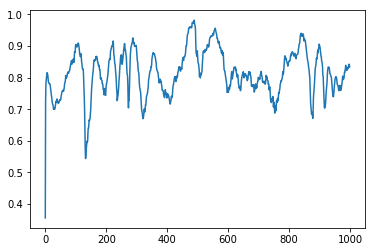

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

x = list(range(0, len(accuracy)))

new = plt.figure()
plt.plot(x, accuracy, "-", marker="None")

max_accuracy = max(accuracy)
acc = max_accuracy
max_accuracy = [i for i, j in enumerate(accuracy) if j == max_accuracy]
max_accuracy = max_accuracy[0]
print(max_accuracy, acc)

In [123]:
# NN model code
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
abcd = model.fit(trainingData, targetData, epochs=100, validation_split=0.2)

abcd.history["acc"]


Train on 113 samples, validate on 29 samples
Epoch 1/100
113/113 [==============================] - 2s 13ms/step - loss: 1.1139 - acc: 0.3894 - val_loss: 1.1106 - val_acc: 0.3448
Epoch 2/100
113/113 [==============================] - 0s 88us/step - loss: 1.1048 - acc: 0.3628 - val_loss: 1.1020 - val_acc: 0.3448
Epoch 3/100
113/113 [==============================] - 0s 88us/step - loss: 1.0962 - acc: 0.3628 - val_loss: 1.0947 - val_acc: 0.3448
Epoch 4/100
113/113 [==============================] - 0s 97us/step - loss: 1.0903 - acc: 0.3628 - val_loss: 1.0901 - val_acc: 0.3448
Epoch 5/100
113/113 [==============================] - 0s 88us/step - loss: 1.0863 - acc: 0.3628 - val_loss: 1.0866 - val_acc: 0.3448
Epoch 6/100
113/113 [==============================] - 0s 88us/step - loss: 1.0829 - acc: 0.3628 - val_loss: 1.0832 - val_acc: 0.3448
Epoch 7/100
113/113 [==============================] - 0s 88us/step - loss: 1.0800 - acc: 0.3628 - val_loss: 1.0803 - val_acc: 0.3448
Epoch 8/100
113/1

[0.3893805317646634,
 0.36283185919829175,
 0.3628318602532412,
 0.3628318597257665,
 0.3628318602532412,
 0.362831858670817,
 0.3628318602532412,
 0.3628318602532412,
 0.36283185906642307,
 0.3628318597257665,
 0.3628318597257665,
 0.36283185853894834,
 0.3893805328196129,
 0.39823008915491864,
 0.3982300903417368,
 0.40707964733638596,
 0.407079650237497,
 0.4159292048585098,
 0.4159292048585098,
 0.41592920723214616,
 0.38938053519324917,
 0.3982300887593126,
 0.3982300887593126,
 0.4159292048585098,
 0.4159292043310351,
 0.42477876290810845,
 0.4336283187159395,
 0.4336283222763939,
 0.44247787742488154,
 0.44247787742488154,
 0.46017699194165457,
 0.4601769924691293,
 0.4601769924691293,
 0.44247788032599256,
 0.46017699141417984,
 0.46017699128231115,
 0.46017699194165457,
 0.46017699194165457,
 0.4601769953702403,
 0.46902654893630374,
 0.4690265528923642,
 0.46017699194165457,
 0.47787610645842765,
 0.48672566450802623,
 0.47787610645842765,
 0.48672566450802623,
 0.51327433839

In [17]:
new = plt.figure()
plt.plot(x, accuracy, "-", marker="None")



max_accuracy = max(accuracy)
acc = max_accuracy
max_accuracy = [i for i, j in enumerate(accuracy) if j == max_accuracy]
max_accuracy = max_accuracy[0]
print(max_accuracy, acc)

NameError: name 'plt' is not defined

In [19]:
trainingData = np.vstack((xData, yData)).T
np.shape(trainingData)

(178, 2)

In [34]:
Data = np.transpose(tData[0])

print(np.shape(Data))
print(np.shape(targetData))

(178, 13)
(178, 3)


In [60]:

# Neural net on the high dimensional space
Data = np.transpose(tData[0])

# NN model code
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(50, input_dim = 13, 
                                activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(50, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

nnet = model.fit(Data, targetData, epochs=3)
accuracy.append(np.mean(nnet.history["acc"]))

Epoch 1/3


InvalidArgumentError: Tensor dense_3_input:0, specified in either feed_devices or fetch_devices was not found in the Graph

In [28]:
init_op = tf.global_variables_initializer()
tf.reset_default_graph()

from keras import backend as K
K.clear_session()


xData = tData[max_accuracy][0]
yData = tData[max_accuracy][1]

trainingData = np.vstack((xData, yData)).T

# NN model code
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
nnet = model.fit(trainingData, targetData, epochs=10)

xy_points = []
for i in range(100):
    for j in range(100):
        x = (2 * i - 100) / 100
        y = (2 * j - 100) / 100
        xy_points.append([x, y])
        
#score = model.evaluate(X_test, Y_test, verbose=0)

model.predict_classes(xy_points[0])


Epoch 1/10
178/178 [==============================] - 0s 530us/step - loss: 0.1689 - acc: 0.9494
Epoch 2/10
178/178 [==============================] - 0s 39us/step - loss: 0.1686 - acc: 0.9494
Epoch 3/10
178/178 [==============================] - 0s 37us/step - loss: 0.1689 - acc: 0.9494
Epoch 4/10
178/178 [==============================] - 0s 31us/step - loss: 0.1688 - acc: 0.9494
Epoch 5/10
178/178 [==============================] - 0s 43us/step - loss: 0.1688 - acc: 0.9438
Epoch 6/10
178/178 [==============================] - 0s 33us/step - loss: 0.1680 - acc: 0.9438
Epoch 7/10
178/178 [==============================] - 0s 56us/step - loss: 0.1680 - acc: 0.9494
Epoch 8/10
178/178 [==============================] - 0s 36us/step - loss: 0.1679 - acc: 0.9494
Epoch 9/10
178/178 [==============================] - 0s 44us/step - loss: 0.1676 - acc: 0.9494
Epoch 10/10
178/178 [==============================] - 0s 33us/step - loss: 0.1675 - acc: 0.9494


NotFoundError: PruneForTargets: Some target nodes not found: group_deps 

In [5]:
model.predict_classes(xy_points[0])


NameError: name 'xy_points' is not defined

In [11]:
type(tData[0])

numpy.ndarray

In [16]:

tf.reset_default_graph()


trainingData = tData[0].T

# NN model code
model = 0
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
nnet = model.fit(trainingData, targetData, epochs=5)
accuracy.append(np.mean(nnet.history["acc"]))


Epoch 1/5


InvalidArgumentError: Tensor dense_input:0, specified in either feed_devices or fetch_devices was not found in the Graph

In [71]:
tf.reset_default_graph()

with tf.Session() as sess:
    xData = tData[484][0]
    yData = tData[484][1]
    trainingData = np.vstack((xData, yData)).T
    
    print(trainingData.shape)
    
    # NN model code
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    nnet = model.fit(trainingData, targetData, epochs=100)
    print(np.mean(nnet.history["acc"]))
    
    test = np.zeros((2,1))
    print(test.shape)
    print(model.predict(x, batch_size=1))







(178, 2)
Epoch 1/100
178/178 [==============================] - 0s 862us/step - loss: 1.1779 - acc: 0.0449
Epoch 2/100
178/178 [==============================] - 0s 35us/step - loss: 1.1657 - acc: 0.0393
Epoch 3/100
178/178 [==============================] - 0s 32us/step - loss: 1.1542 - acc: 0.0169
Epoch 4/100
178/178 [==============================] - 0s 32us/step - loss: 1.1439 - acc: 0.0169
Epoch 5/100
178/178 [==============================] - 0s 31us/step - loss: 1.1338 - acc: 0.0393
Epoch 6/100
178/178 [==============================] - 0s 39us/step - loss: 1.1249 - acc: 0.0562
Epoch 7/100
178/178 [==============================] - 0s 51us/step - loss: 1.1168 - acc: 0.1742
Epoch 8/100
178/178 [==============================] - 0s 63us/step - loss: 1.1089 - acc: 0.2528
Epoch 9/100
178/178 [==============================] - 0s 31us/step - loss: 1.1018 - acc: 0.3371
Epoch 10/100
178/178 [==============================] - 0s 30us/step - loss: 1.0945 - acc: 0.4101
Epoch 11/100
178/17

178/178 [==============================] - 0s 52us/step - loss: 0.2375 - acc: 0.9270
Epoch 85/100
178/178 [==============================] - 0s 31us/step - loss: 0.2356 - acc: 0.9270
Epoch 86/100
178/178 [==============================] - 0s 49us/step - loss: 0.2339 - acc: 0.9270
Epoch 87/100
178/178 [==============================] - 0s 33us/step - loss: 0.2322 - acc: 0.9270
Epoch 88/100
178/178 [==============================] - 0s 47us/step - loss: 0.2307 - acc: 0.9326
Epoch 89/100
178/178 [==============================] - 0s 39us/step - loss: 0.2289 - acc: 0.9326
Epoch 90/100
178/178 [==============================] - 0s 30us/step - loss: 0.2276 - acc: 0.9326
Epoch 91/100
178/178 [==============================] - 0s 42us/step - loss: 0.2262 - acc: 0.9326
Epoch 92/100
178/178 [==============================] - 0s 33us/step - loss: 0.2247 - acc: 0.9326
Epoch 93/100
178/178 [==============================] - 0s 37us/step - loss: 0.2236 - acc: 0.9326
Epoch 94/100
178/178 [===========

InvalidArgumentError: Matrix size-incompatible: In[0]: [1,1], In[1]: [2,10]
	 [[{{node MatMul}} = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_input_1_0_0, MatMul/ReadVariableOp)]]

In [47]:
tf.reset_default_graph()


In [30]:
!pip install pydot